In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_gc = 'GCNetwork.txt'
path_gnomad = "gnomad.v2.1.1.all_lofs.txt.bgz"

In [3]:
gnomad = pd.read_csv(path_gnomad, compression='gzip', on_bad_lines='skip', delim_whitespace=True, low_memory=False)
gc = pd.read_csv(path_gc, skiprows = [i for i in range (1,75)], delim_whitespace=True)
gnomad.rename(columns = {'pos':'Variant'}, inplace = True)

- CFTR
- Uma variante pode afetar mais de um transcritos, registrar quantos são afetados por cada consequencia
- registrar quantas variantes por cada consequencia

In [4]:
gnomad

chrom   Variant     ref     alt  most_severe_consequence  \
0          1     69456       C  CCTACA       frameshift_variant   
1          1     69469  ACAATT       A       frameshift_variant   
2          1     69516       G       A              stop_gained   
3          1     69620      TA       T       frameshift_variant   
4          1     69702      TG       T       frameshift_variant   
...      ...       ...     ...     ...                      ...   
443764     Y  22921918       C       G              stop_gained   
443765     Y  22930689       A       G  splice_acceptor_variant   
443766     Y  22930763       C       T              stop_gained   
443767     Y  25375763      CA       C       frameshift_variant   
443768     Y  27001010       C       T              stop_gained   

               gene_ids gene_symbols  \
0       ENSG00000186092        OR4F5   
1       ENSG00000186092        OR4F5   
2       ENSG00000186092        OR4F5   
3       ENSG00000186092        OR4F5   
4       ENSG00000186092        OR4F5   
...                 ...          ...   
443764  ENSG00000157828       RPS4Y2   
443765  ENSG00000157828       RPS4Y2   
443766  ENSG00000157828       RPS4Y2   
443767  ENSG00000205944         DAZ2   
443768  ENSG00000205916         DAZ4   

                                           transcript_ids  
0                                         ENST00000335137  
1                                         ENST00000335137  
2                                         ENST00000335137  
3                                         ENST00000335137  
4                                         ENST00000335137  
...                                                   ...  
443764                                    ENST00000288666  
443765                                    ENST00000288666  
443766                                    ENST00000288666  
443767  ENST00000382440,ENST00000382433,ENST0000038229...  
443768  ENST00000415508,ENST00000400494,ENST0000038243...  

[443769 rows x 8 columns]

In [5]:
##variantes e transcritos sem distinção de consequencia.
#substituindo as consequencias por numeros
all = gnomad[(gnomad['gene_symbols'] == 'CFTR')].drop(['chrom', 'ref', 'alt', 'gene_ids',  'gene_symbols'], axis=1)
all = all.replace(['frameshift_variant','stop_gained','splice_donor_variant','splice_acceptor_variant'], ['1','2','3','4'])

all

novas_linhas = []

for tupla in all.itertuples():
    nova_linha = []
    variante = tupla[1]
    consequencia = tupla[2]
    transcritos = tupla[3].split(",")
    for transcrito in transcritos:
        novas_linhas.append([variante, transcrito, int(consequencia)]) # transforme o consequência em inteiro!
    
df2 = pd.DataFrame(novas_linhas, columns=["Variante", "Transcrito", "Consequencia"])

df3 = df2.pivot_table(index = "Variante", columns="Transcrito", 
                      values="Consequencia", fill_value=0).T
df3.to_csv("Consequences.csv")

In [6]:
df3


Variante         117120152  117120190  117120202  117144332  117144404  \
Transcrito                                                               
ENST00000003084          2          1          3          2          1   
ENST00000426809          2          1          3          2          1   
ENST00000446805          0          0          0          0          0   
ENST00000454343          2          1          3          2          1   
ENST00000468795          0          0          0          0          0   
ENST00000600166          0          0          0          0          0   

Variante         117149101  117149146  117149150  117149156  117149181  ...  \
Transcrito                                                              ...   
ENST00000003084          2          2          1          1          1  ...   
ENST00000426809          2          2          1          1          1  ...   
ENST00000446805          0          0          0          0          1  ...   
ENST00000454343          2          2          1          1          1  ...   
ENST00000468795          0          0          0          0          0  ...   
ENST00000600166          0          0          0          0          0  ...   

Variante         117292905  117292924  117304740  117304832  117304889  \
Transcrito                                                               
ENST00000003084          1          1          4          2          2   
ENST00000426809          1          1          4          2          2   
ENST00000446805          0          0          0          0          0   
ENST00000454343          1          1          4          2          2   
ENST00000468795          0          0          0          0          0   
ENST00000600166          1          1          4          2          2   

Variante         117305519  117305610  117305619  117307003  117307015  
Transcrito                                                              
ENST00000003084          2          2          3          1          1  
ENST00000426809          2          2          3          1          1  
ENST00000446805          0          0          0          0          0  
ENST00000454343          2          2          3          1          1  
ENST00000468795          0          0          0          0          0  
ENST00000600166          2          0          3          0          0  

[6 rows x 140 columns]

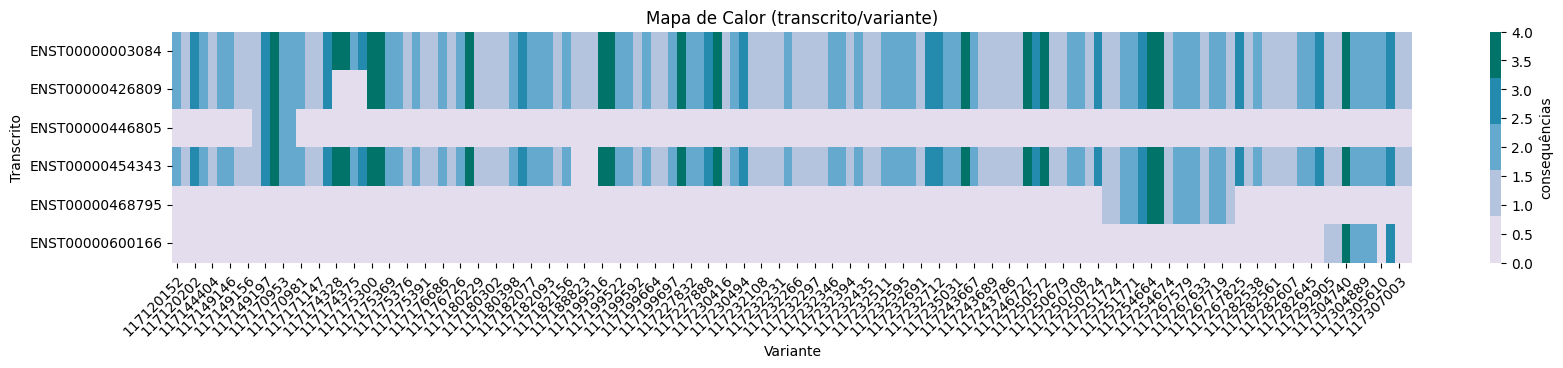

In [7]:
fig, ax = plt.subplots(figsize=(20, 3))
cmap = sns.color_palette("PuBuGn", 5)
sns.heatmap(df3, vmin=0, vmax = 4, cmap = cmap, cbar_kws={'label': 'consequências'})
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_title("Mapa de Calor (transcrito/variante)")

"""setss = [0,1,2,3,4]
setss2 = ['','frameshift_variant','stop_gained','splice_donor_variant','splice_acceptor_variant']
colorbar = ax.collections[0].colorbar
ax.set_ticks(setss)
colorbar.set_ticklabels(['0','1','2','3','4'])
"""

plt.show()

In [18]:
lista_para_dropar = ['chrom', 'ref', 'alt', 'gene_ids',  'gene_symbols']
list_of_msc = ['frameshift_variant', 'stop_gained', 'splice_acceptor_variant', 'splice_donor_variant']
list_of_list = []

for i in range(len(list_of_msc)):
   list_of_list.append(((gnomad[(gnomad['gene_symbols'] == 'CFTR') & (gnomad['most_severe_consequence'] == list_of_msc[i])].drop(lista_para_dropar, axis=1).values.T)) )

frame_transc = list_of_list[0]
stop_transc = list_of_list[1]
splice_transc = list_of_list[2]
donor_transc = list_of_list[3] 

In [20]:
#padding das variantes para poder criar o dataframe
new_v_sg = np.pad(stop_transc[0],(0, 6))
new_v_splice = np.pad(splice_transc[0],(0,40))
new_v_donor = np.pad(donor_transc[0],(0,41))

In [26]:
##criando DataFrame das variantes por conseq
data = np.array([frame_transc[0], new_v_sg, new_v_splice, new_v_donor])
column_name = ('frameshift variant', 'stop gained variant',  'splice acceptor variant', 'splice donor variant')
tabela = pd.DataFrame(data.T, columns = column_name)
tabela = tabela.replace(0,' ') #substituindo os zeros por vazio

l = [len(frame_transc[0]), len(stop_transc[0]), len(splice_transc[0]), len(donor_transc[0])]

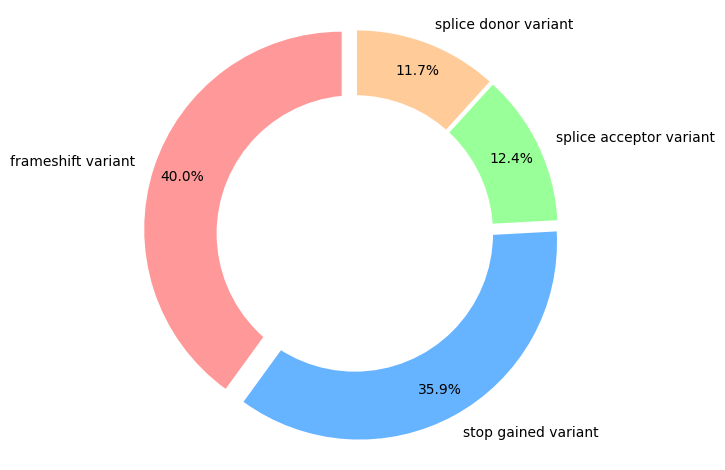

In [22]:
##gráfico de pizza para visualizar as quantidades (em porcentagem) das variantes por consequência
labels = column_name
sizes = l
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

#explsion
explode = (0.07,0.05,0.03,0.03)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.tight_layout()
plt.show()

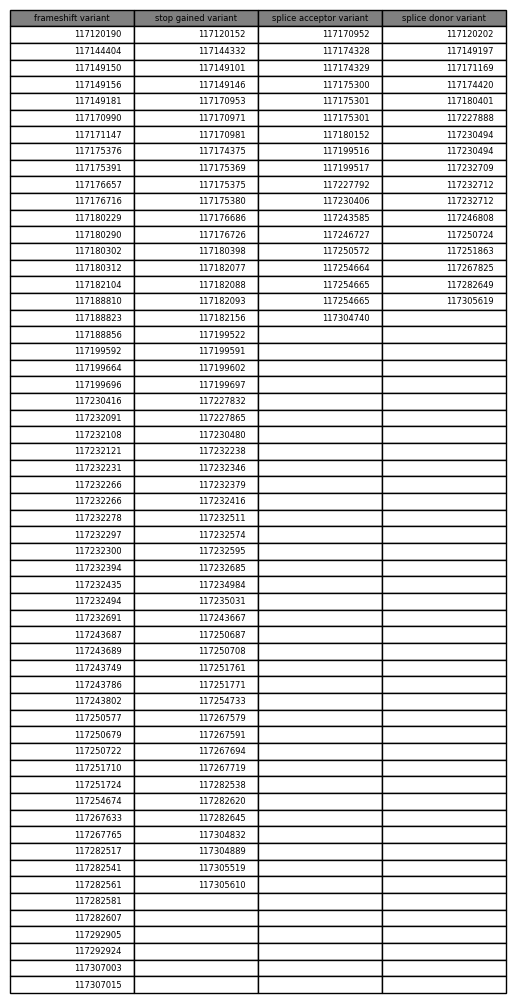

In [23]:
##tabela de variantes por consequência
fig, ax =plt.subplots(1,1)
ax.table(cellText=tabela.values,
        colLabels=tabela.columns,
        colColours =["gray"] * 4,
        loc="center")
ax.axis("off")
plt.savefig('variantes_por_conseq.pdf')
plt.show()

In [24]:
metrica = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'jaccard',
           'jensenshannon', 'kulczynski1', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean',
           'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']
#Distance metric to use for the data

metodo = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward'] #Linkage method to use for calculating clusters

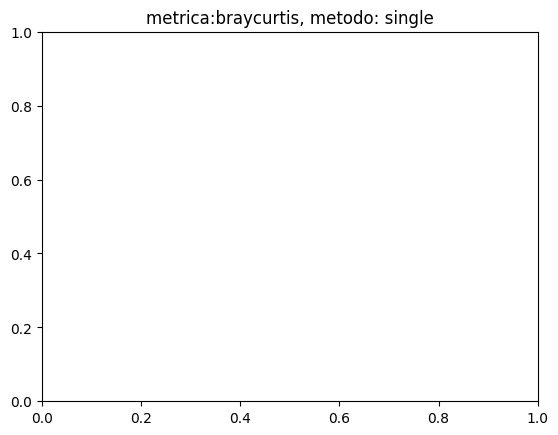

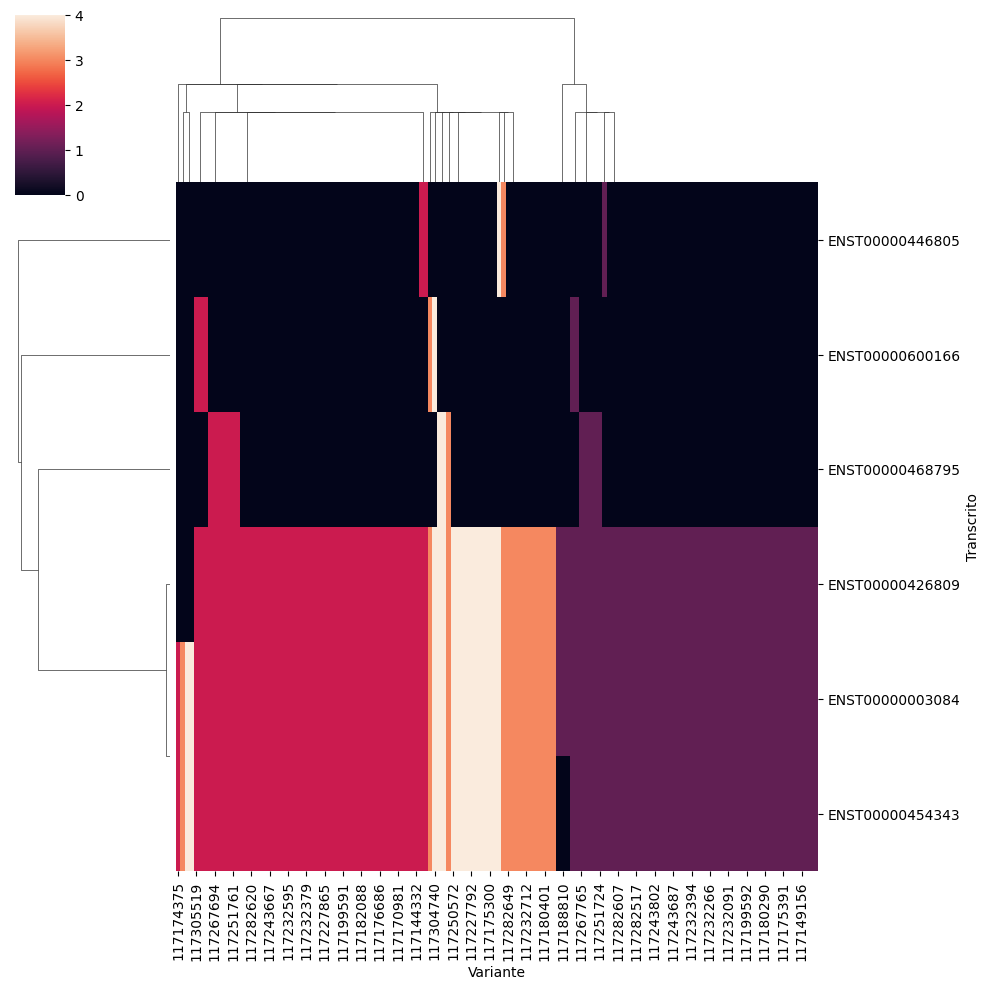

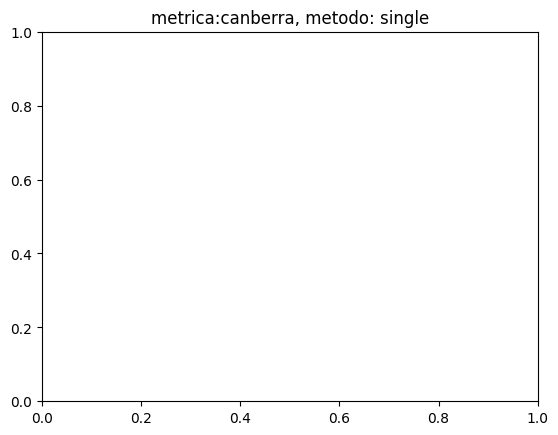

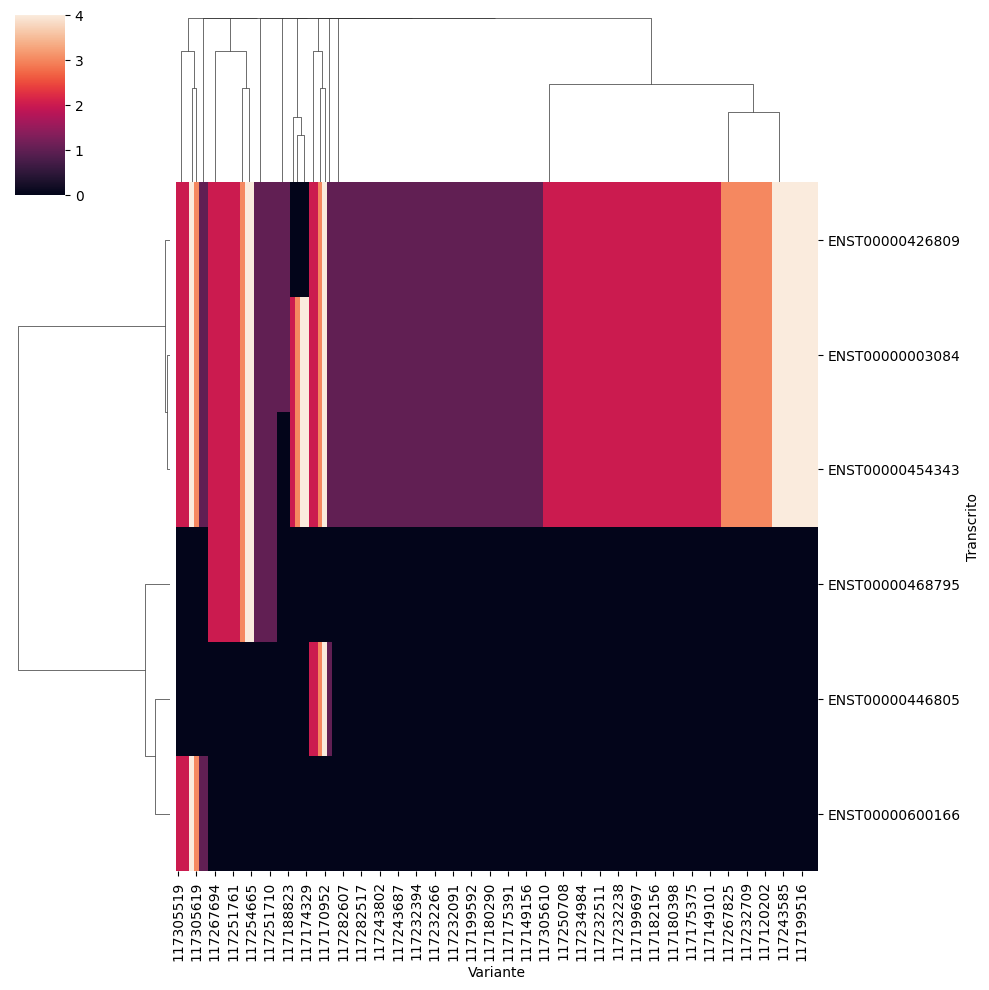

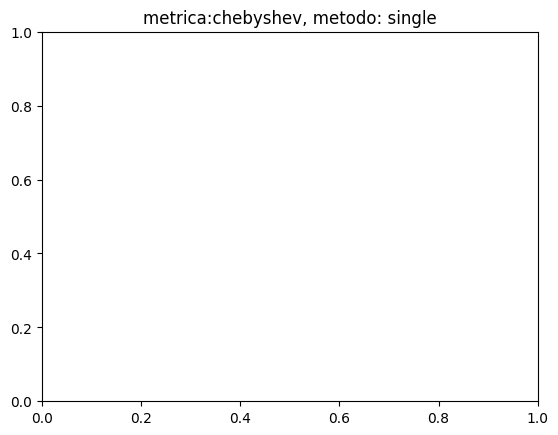

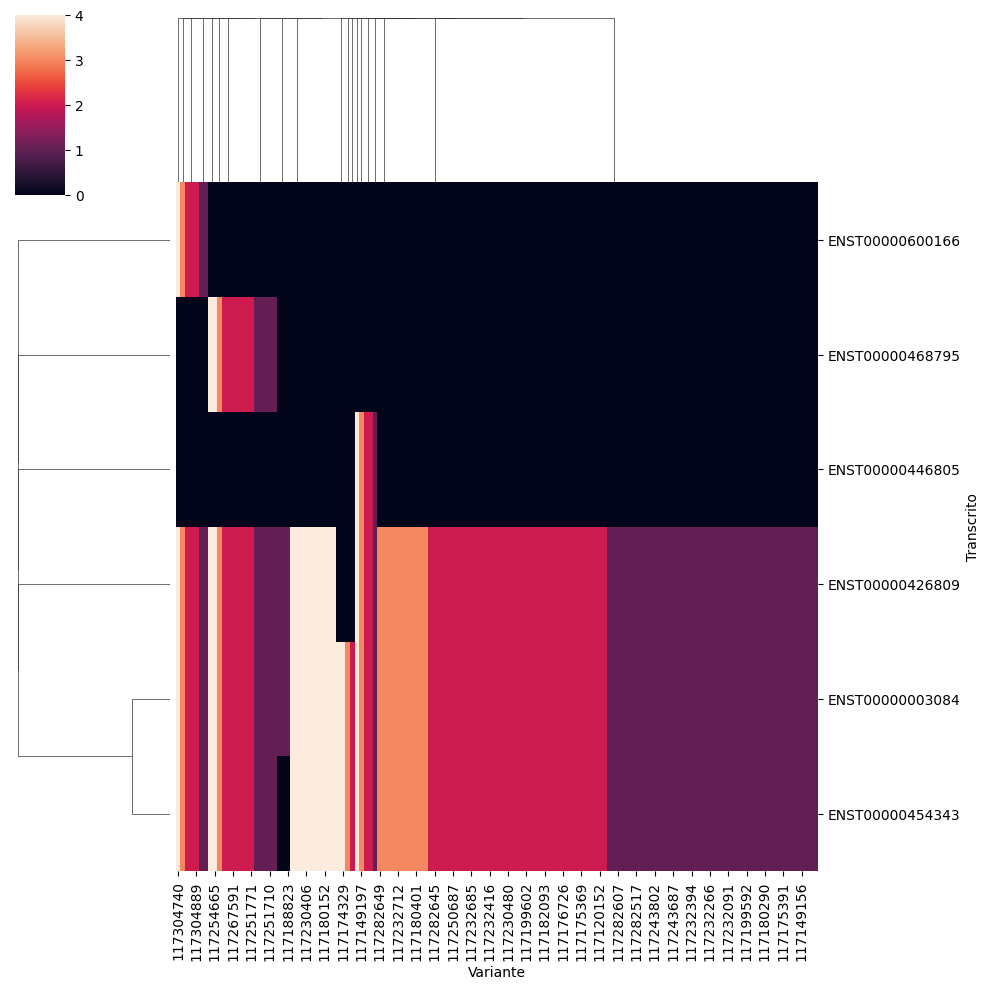

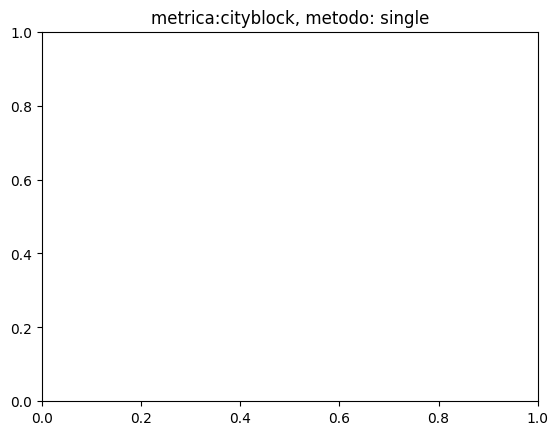

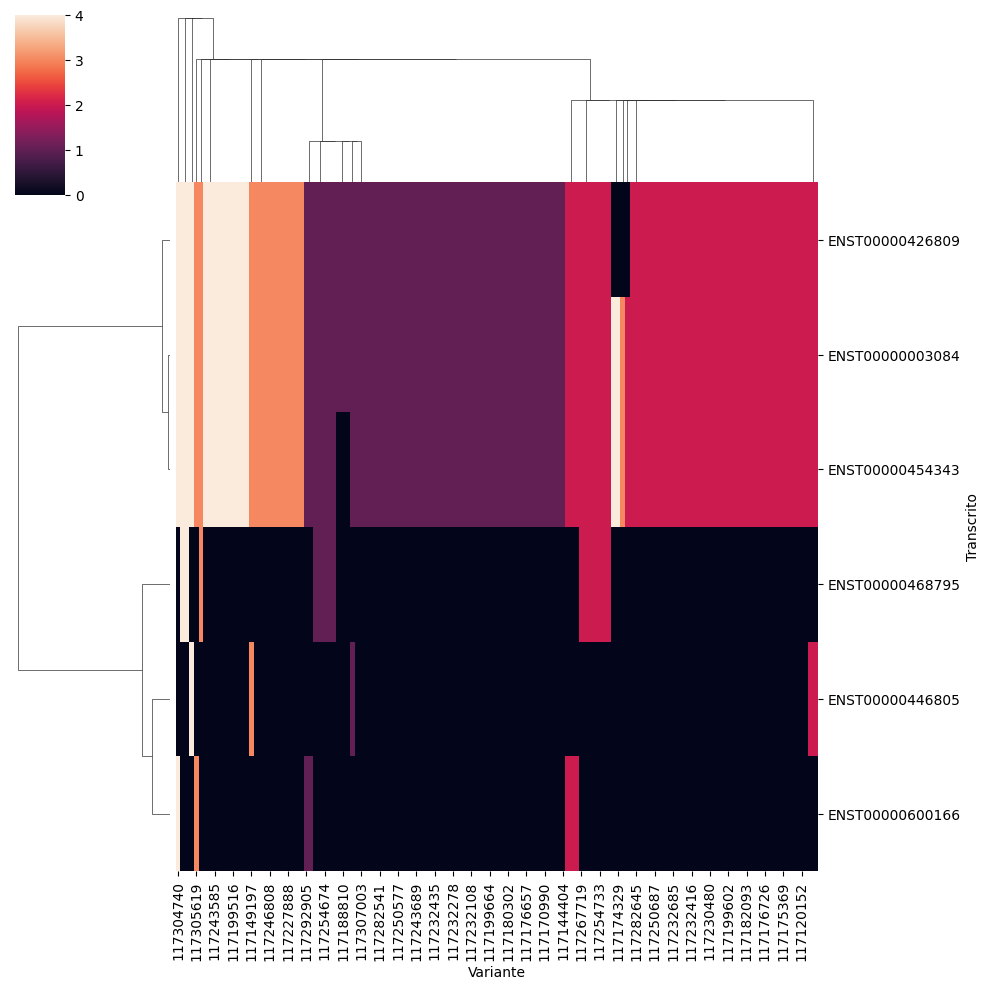

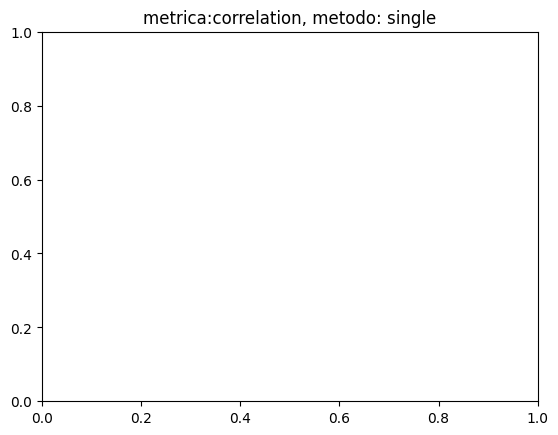

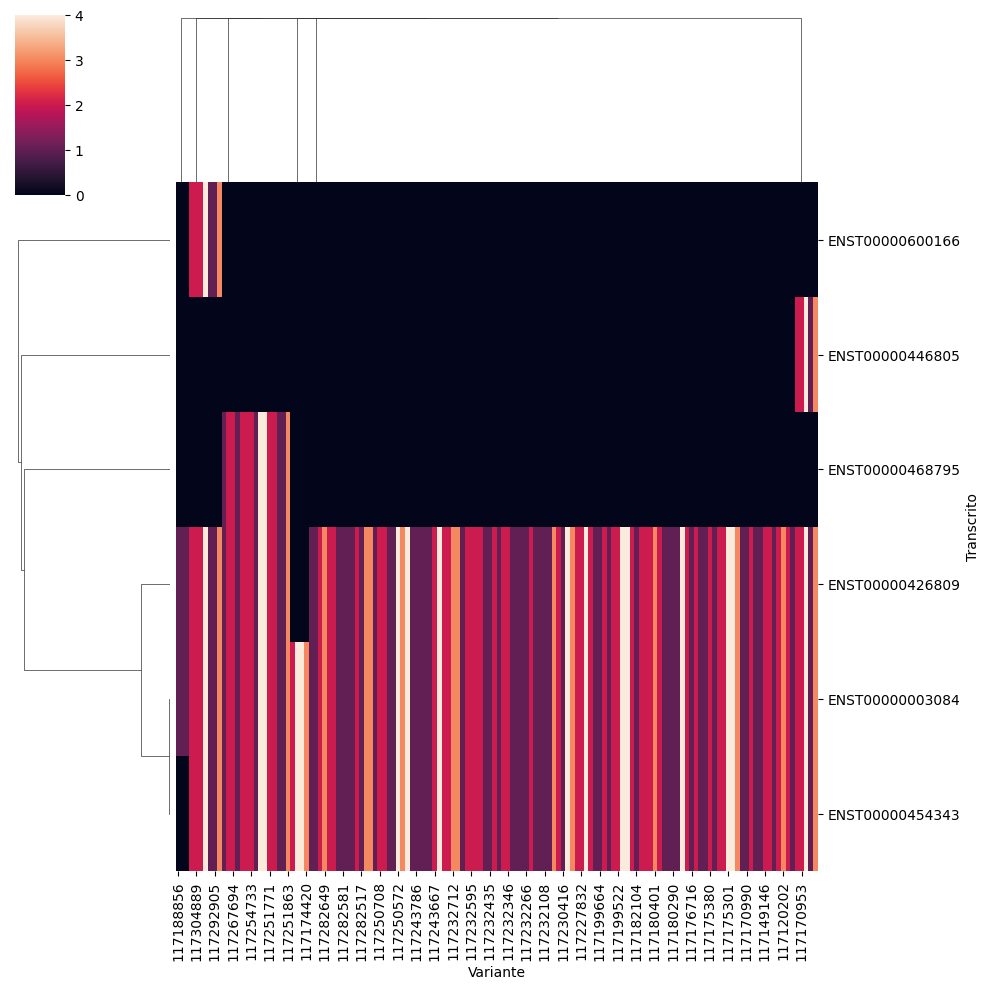

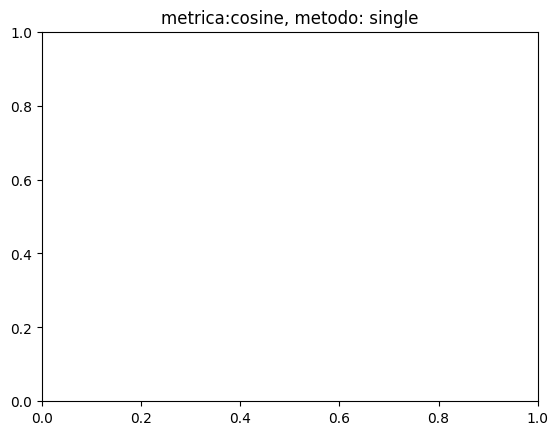

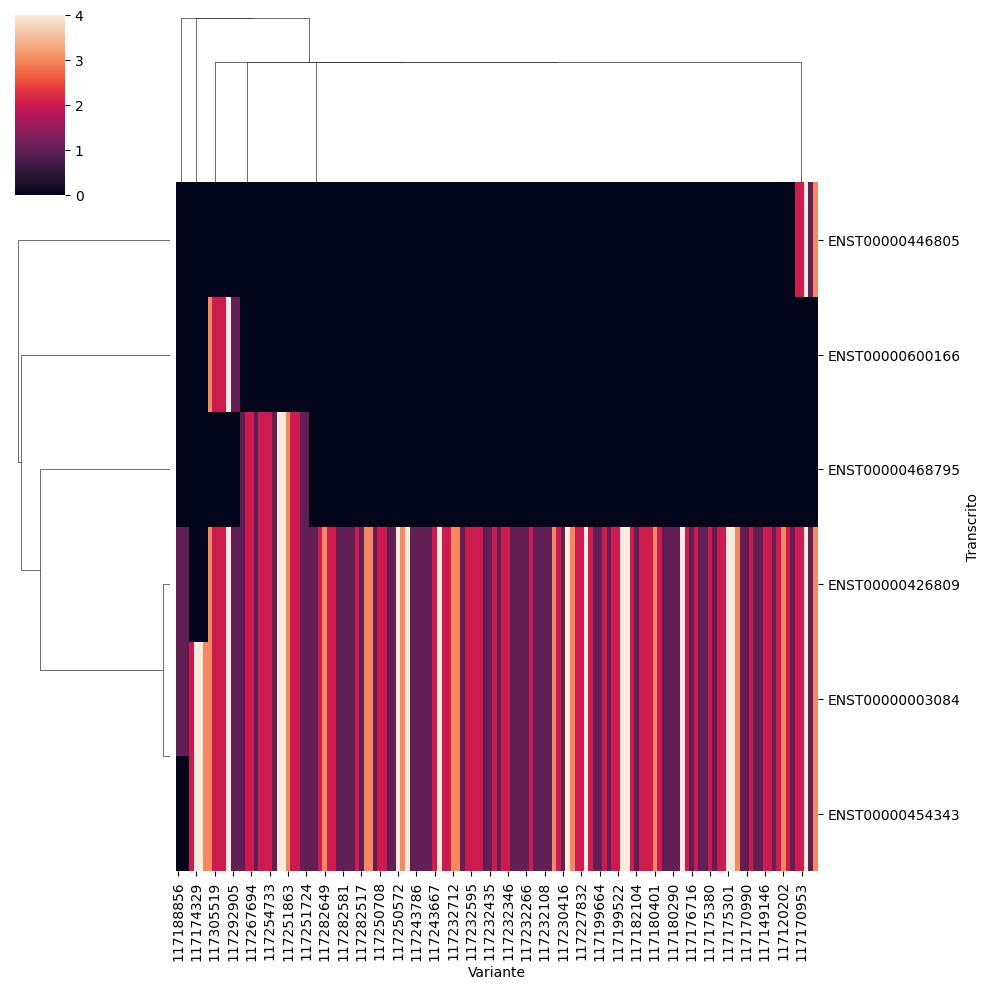

Erro na combinação: metrica=dice, metodo=single
Linkage 'Z' contains negative distances.


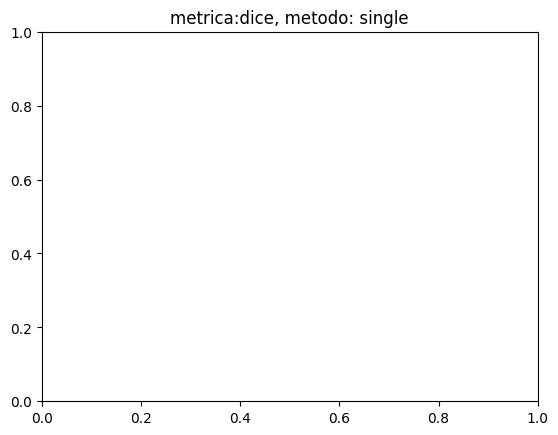

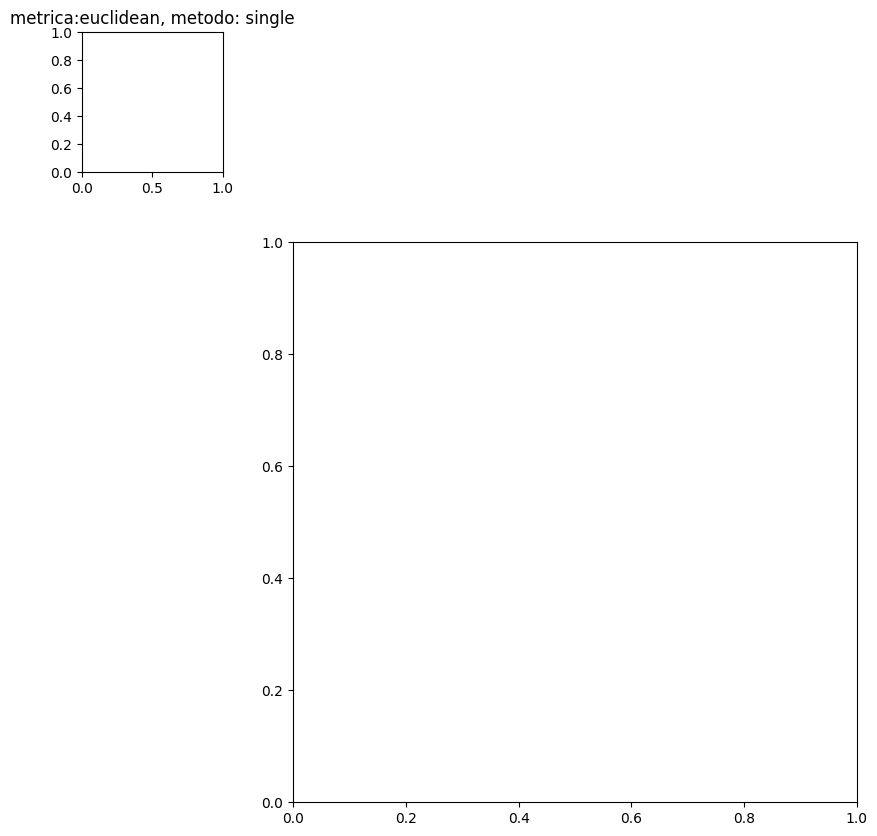

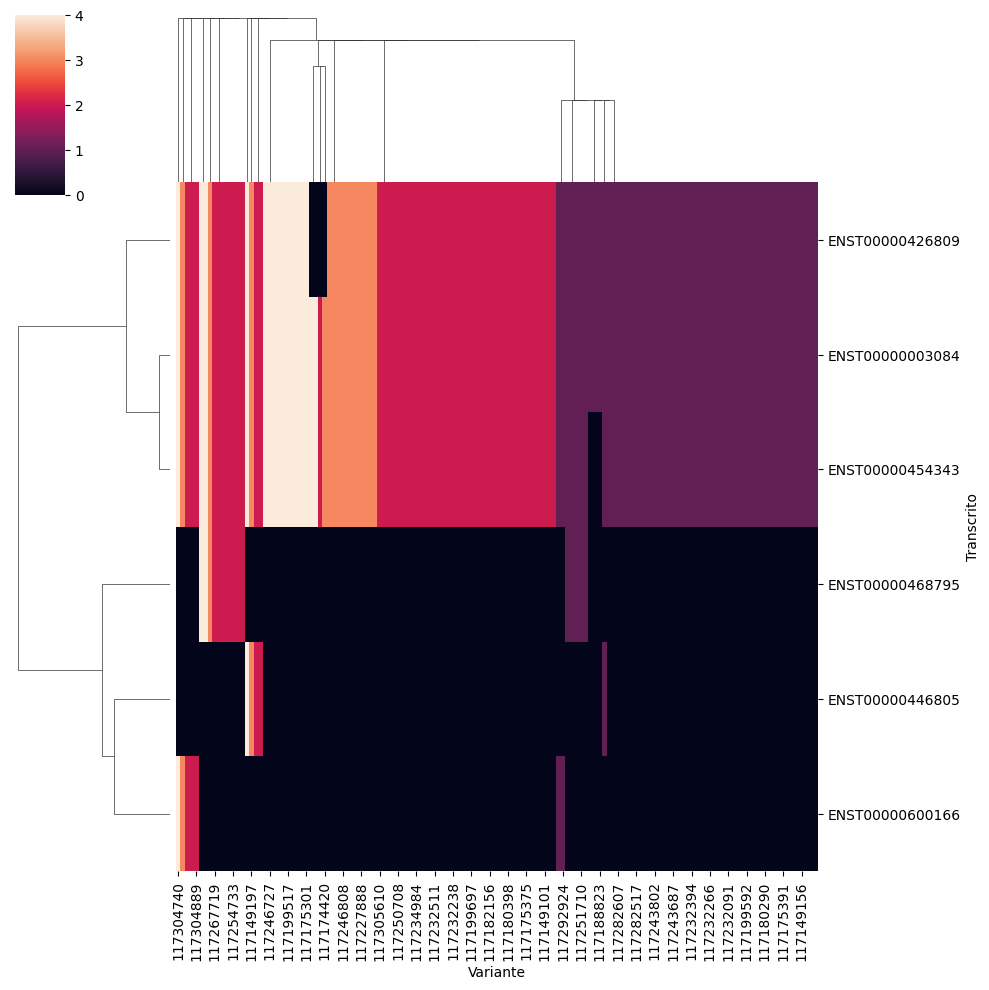

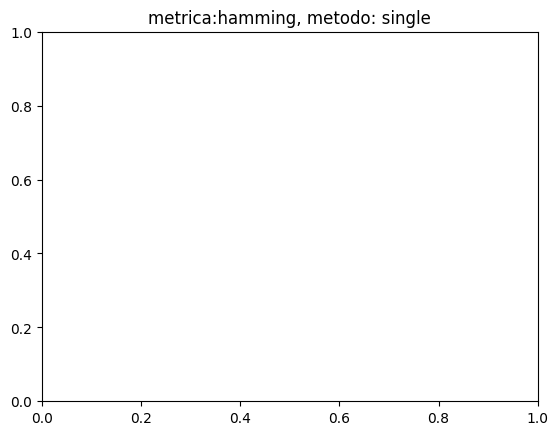

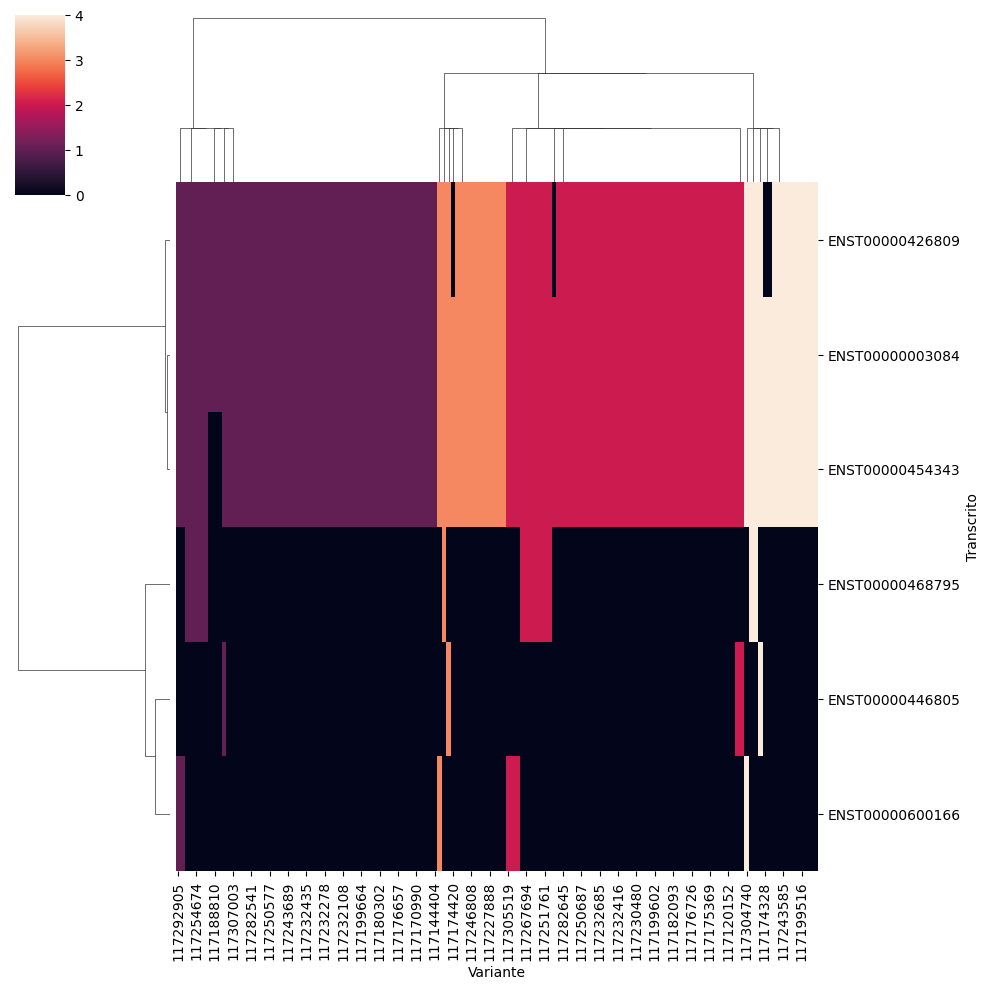

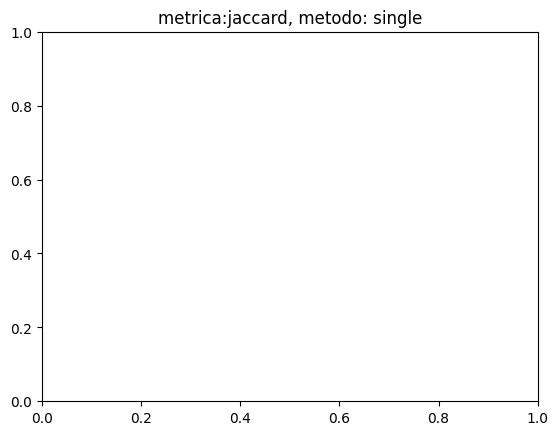

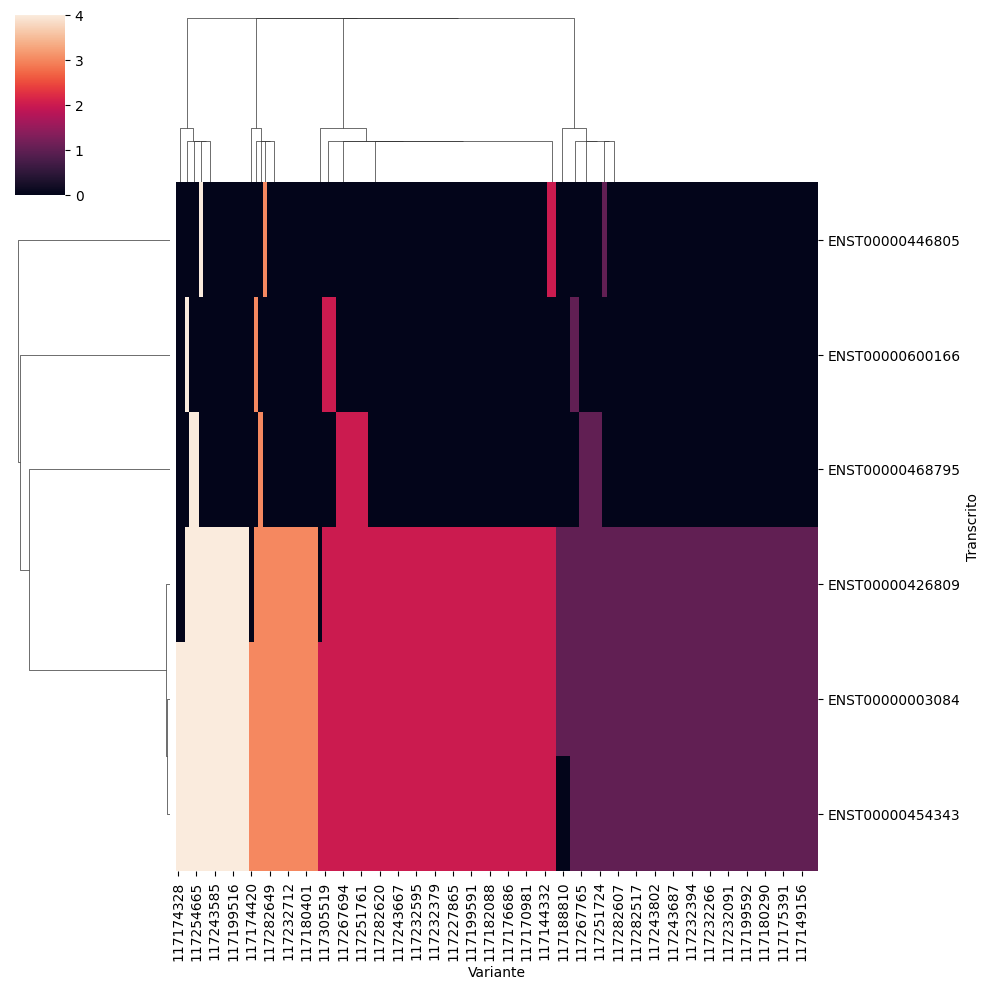

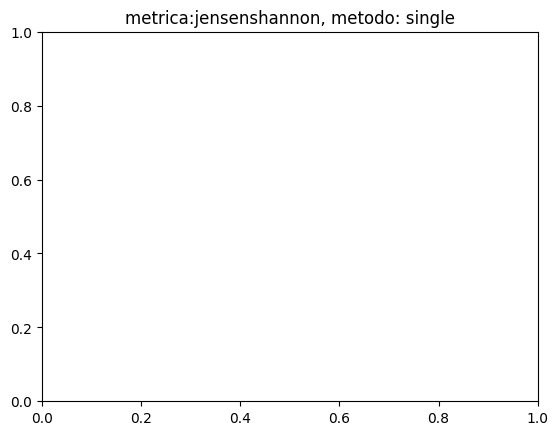

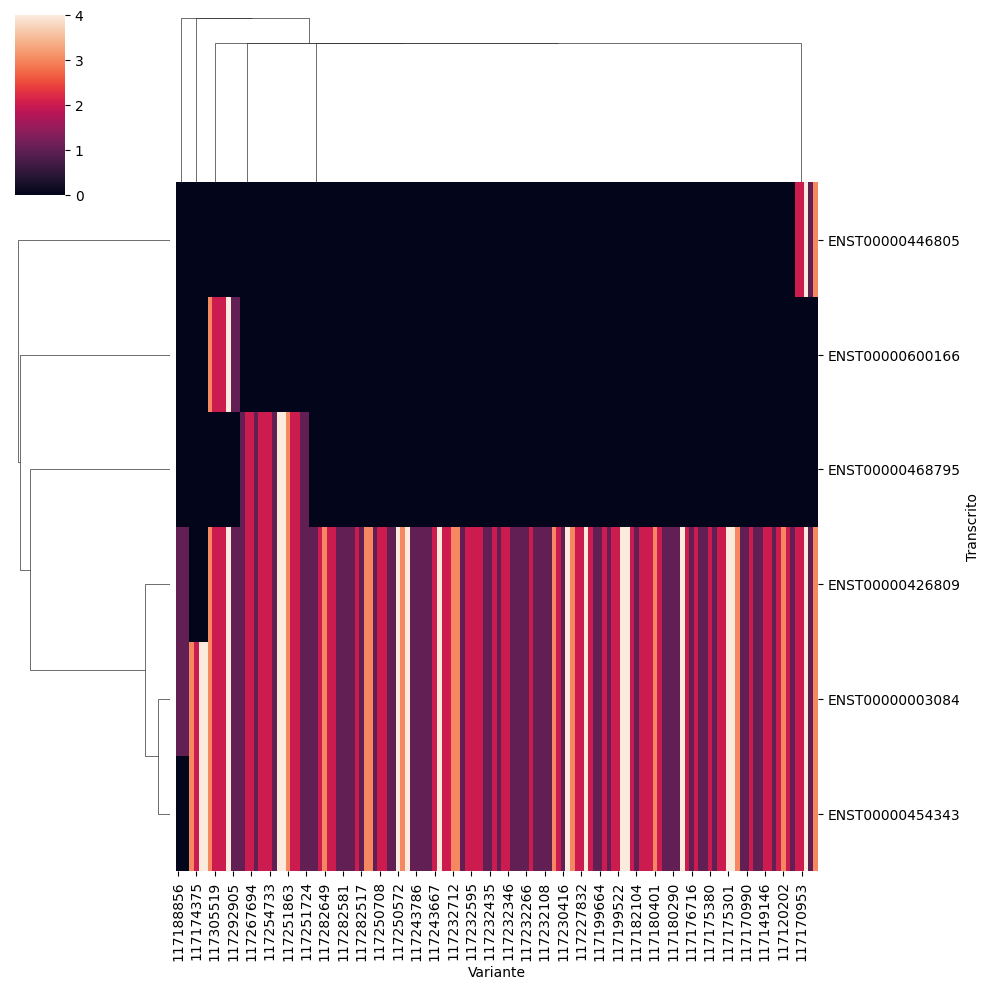

Erro na combinação: metrica=kulczynski1, metodo=single
The condensed distance matrix must contain only finite values.
Erro na combinação: metrica=mahalanobis, metodo=single
The number of observations (6) is too small; the covariance matrix is singular. For observations with 140 dimensions, at least 141 observations are required.


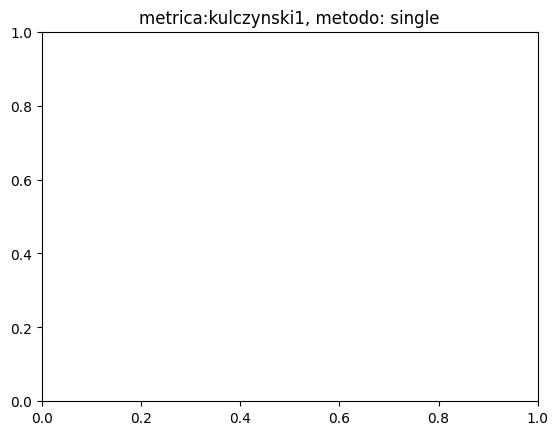

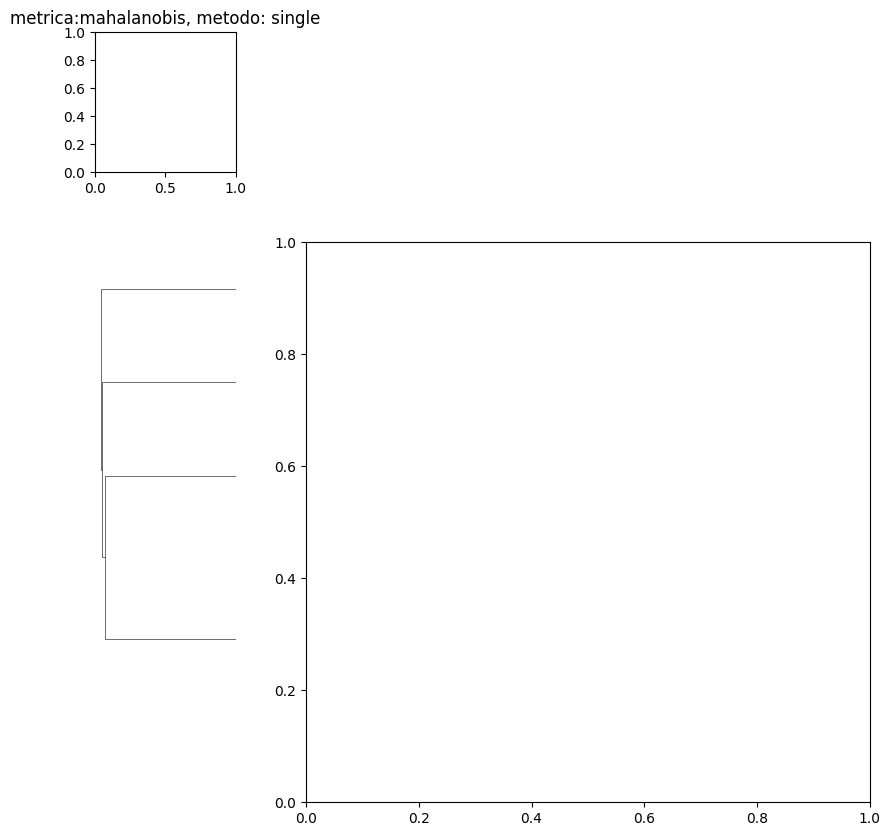

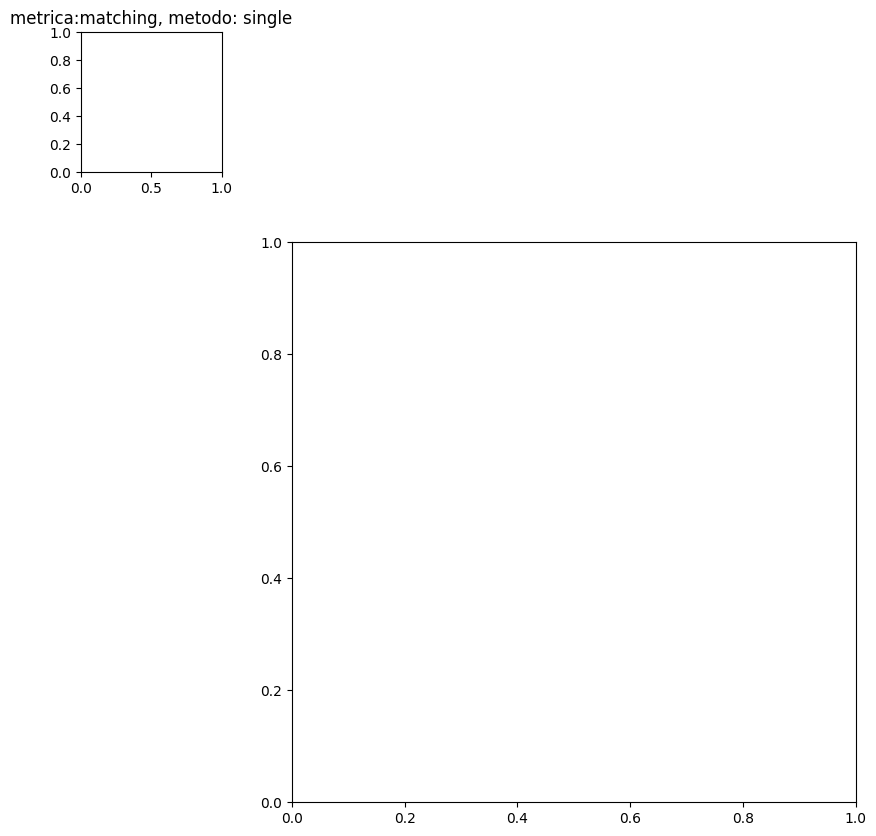

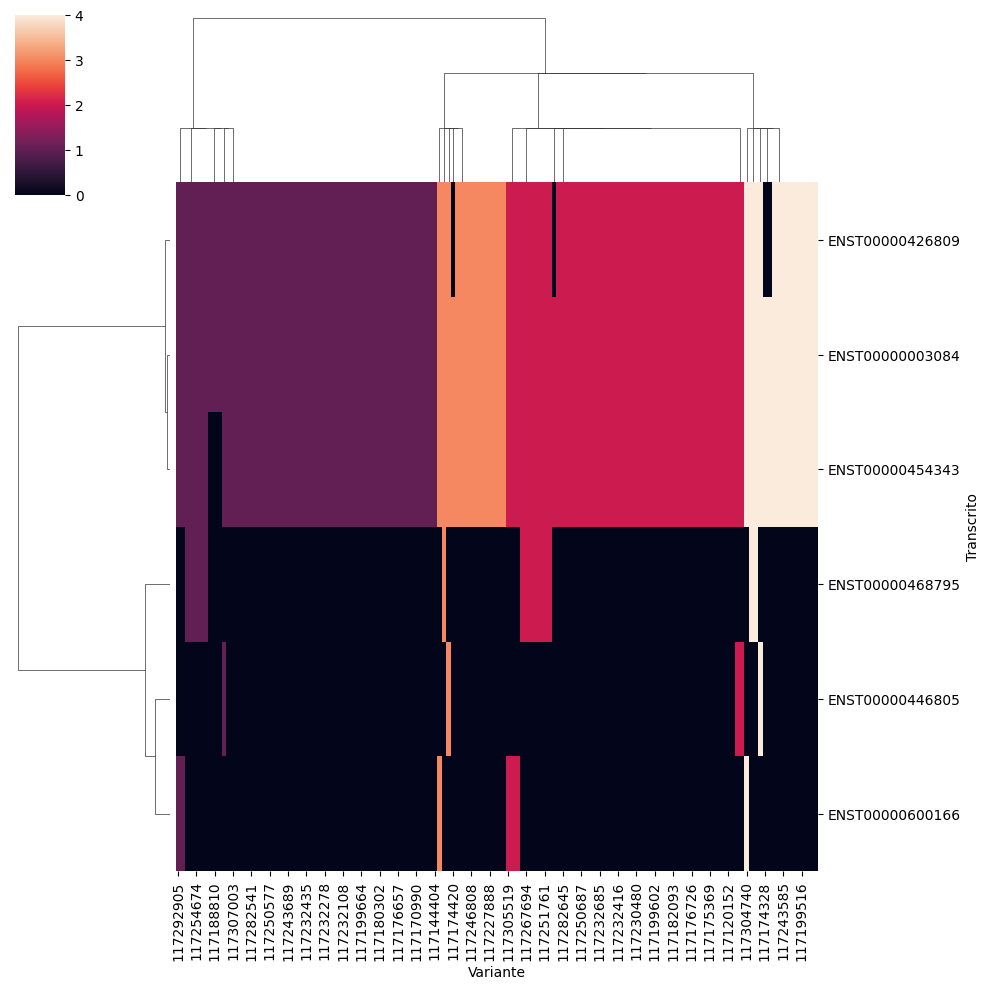

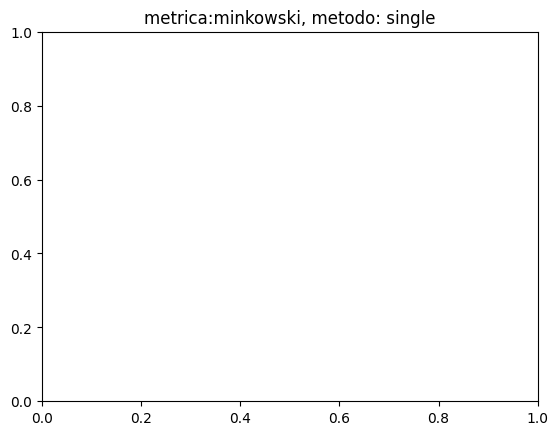

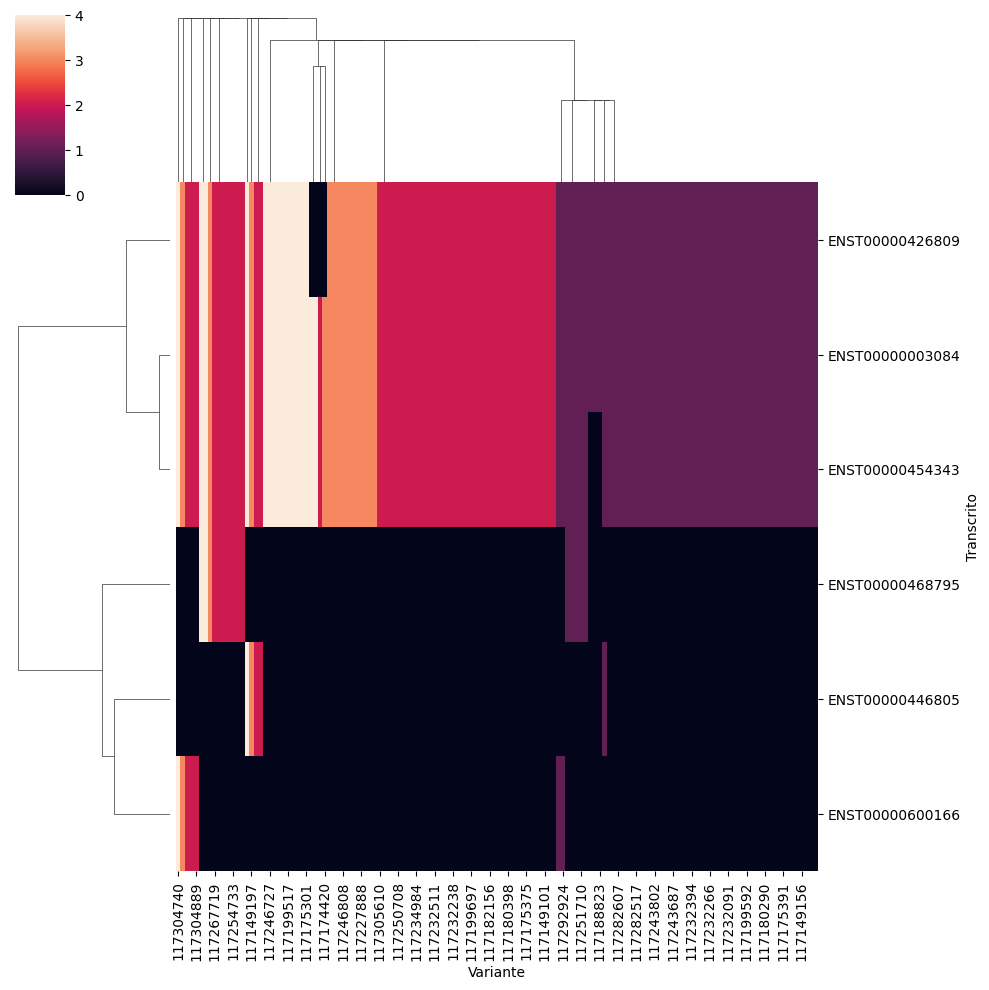

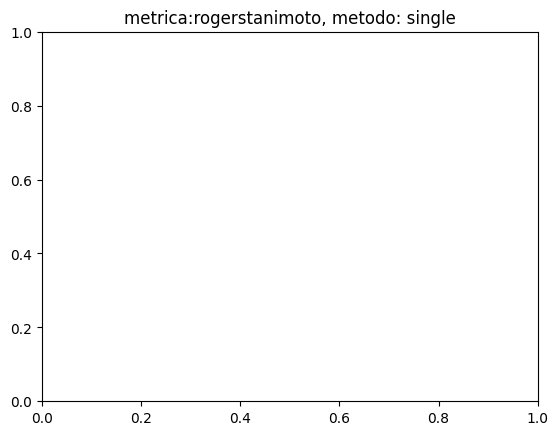

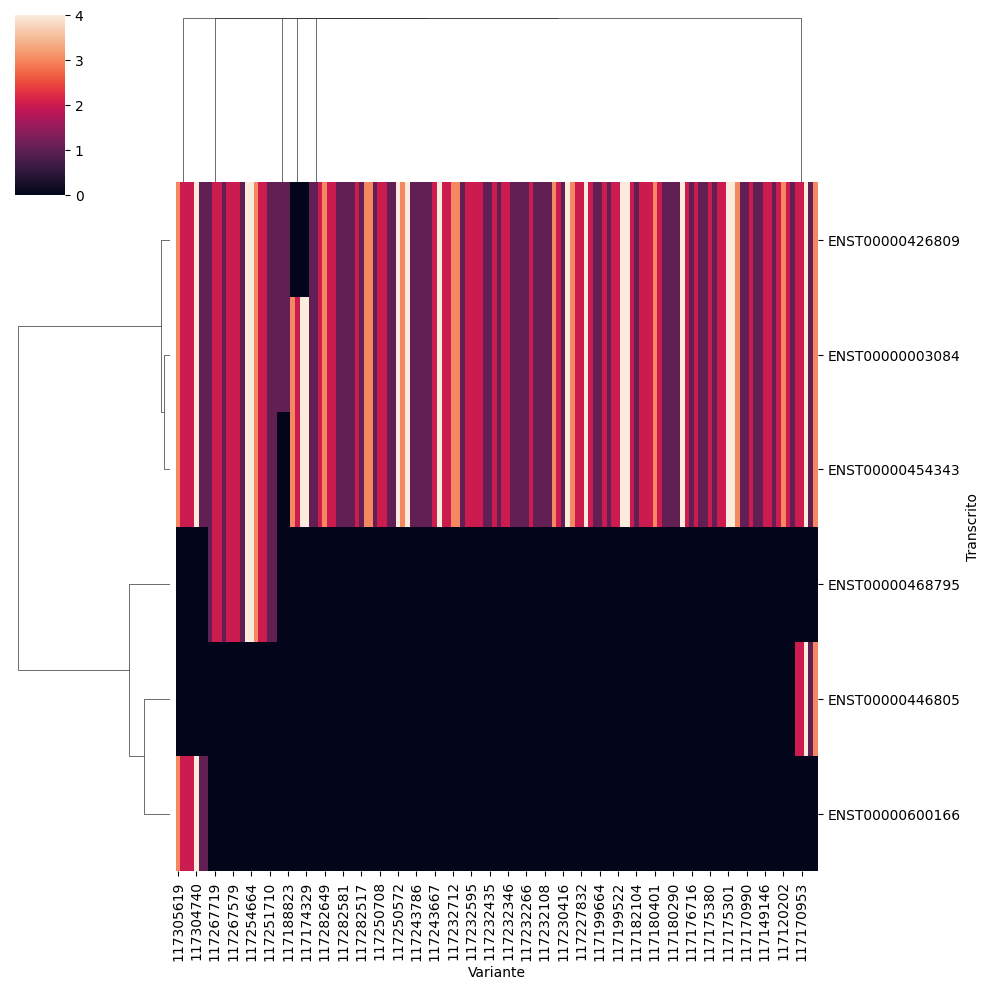

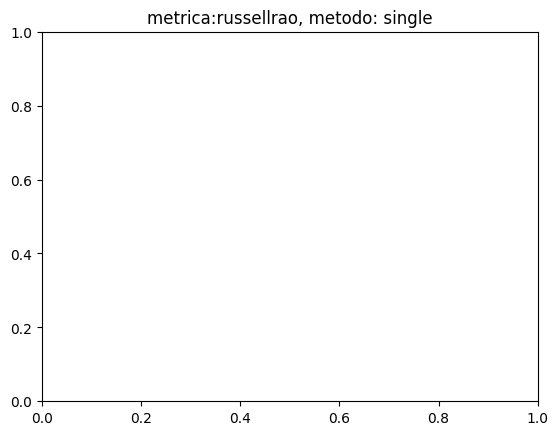

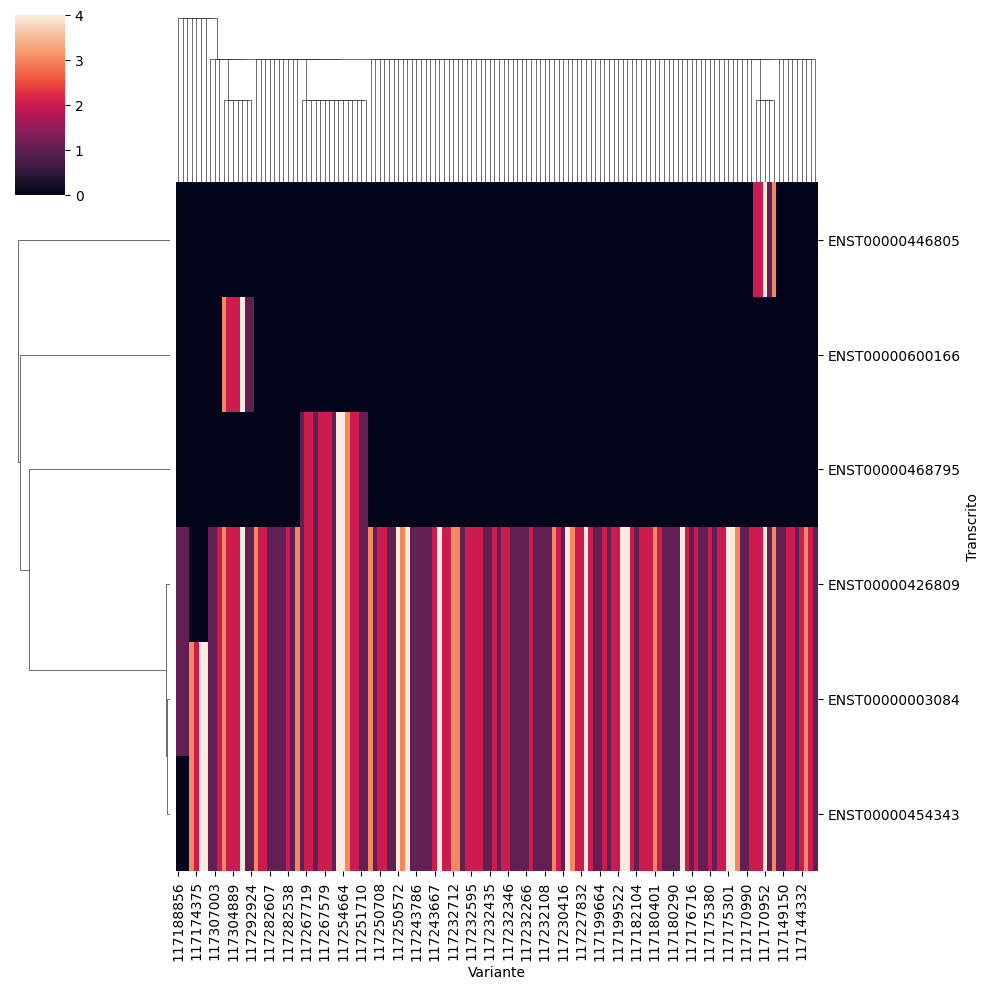

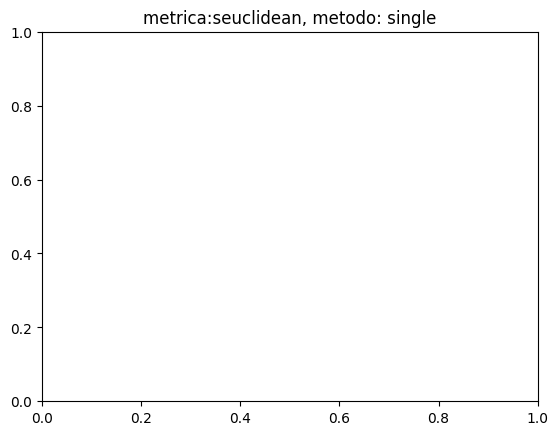

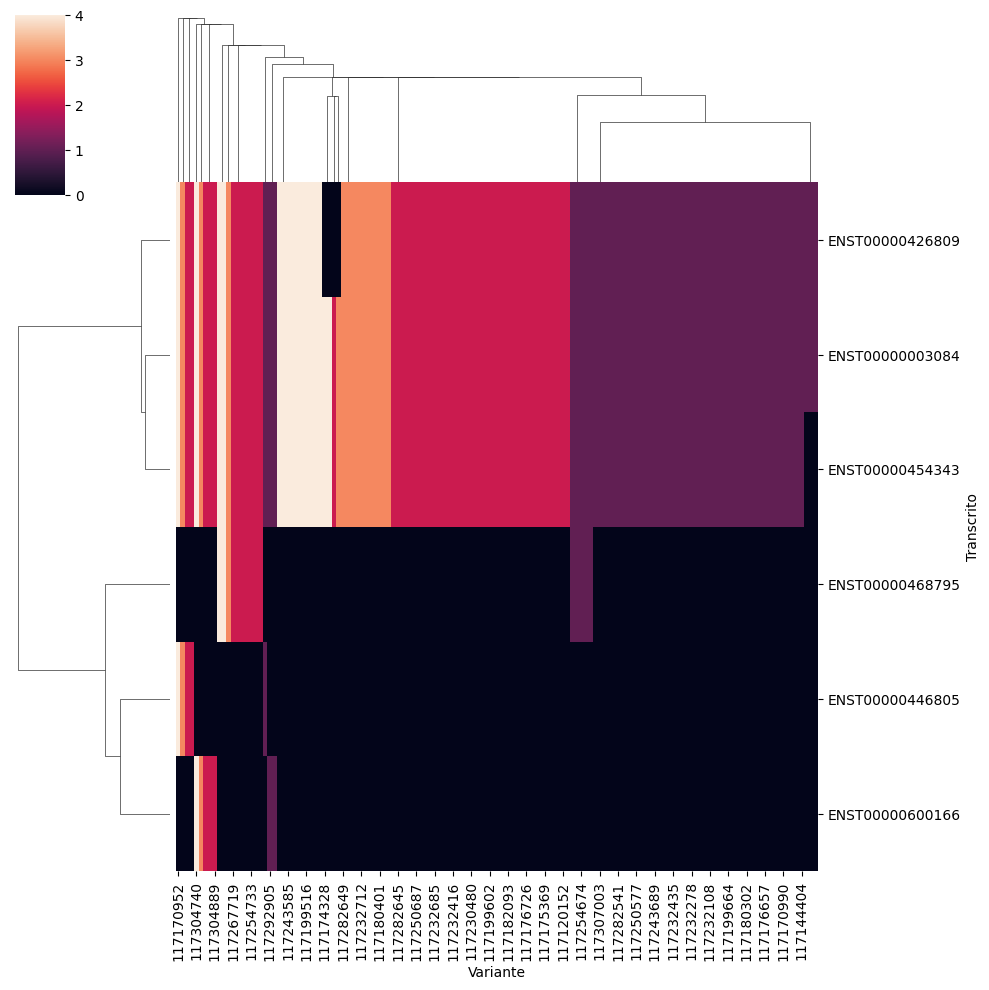

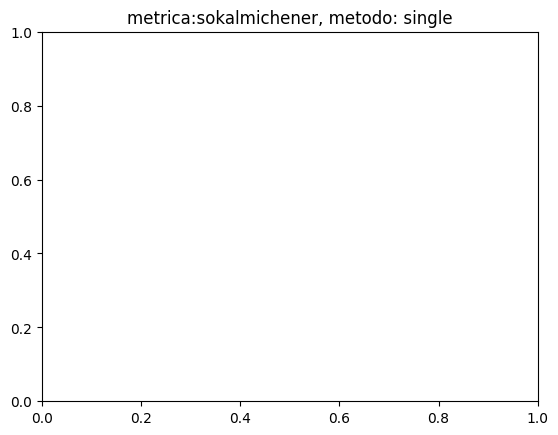

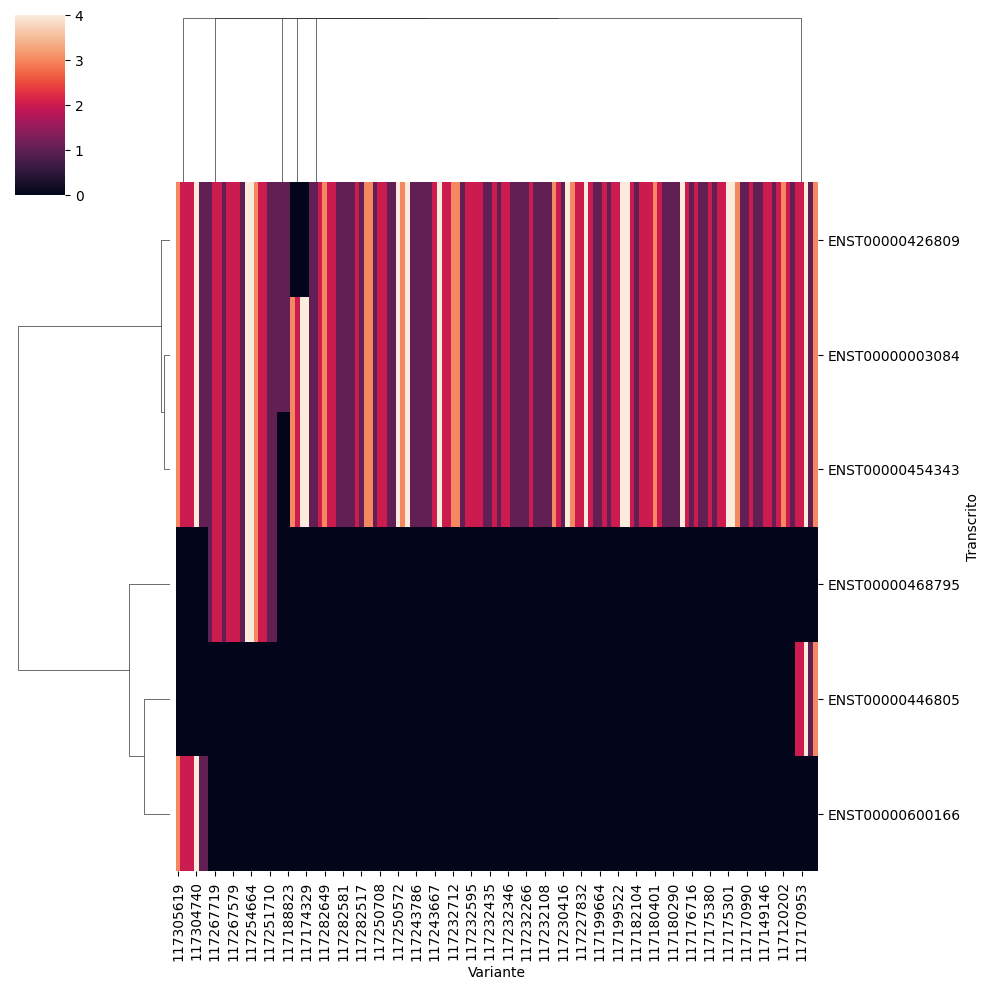

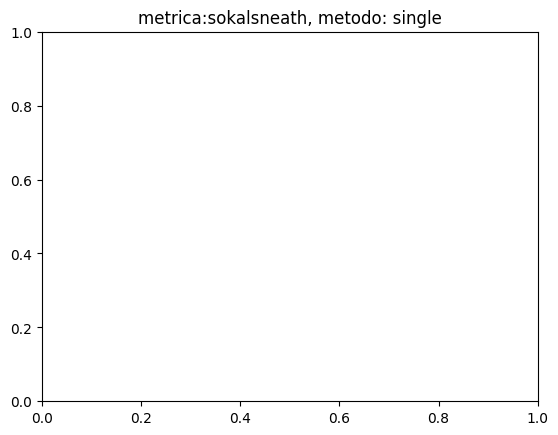

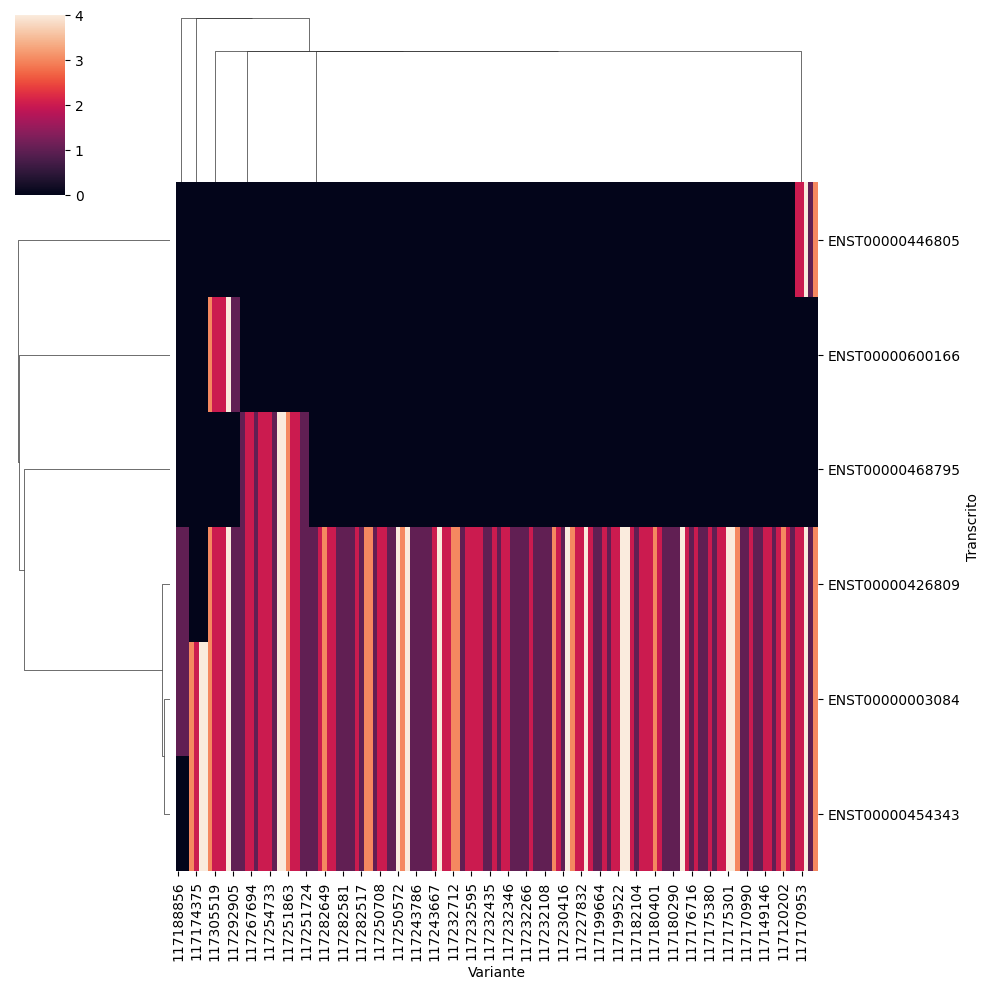

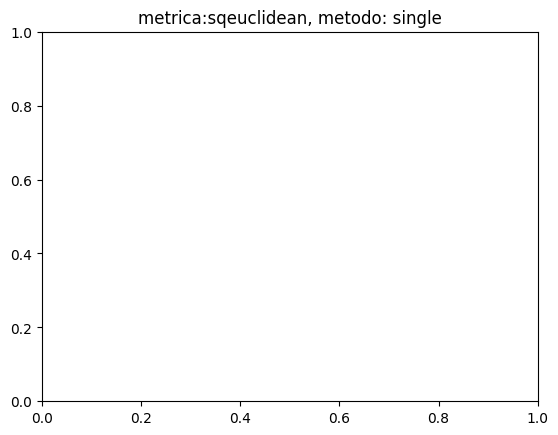

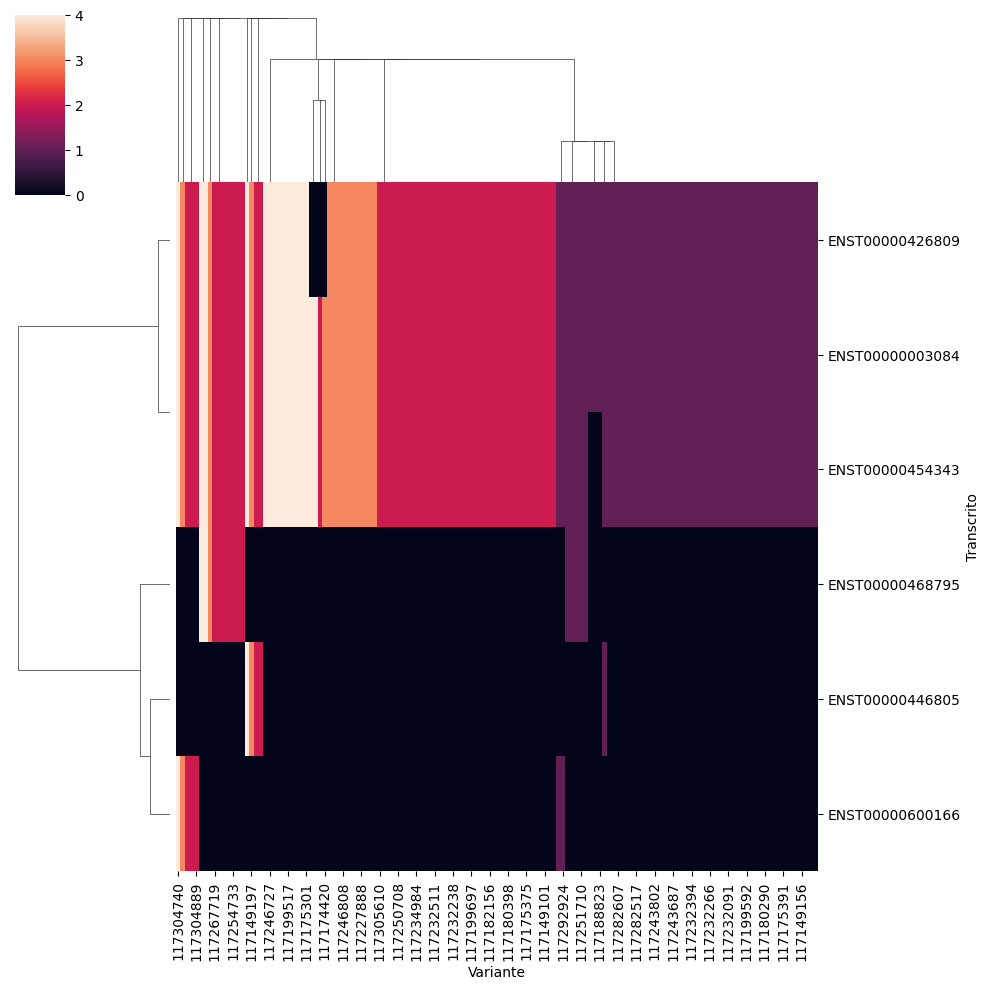

d:\estud\Documents\OneDrive\Documentos\LGHM\.venv\Lib\site-packages\seaborn\matrix.py:615: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, max_dependent_coord * 1.05)
d:\estud\Documents\OneDrive\Documentos\LGHM\.venv\Lib\site-packages\seaborn\matrix.py:623: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, max_dependent_coord * 1.05)


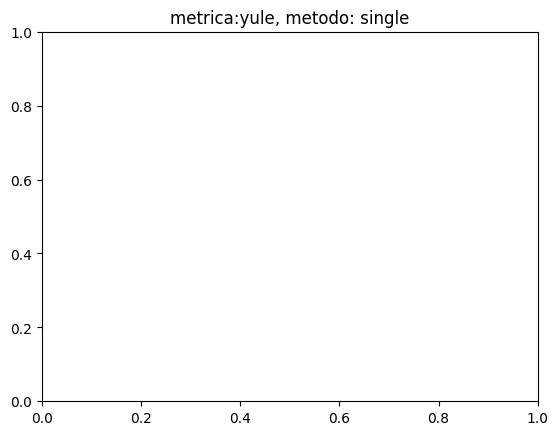

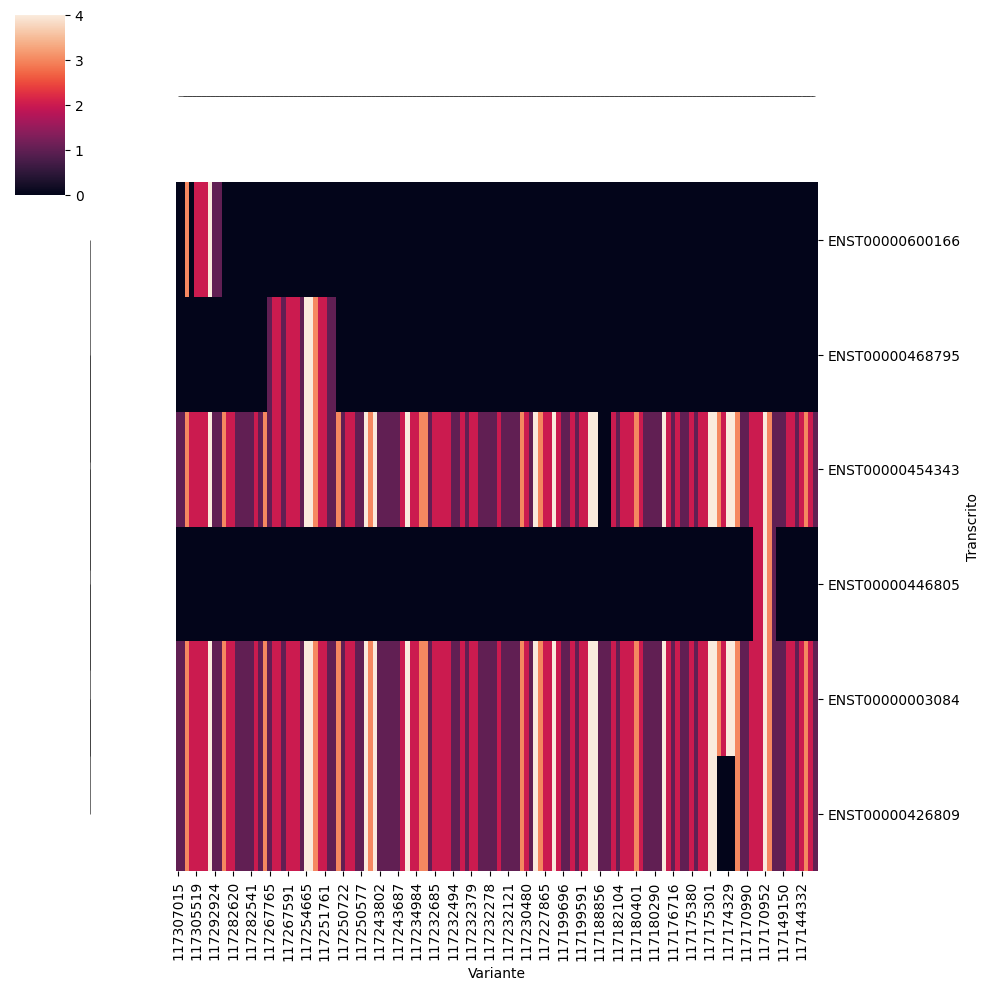

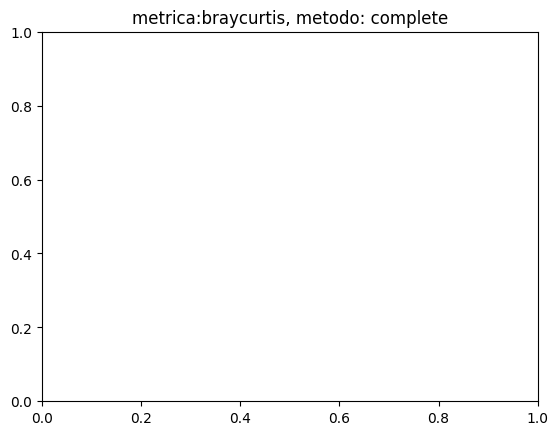

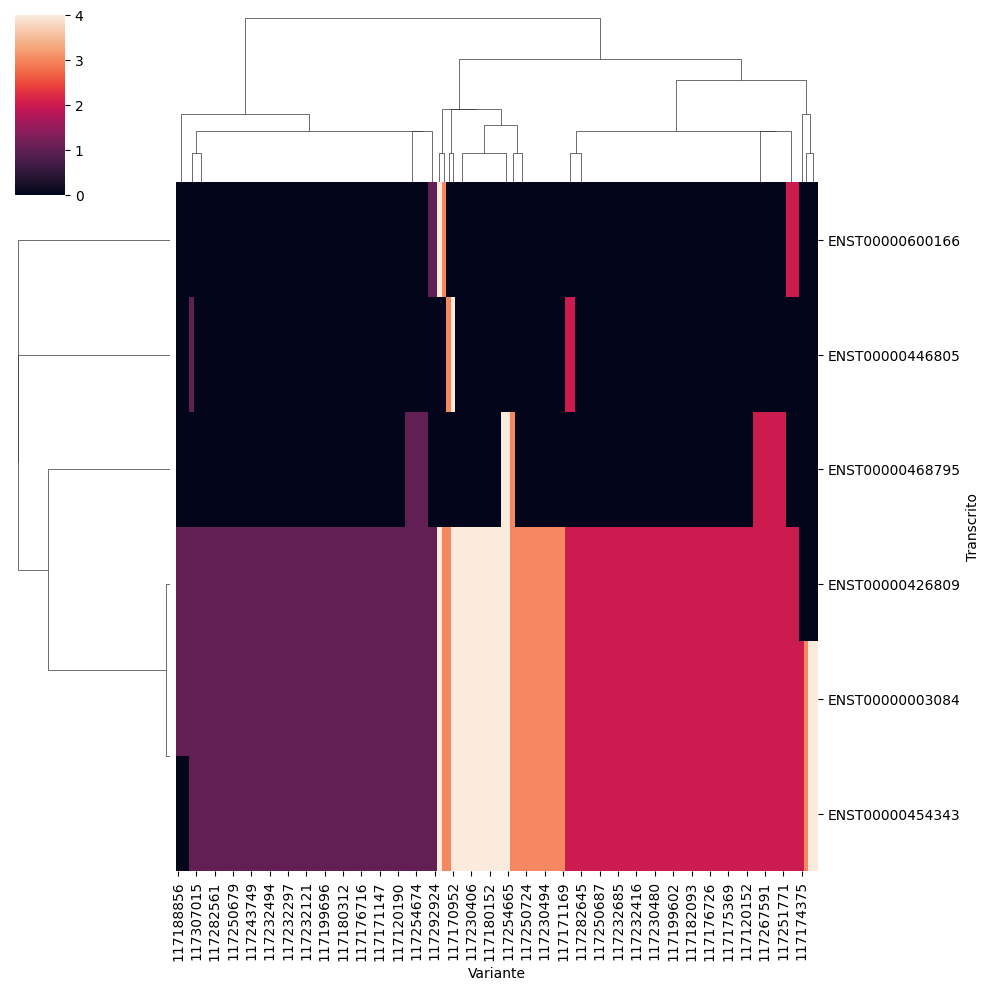

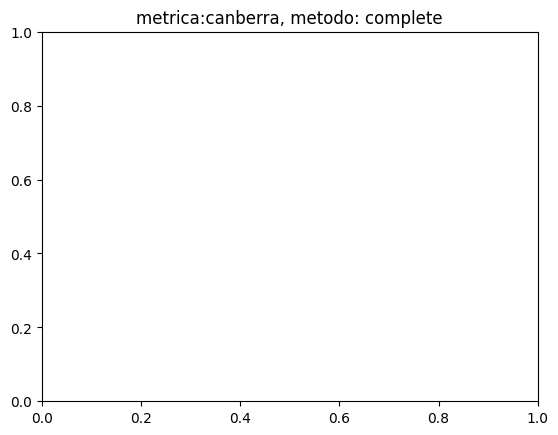

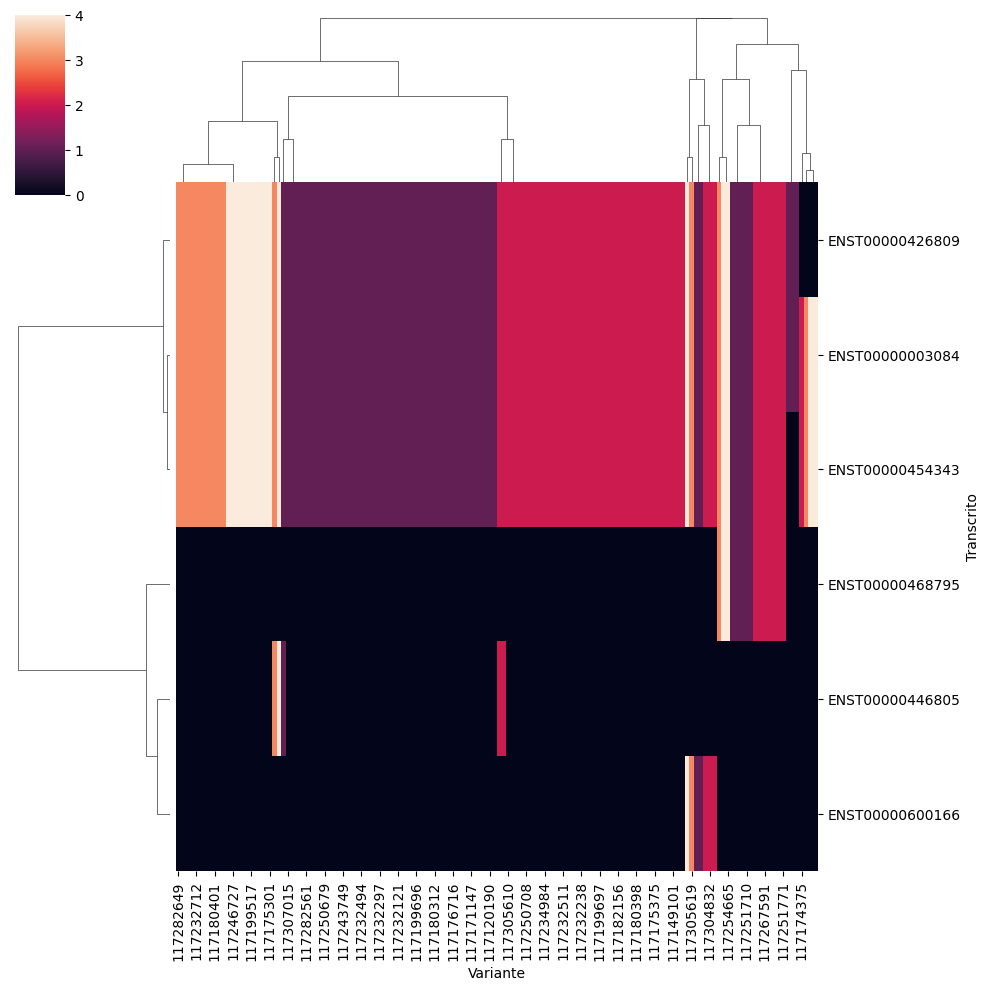

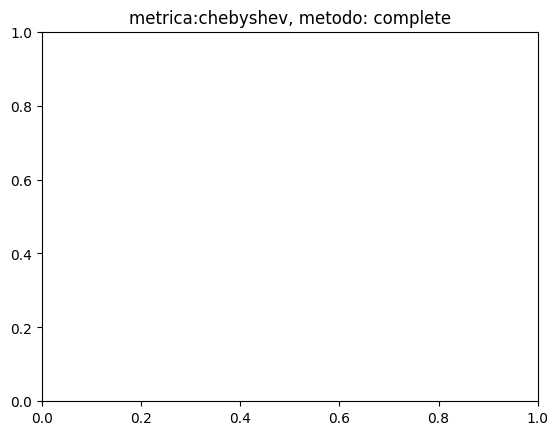

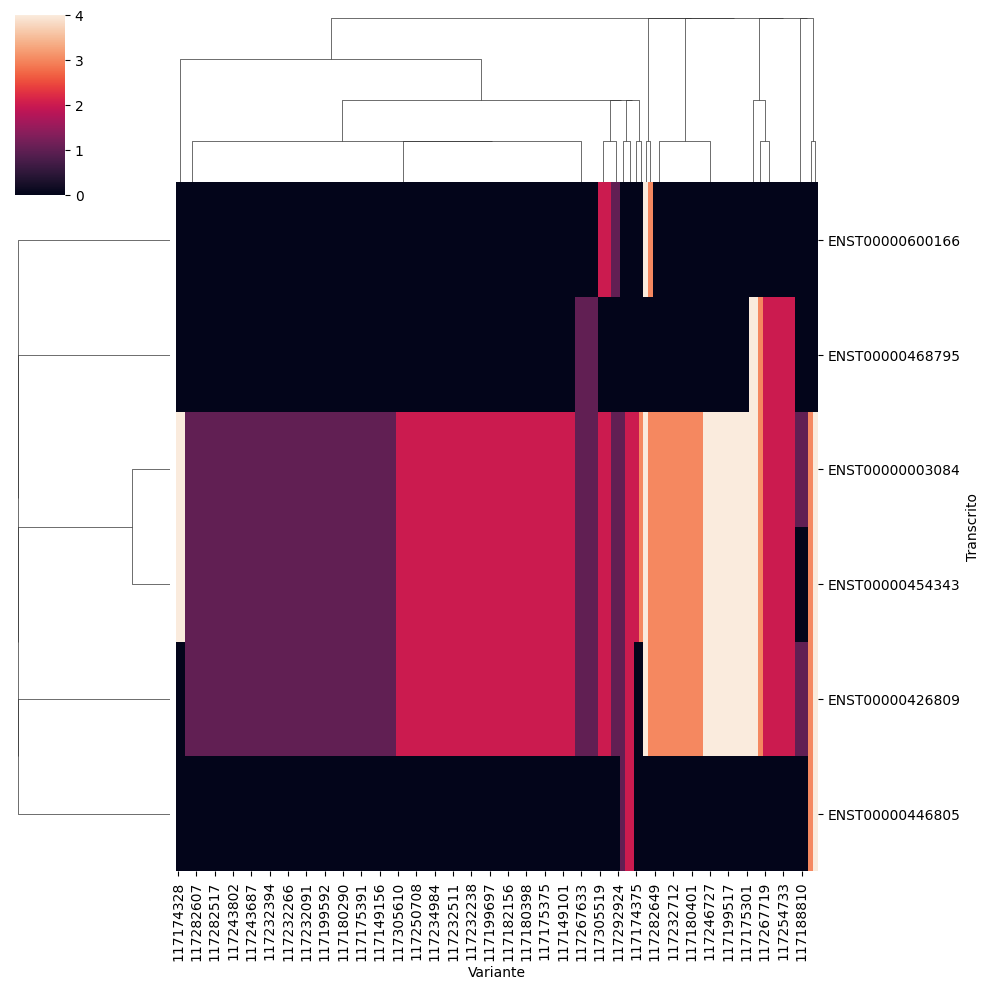

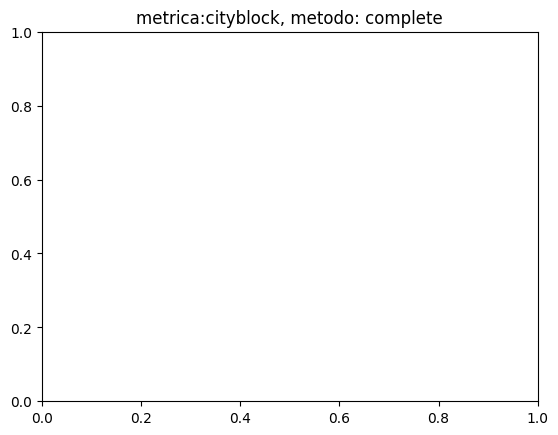

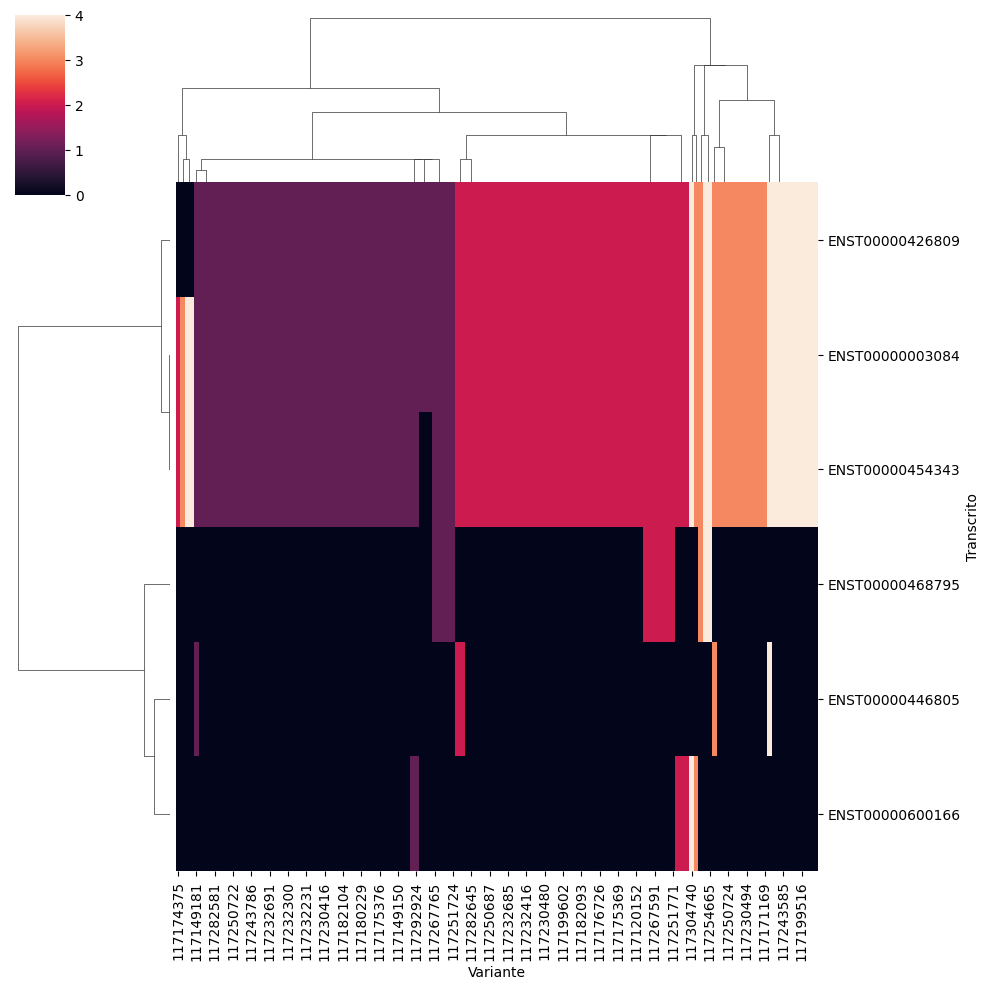

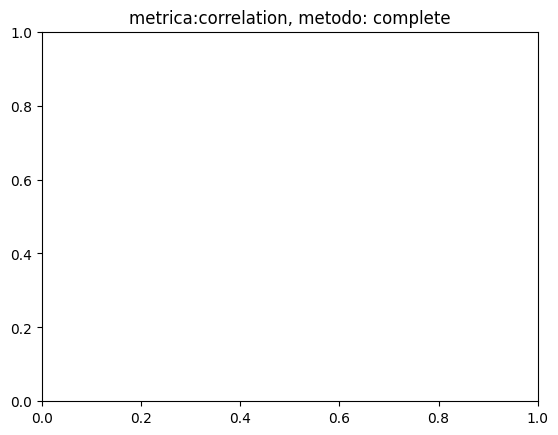

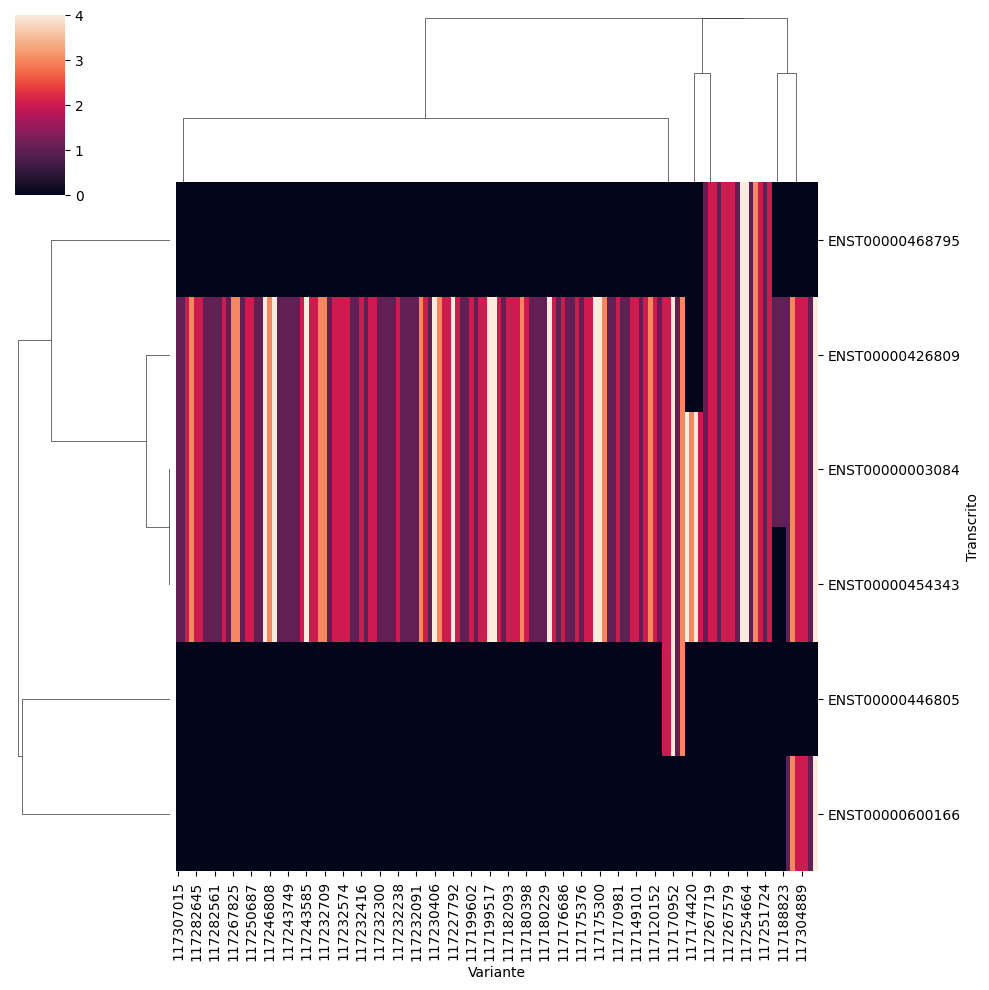

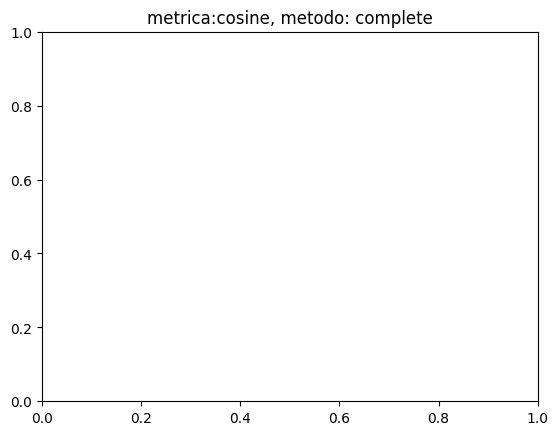

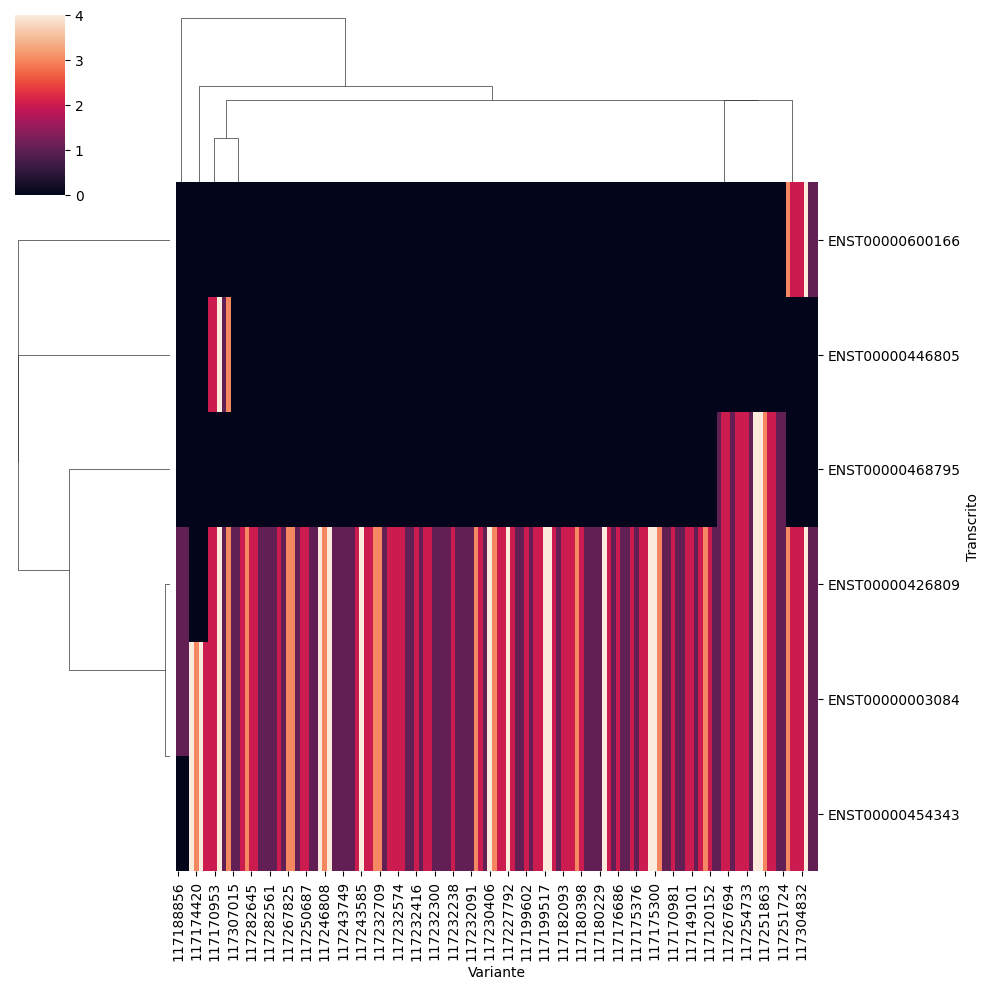

Erro na combinação: metrica=dice, metodo=complete
Linkage 'Z' contains negative distances.


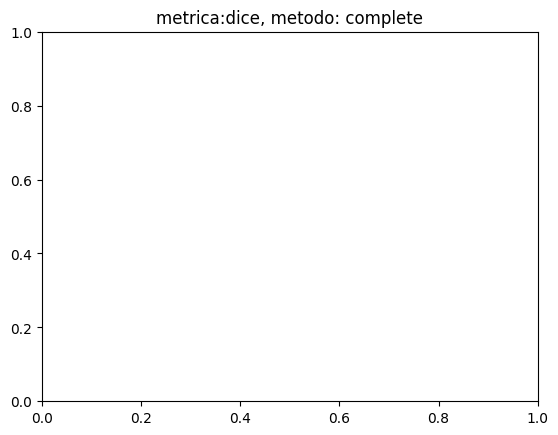

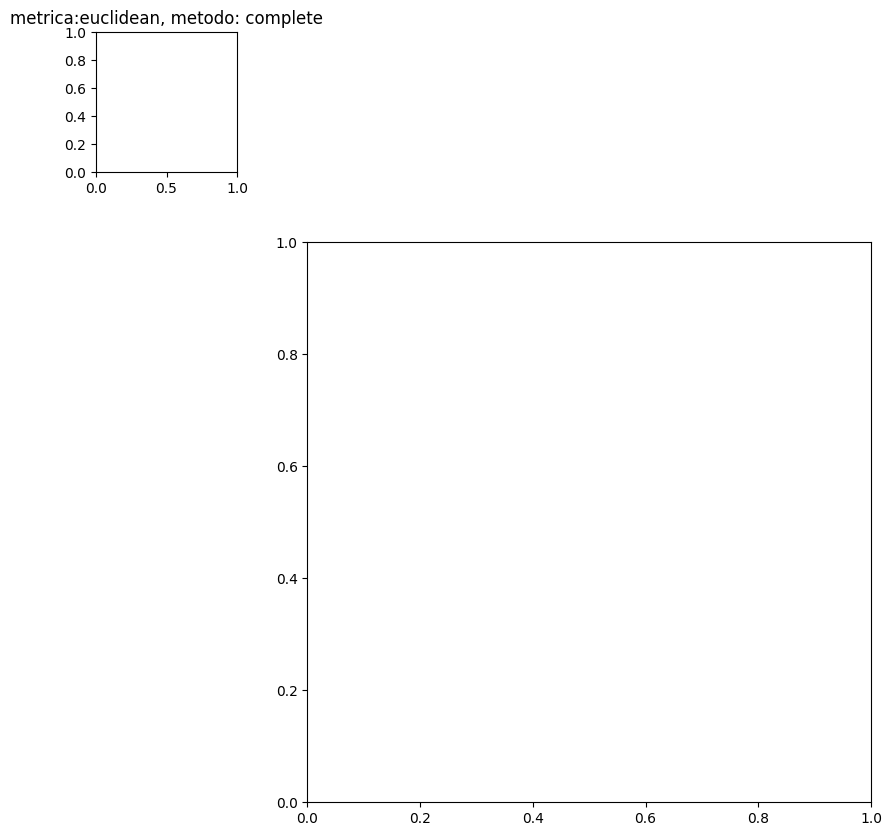

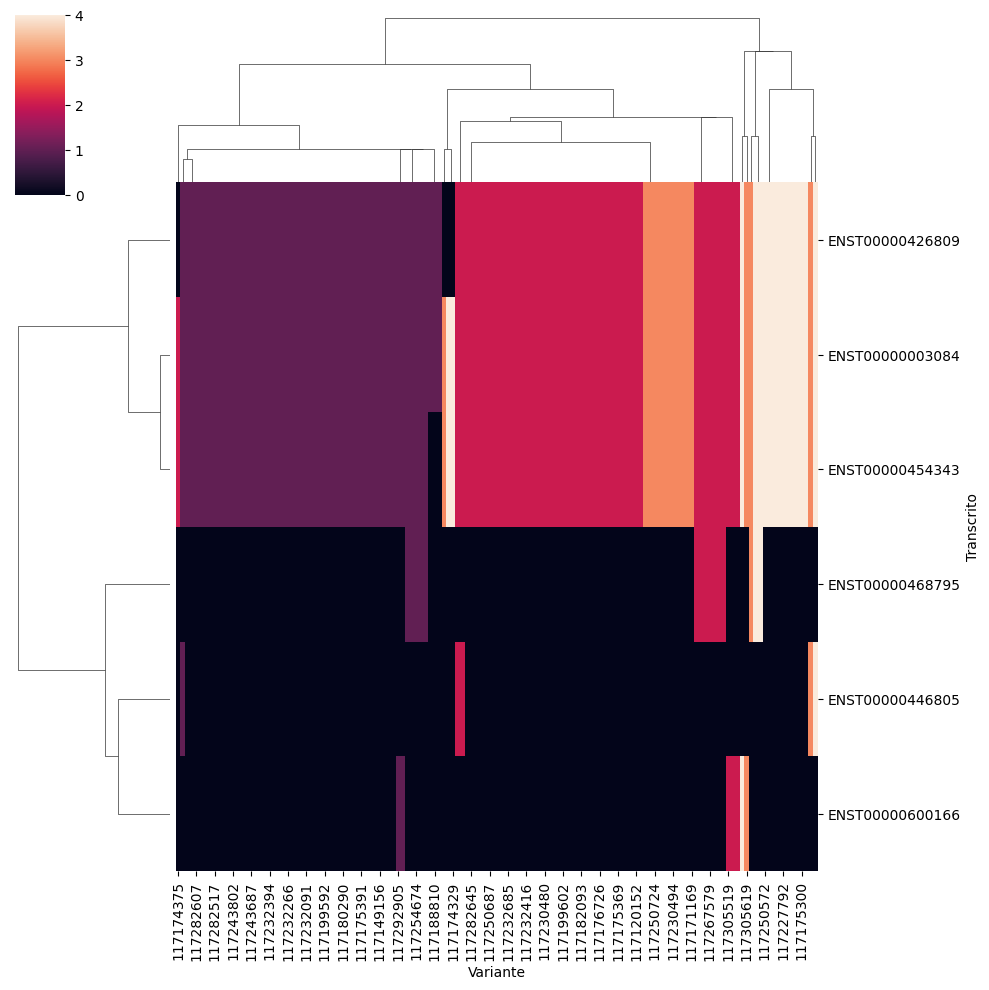

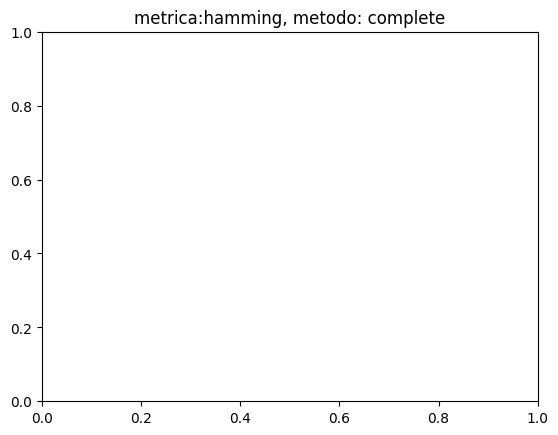

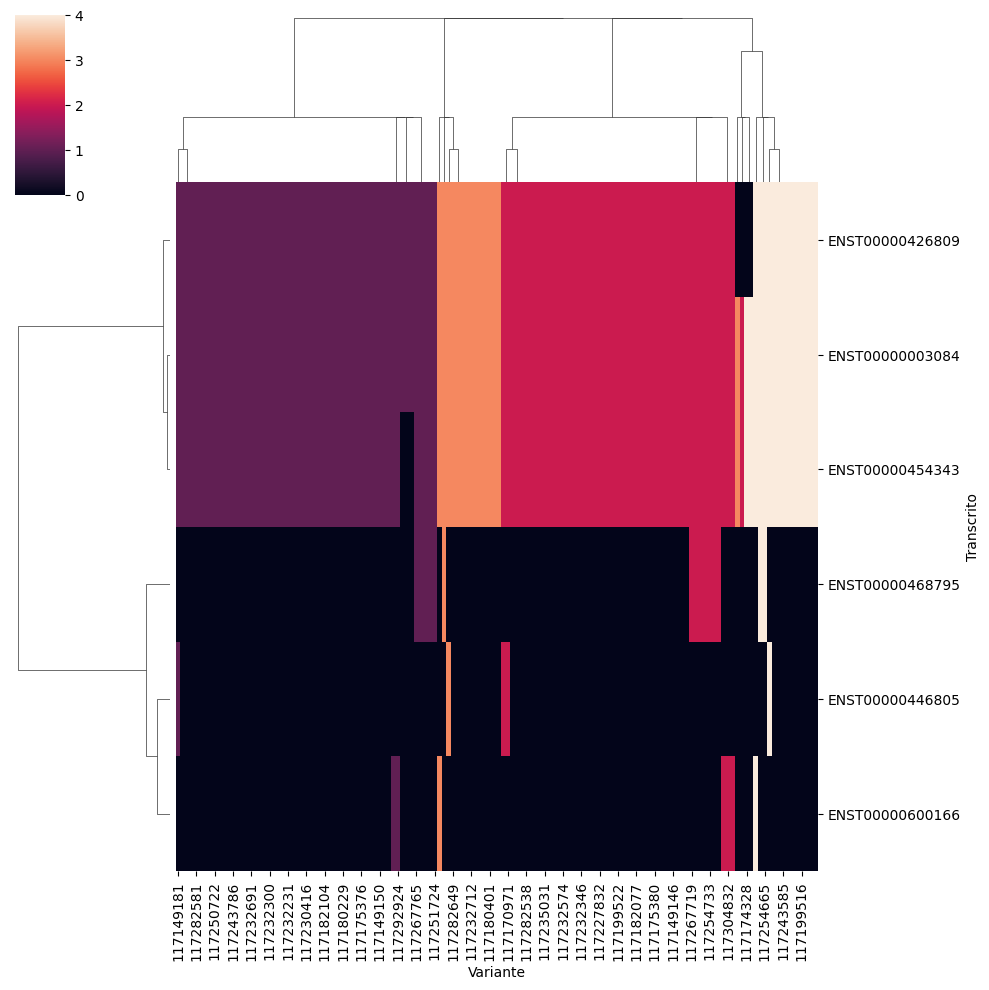

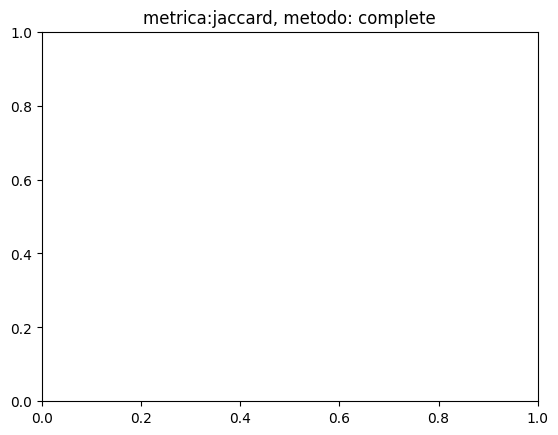

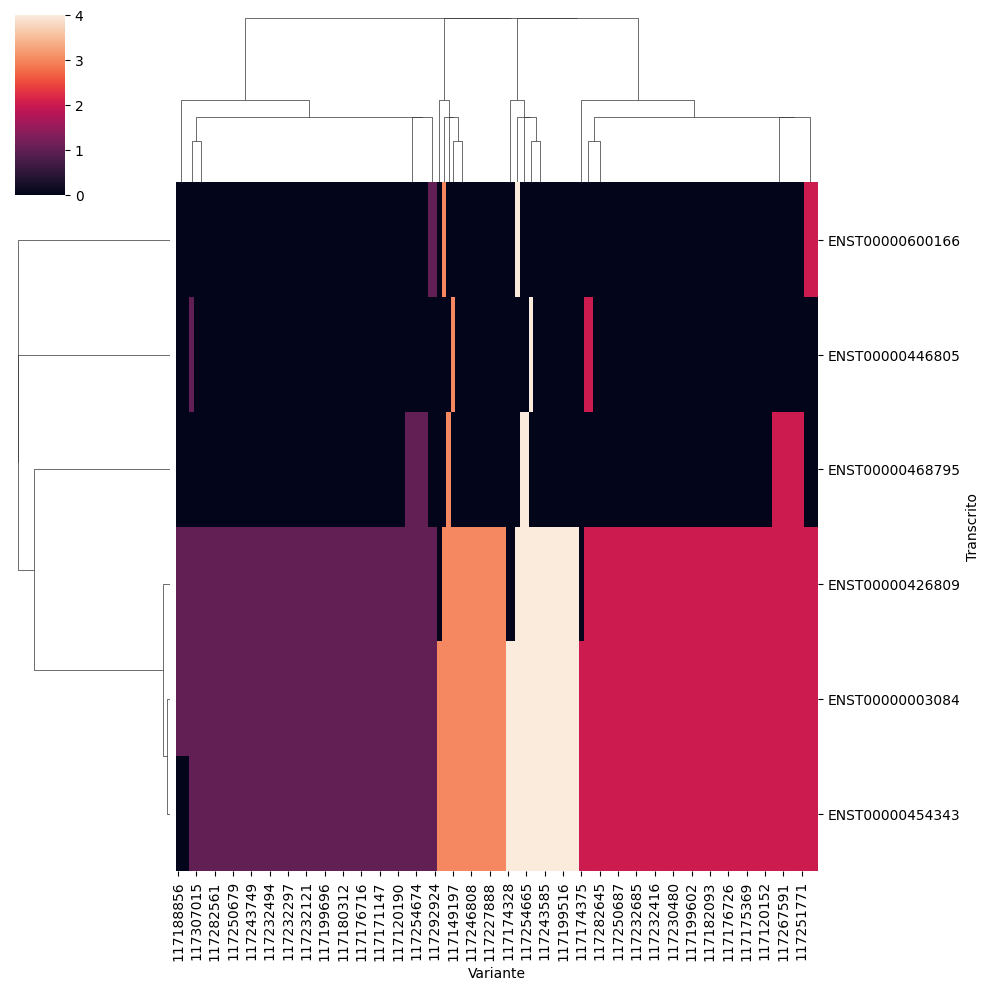

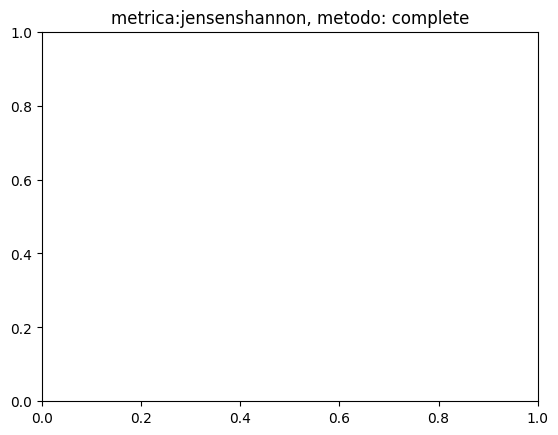

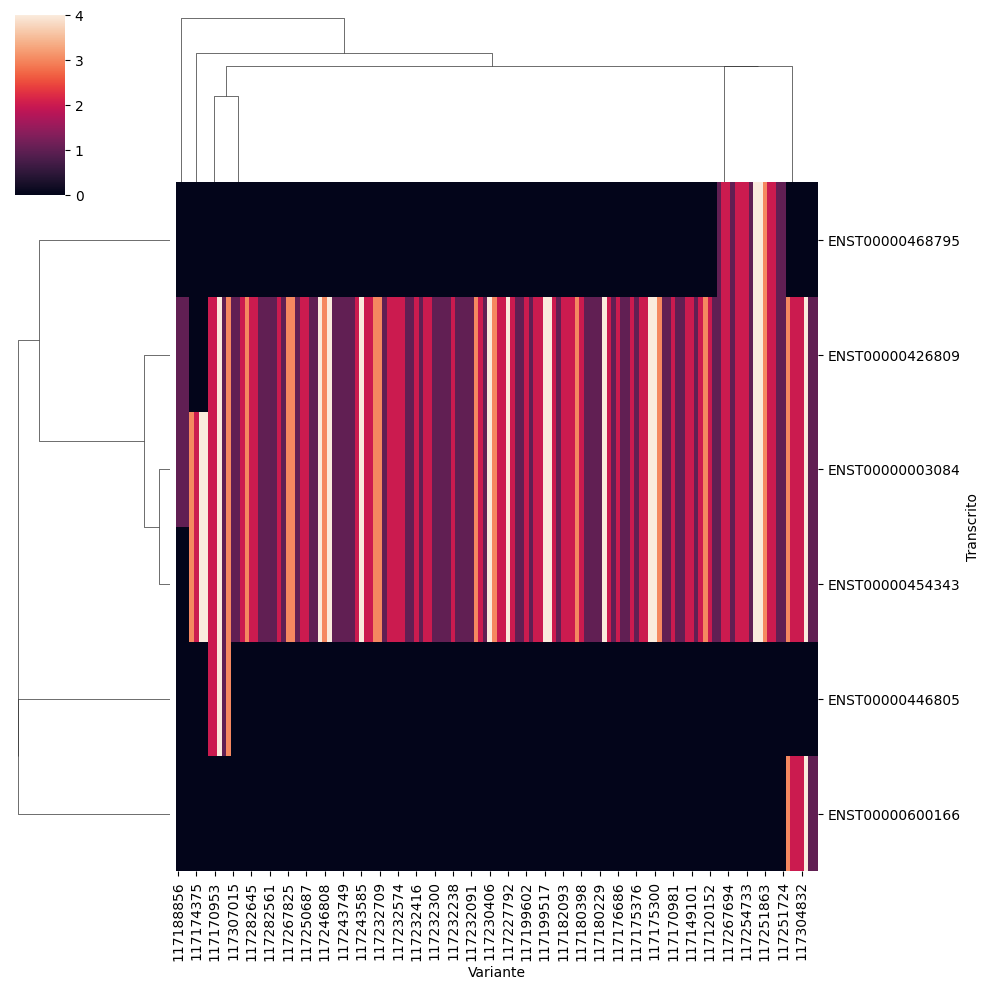

Erro na combinação: metrica=kulczynski1, metodo=complete
The condensed distance matrix must contain only finite values.
Erro na combinação: metrica=mahalanobis, metodo=complete
The number of observations (6) is too small; the covariance matrix is singular. For observations with 140 dimensions, at least 141 observations are required.


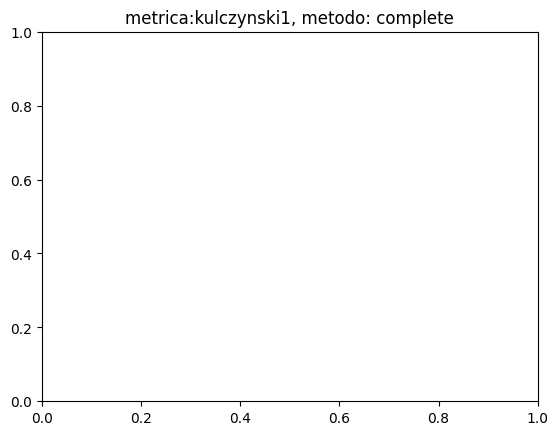

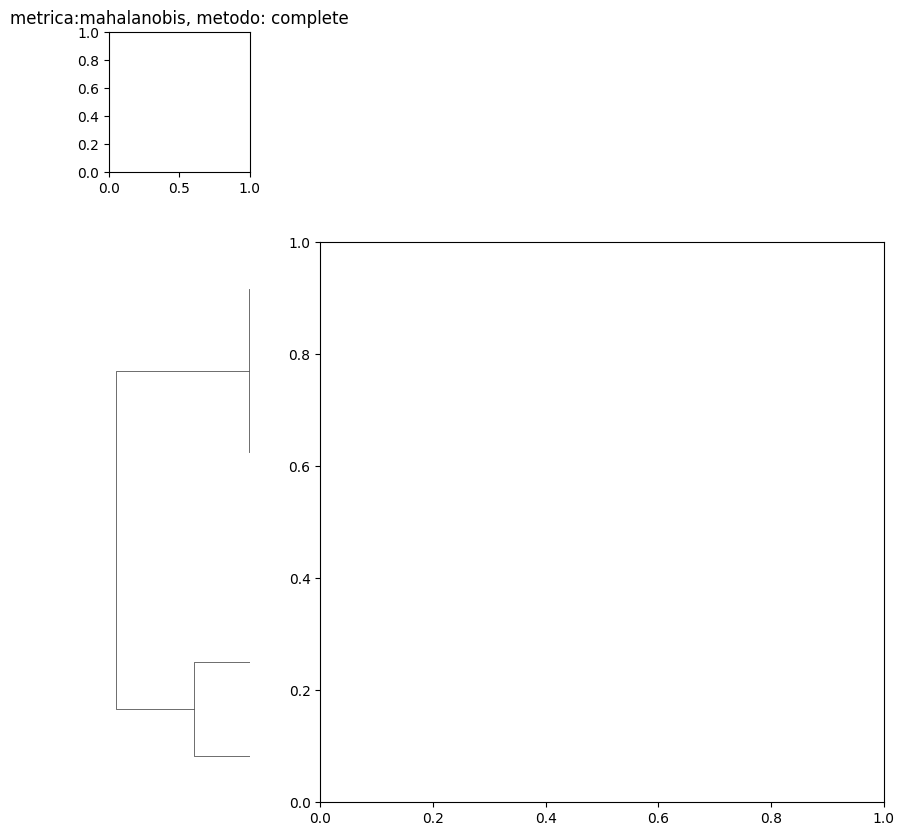

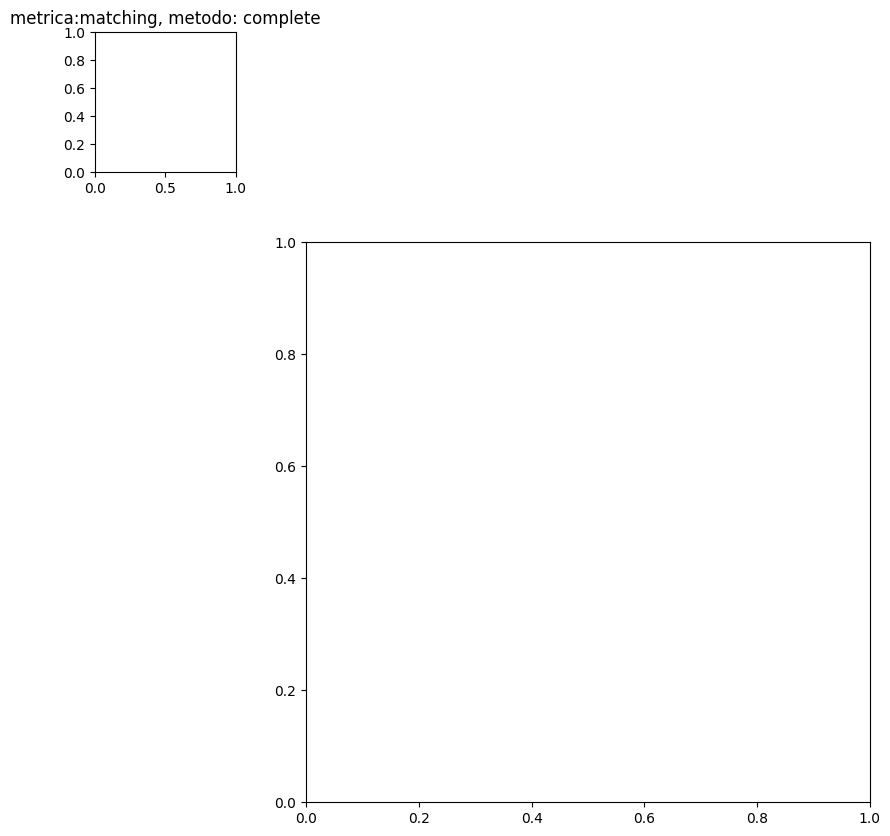

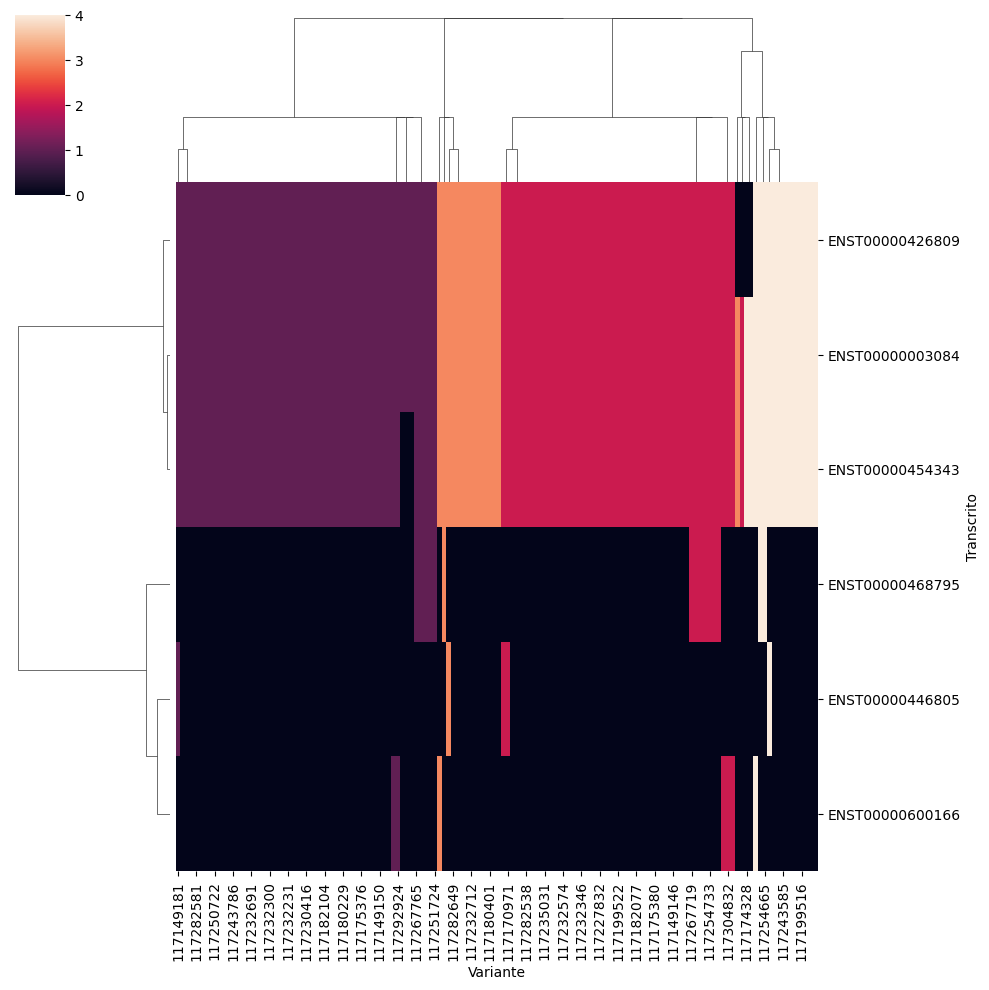

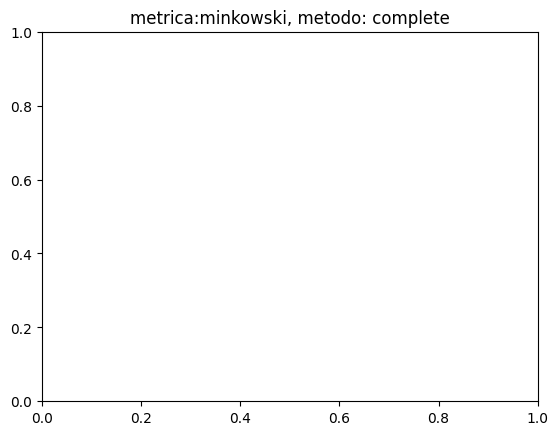

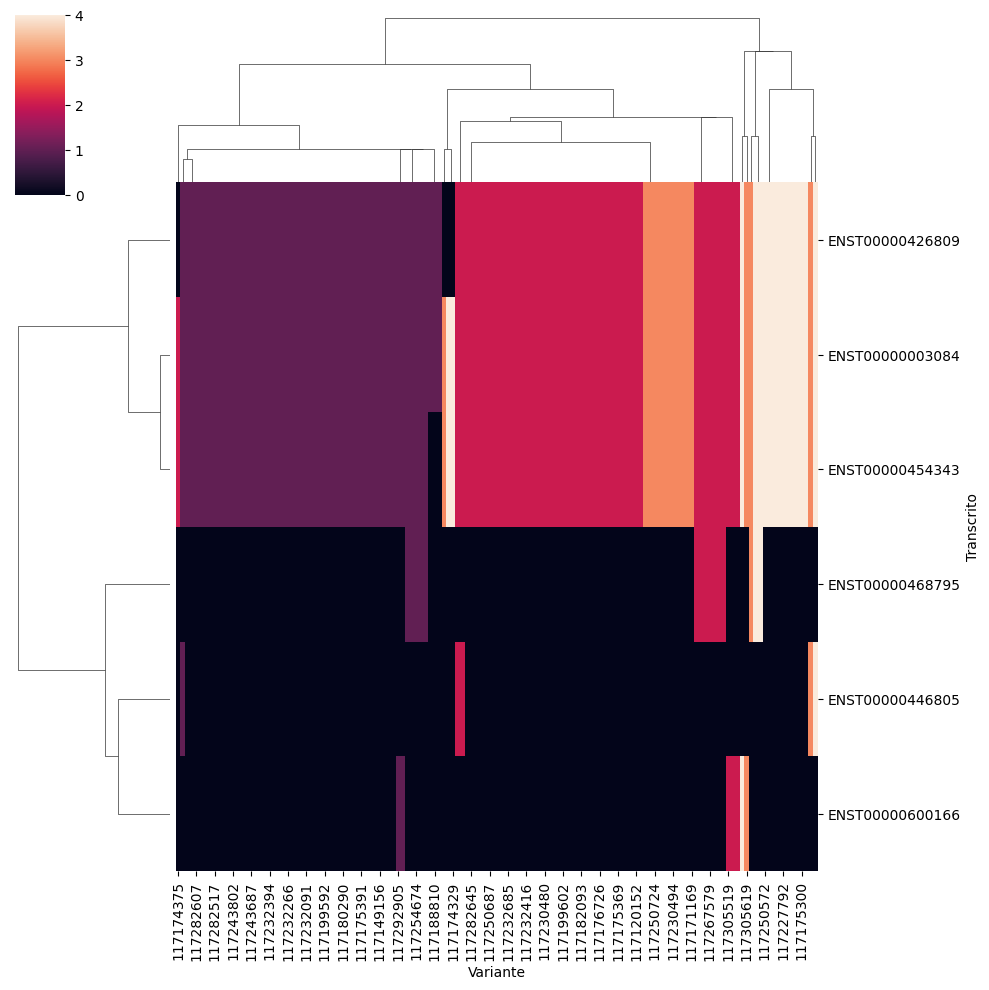

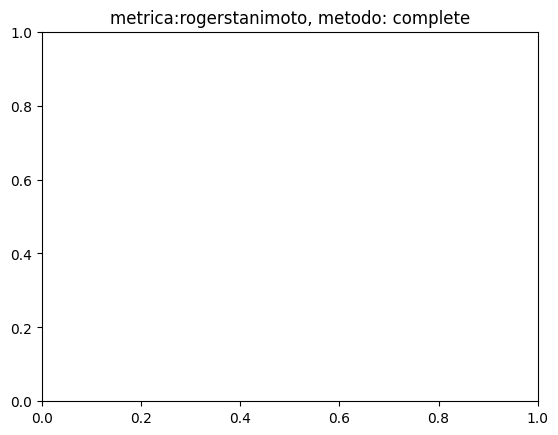

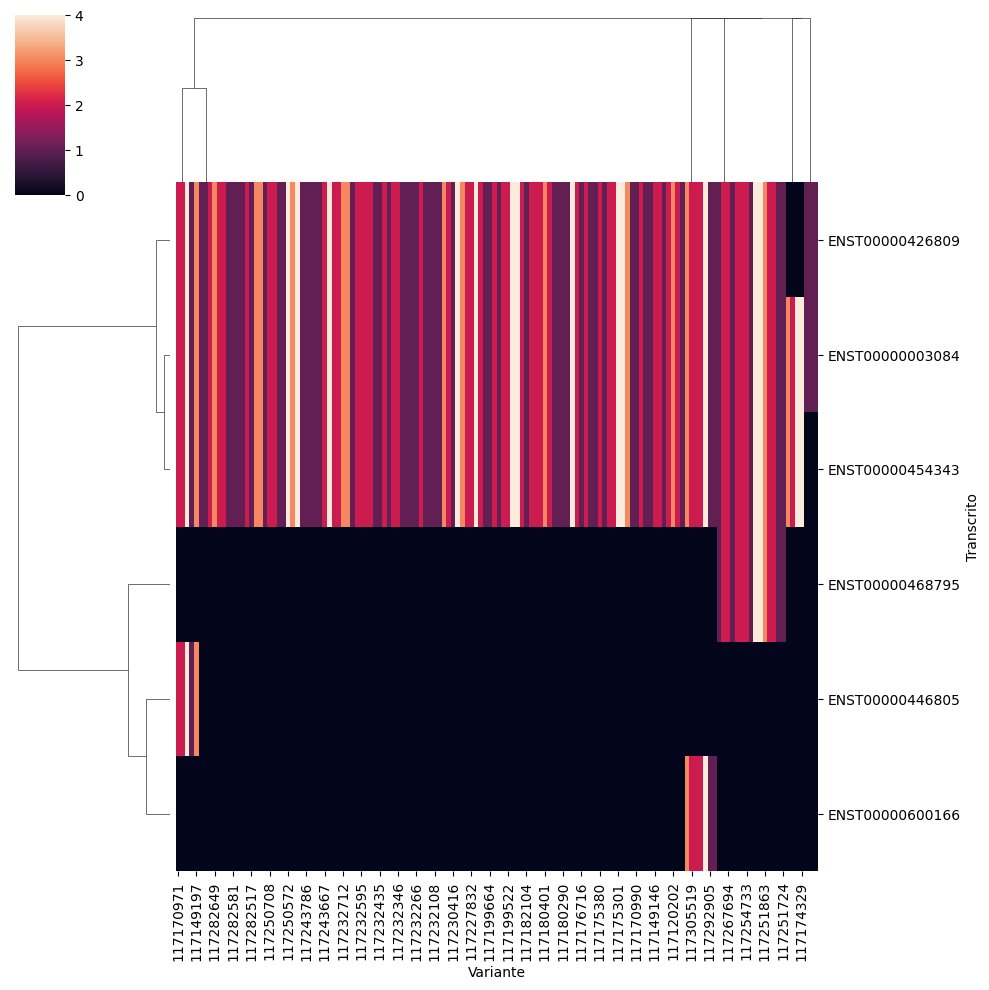

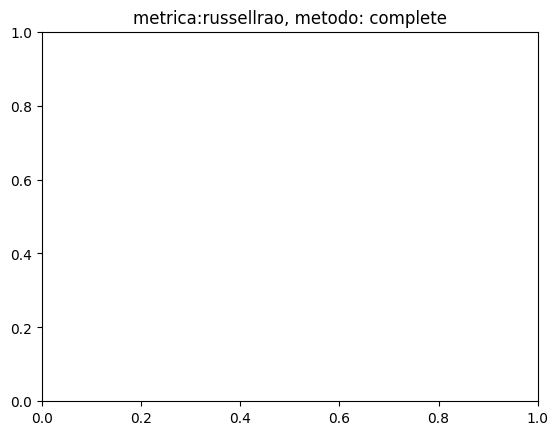

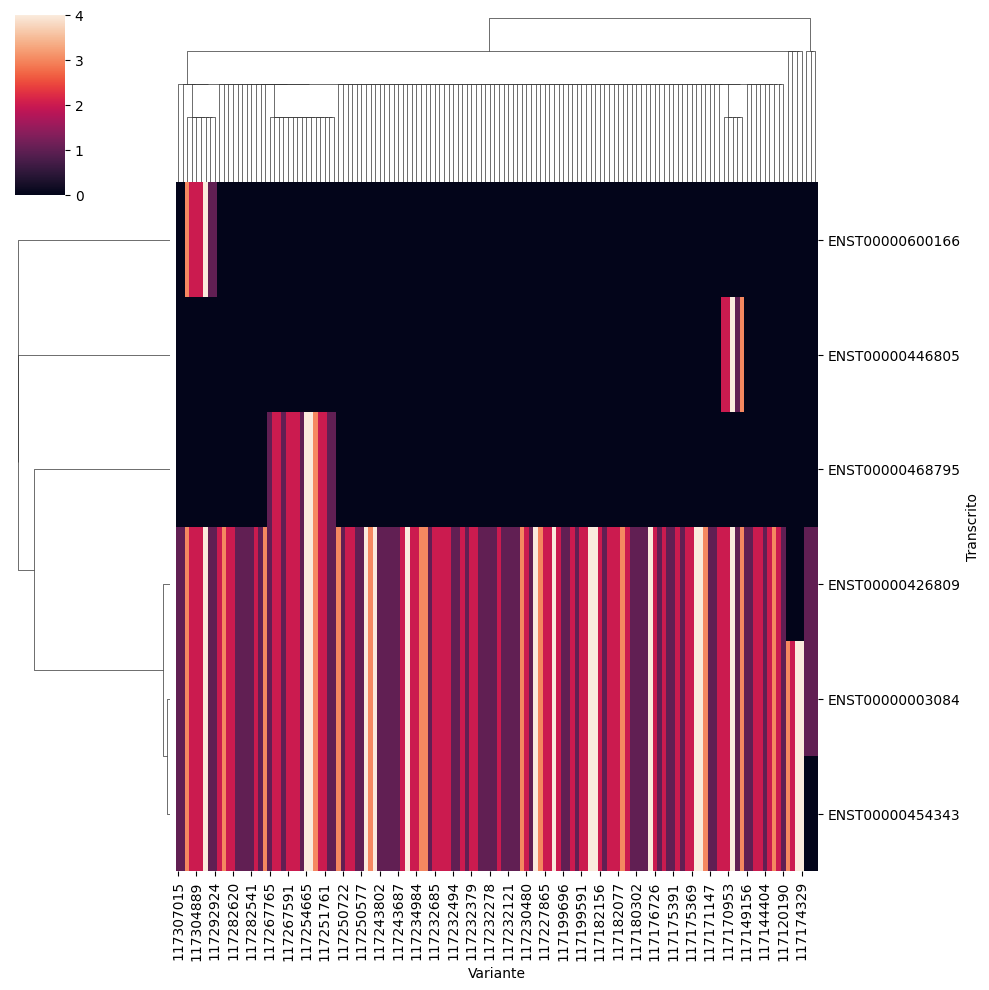

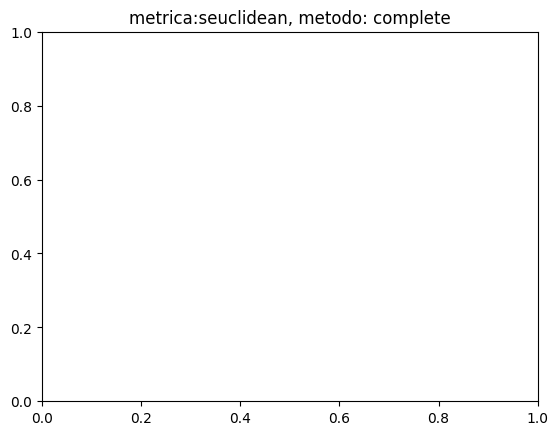

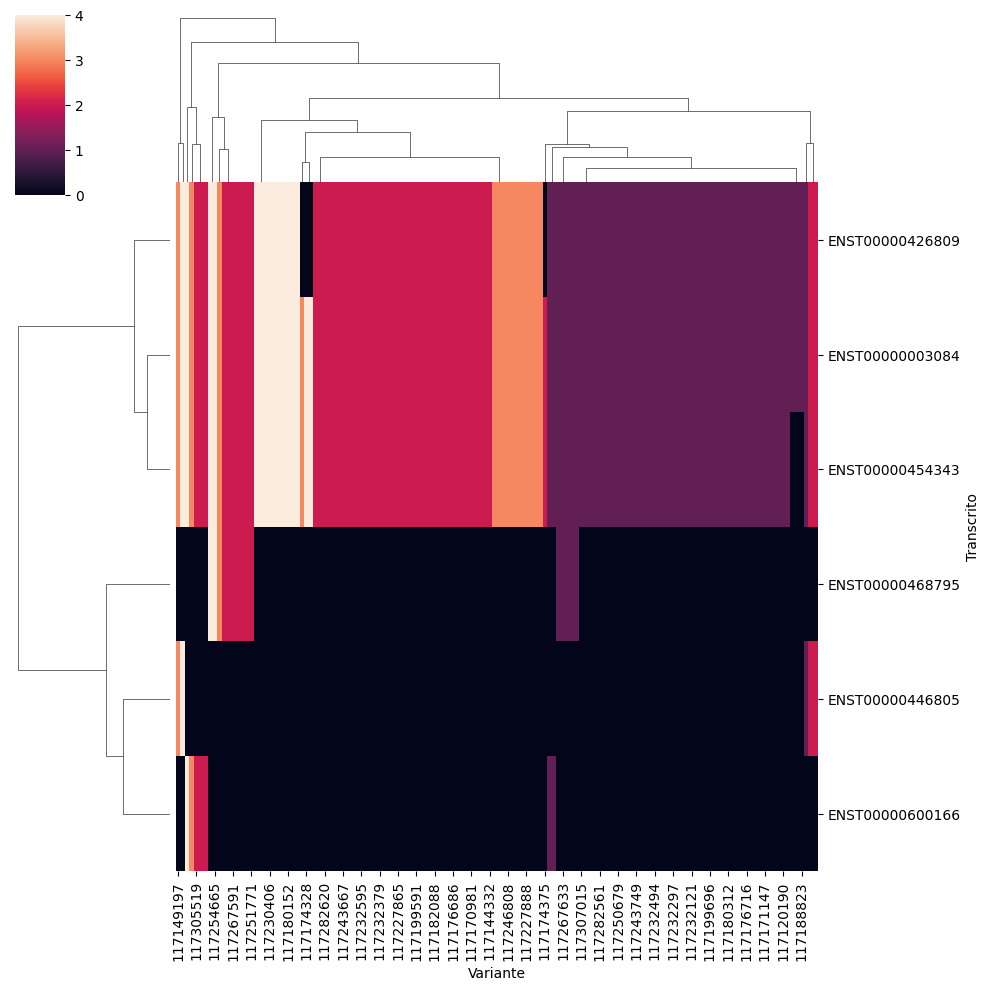

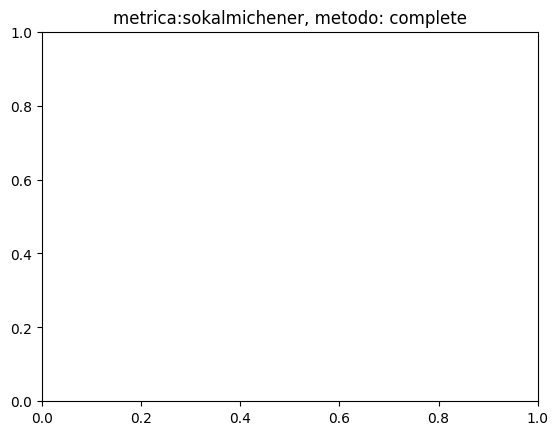

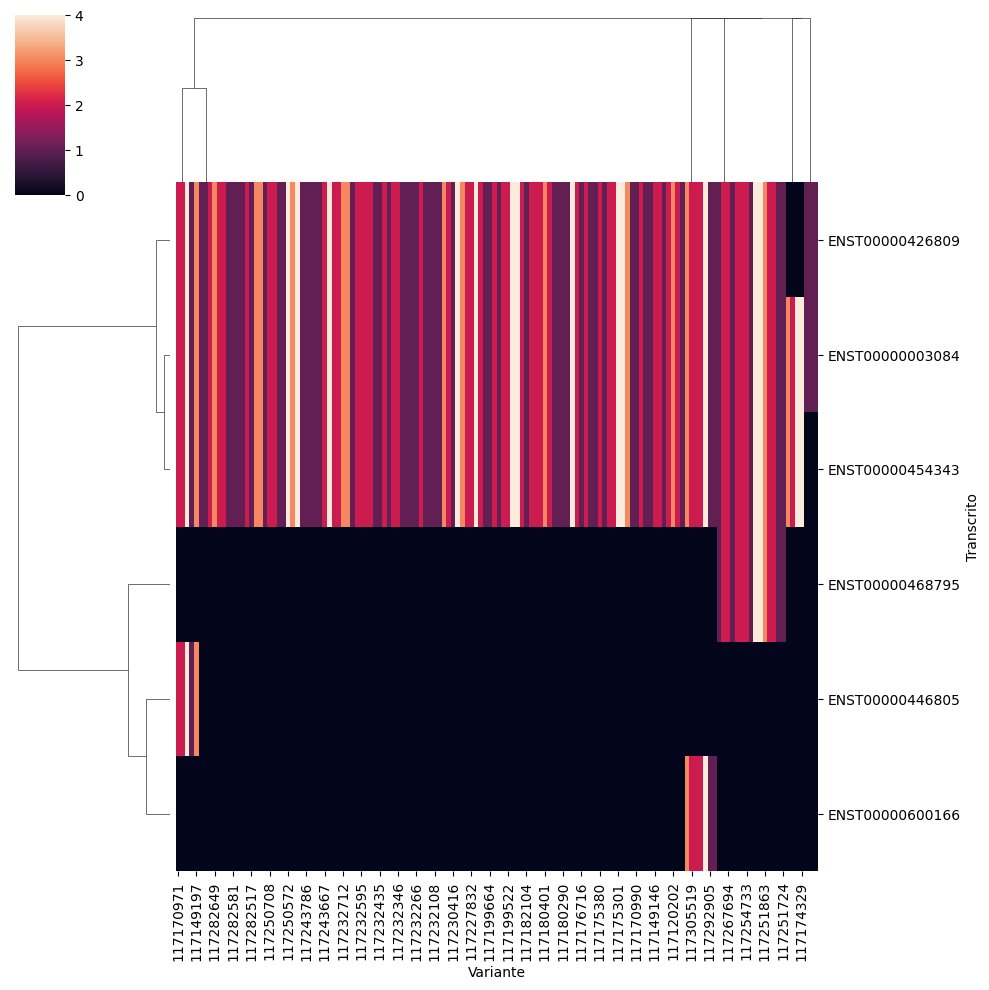

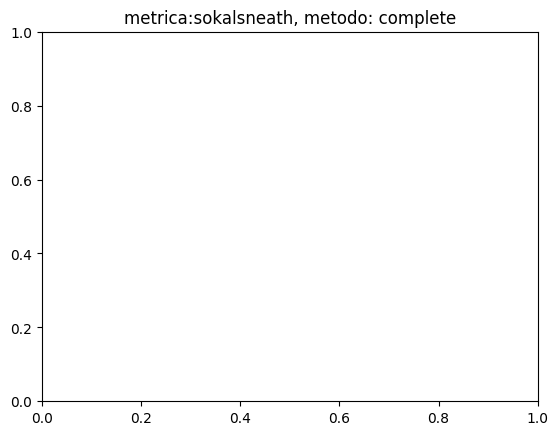

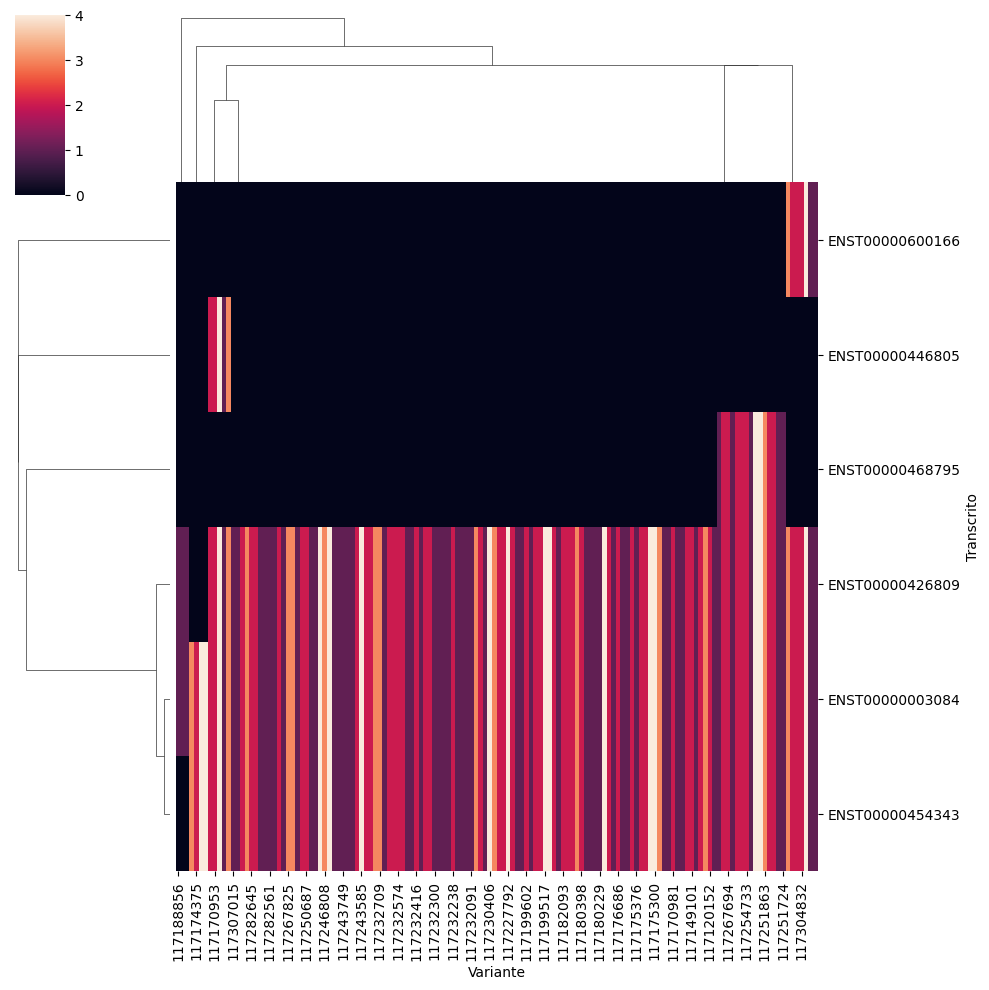

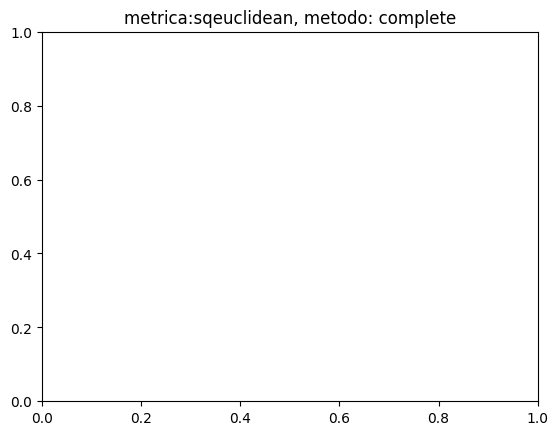

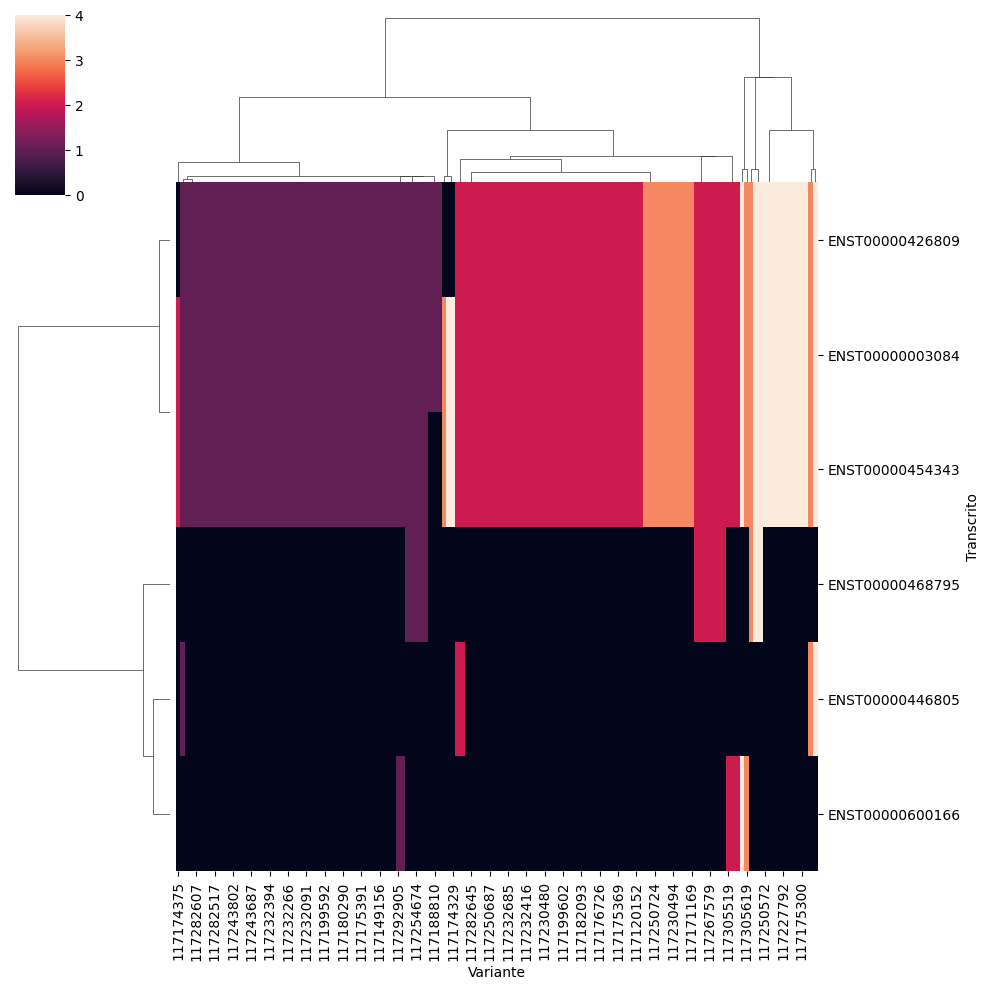

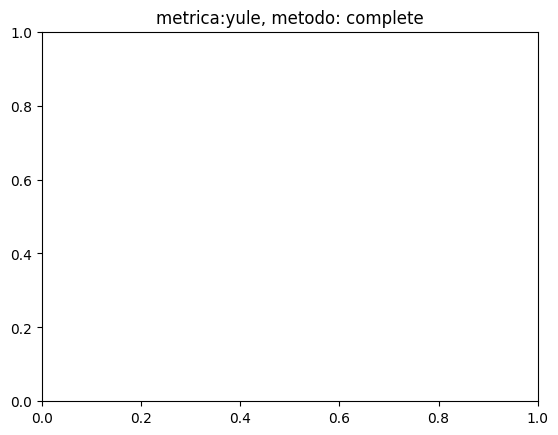

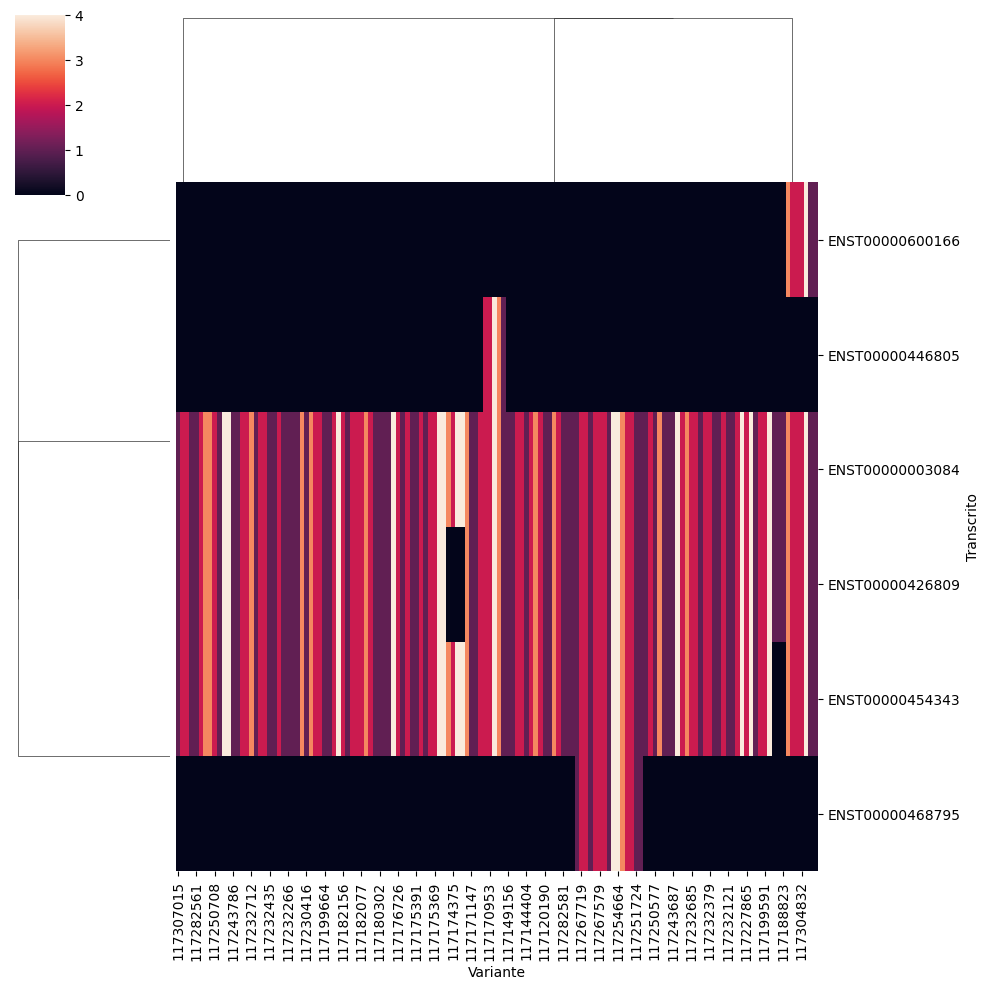

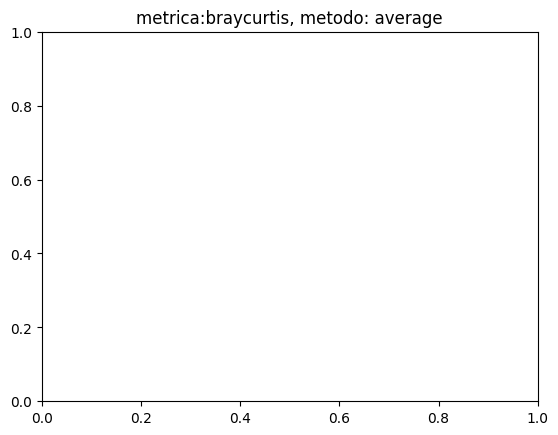

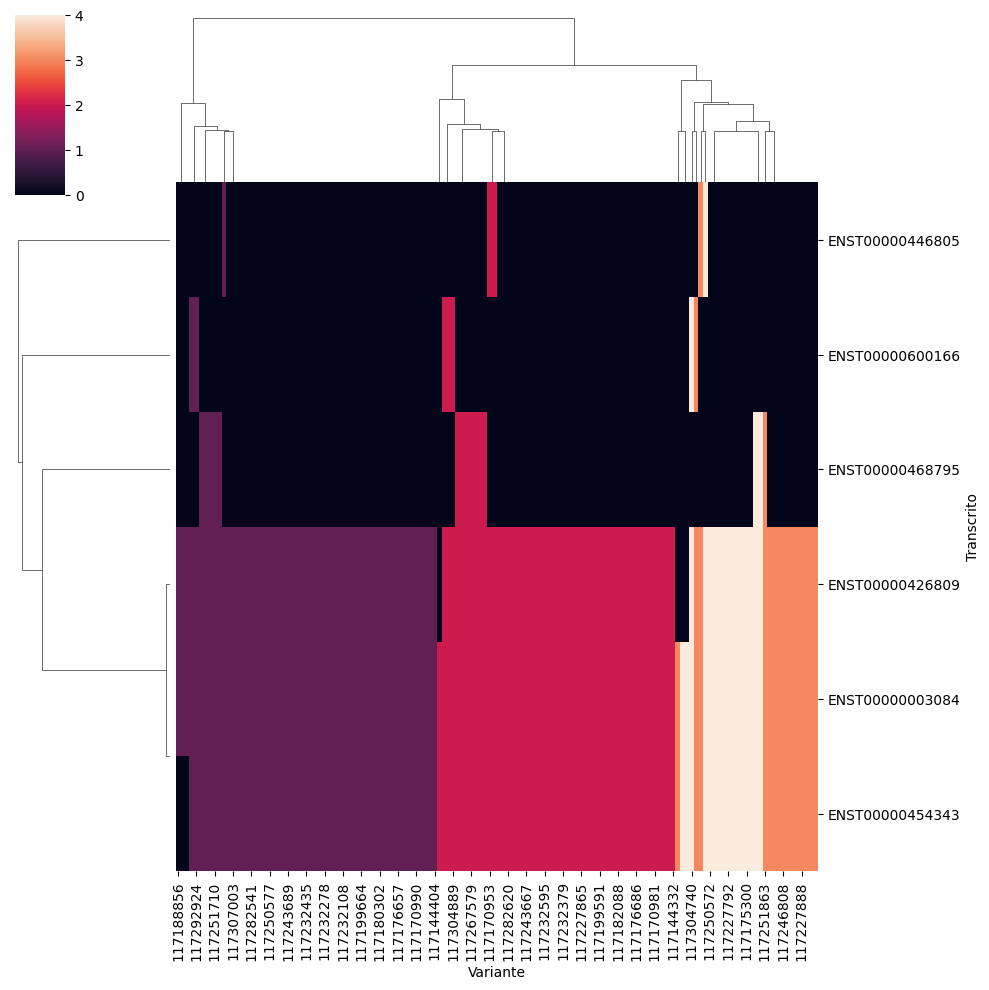

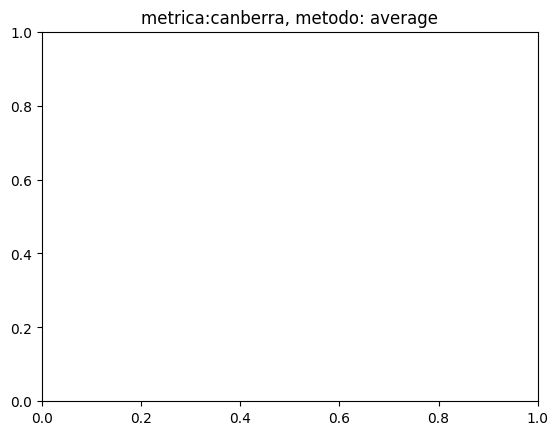

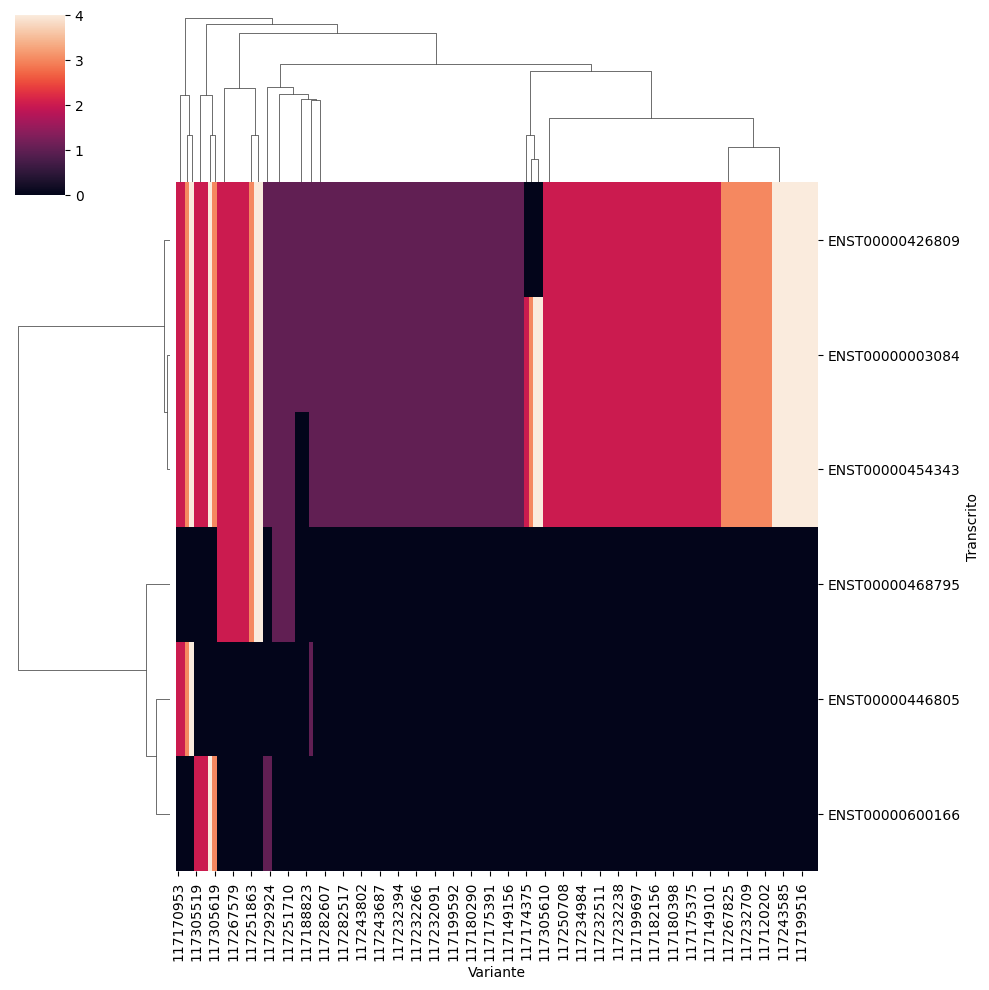

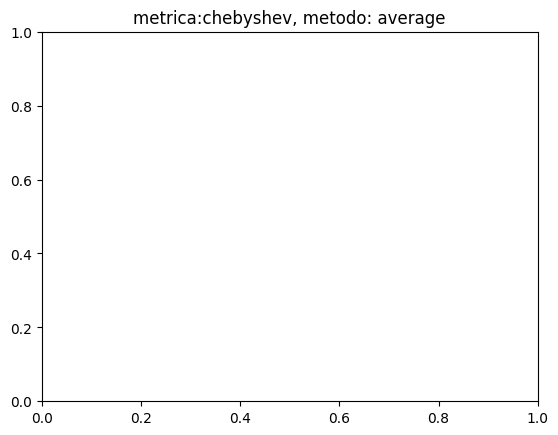

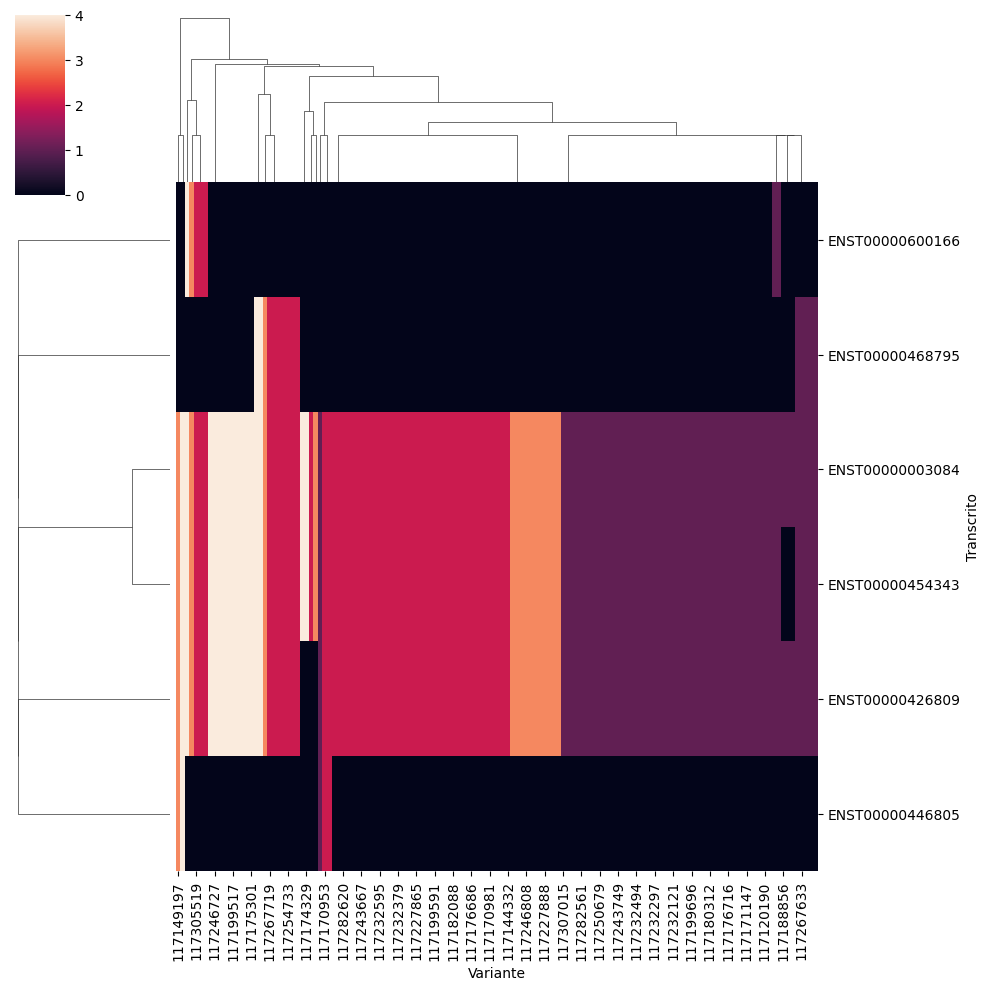

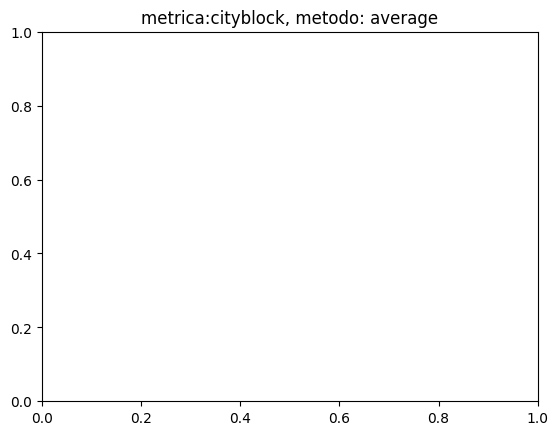

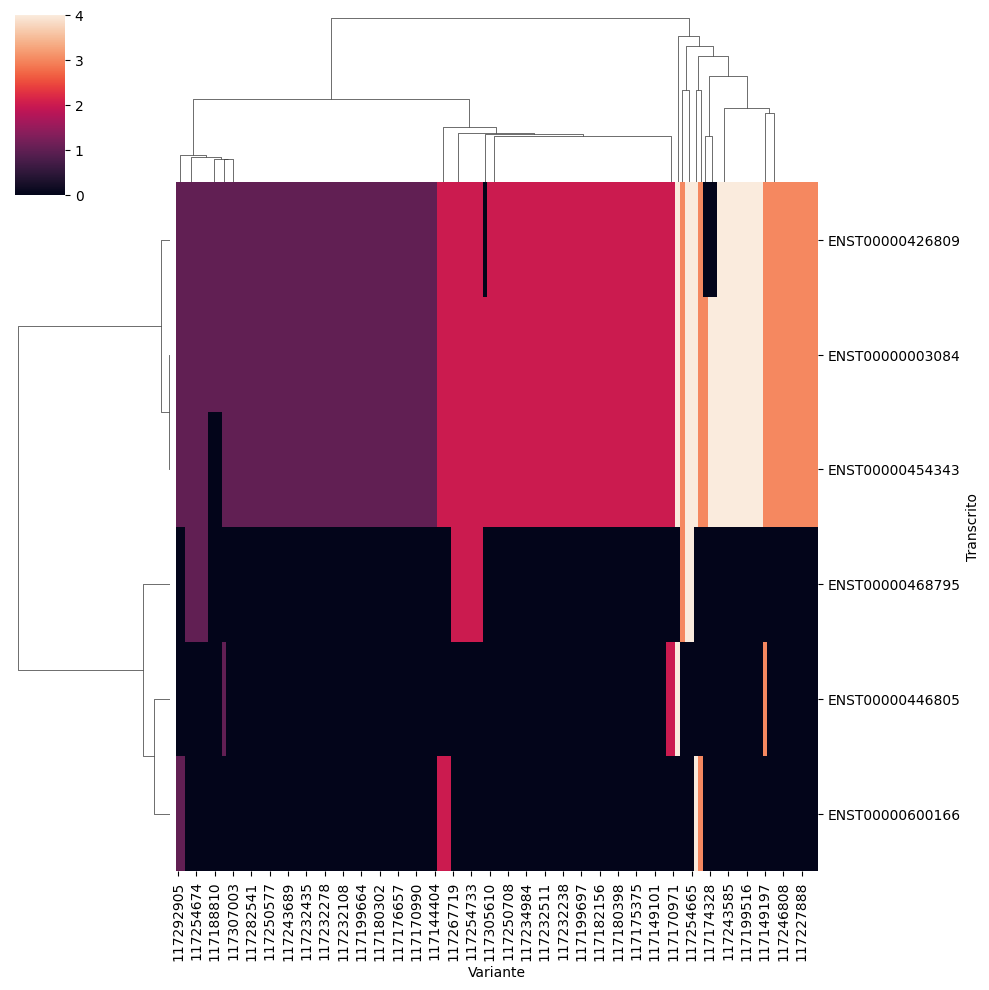

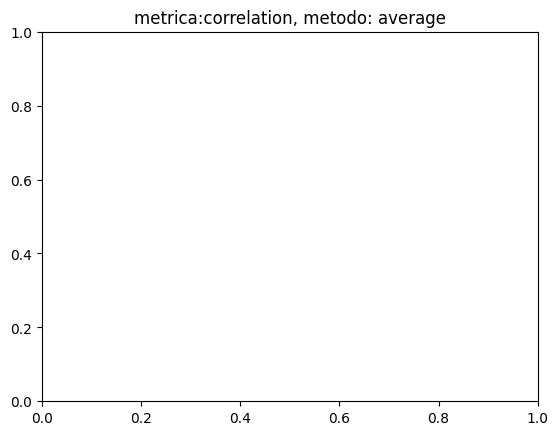

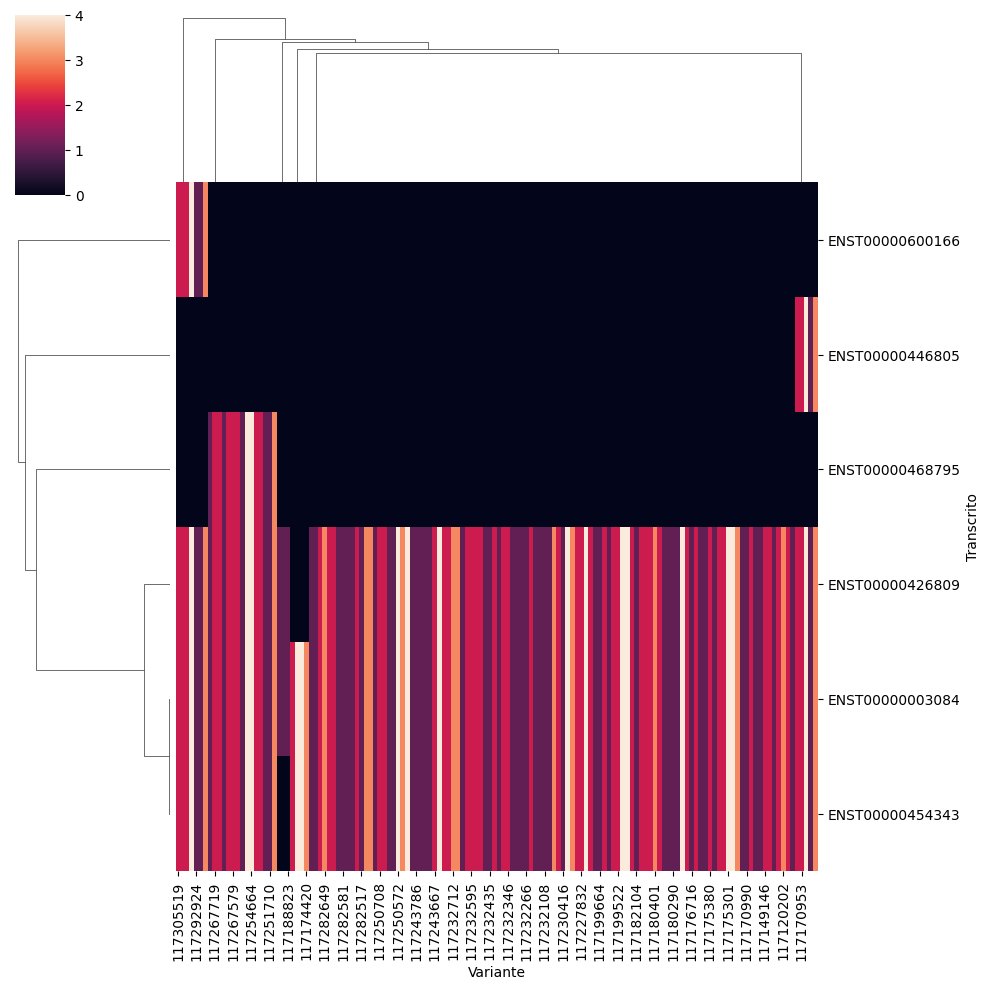

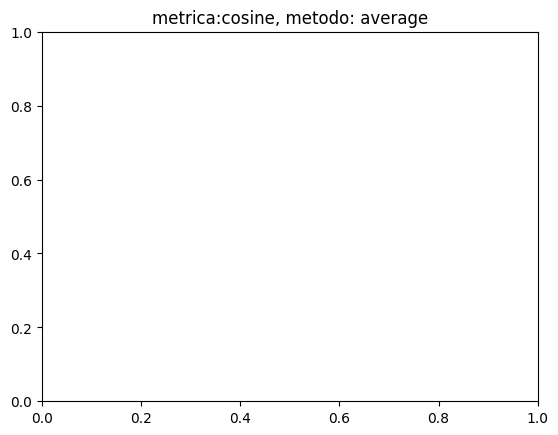

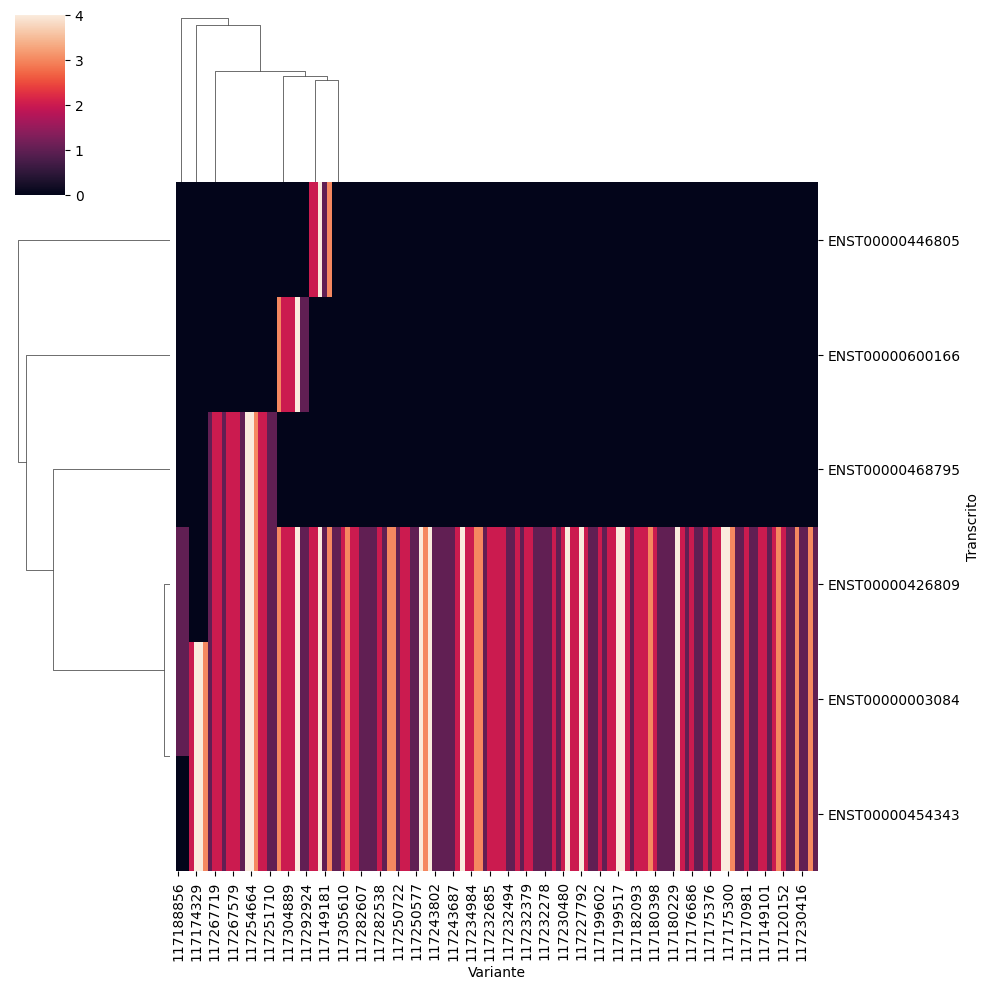

Erro na combinação: metrica=dice, metodo=average
Linkage 'Z' contains negative distances.


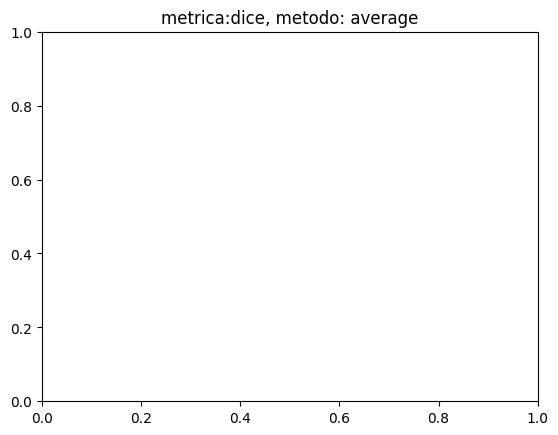

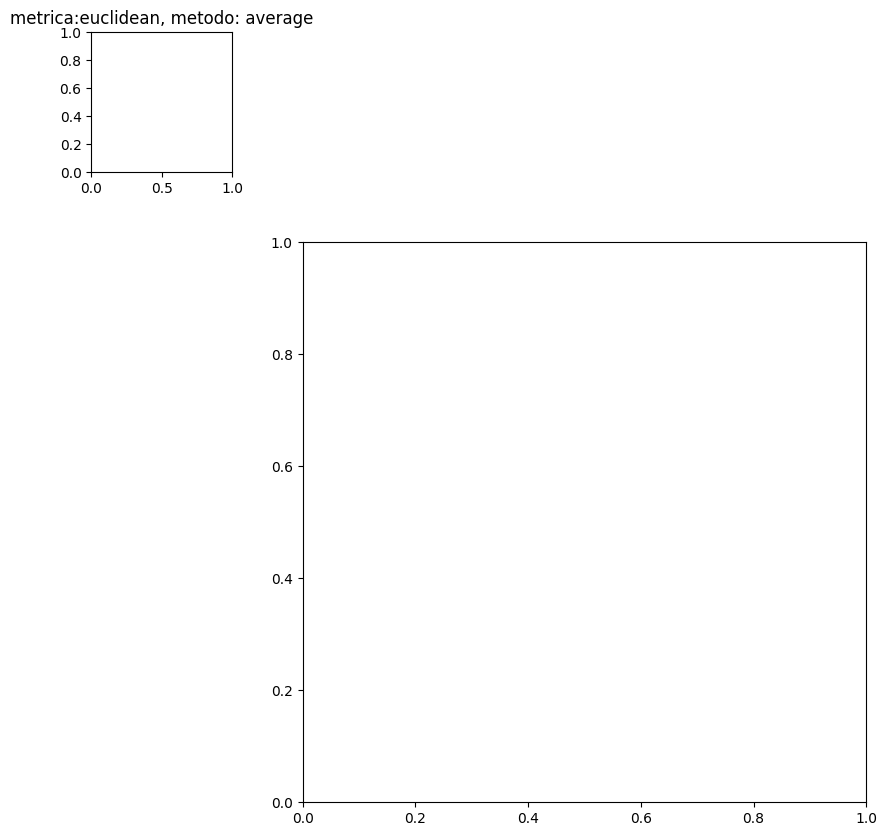

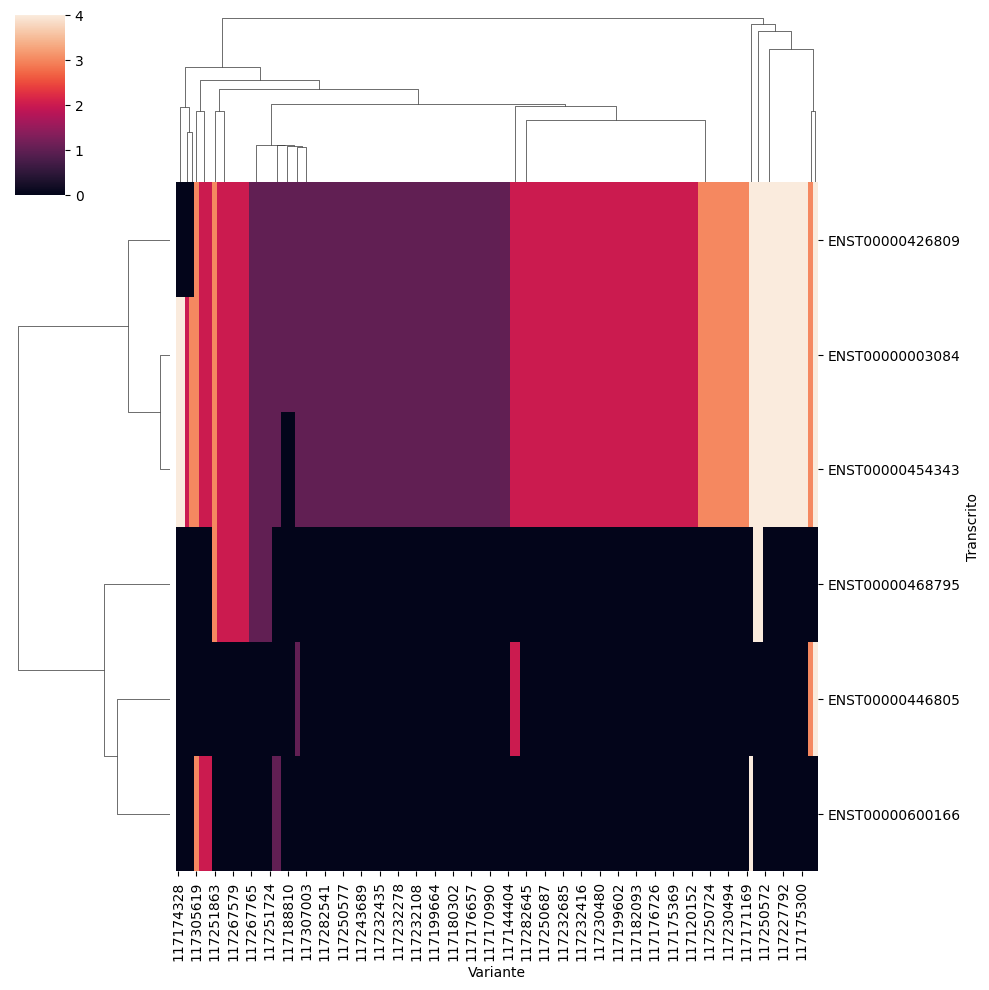

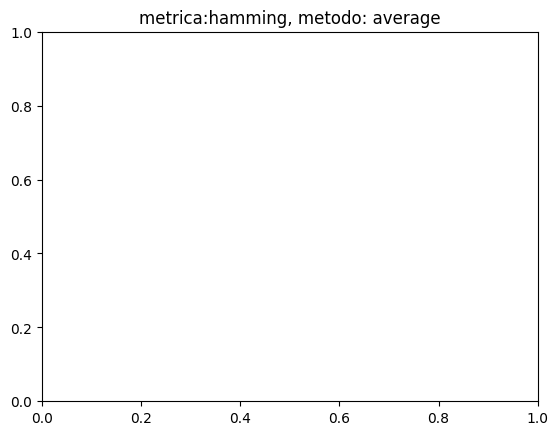

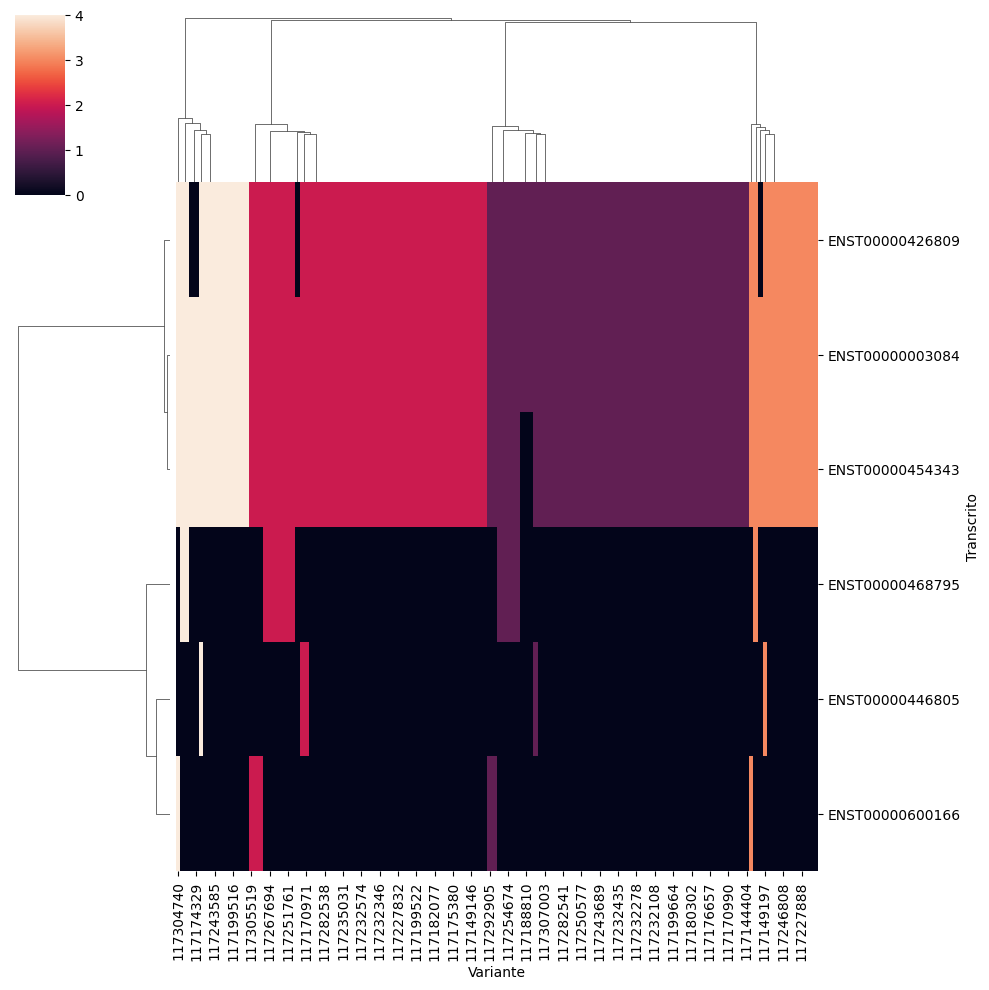

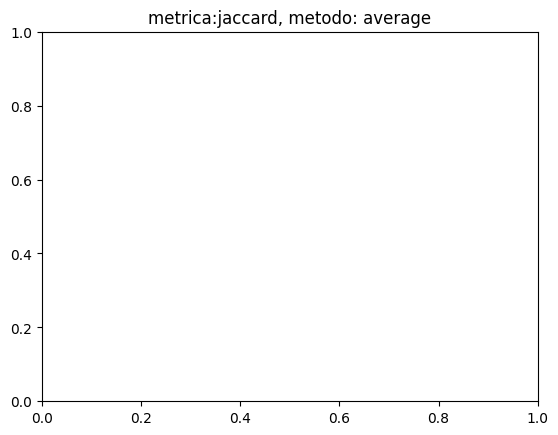

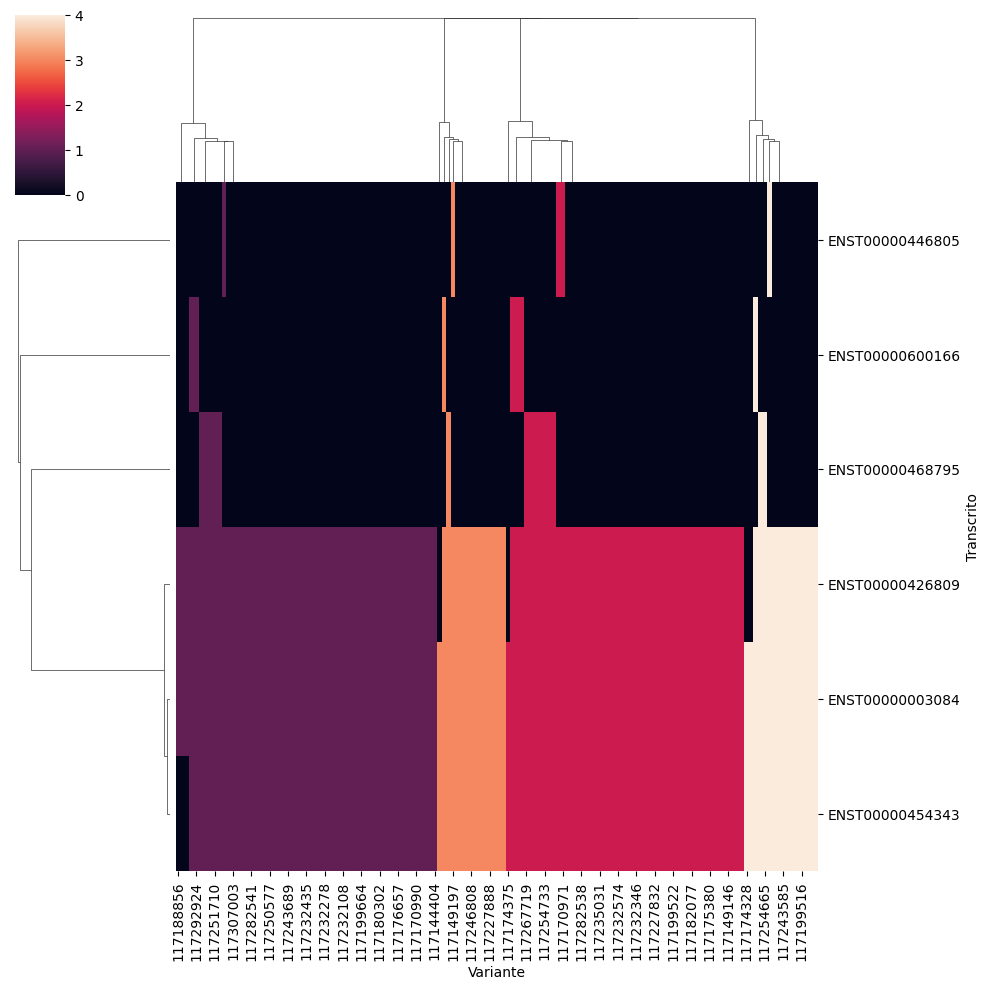

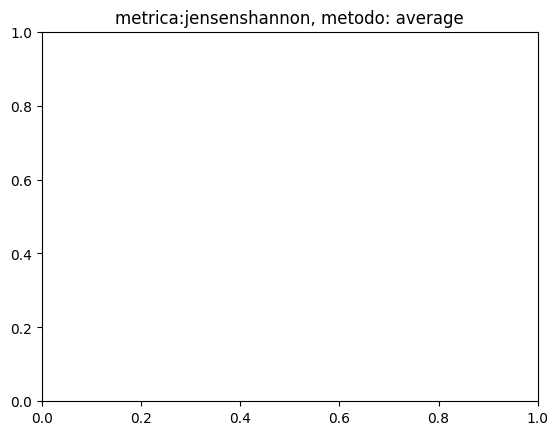

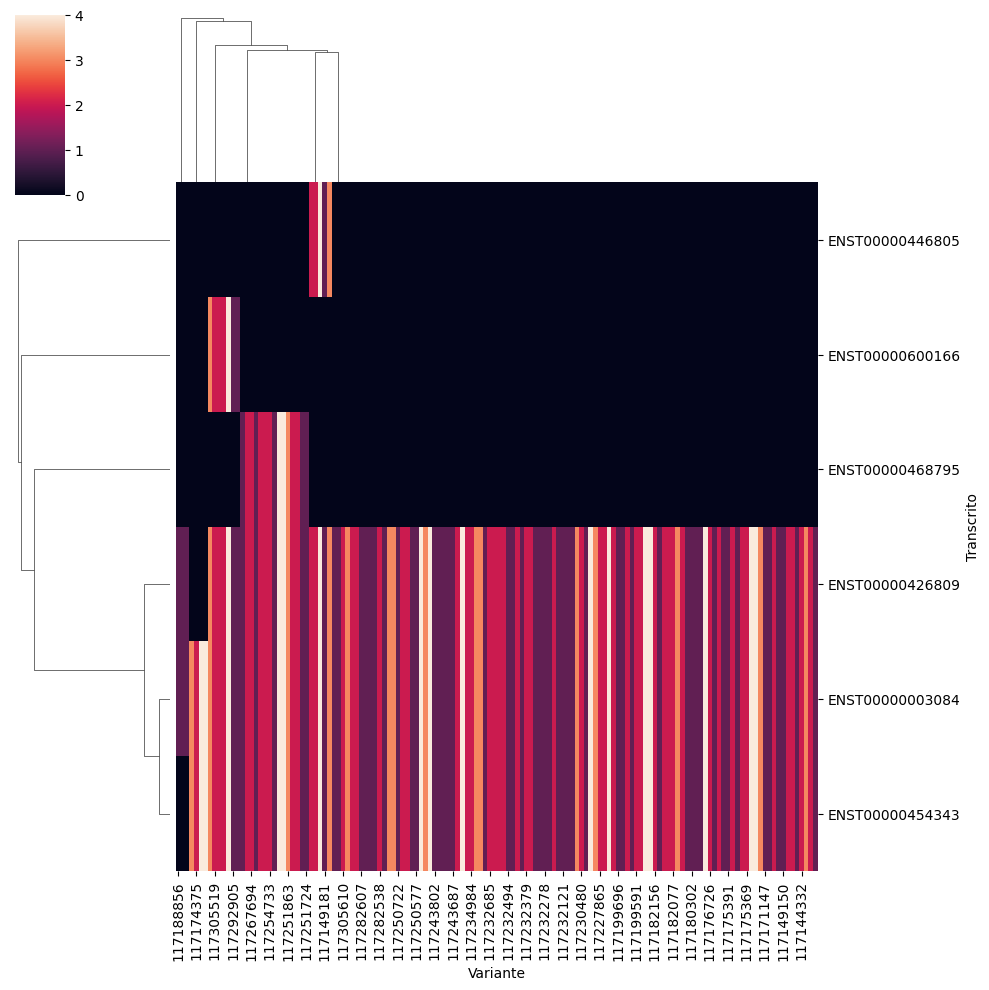

Erro na combinação: metrica=kulczynski1, metodo=average
The condensed distance matrix must contain only finite values.
Erro na combinação: metrica=mahalanobis, metodo=average
The number of observations (6) is too small; the covariance matrix is singular. For observations with 140 dimensions, at least 141 observations are required.


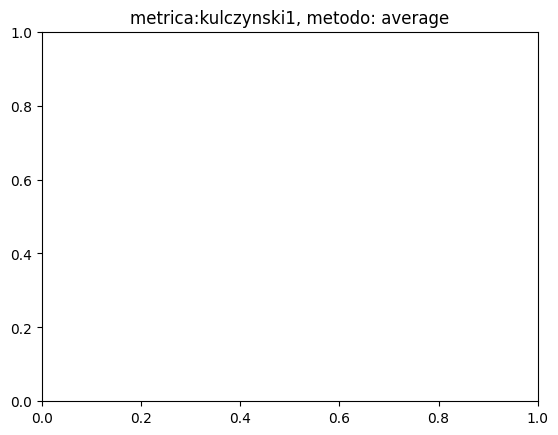

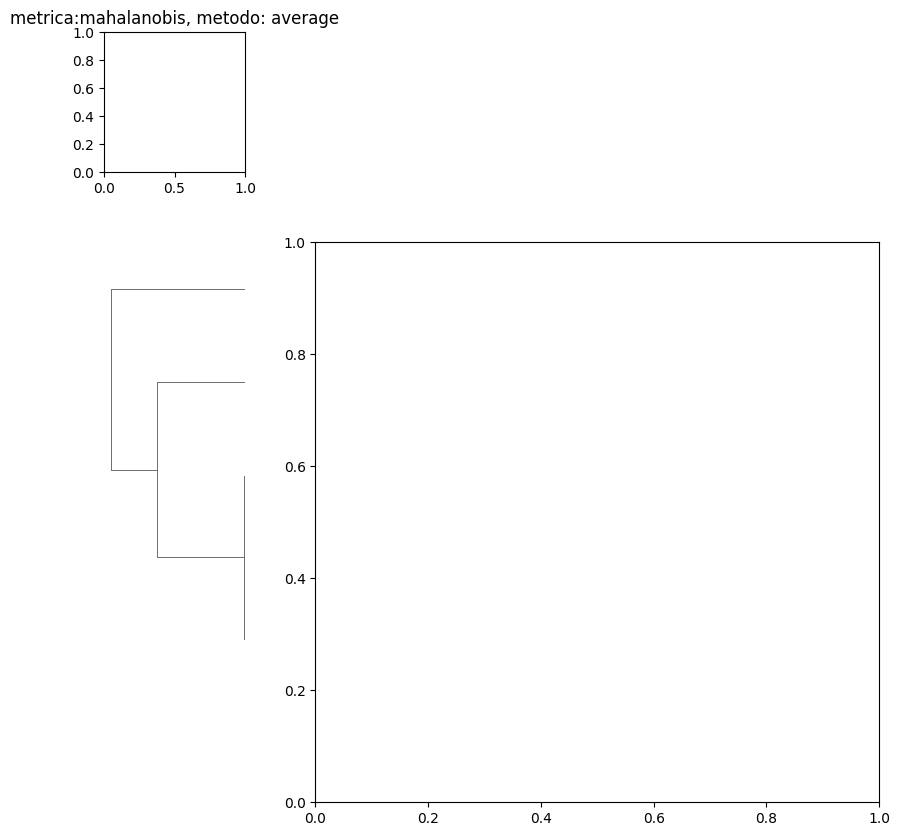

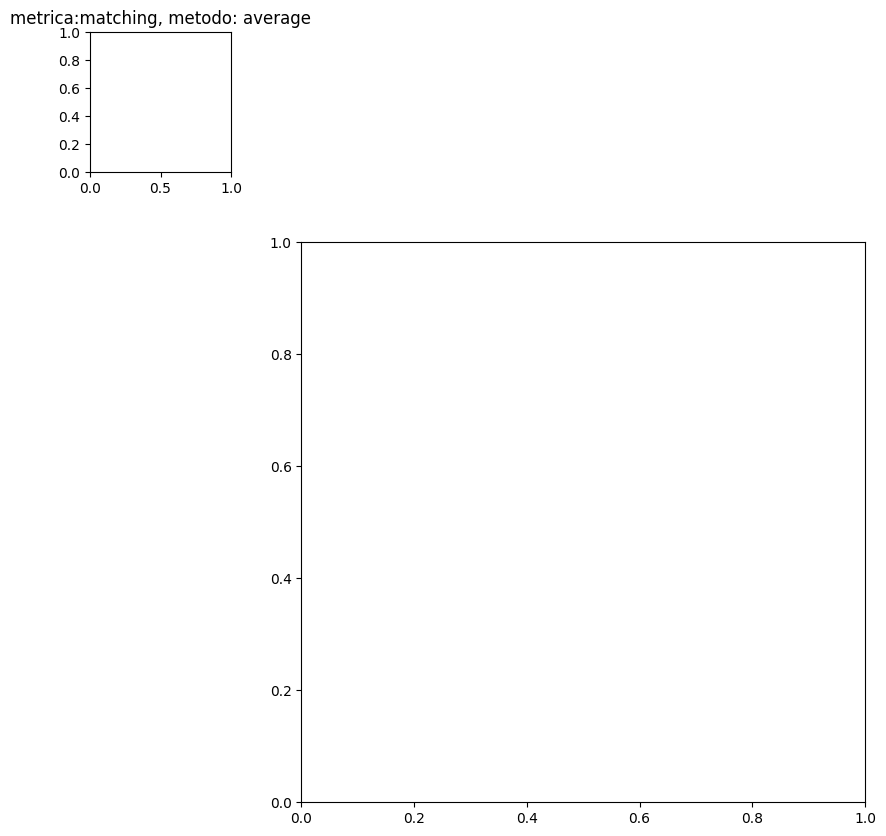

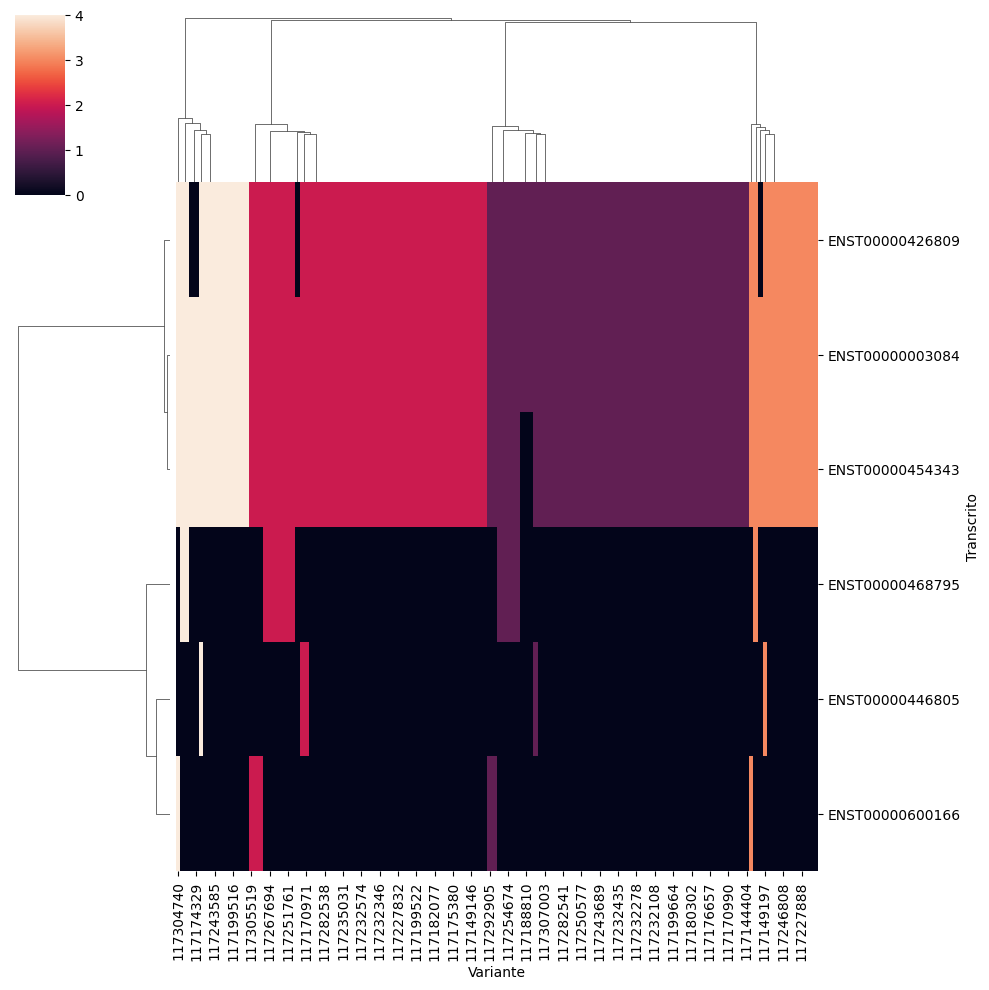

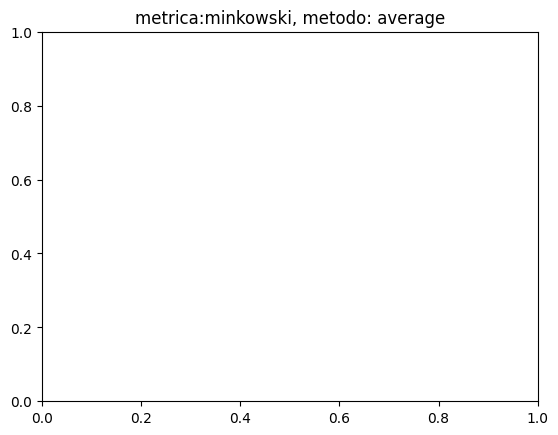

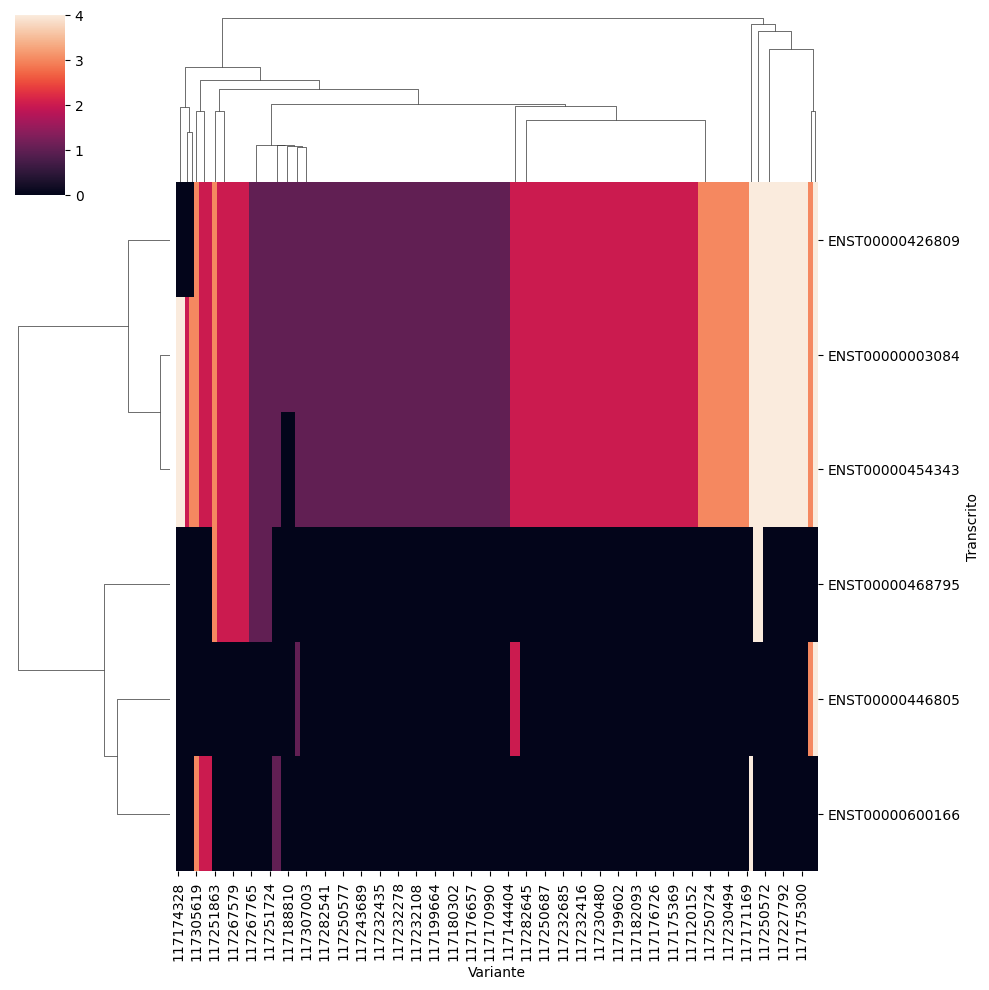

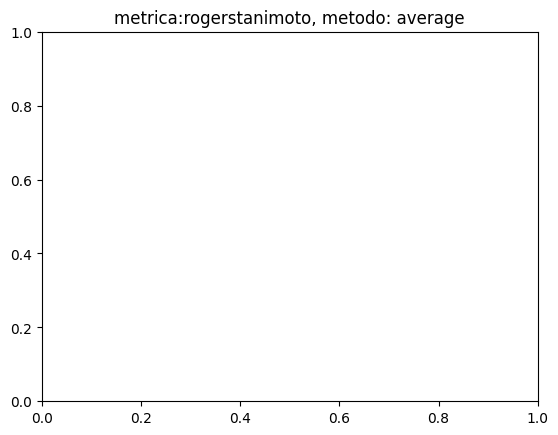

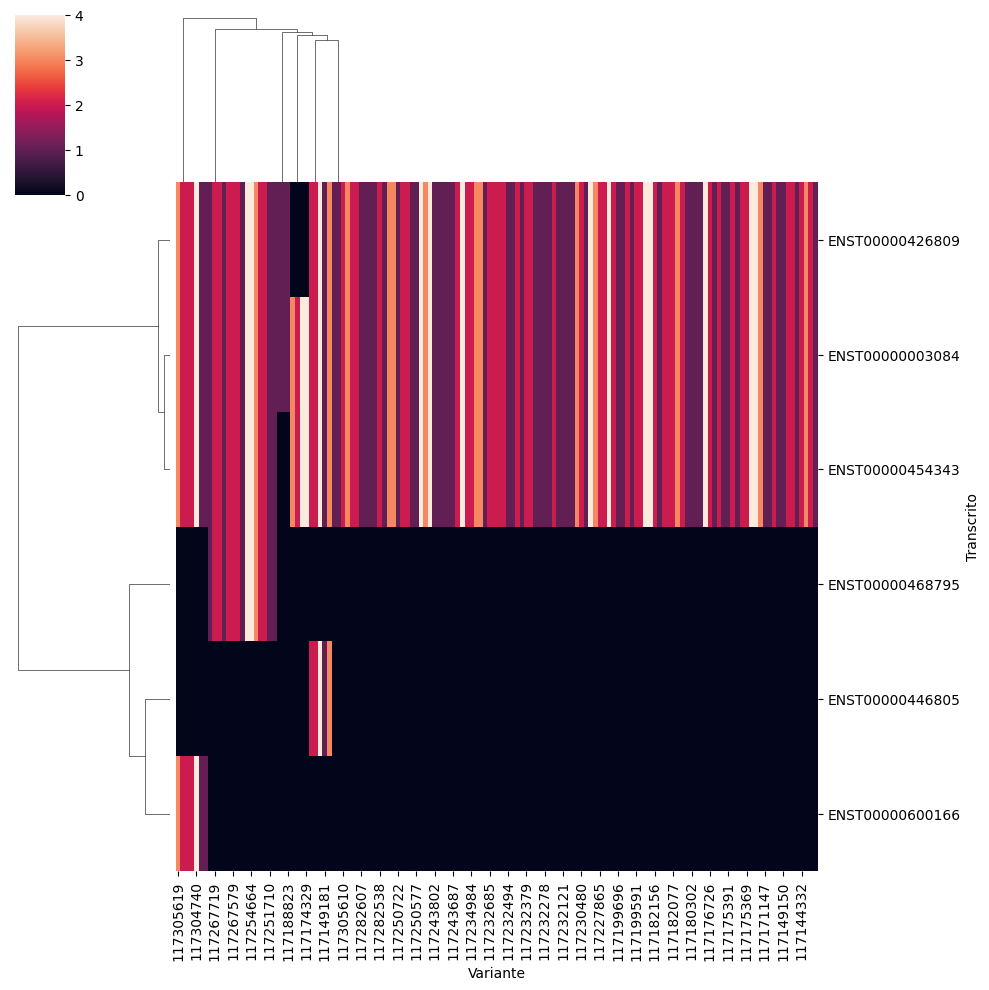

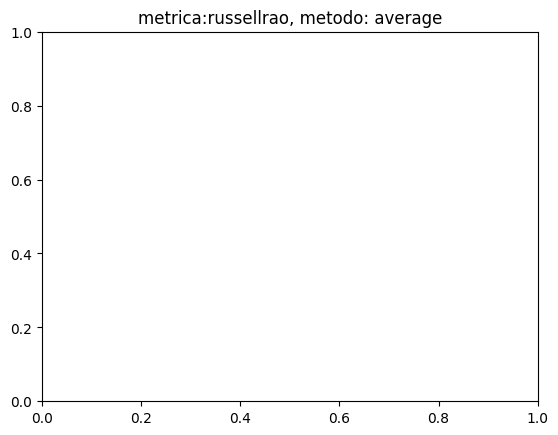

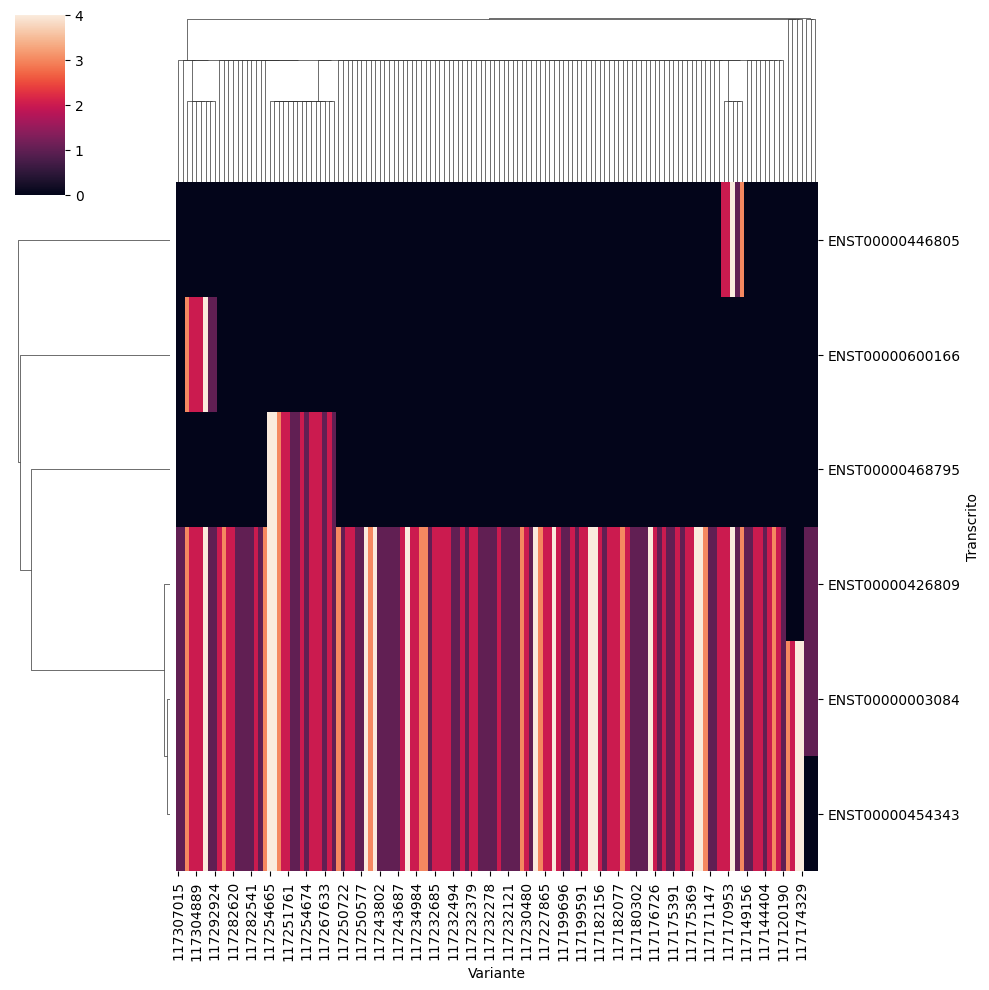

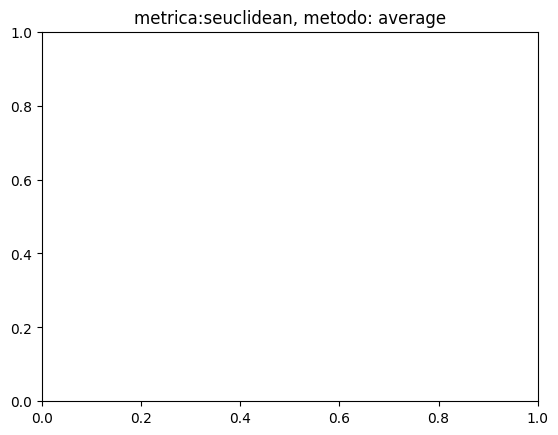

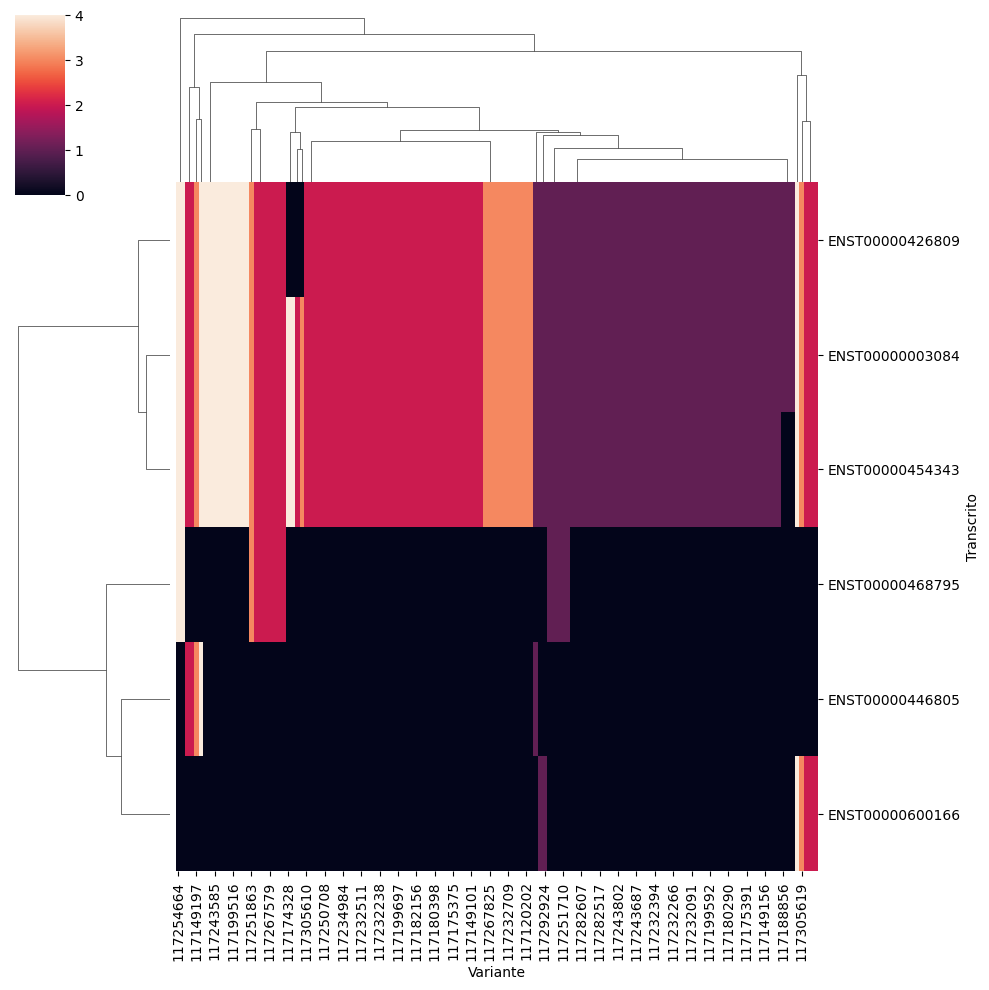

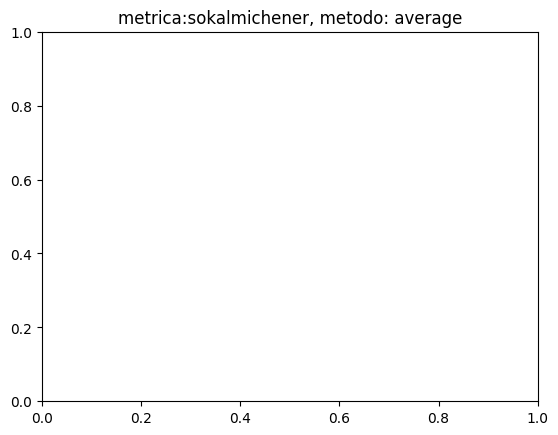

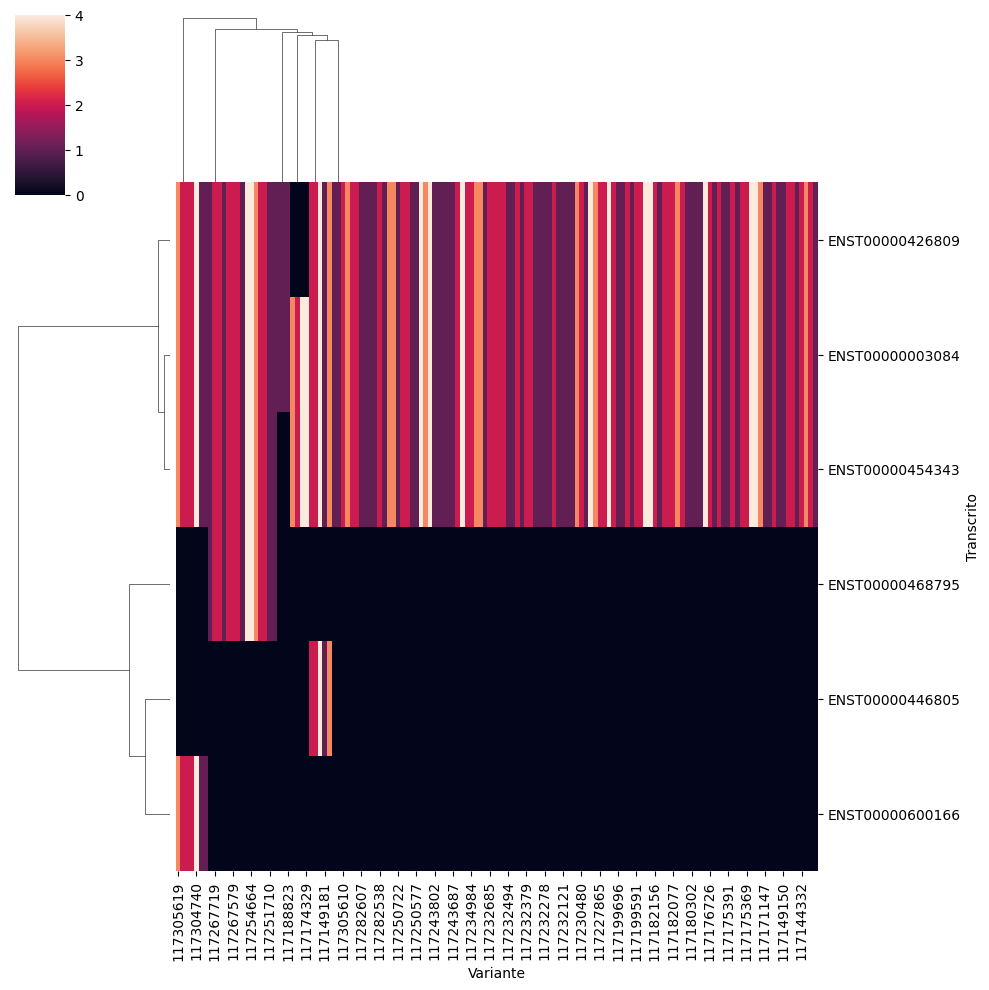

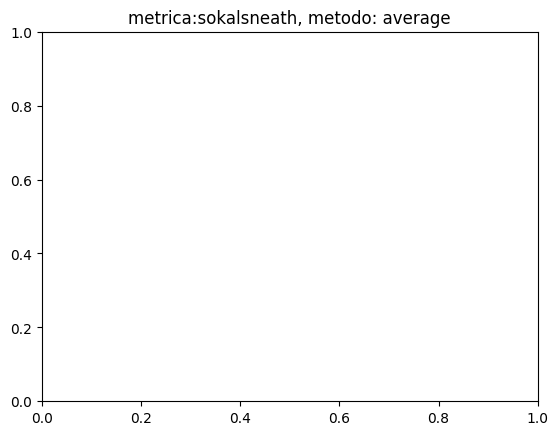

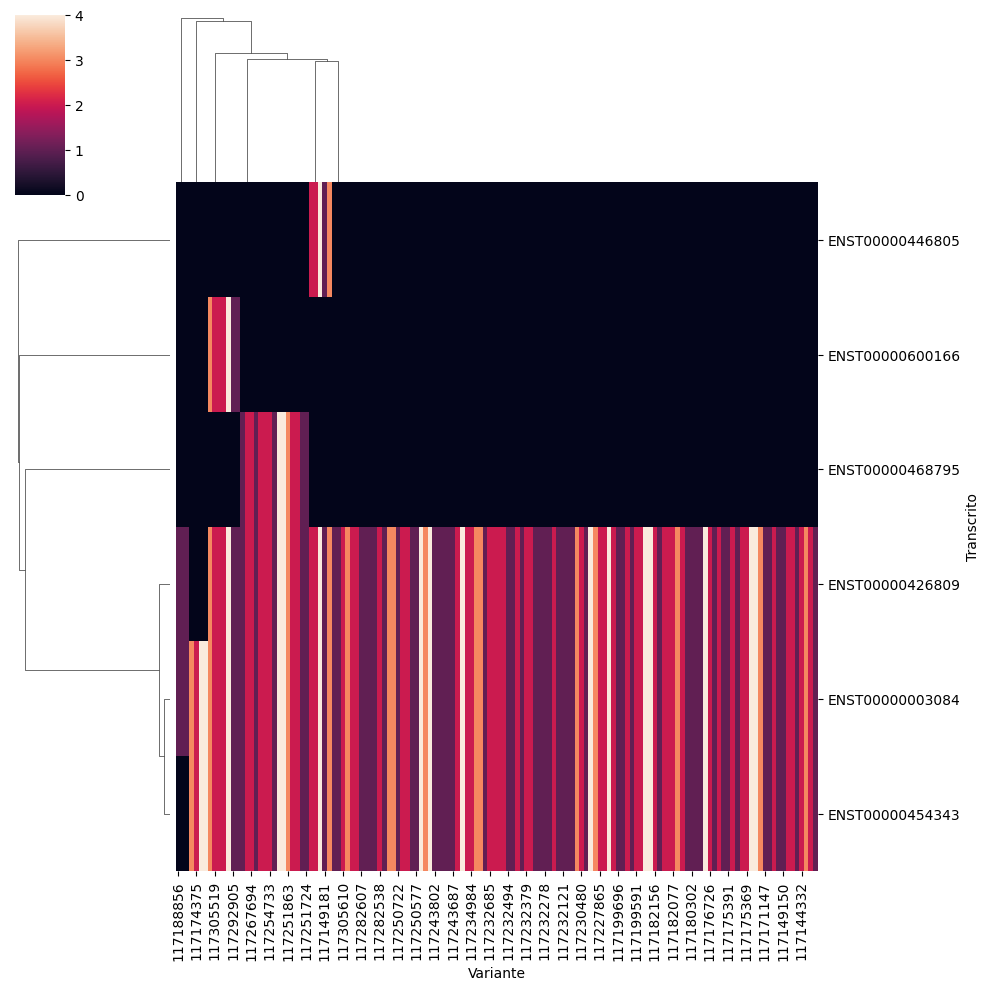

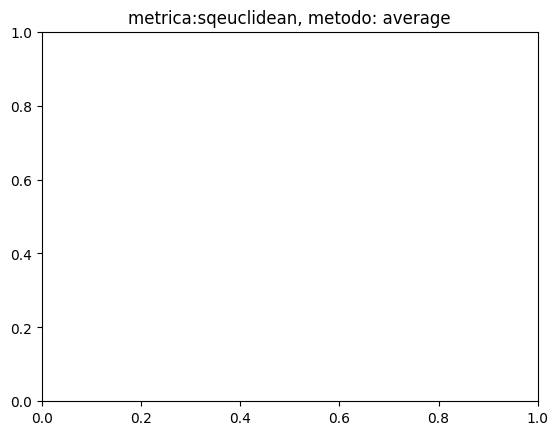

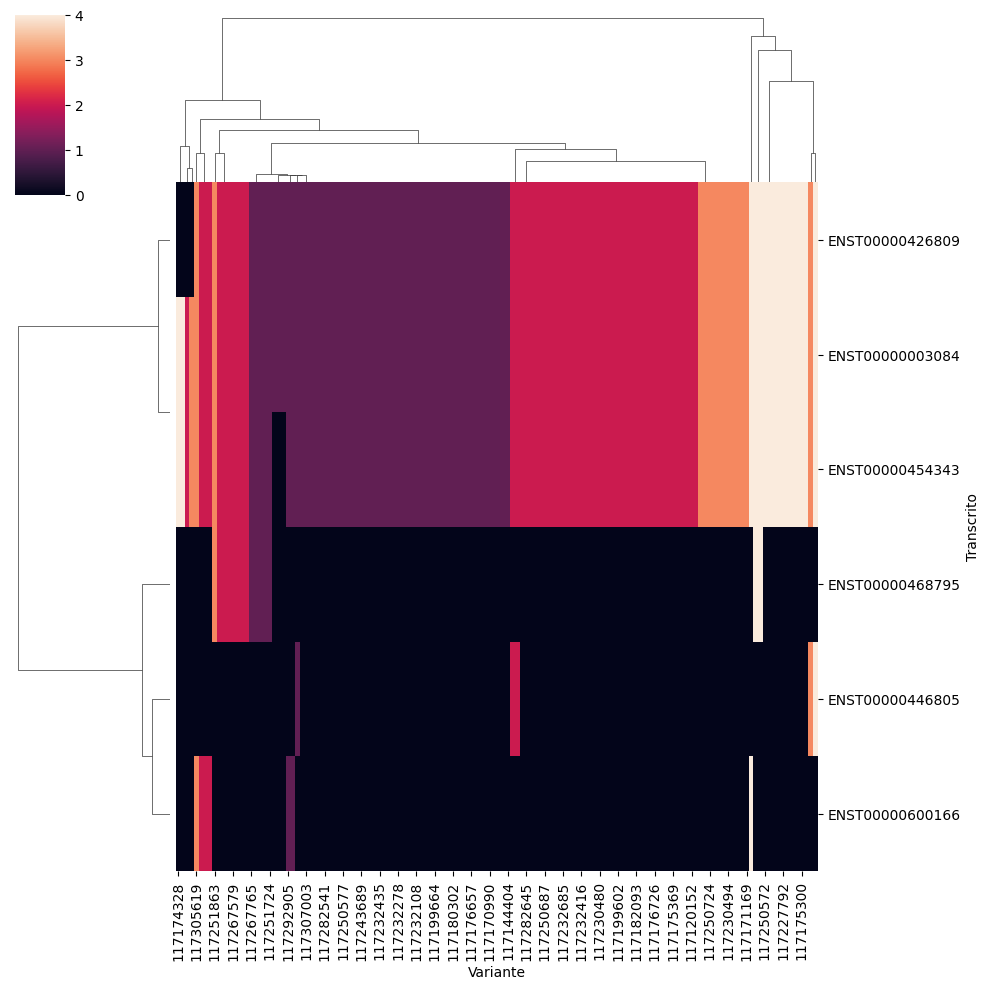

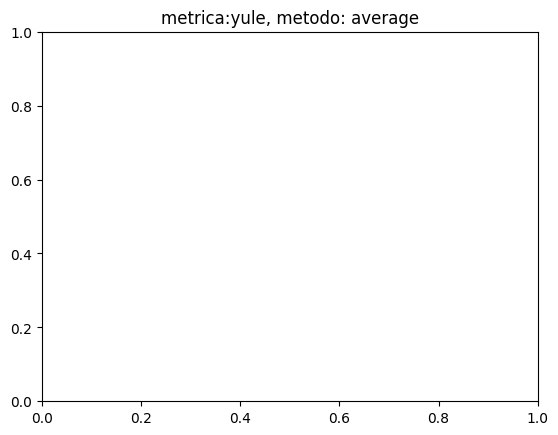

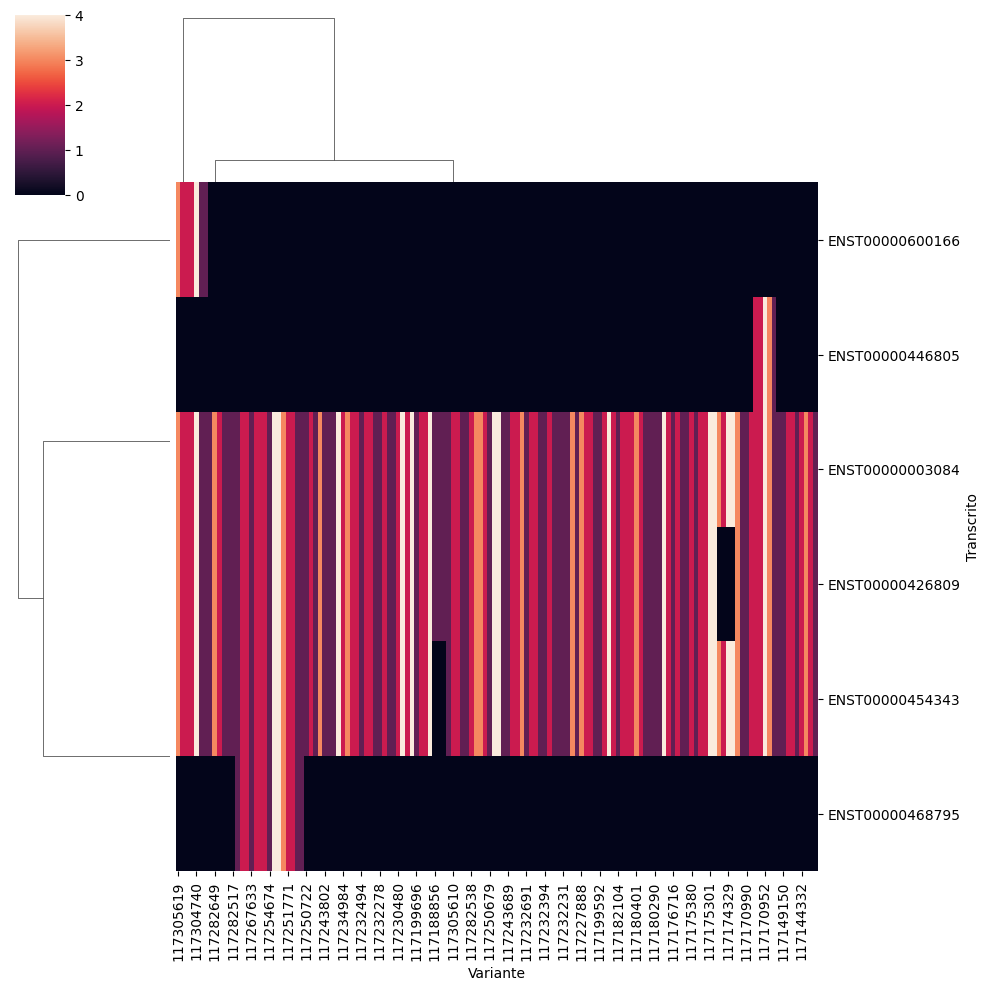

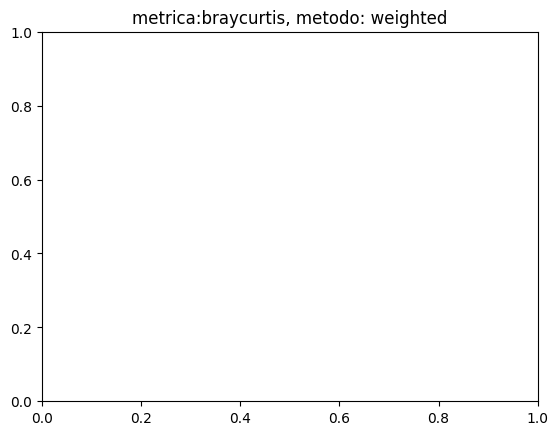

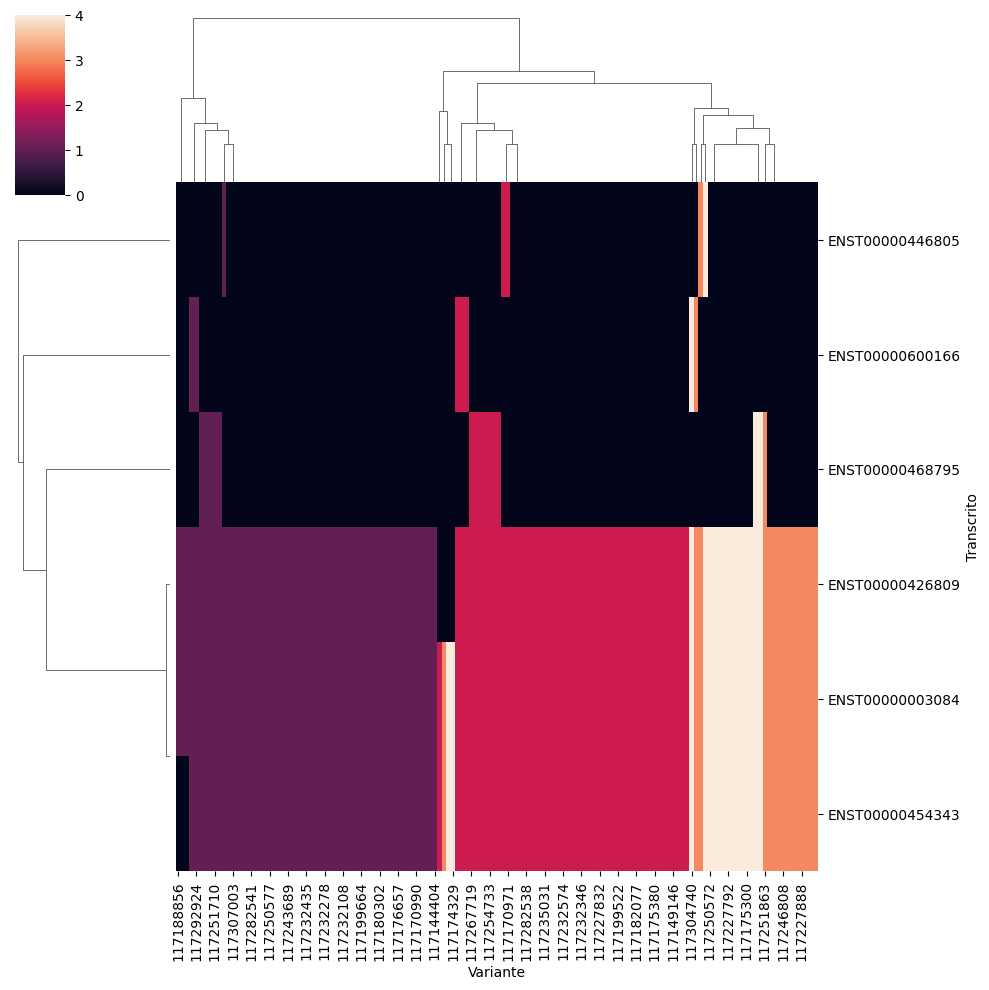

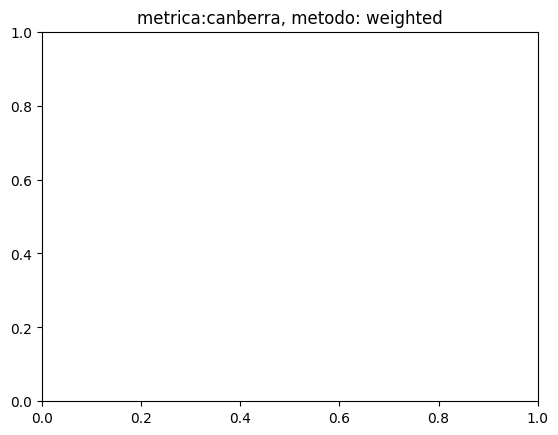

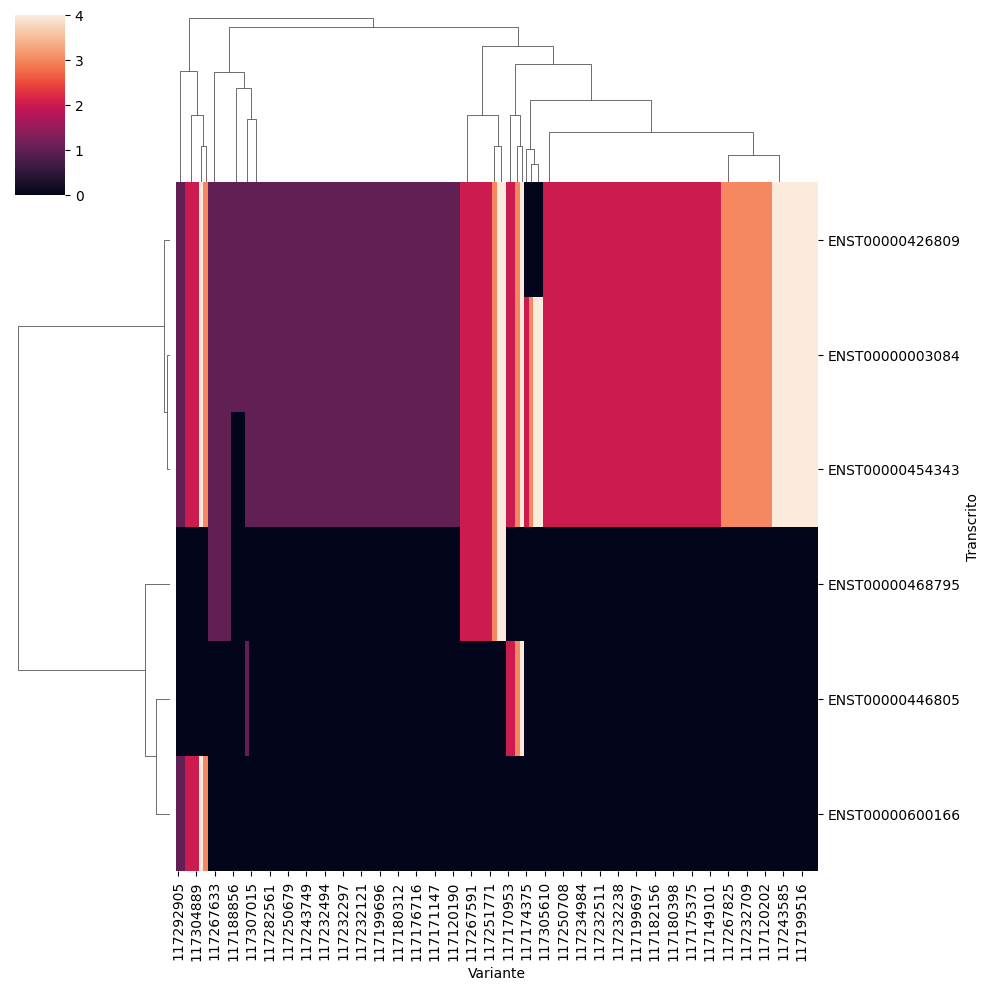

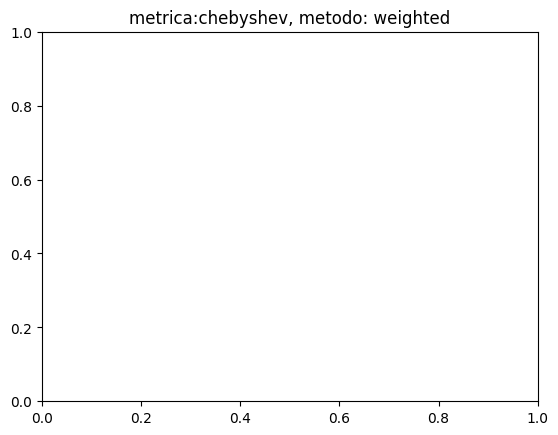

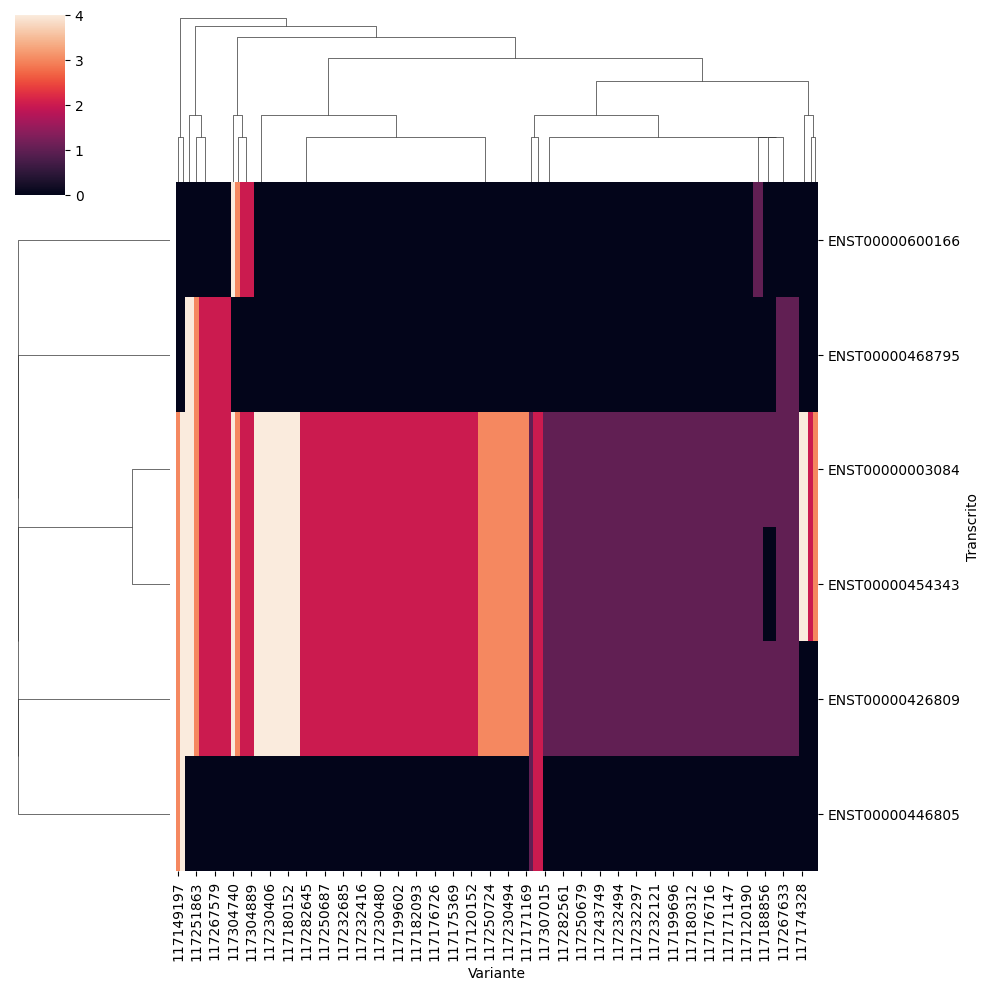

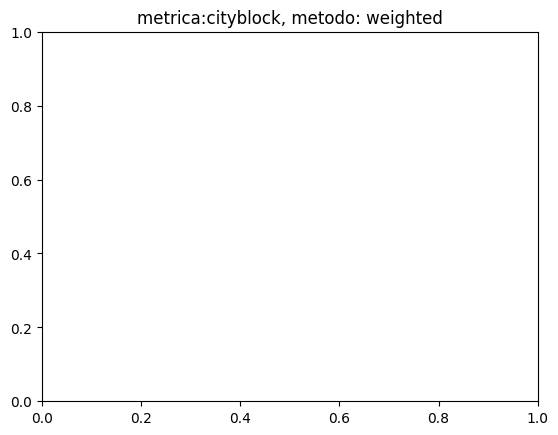

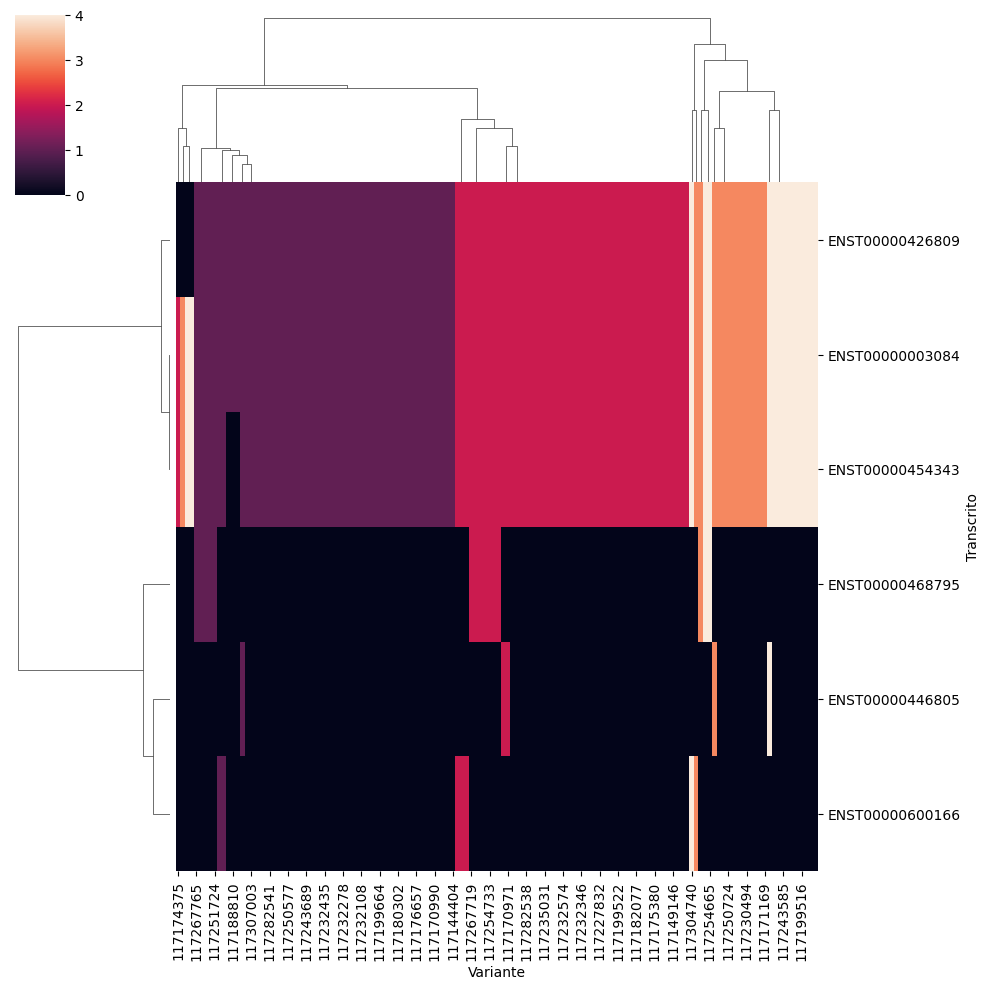

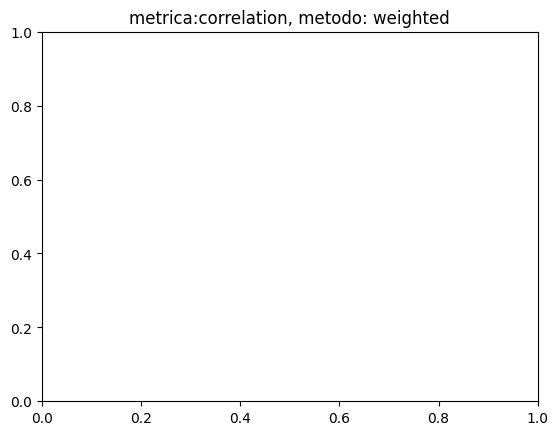

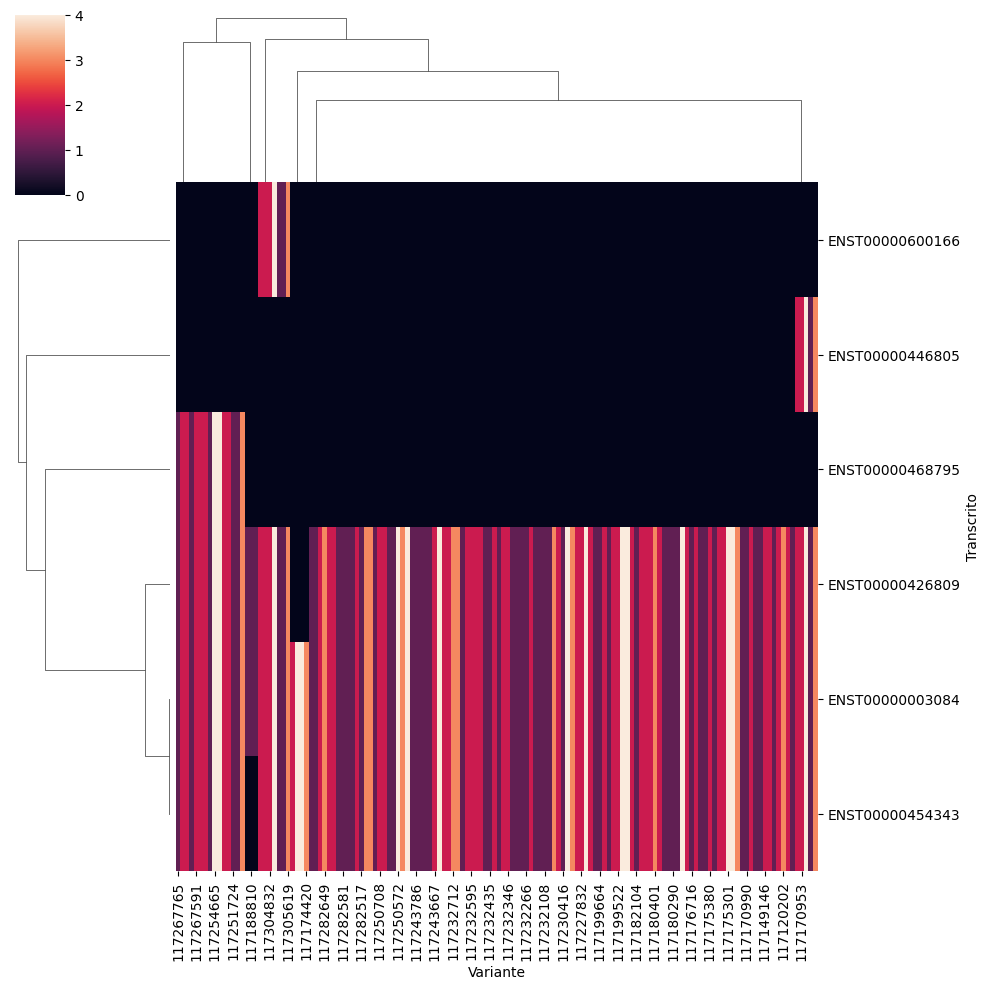

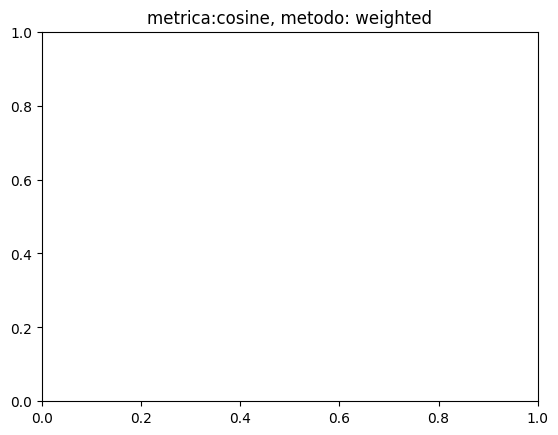

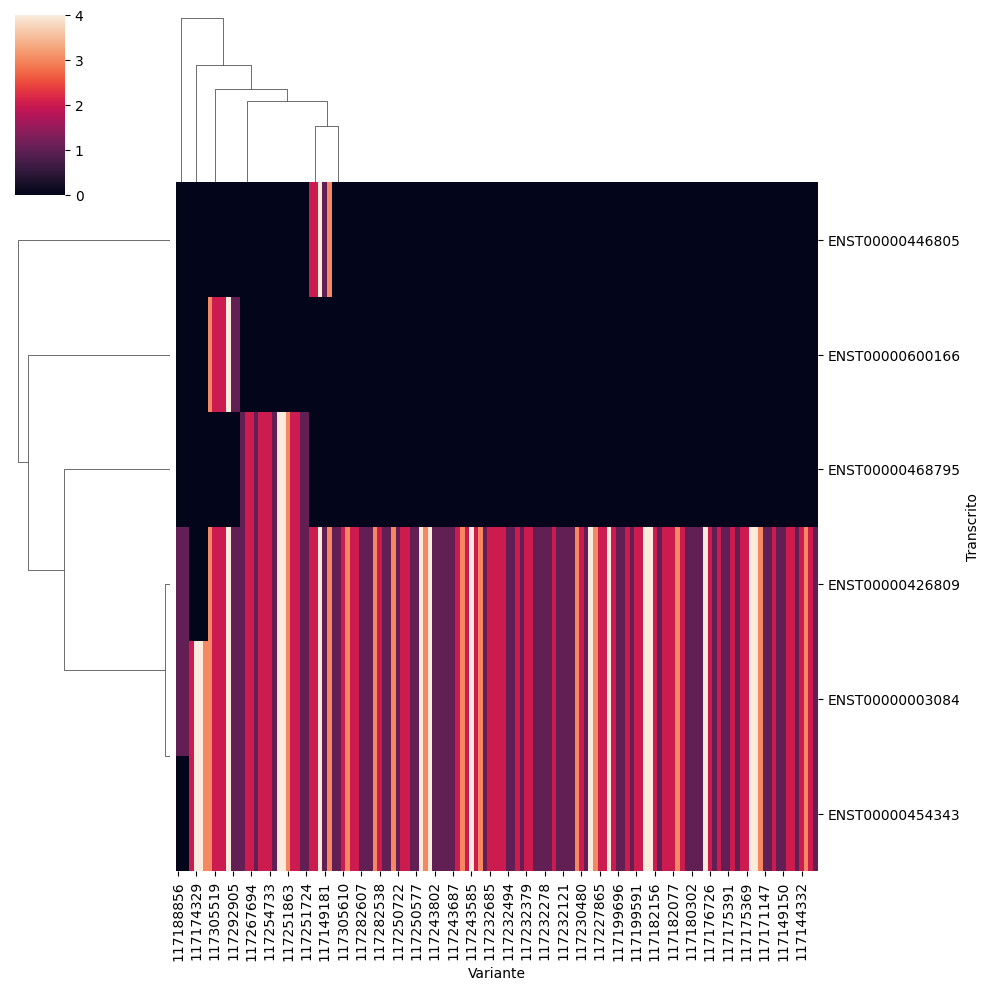

Erro na combinação: metrica=dice, metodo=weighted
Linkage 'Z' contains negative distances.


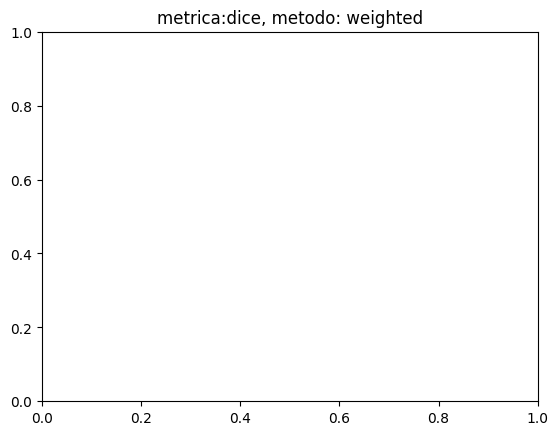

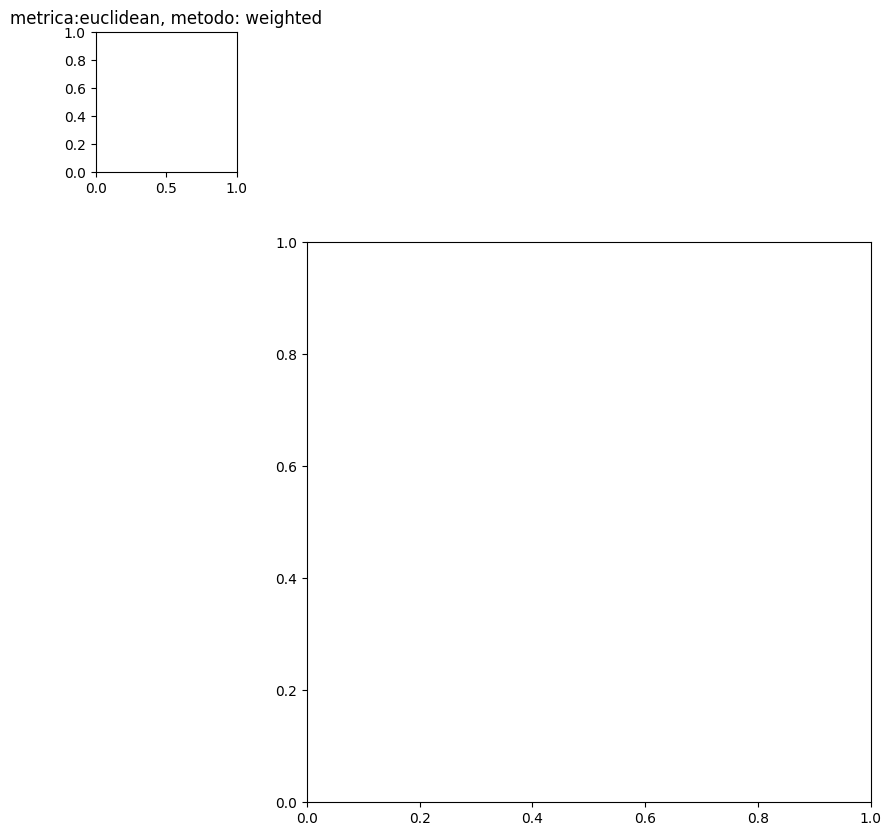

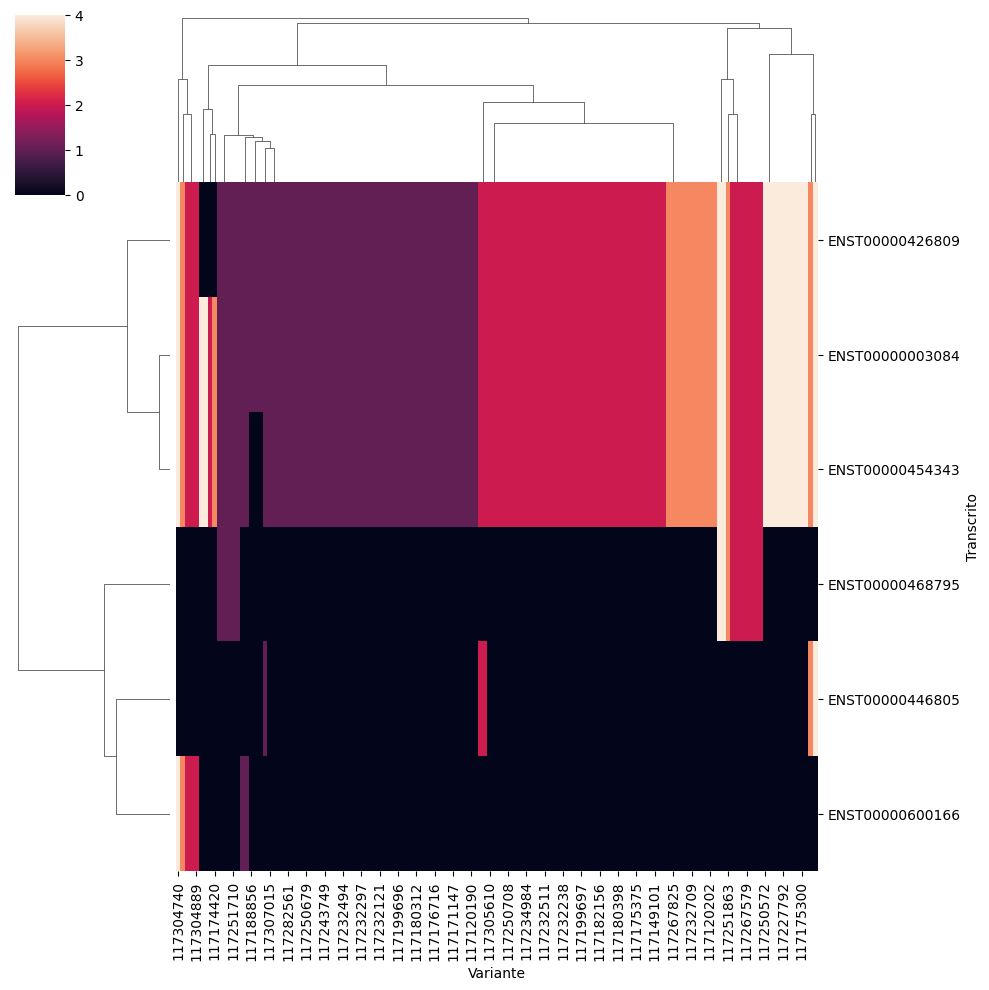

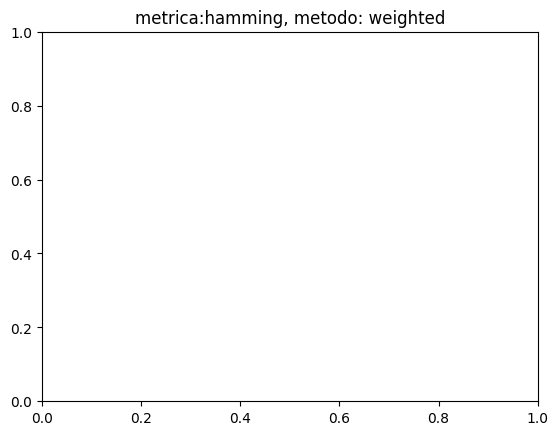

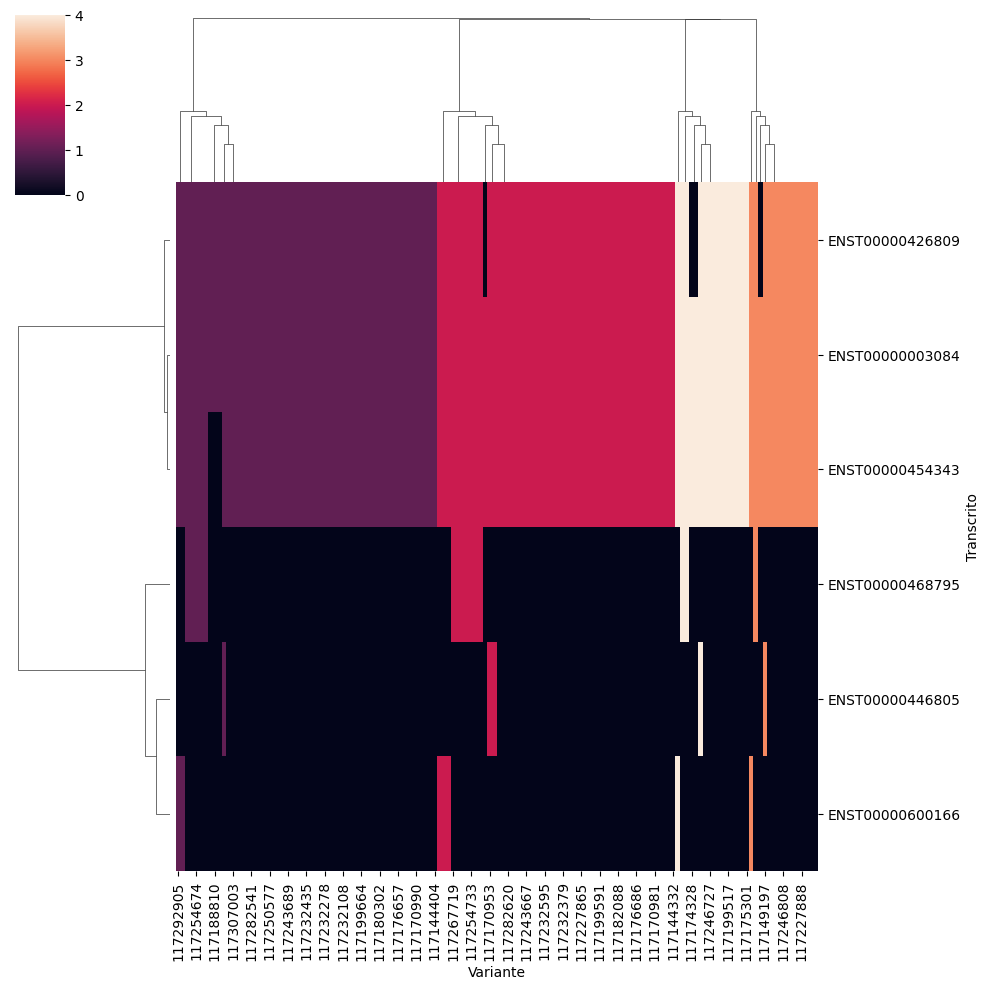

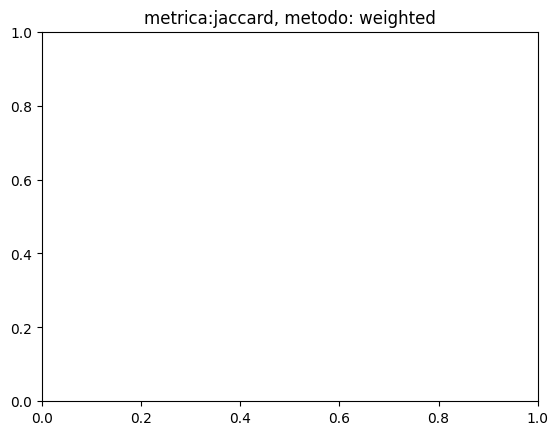

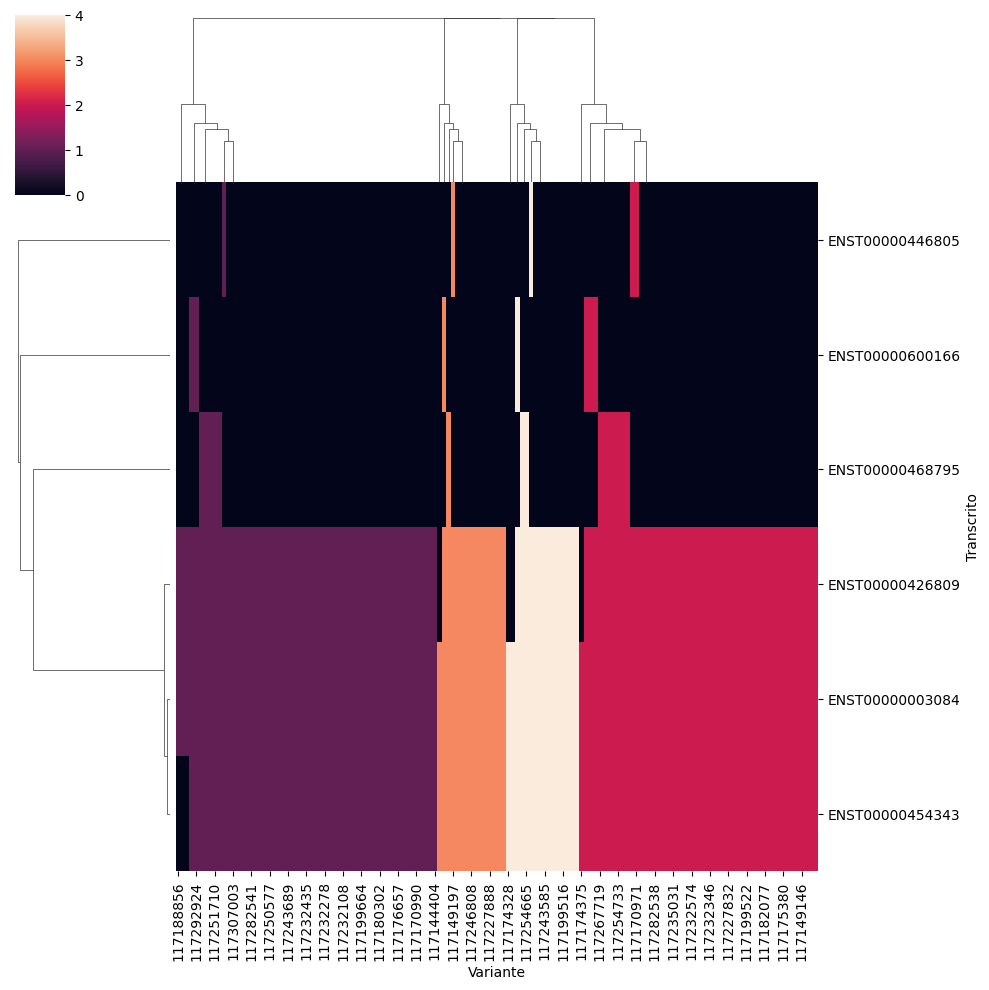

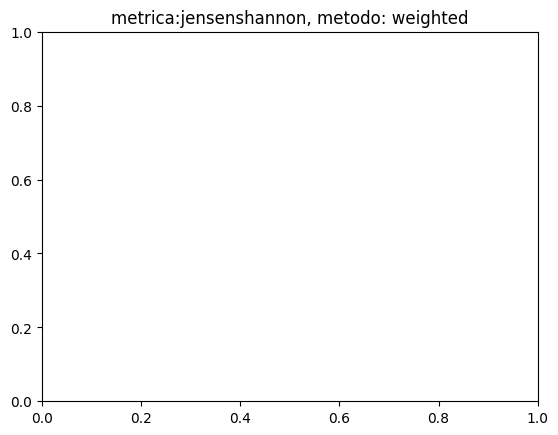

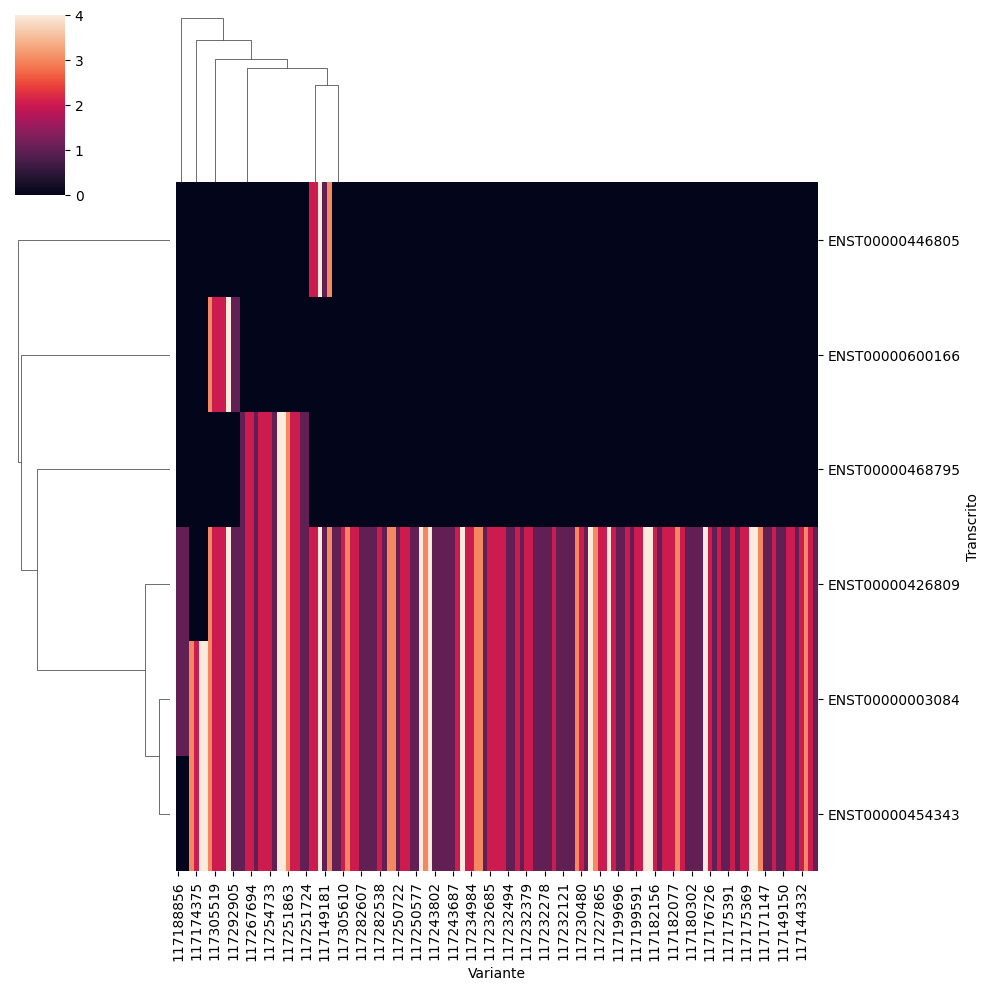

Erro na combinação: metrica=kulczynski1, metodo=weighted
The condensed distance matrix must contain only finite values.
Erro na combinação: metrica=mahalanobis, metodo=weighted
The number of observations (6) is too small; the covariance matrix is singular. For observations with 140 dimensions, at least 141 observations are required.


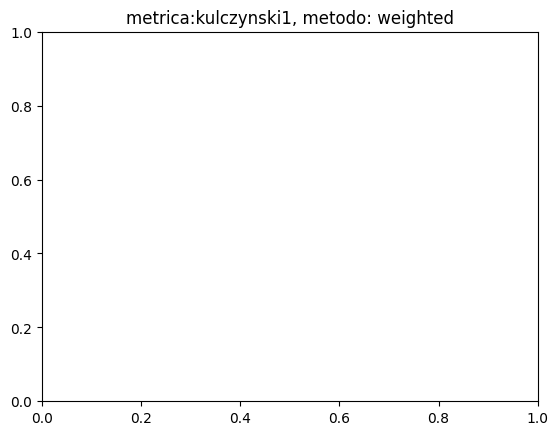

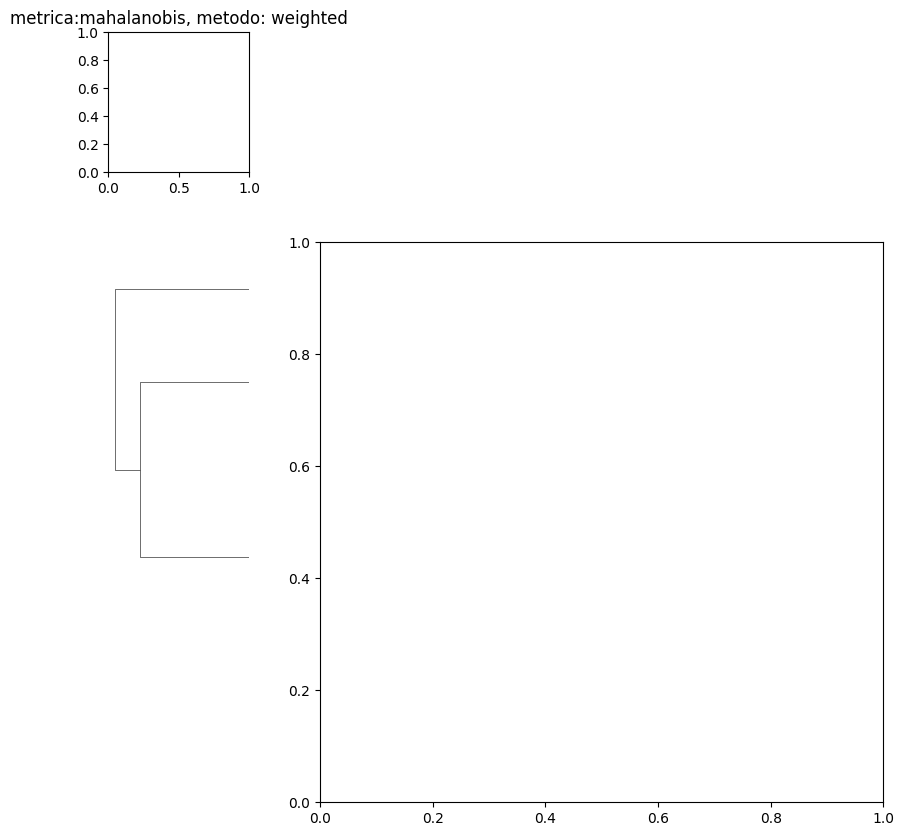

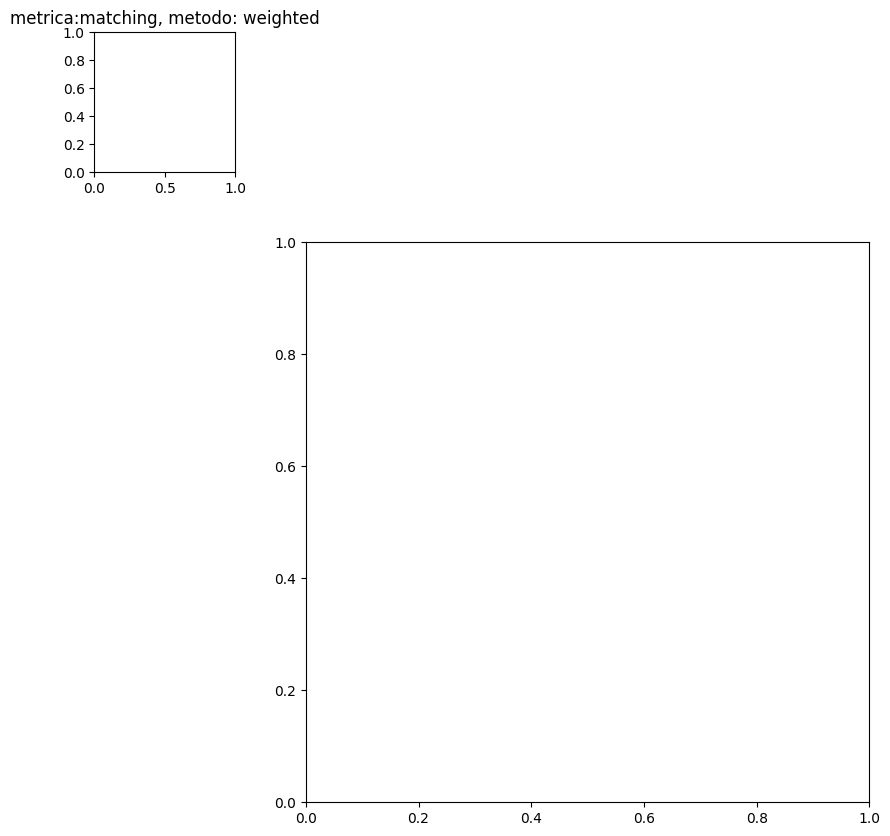

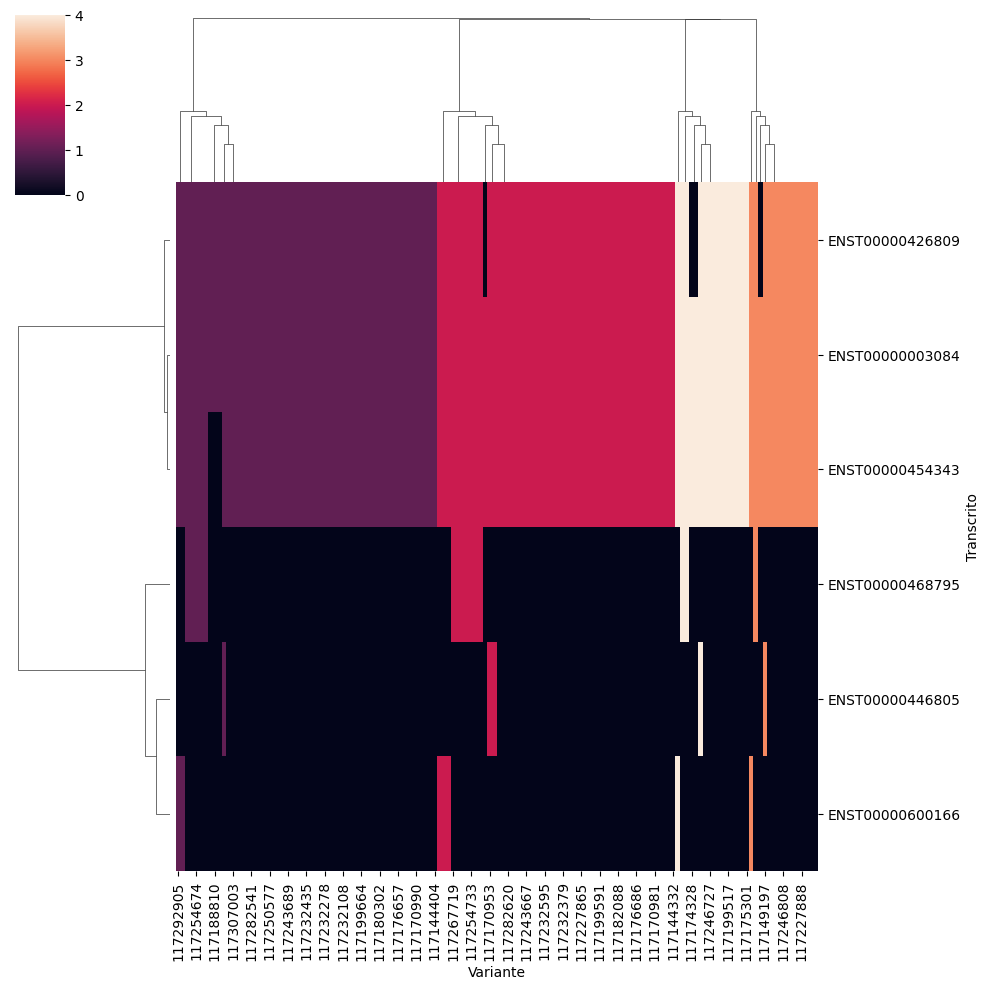

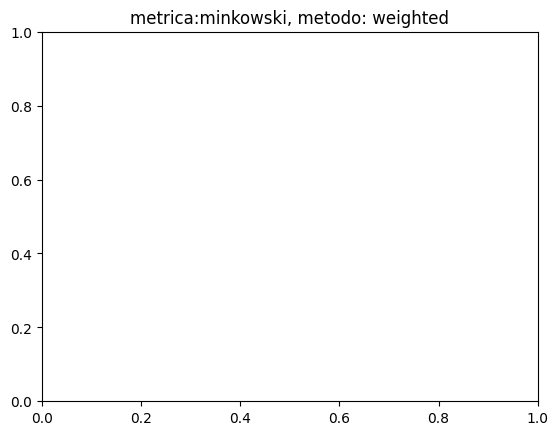

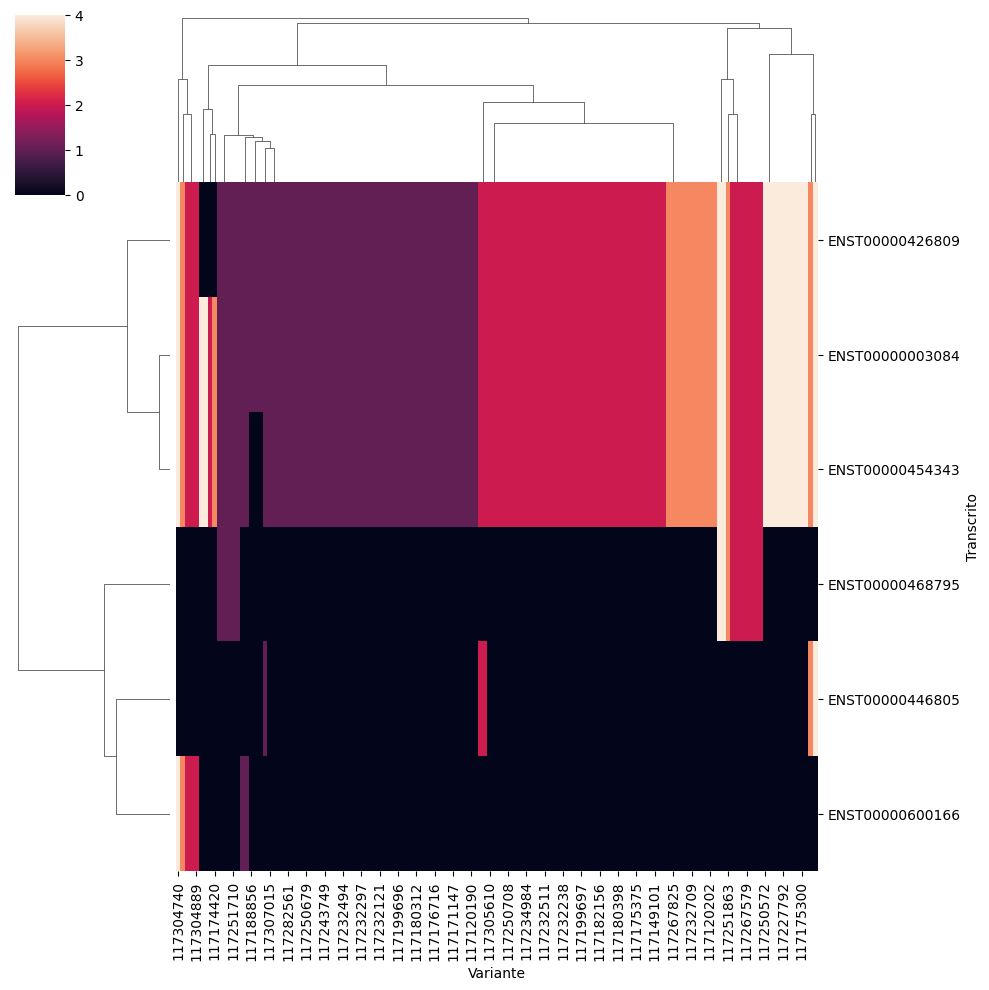

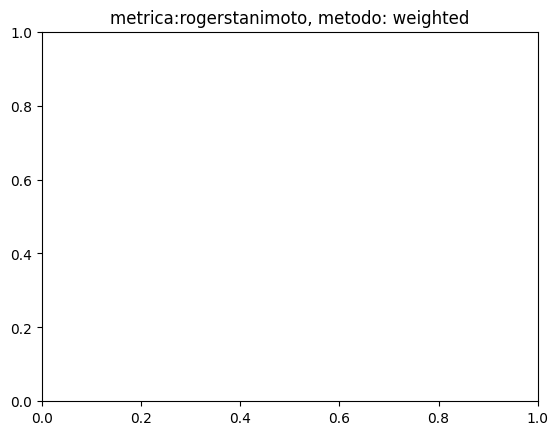

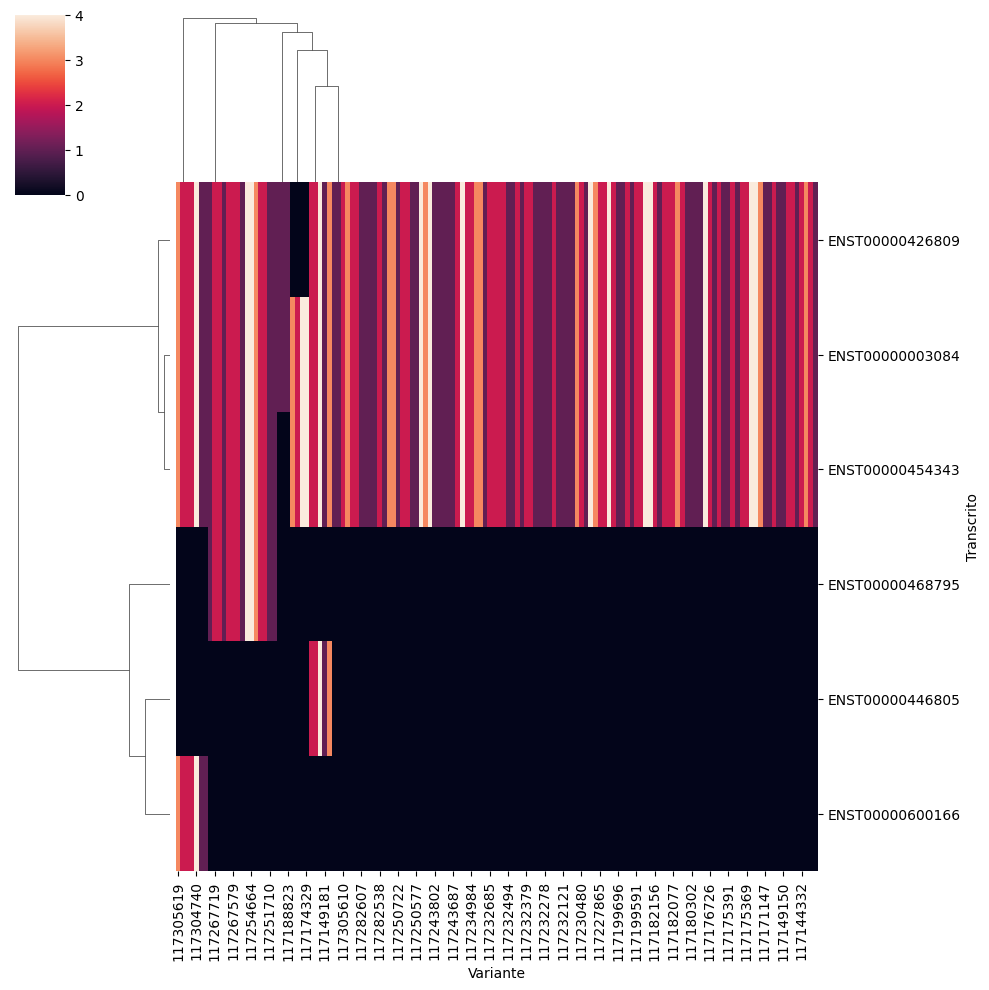

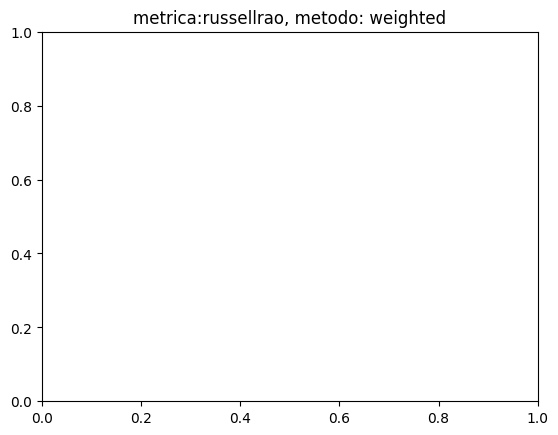

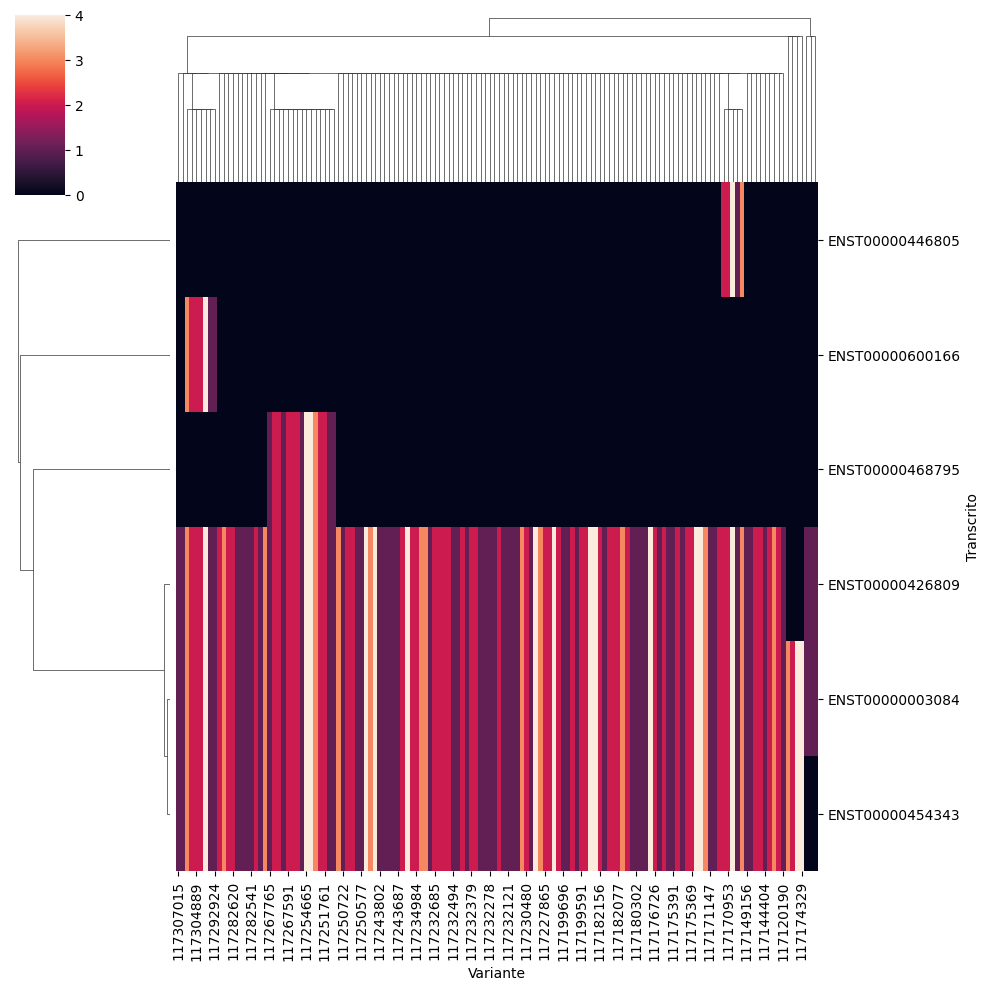

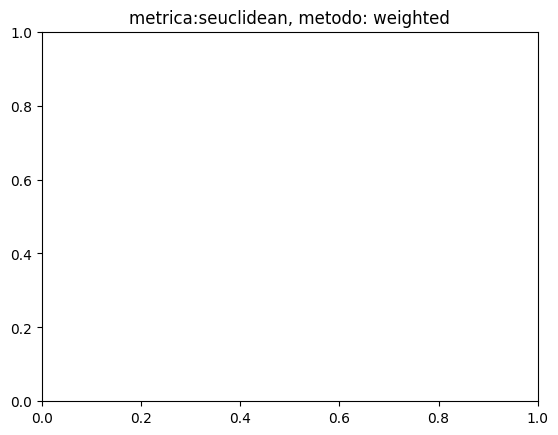

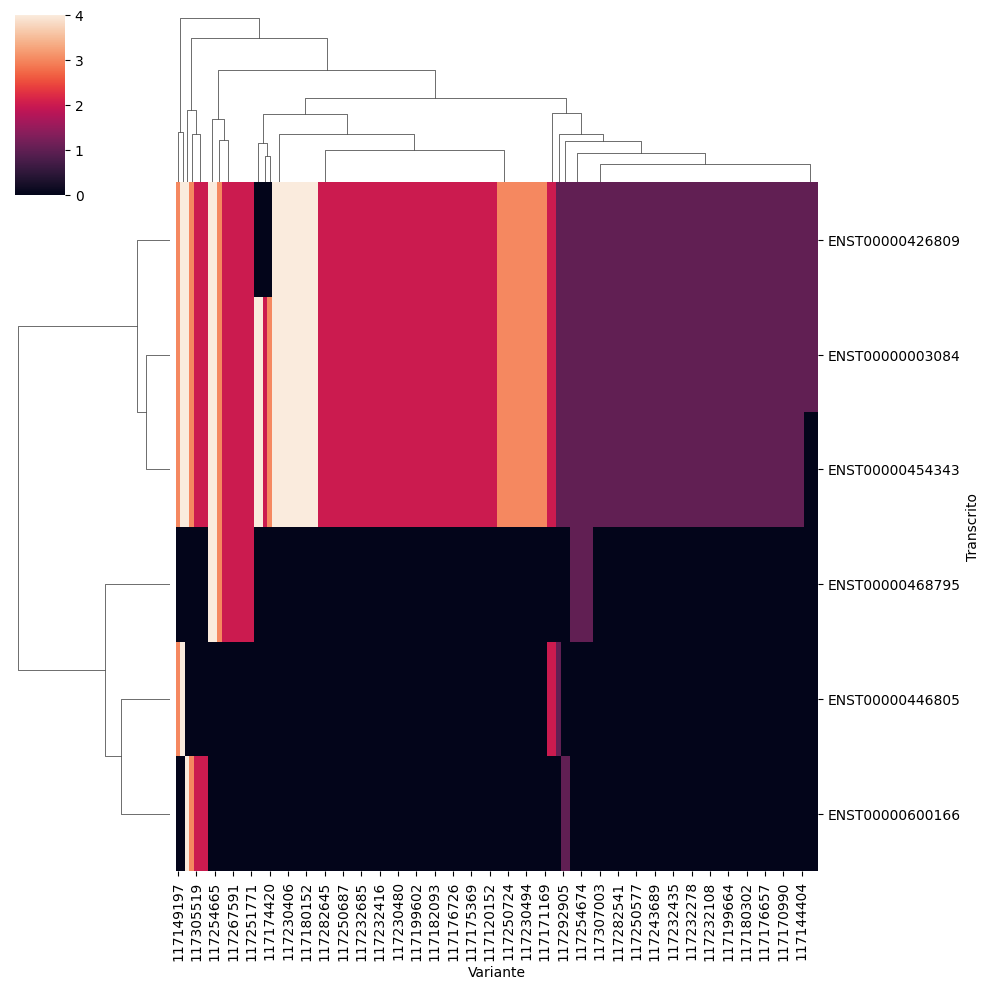

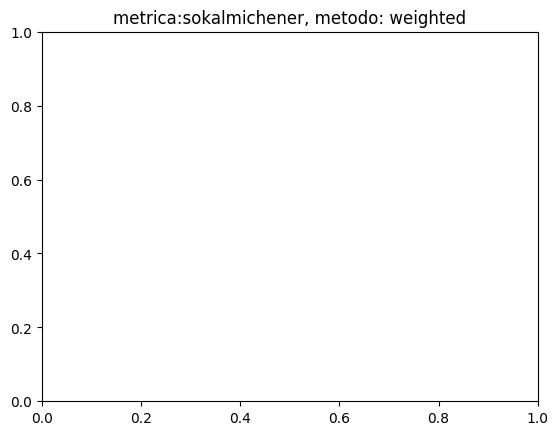

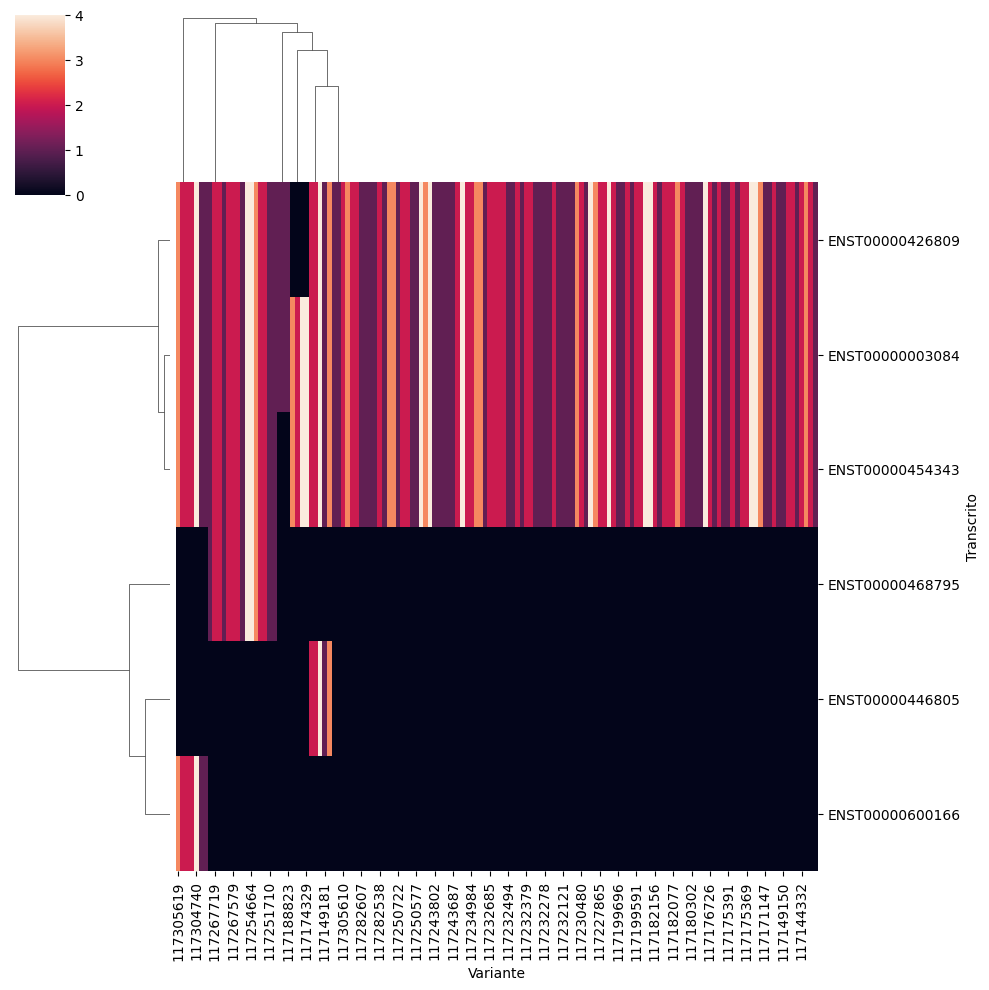

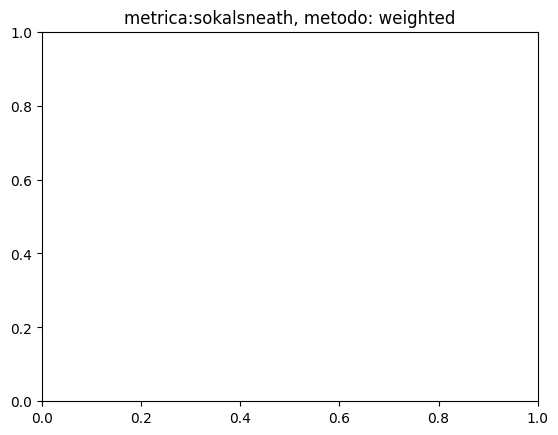

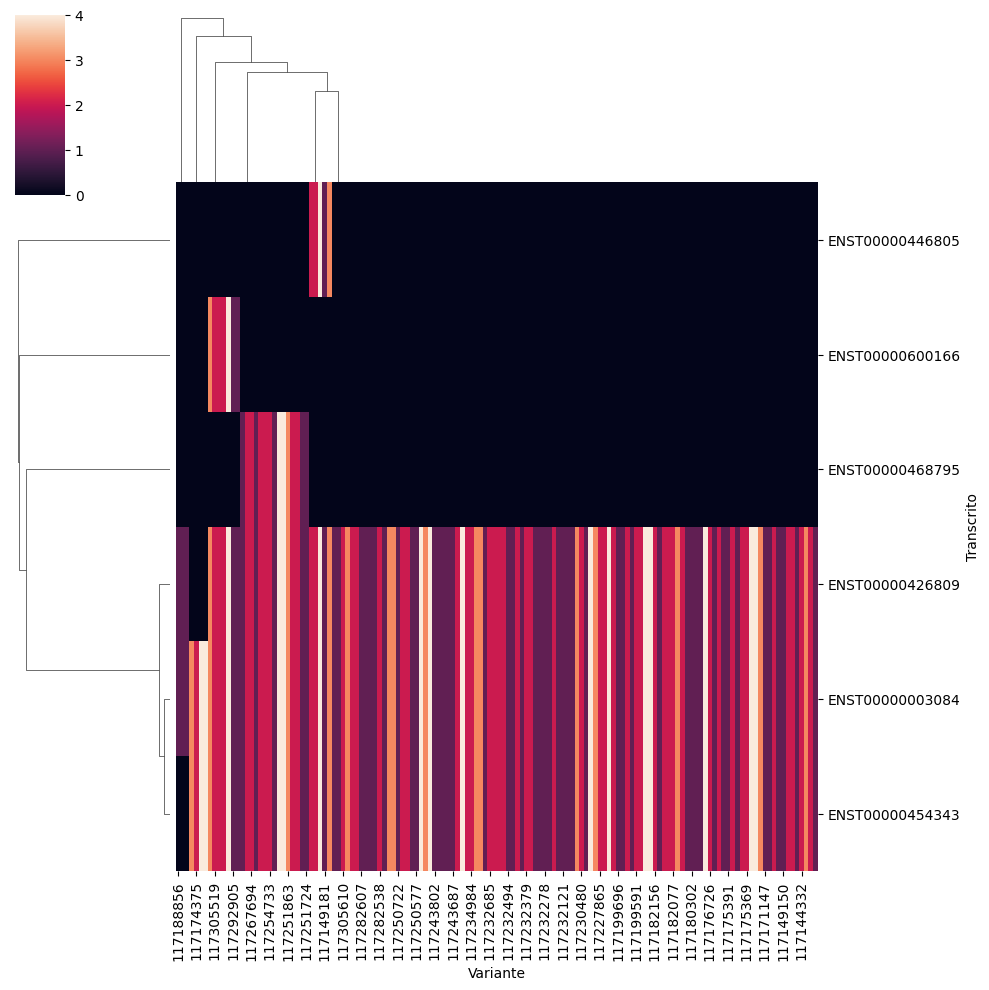

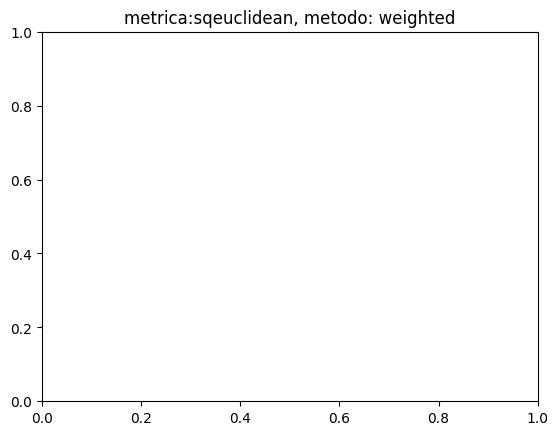

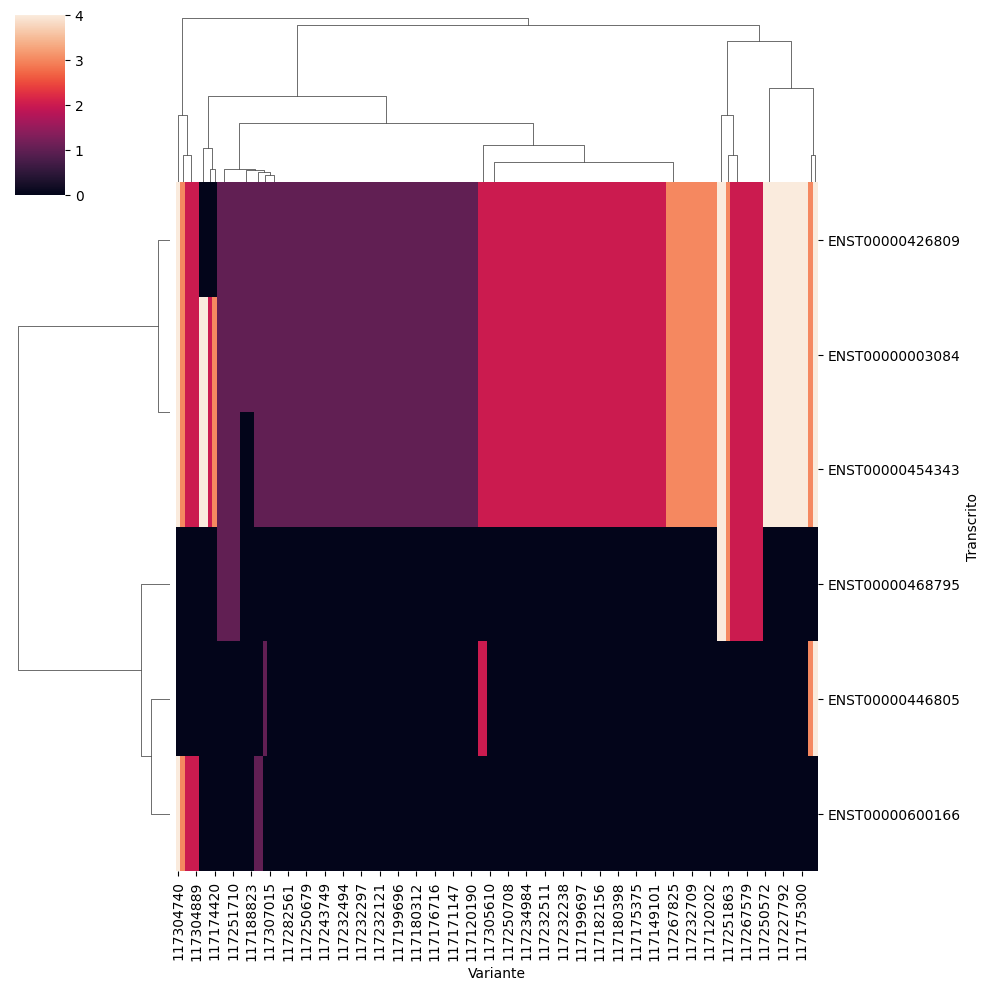

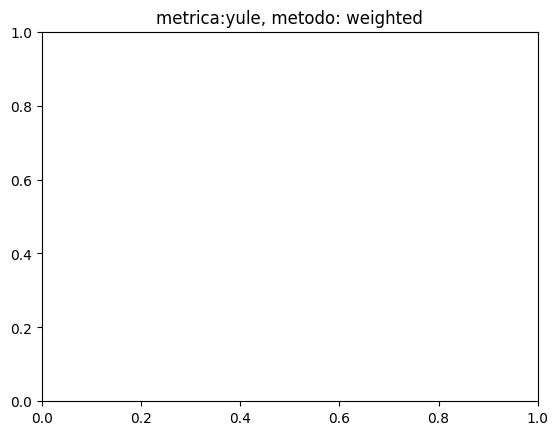

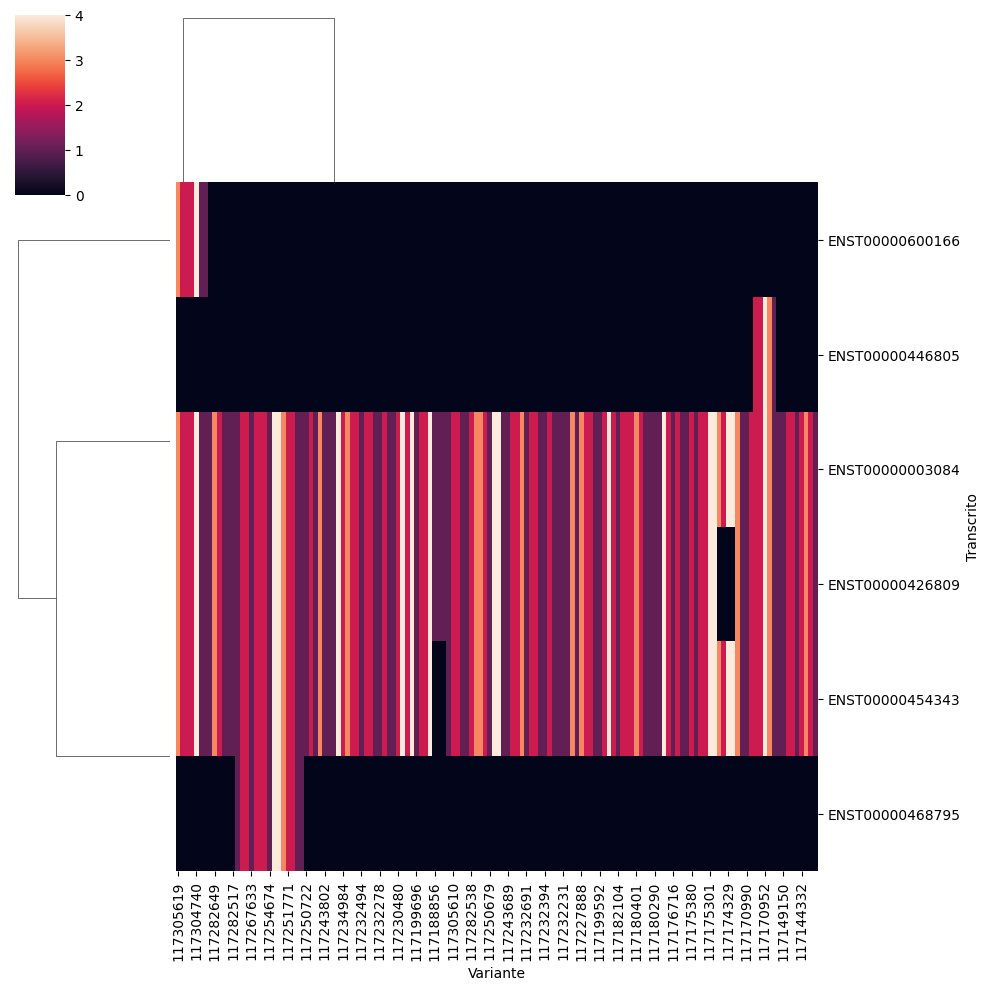

Erro na combinação: metrica=braycurtis, metodo=centroid
Method 'centroid' requires the distance metric to be Euclidean
Erro na combinação: metrica=canberra, metodo=centroid
Method 'centroid' requires the distance metric to be Euclidean
Erro na combinação: metrica=chebyshev, metodo=centroid
Method 'centroid' requires the distance metric to be Euclidean
Erro na combinação: metrica=cityblock, metodo=centroid
Method 'centroid' requires the distance metric to be Euclidean
Erro na combinação: metrica=correlation, metodo=centroid
Method 'centroid' requires the distance metric to be Euclidean
Erro na combinação: metrica=cosine, metodo=centroid
Method 'centroid' requires the distance metric to be Euclidean
Erro na combinação: metrica=dice, metodo=centroid
Method 'centroid' requires the distance metric to be Euclidean


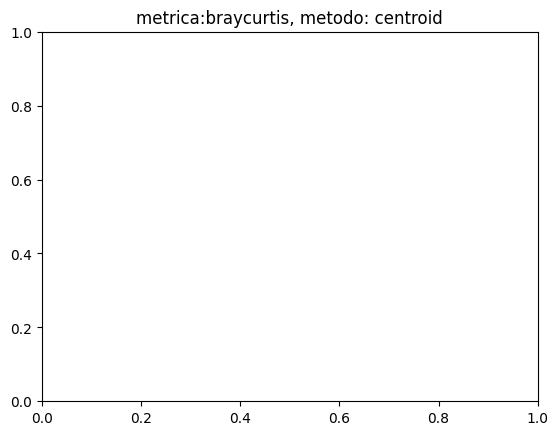

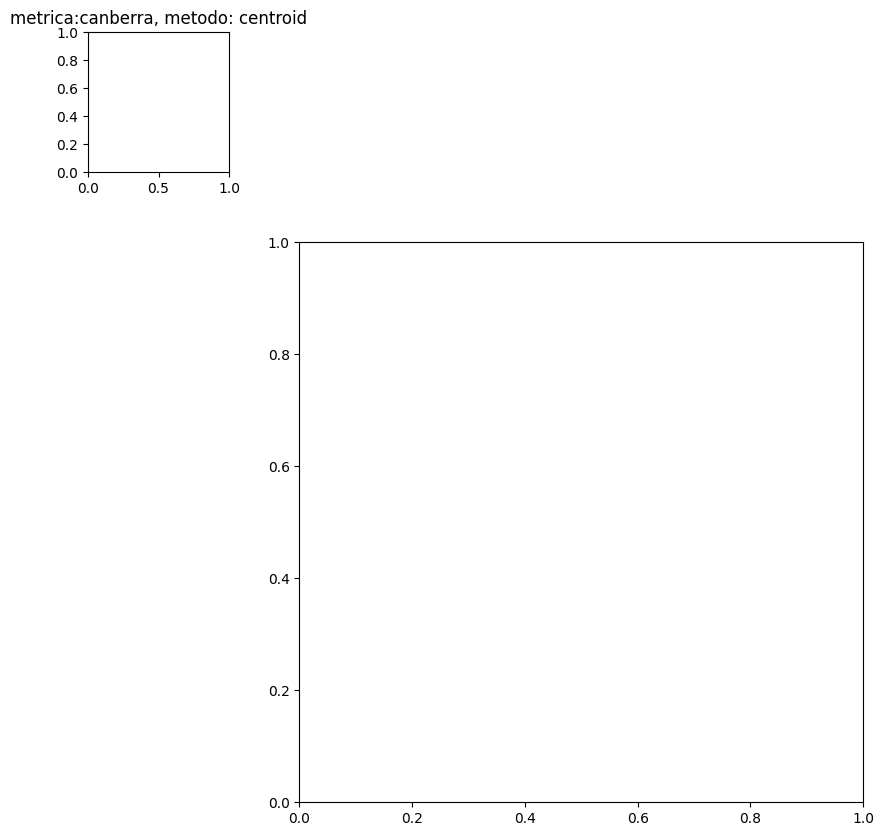

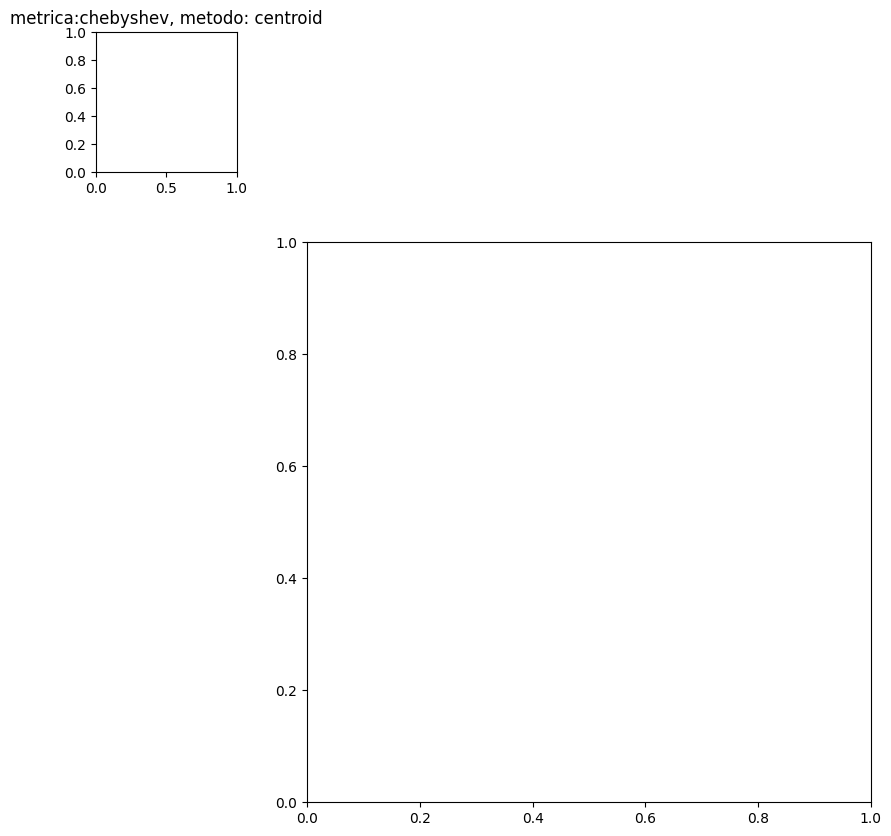

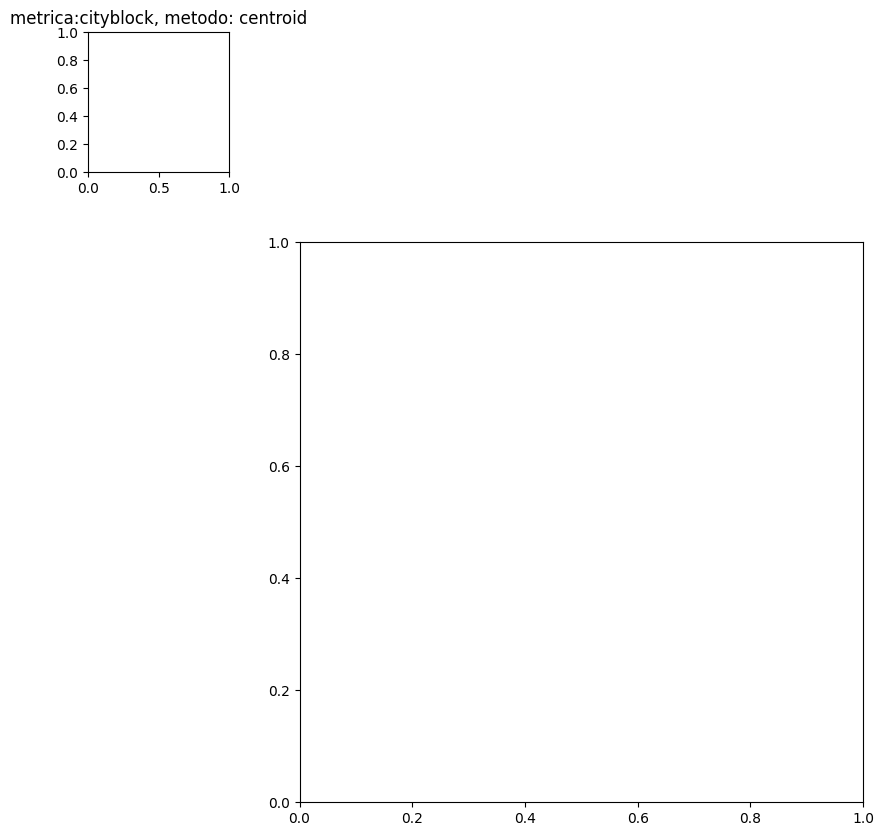

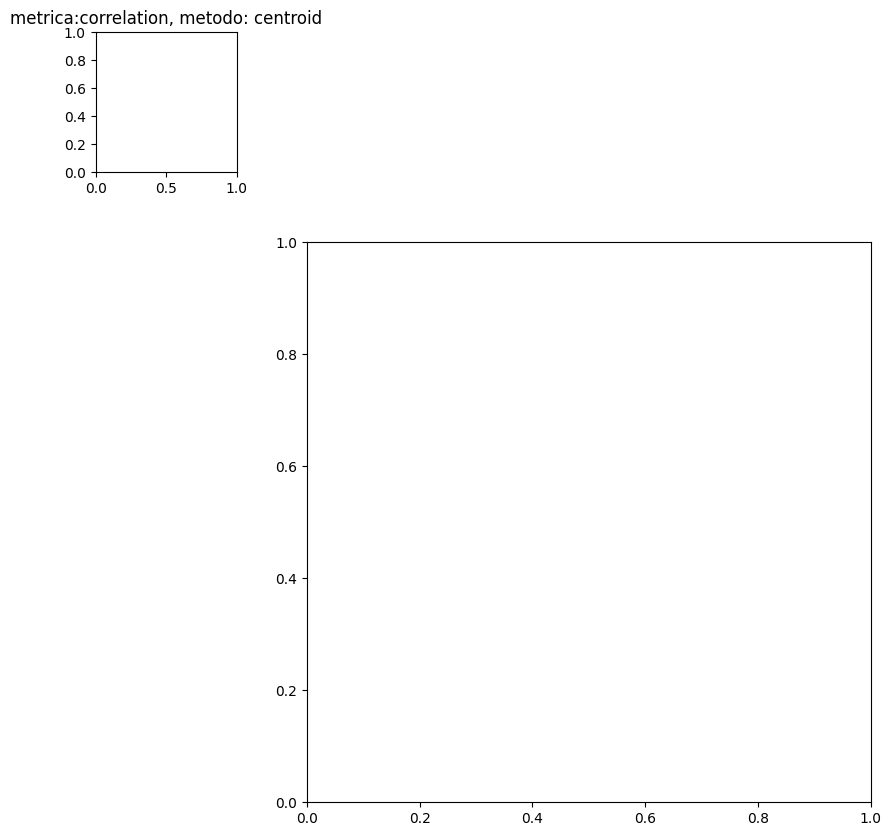

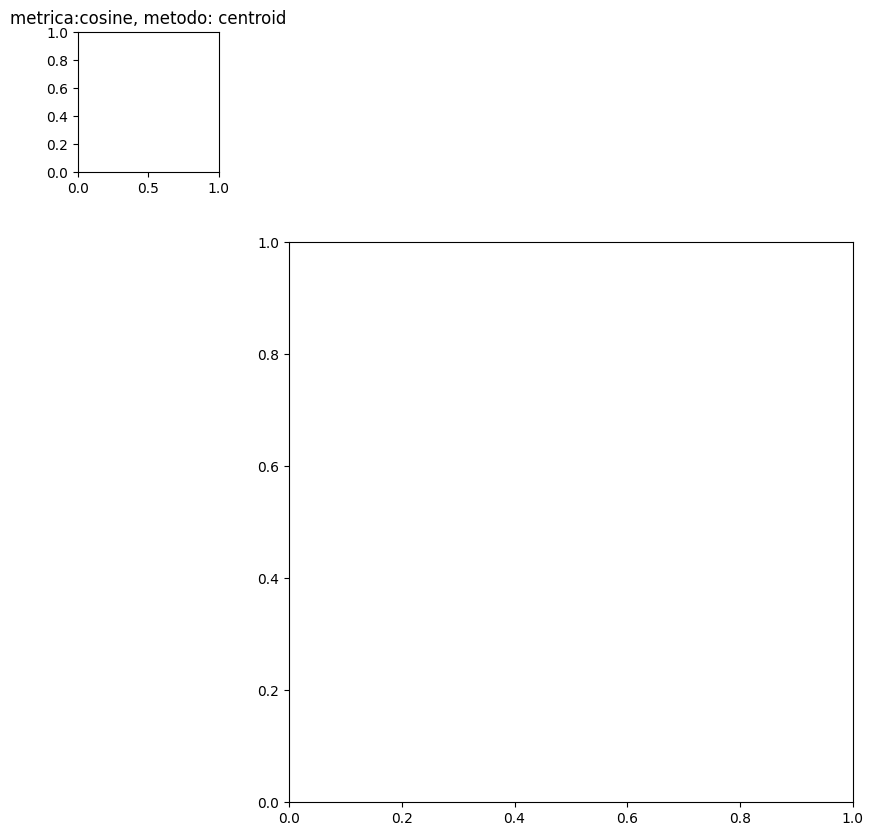

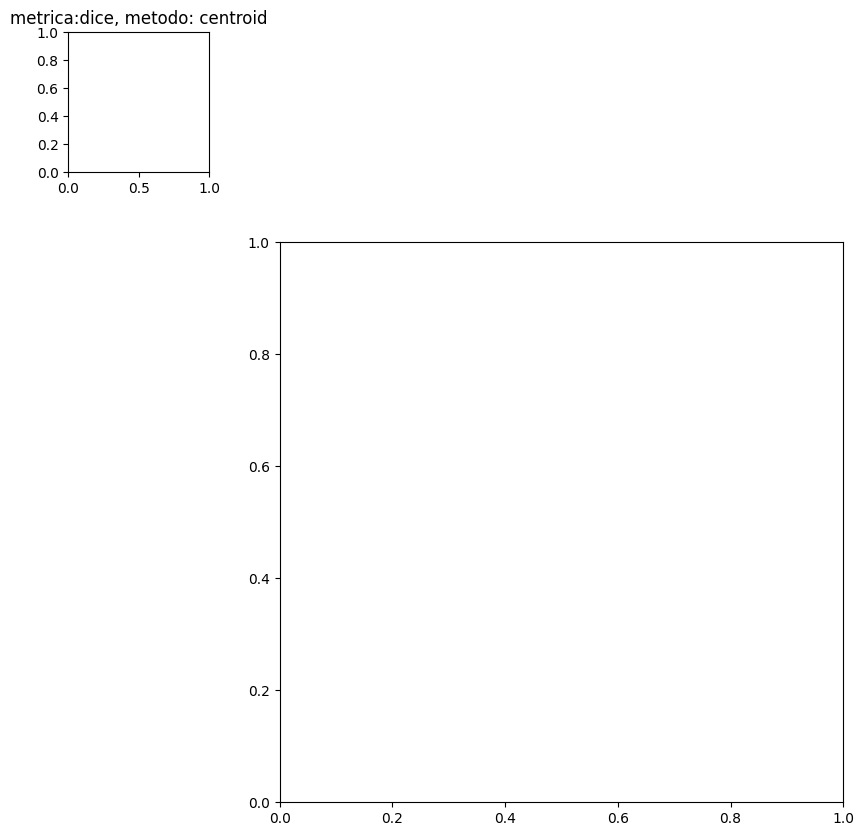

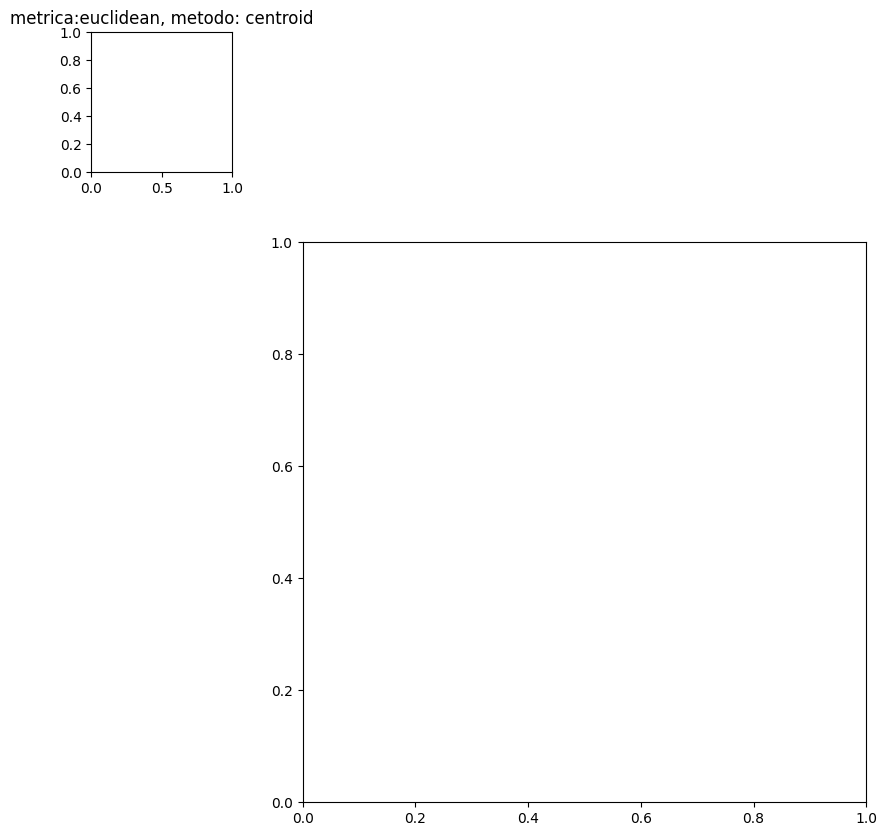

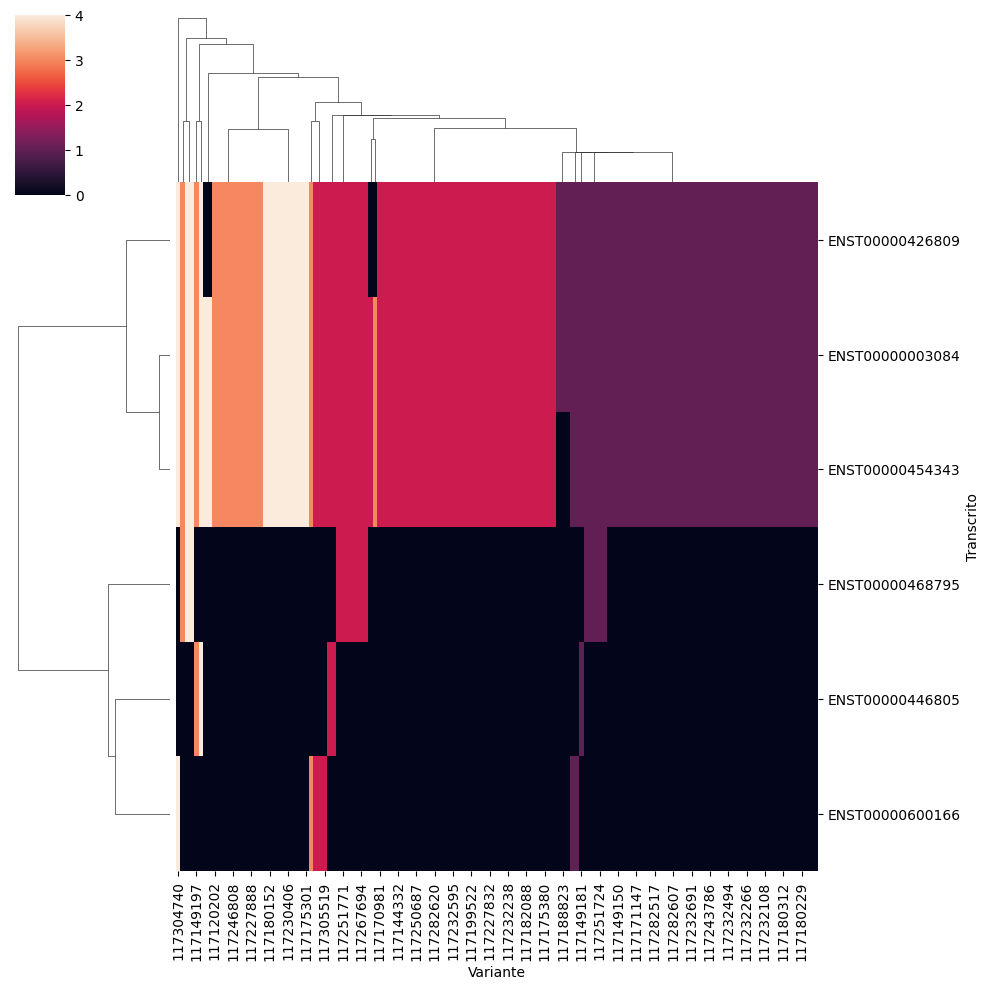

Erro na combinação: metrica=hamming, metodo=centroid
Method 'centroid' requires the distance metric to be Euclidean
Erro na combinação: metrica=jaccard, metodo=centroid
Method 'centroid' requires the distance metric to be Euclidean
Erro na combinação: metrica=jensenshannon, metodo=centroid
Method 'centroid' requires the distance metric to be Euclidean
Erro na combinação: metrica=kulczynski1, metodo=centroid
Method 'centroid' requires the distance metric to be Euclidean
Erro na combinação: metrica=mahalanobis, metodo=centroid
Method 'centroid' requires the distance metric to be Euclidean
Erro na combinação: metrica=matching, metodo=centroid
Method 'centroid' requires the distance metric to be Euclidean
Erro na combinação: metrica=minkowski, metodo=centroid
Method 'centroid' requires the distance metric to be Euclidean
Erro na combinação: metrica=rogerstanimoto, metodo=centroid
Method 'centroid' requires the distance metric to be Euclidean
Erro na combinação: metrica=russellrao, metodo=c

d:\estud\Documents\OneDrive\Documentos\LGHM\.venv\Lib\site-packages\seaborn\matrix.py:715: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  self._figure = plt.figure(figsize=figsize)


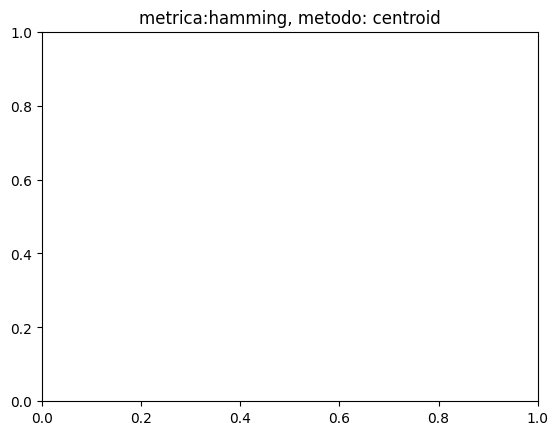

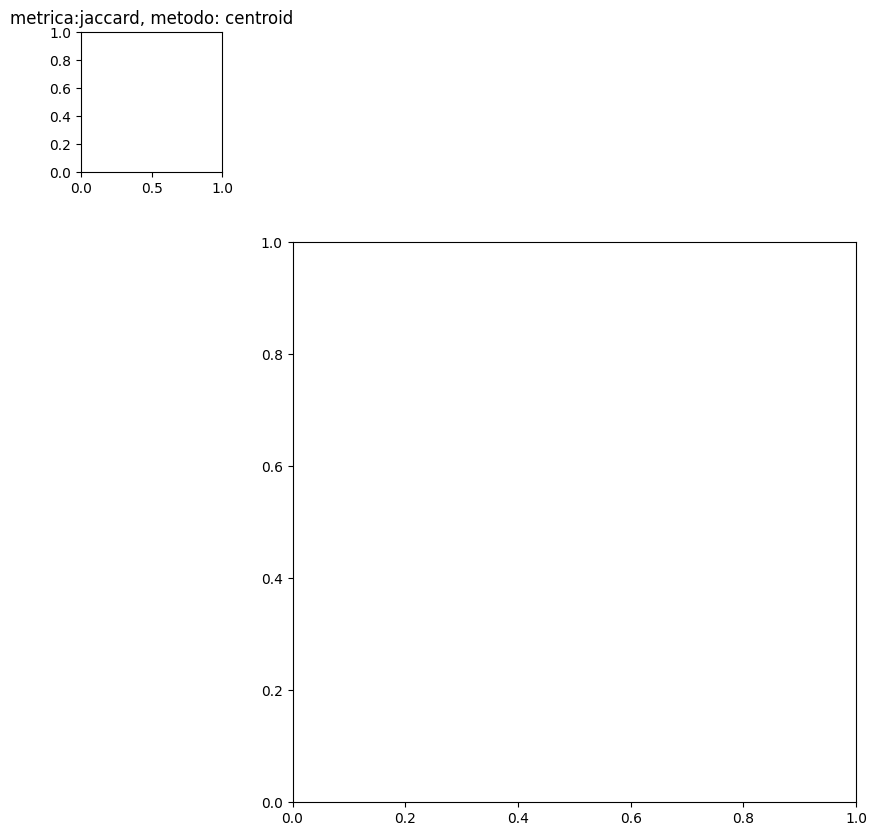

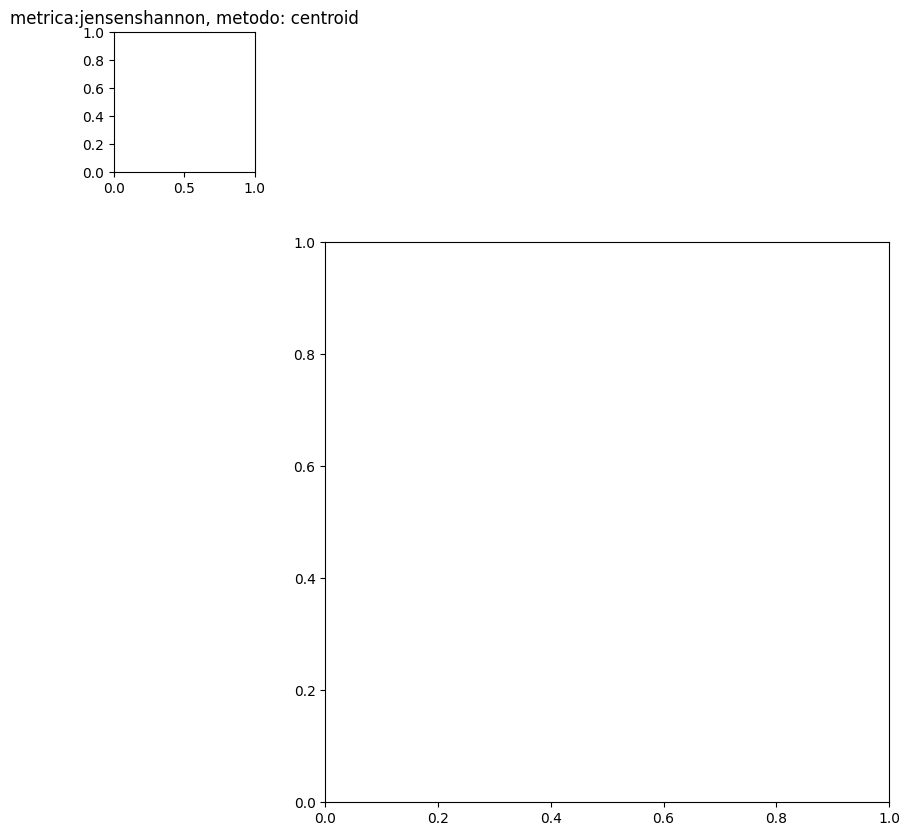

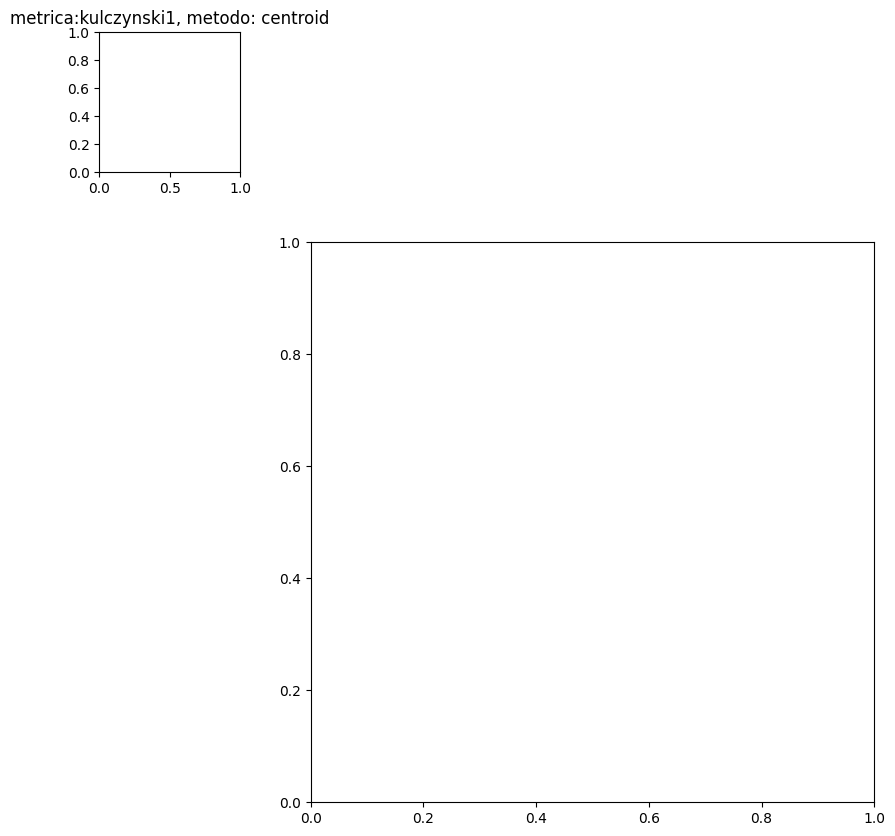

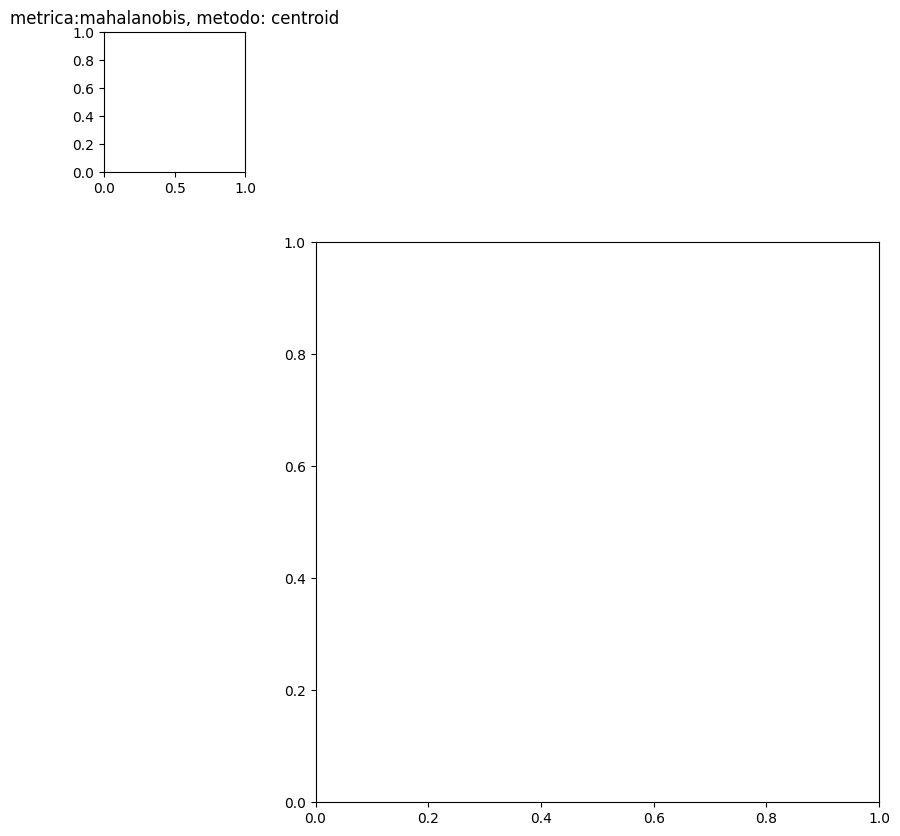

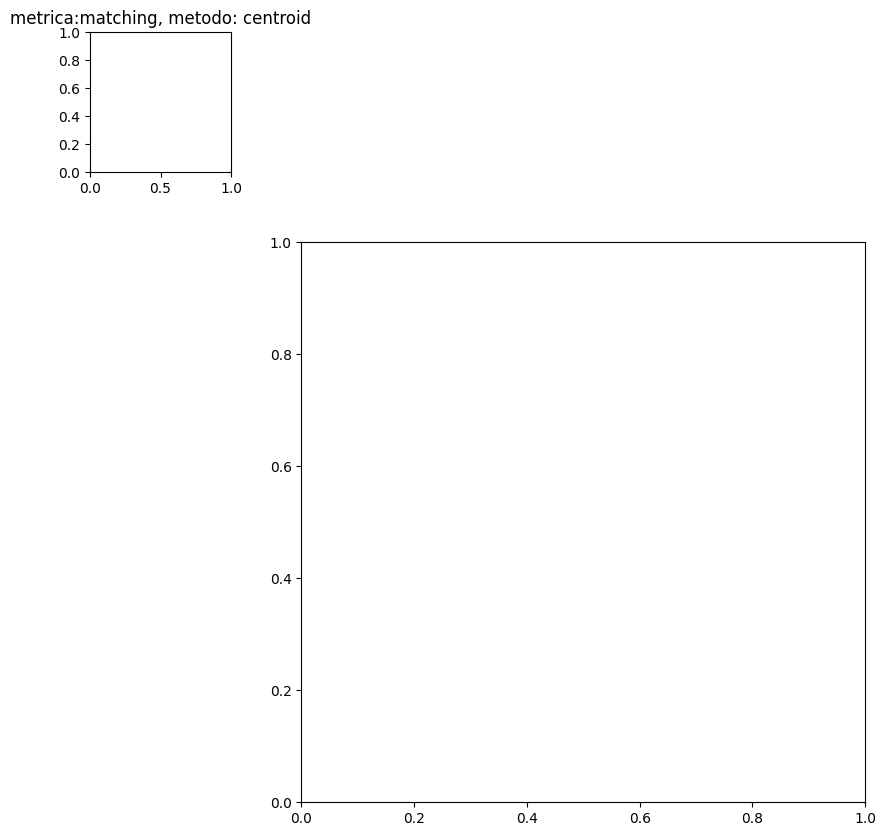

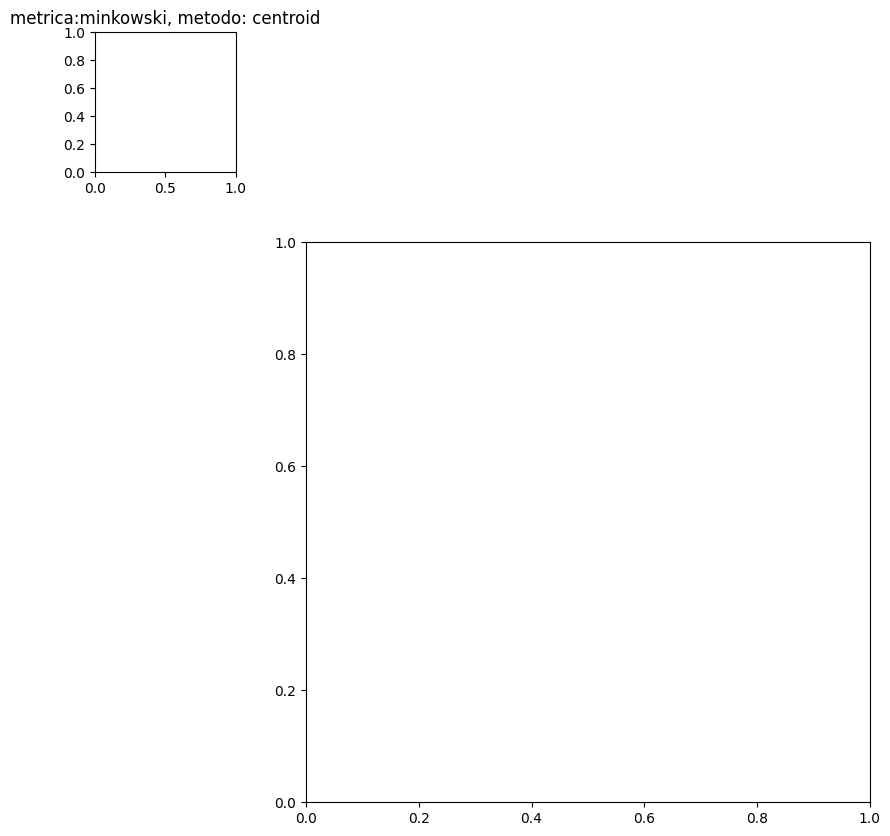

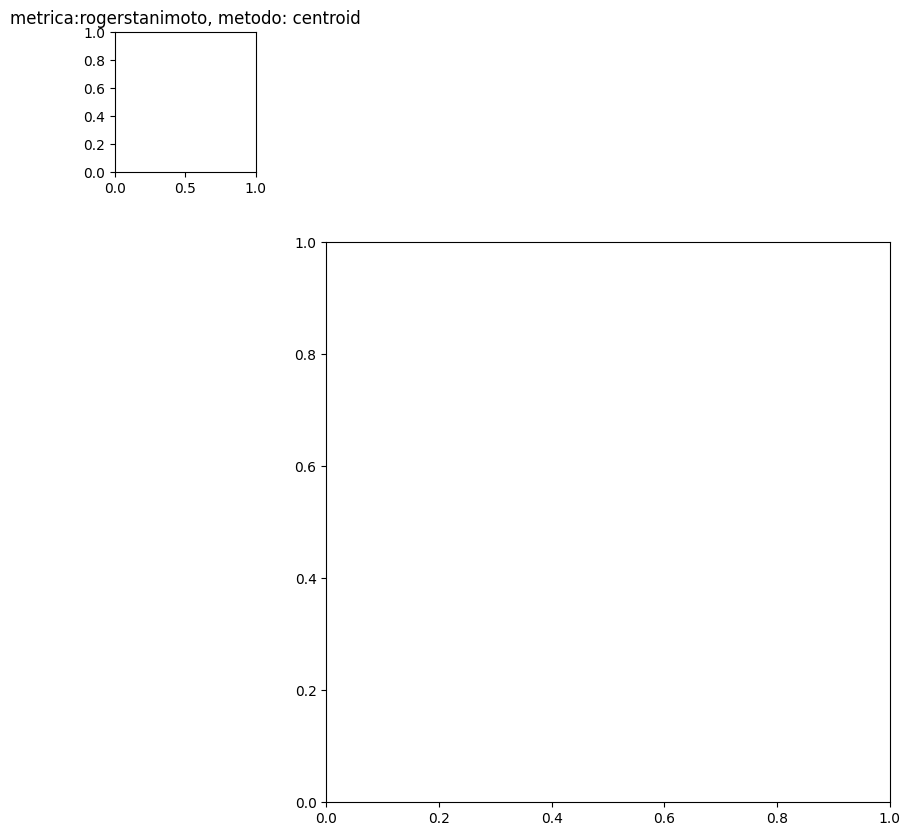

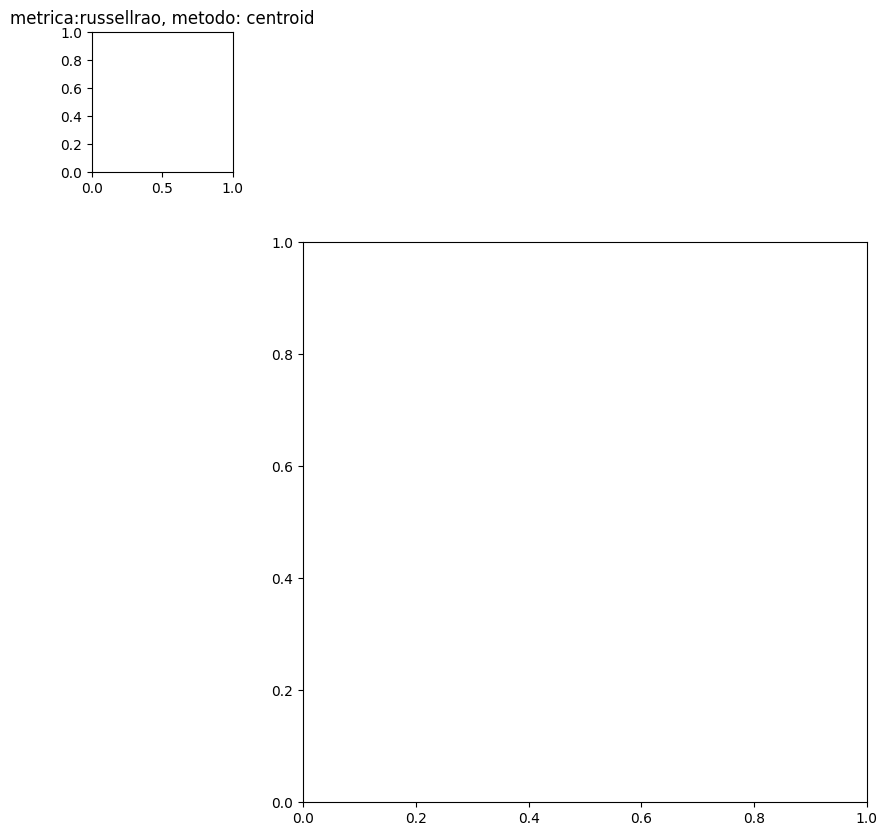

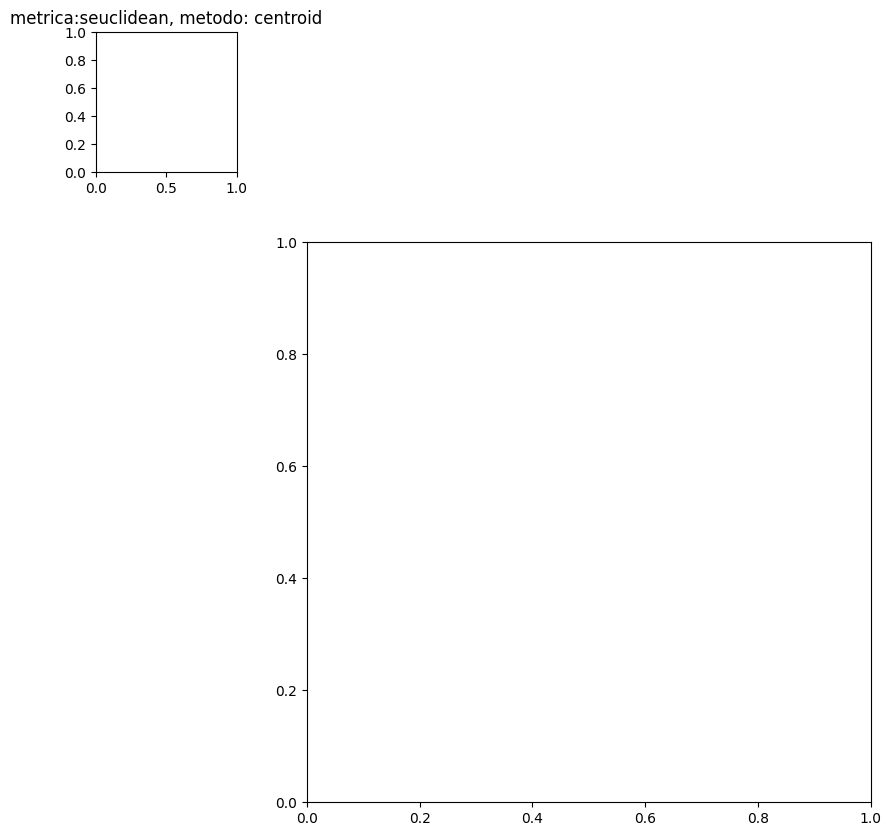

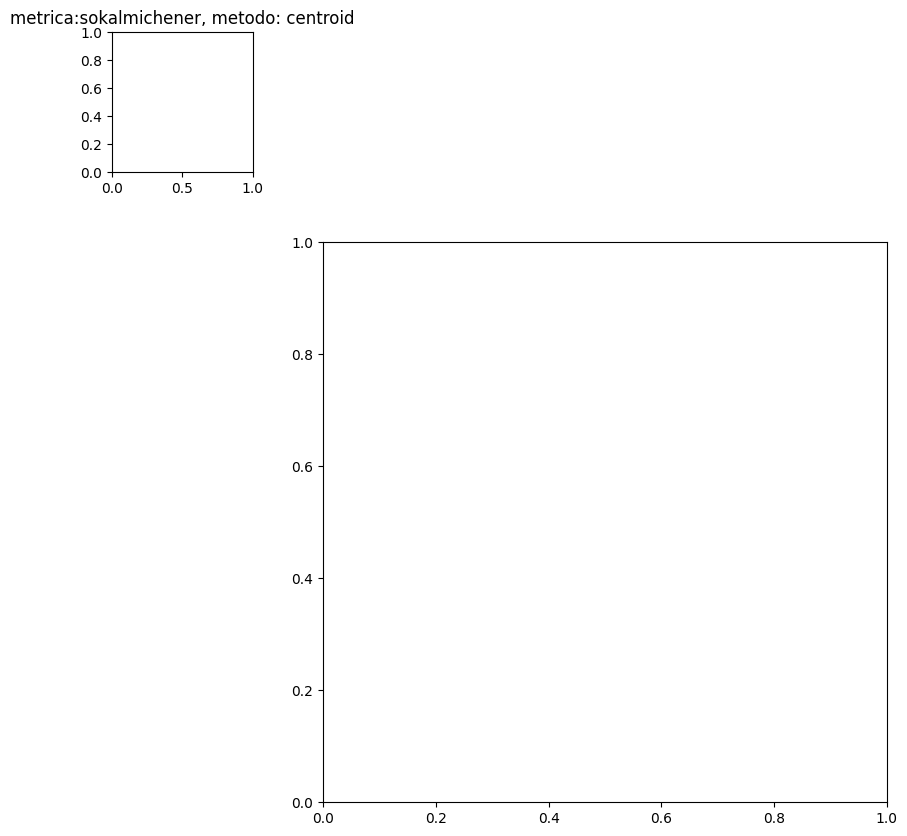

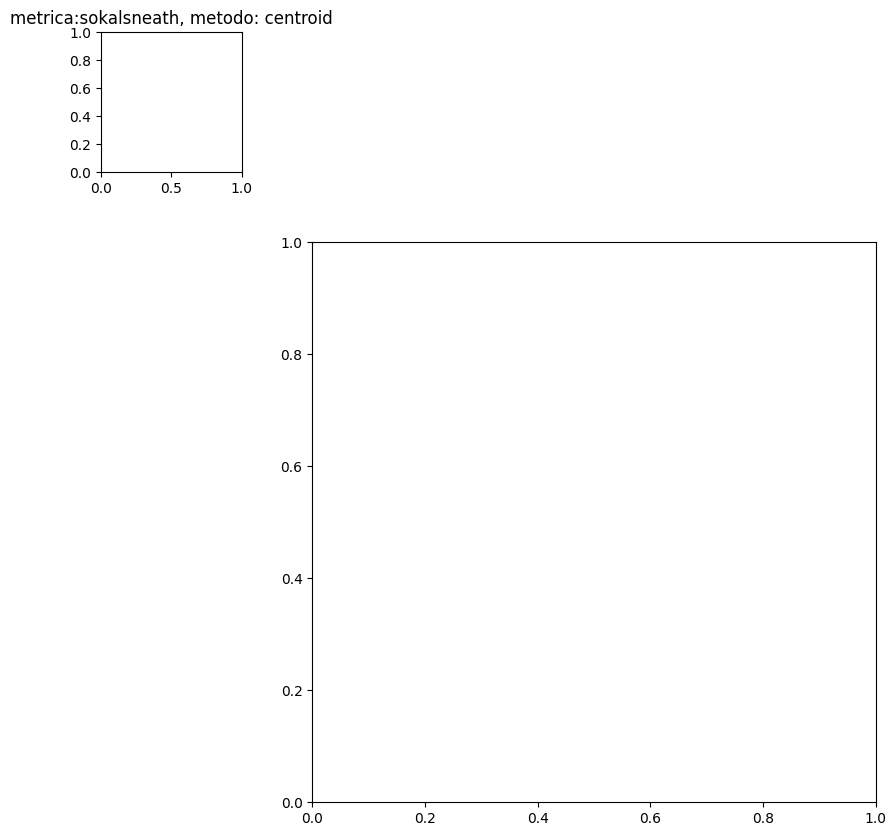

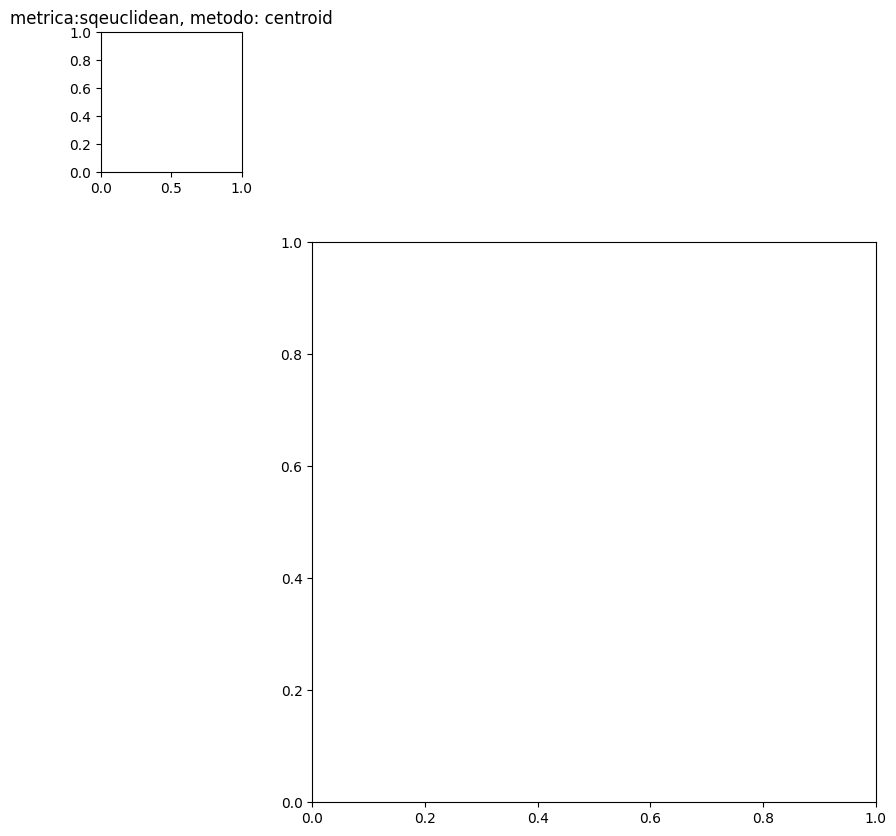

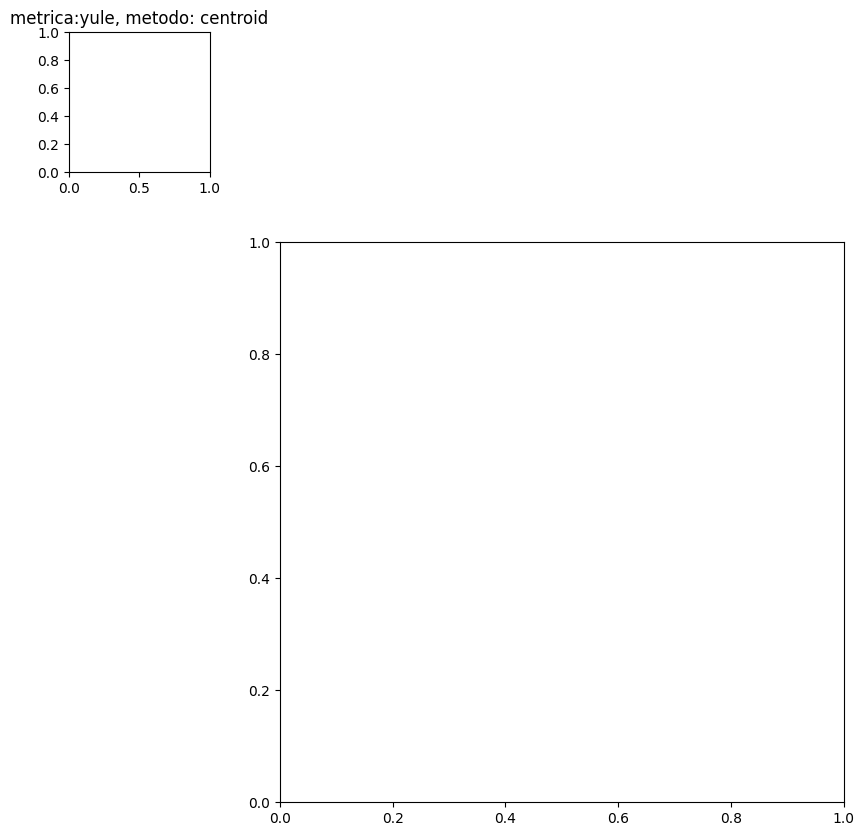

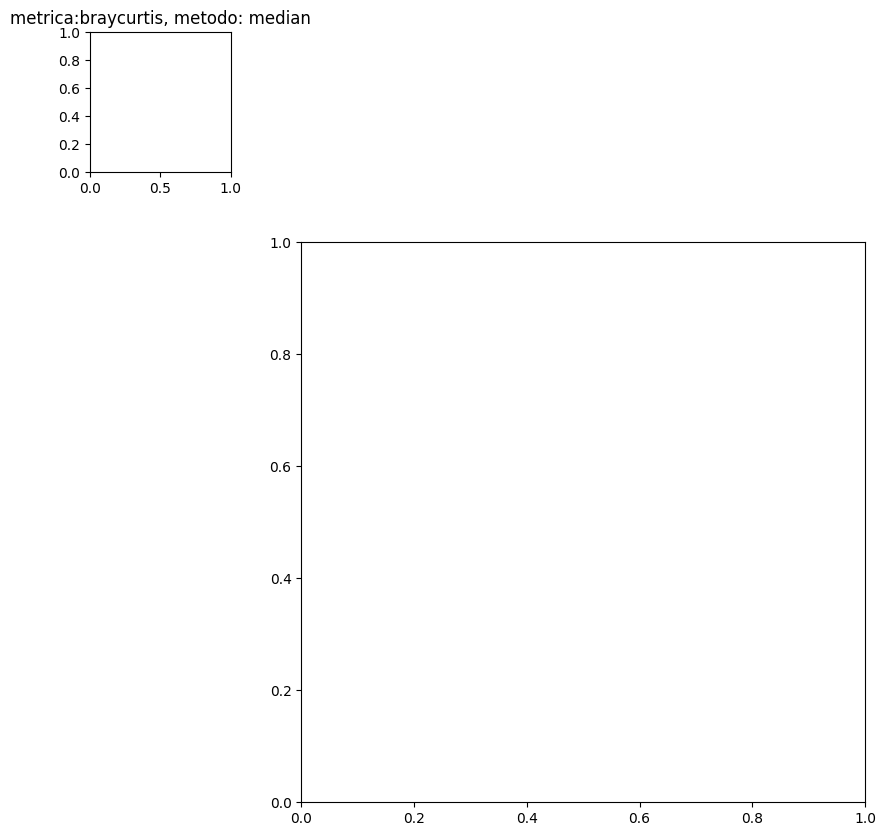

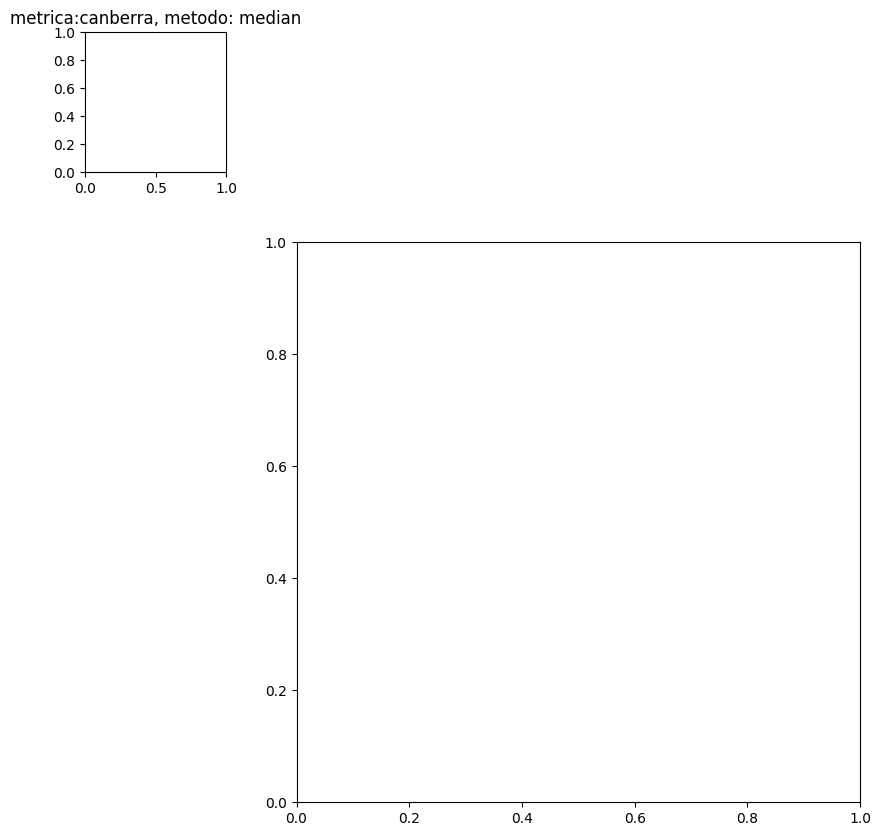

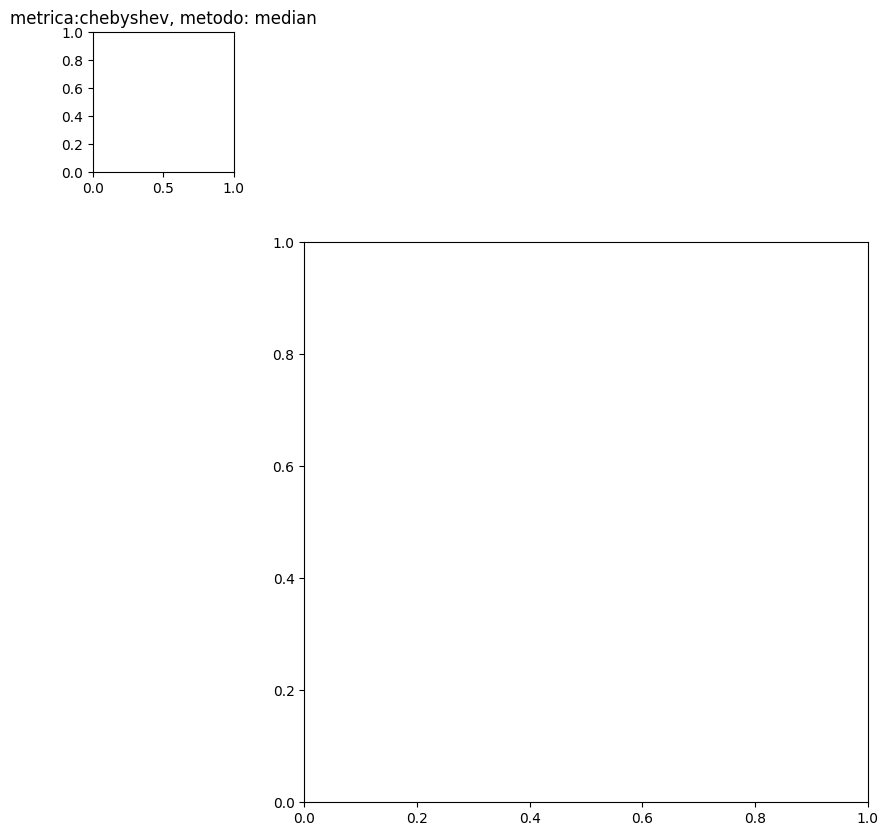

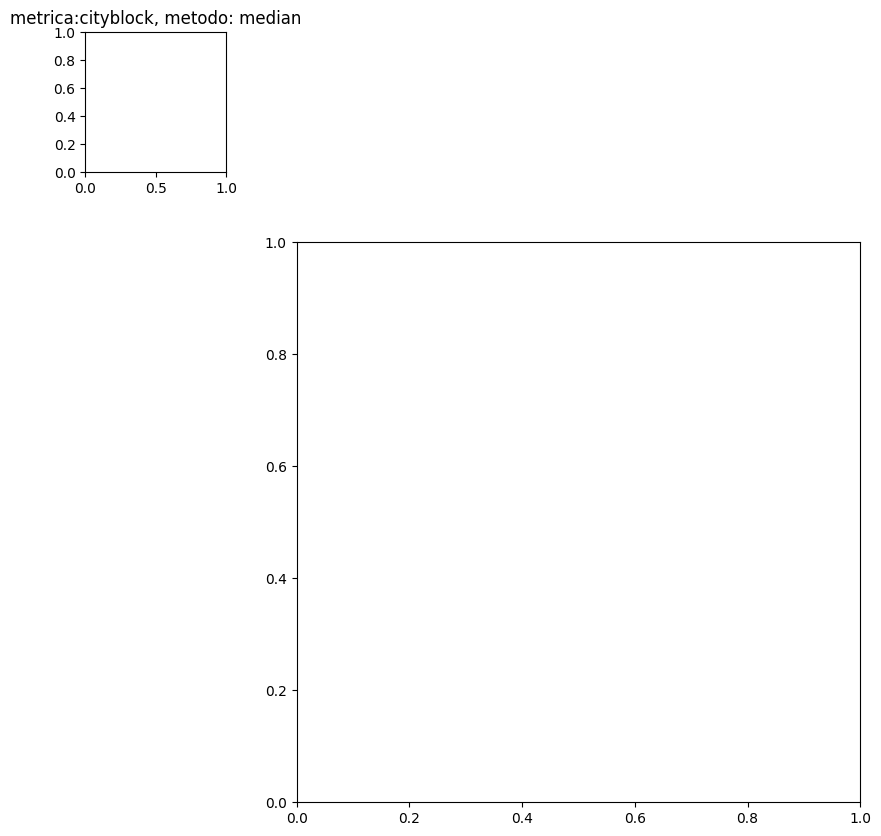

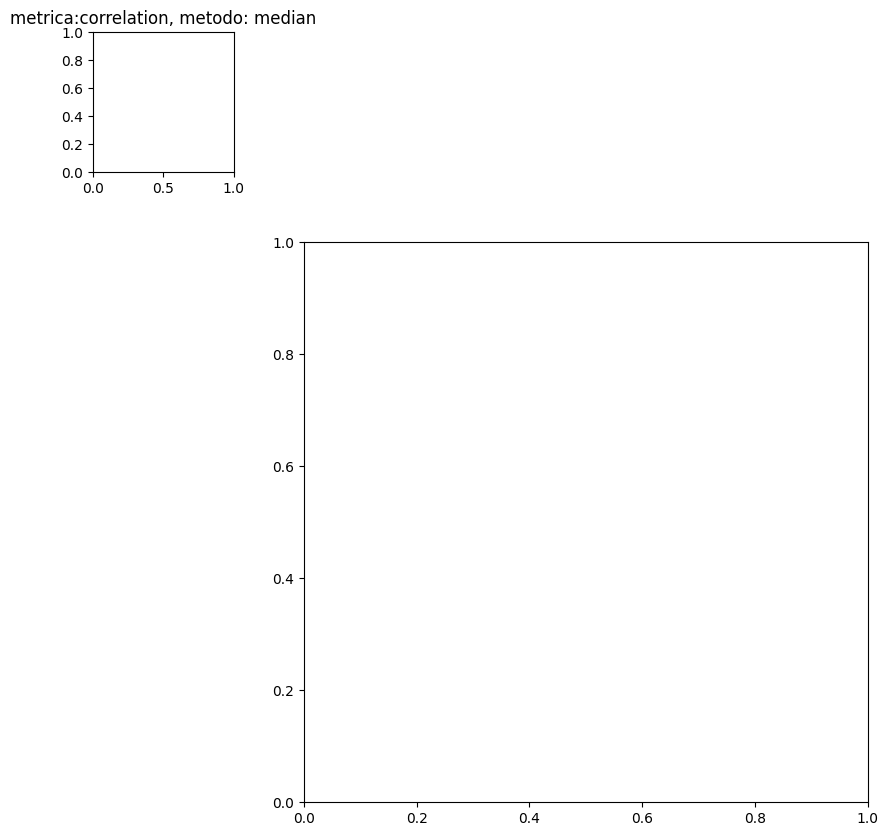

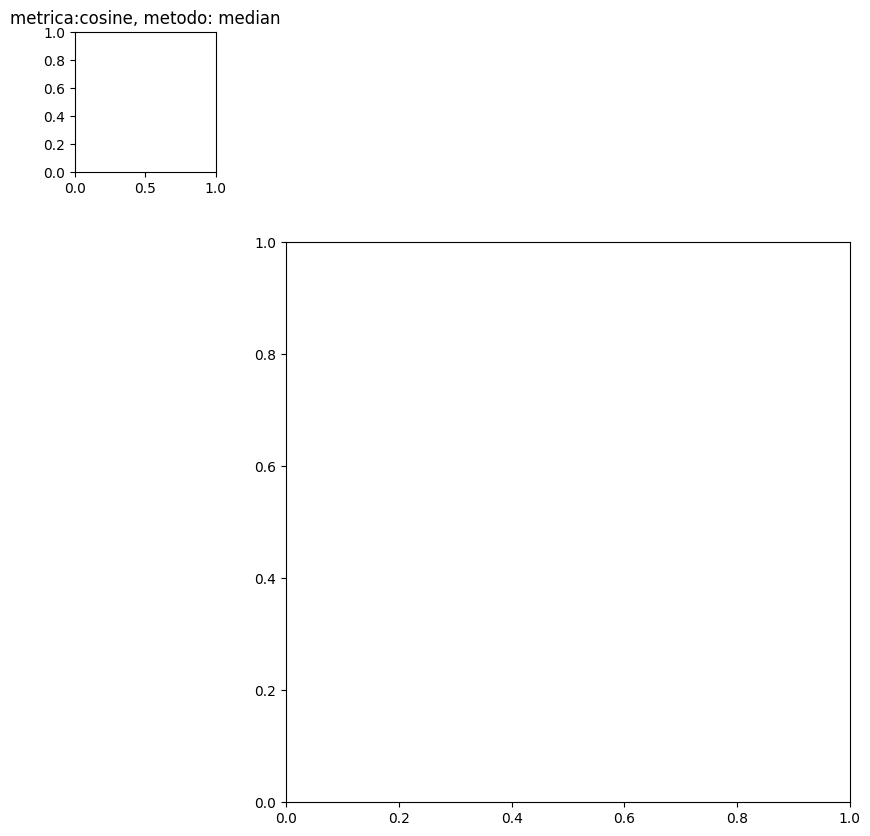

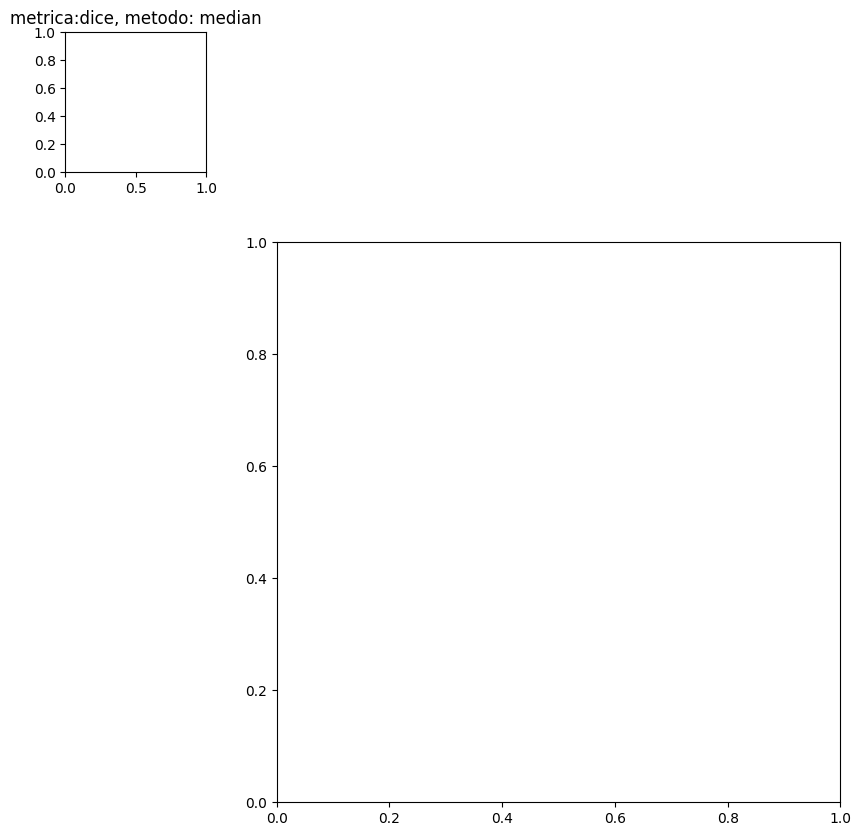

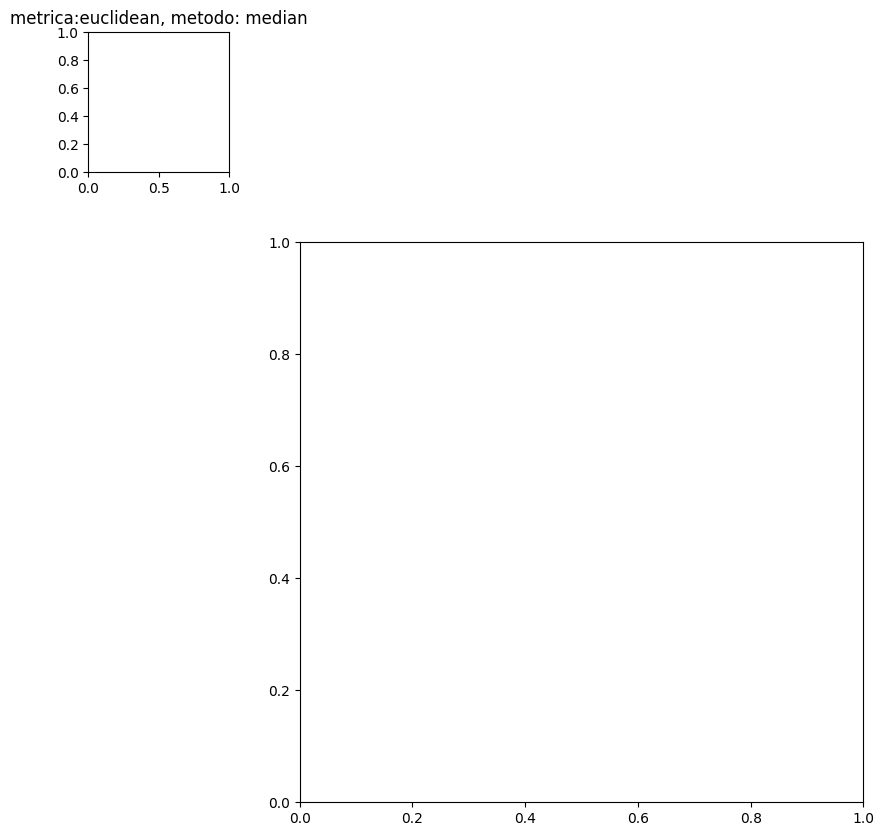

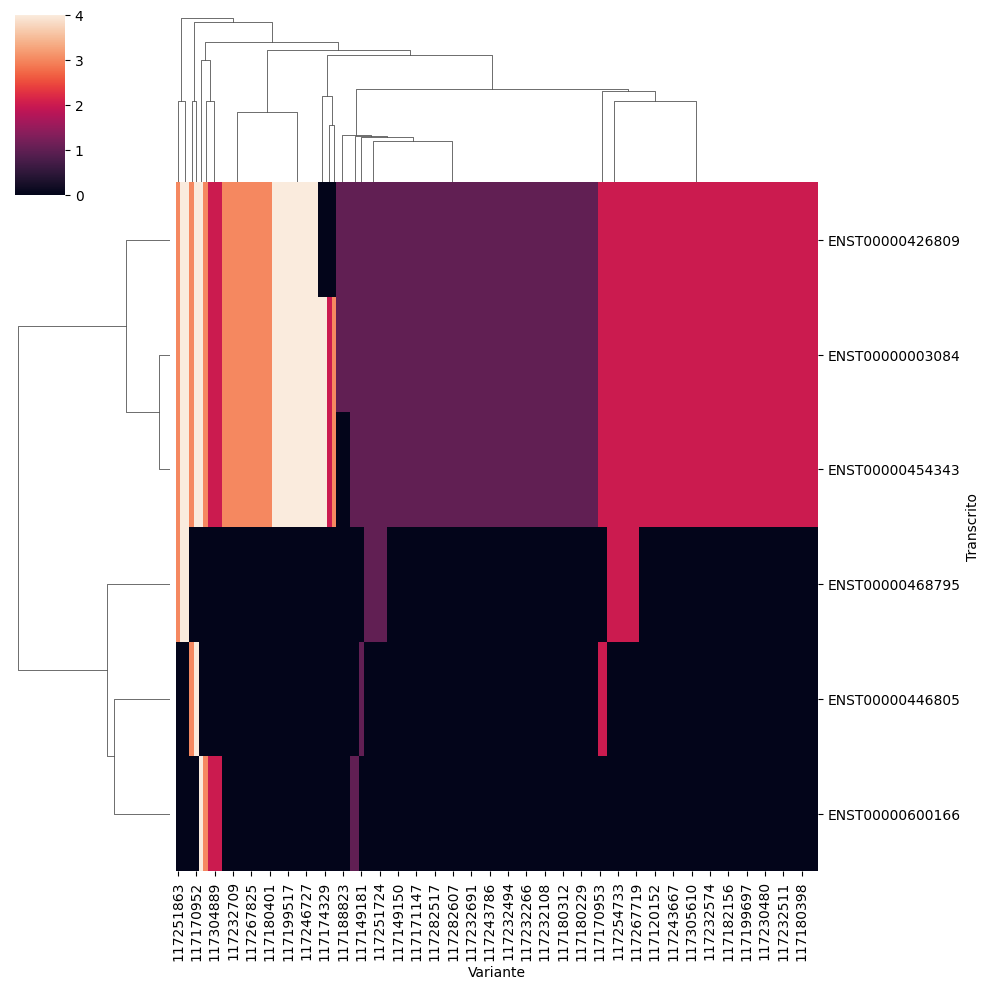

Erro na combinação: metrica=hamming, metodo=median
Method 'median' requires the distance metric to be Euclidean
Erro na combinação: metrica=jaccard, metodo=median
Method 'median' requires the distance metric to be Euclidean
Erro na combinação: metrica=jensenshannon, metodo=median
Method 'median' requires the distance metric to be Euclidean
Erro na combinação: metrica=kulczynski1, metodo=median
Method 'median' requires the distance metric to be Euclidean
Erro na combinação: metrica=mahalanobis, metodo=median
Method 'median' requires the distance metric to be Euclidean
Erro na combinação: metrica=matching, metodo=median
Method 'median' requires the distance metric to be Euclidean
Erro na combinação: metrica=minkowski, metodo=median
Method 'median' requires the distance metric to be Euclidean
Erro na combinação: metrica=rogerstanimoto, metodo=median
Method 'median' requires the distance metric to be Euclidean
Erro na combinação: metrica=russellrao, metodo=median
Method 'median' requires t

d:\estud\Documents\OneDrive\Documentos\LGHM\.venv\Lib\site-packages\seaborn\matrix.py:715: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  self._figure = plt.figure(figsize=figsize)


Erro na combinação: metrica=cosine, metodo=ward
Method 'ward' requires the distance metric to be Euclidean
Erro na combinação: metrica=dice, metodo=ward
Method 'ward' requires the distance metric to be Euclidean


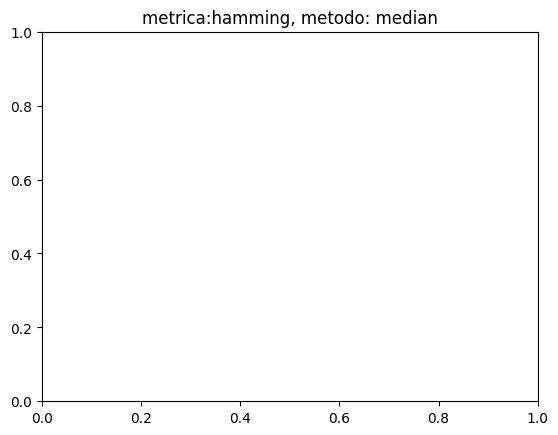

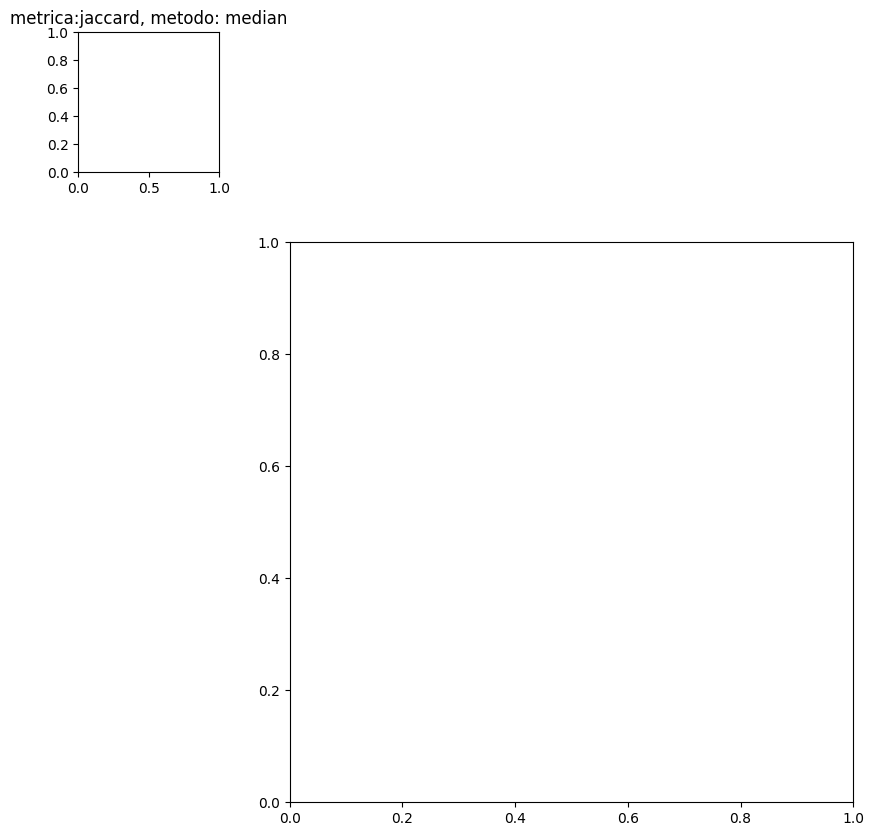

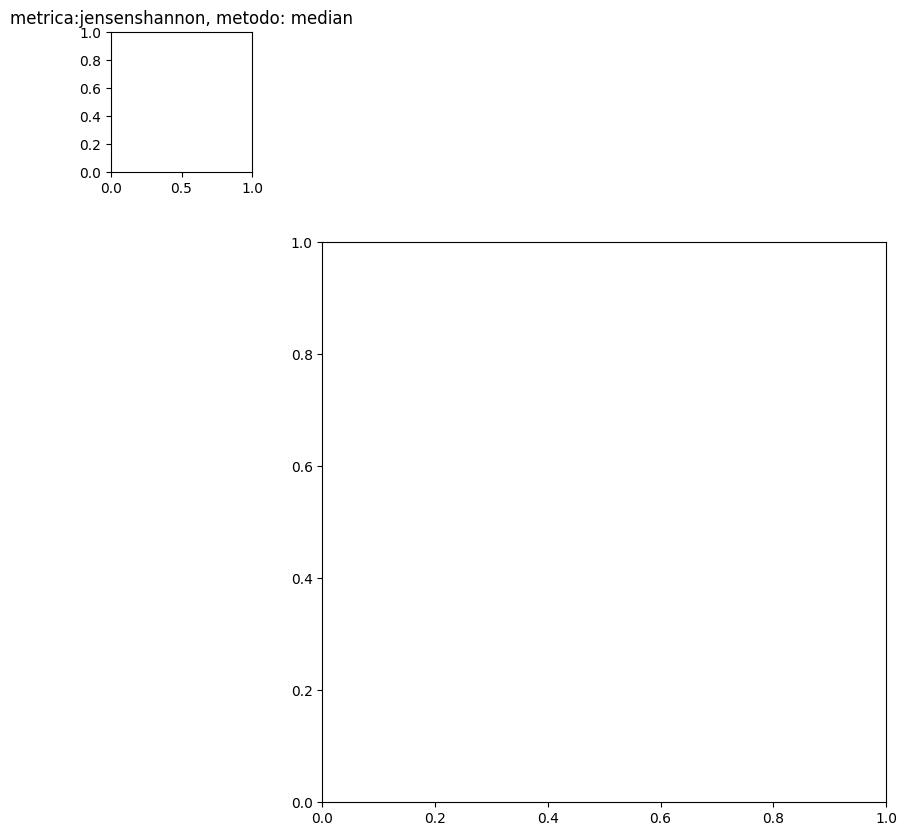

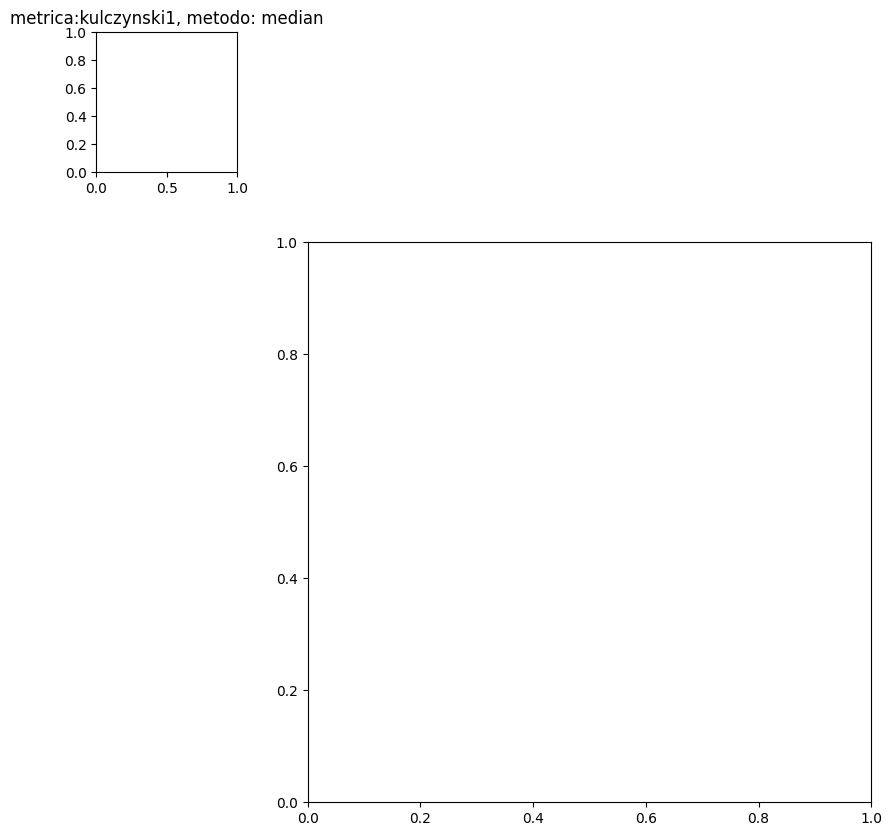

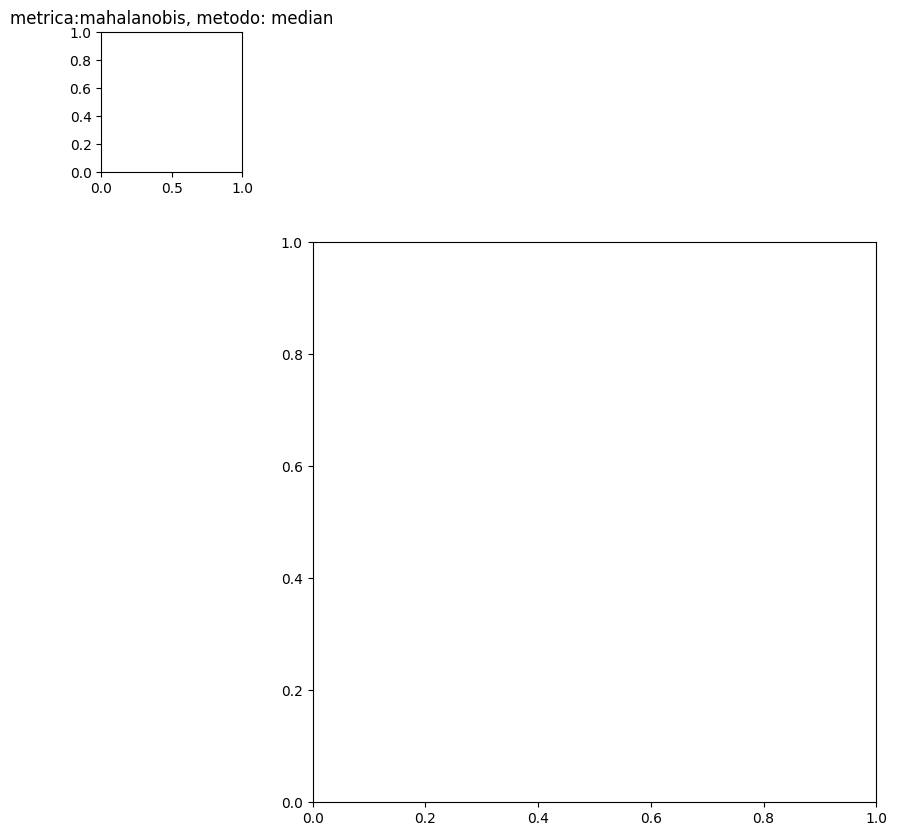

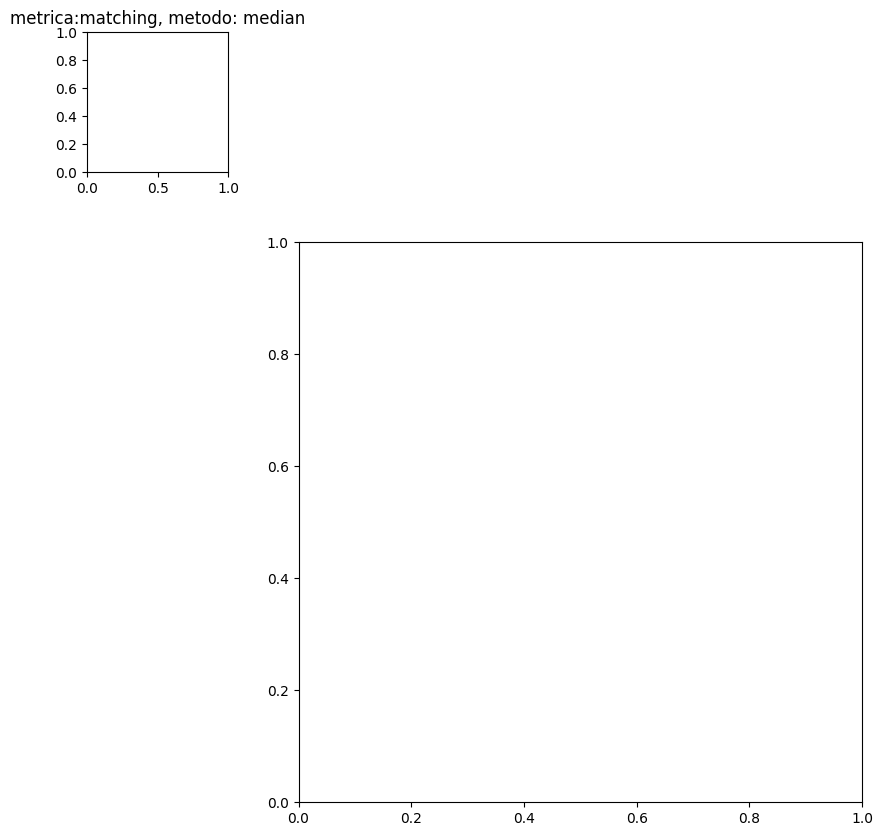

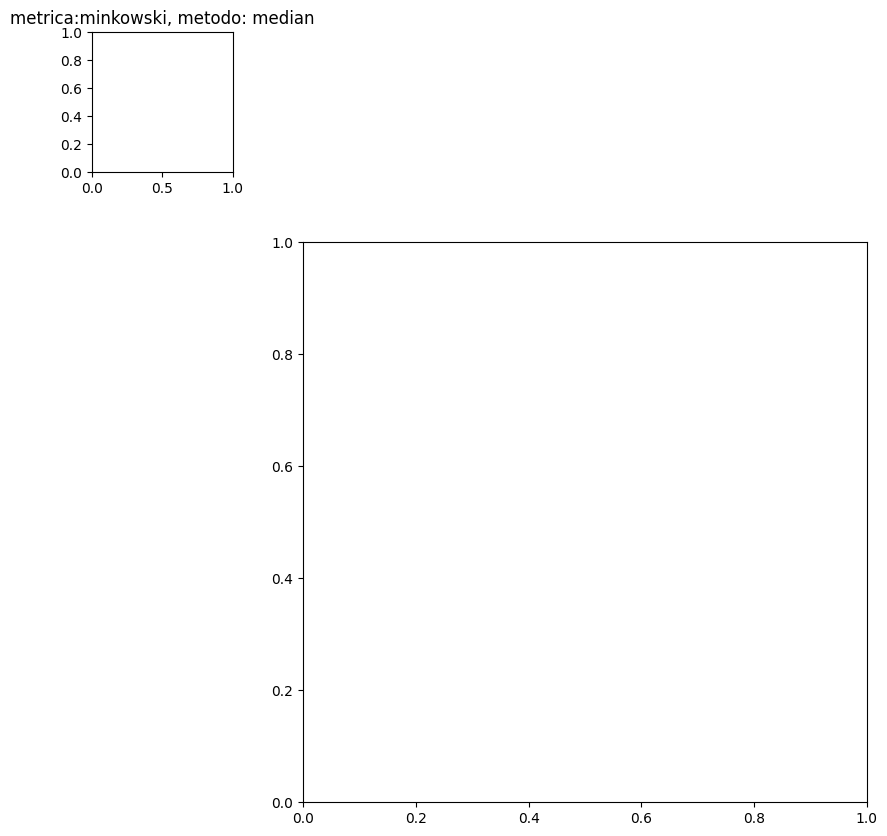

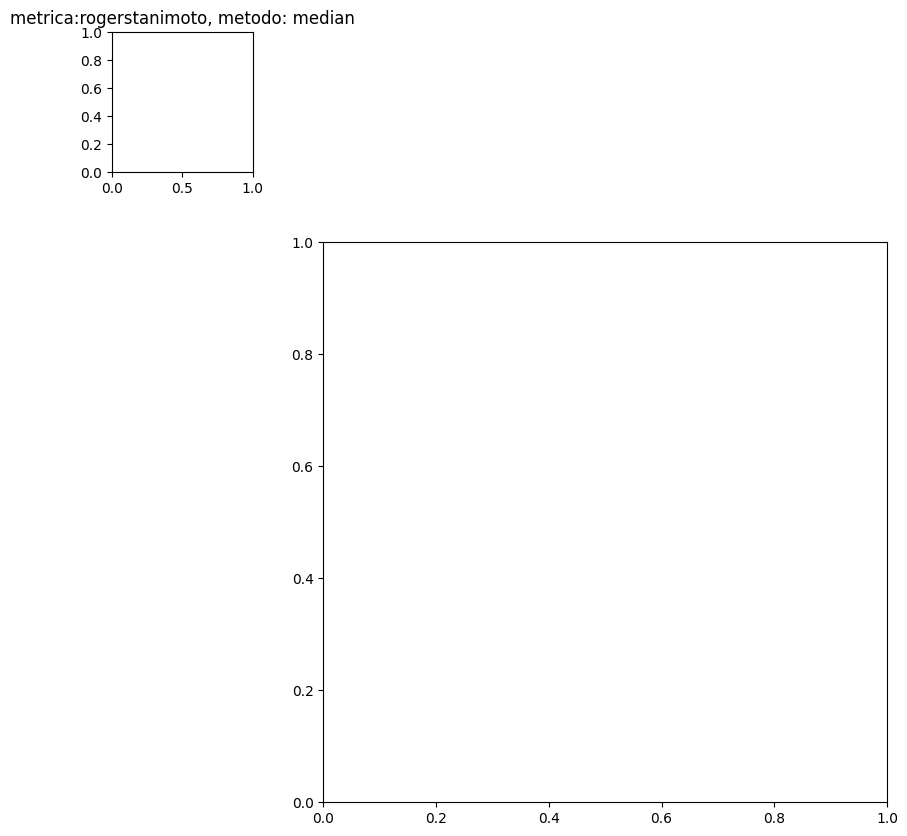

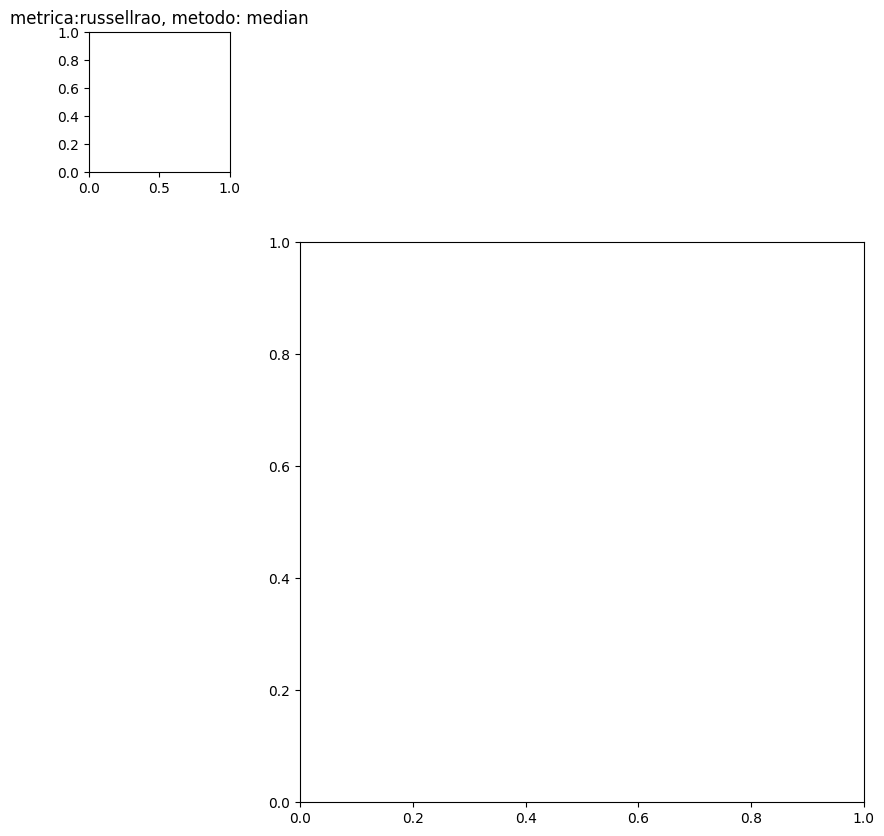

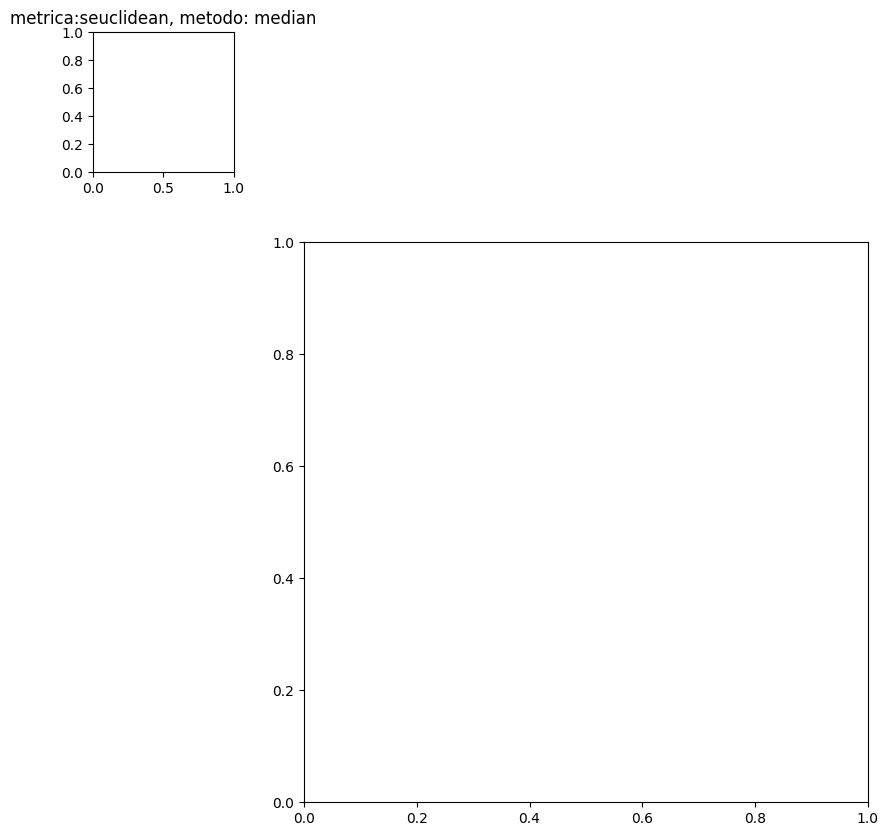

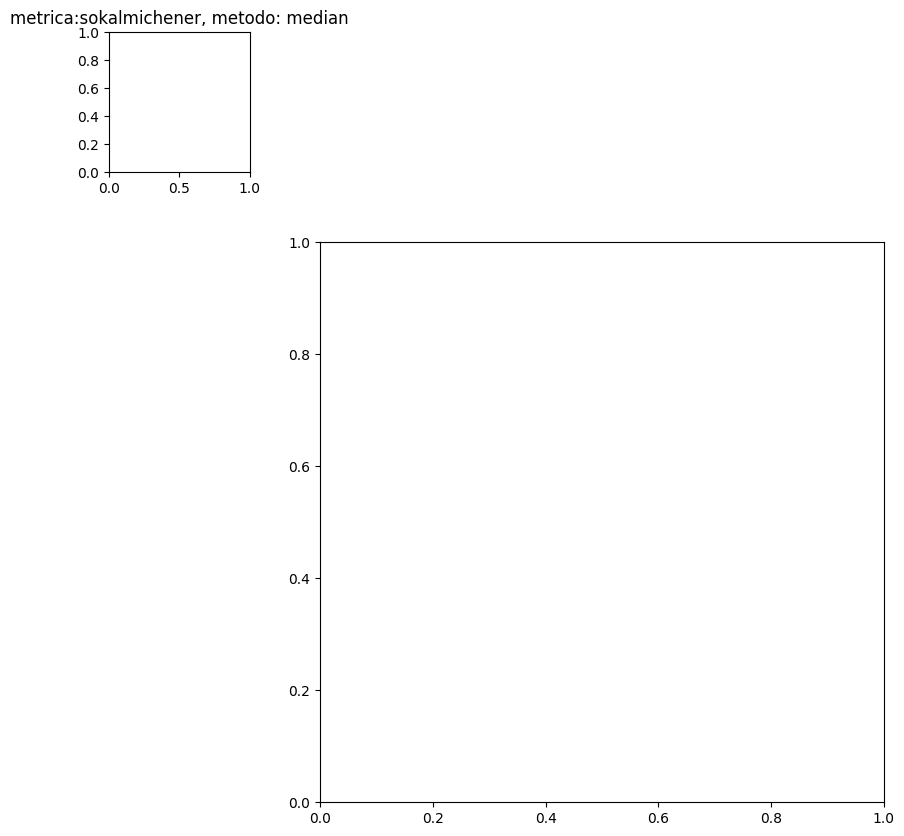

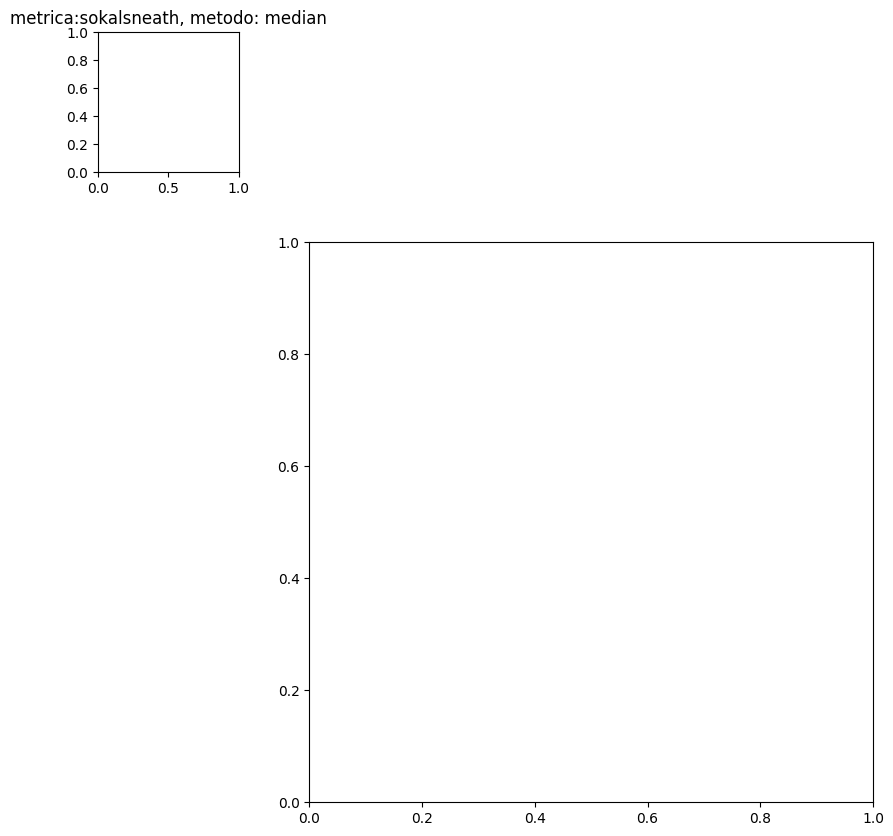

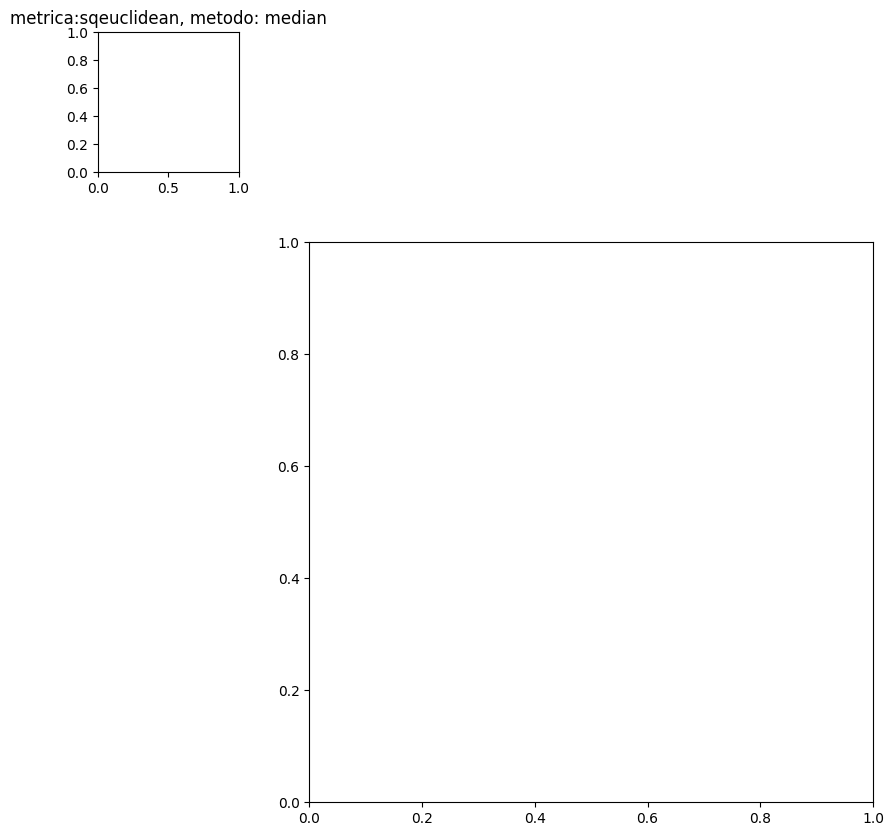

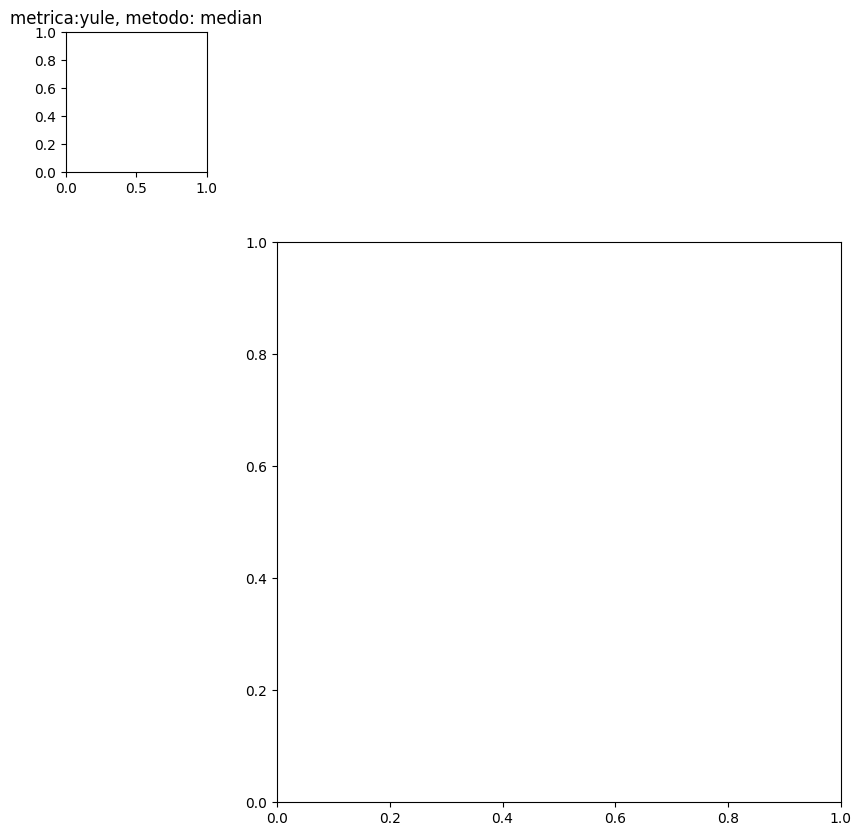

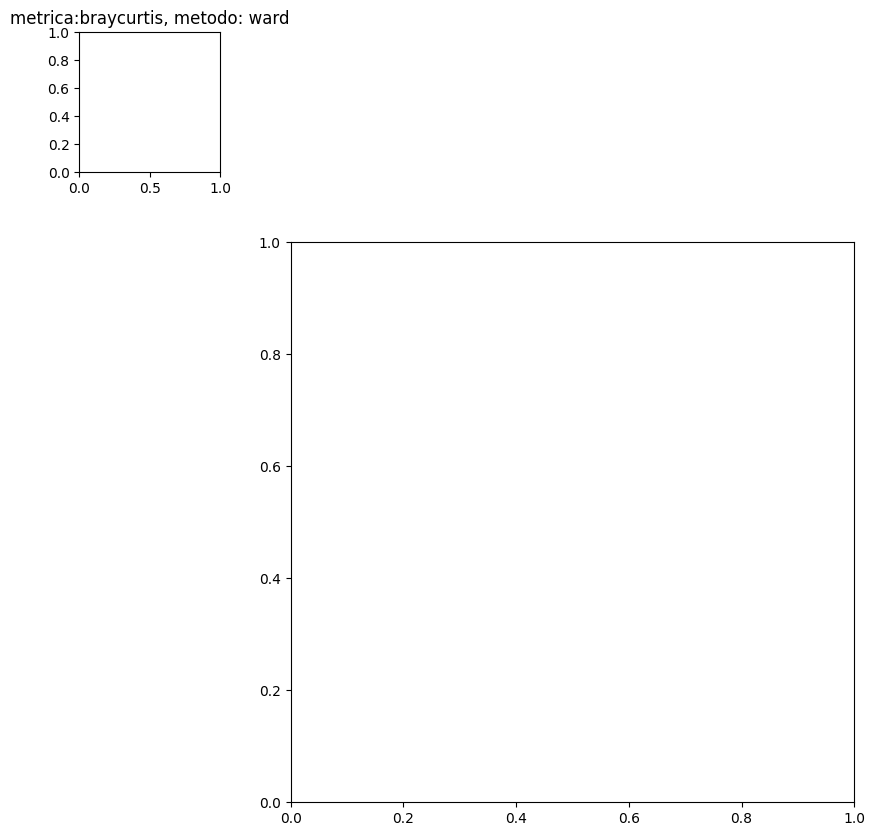

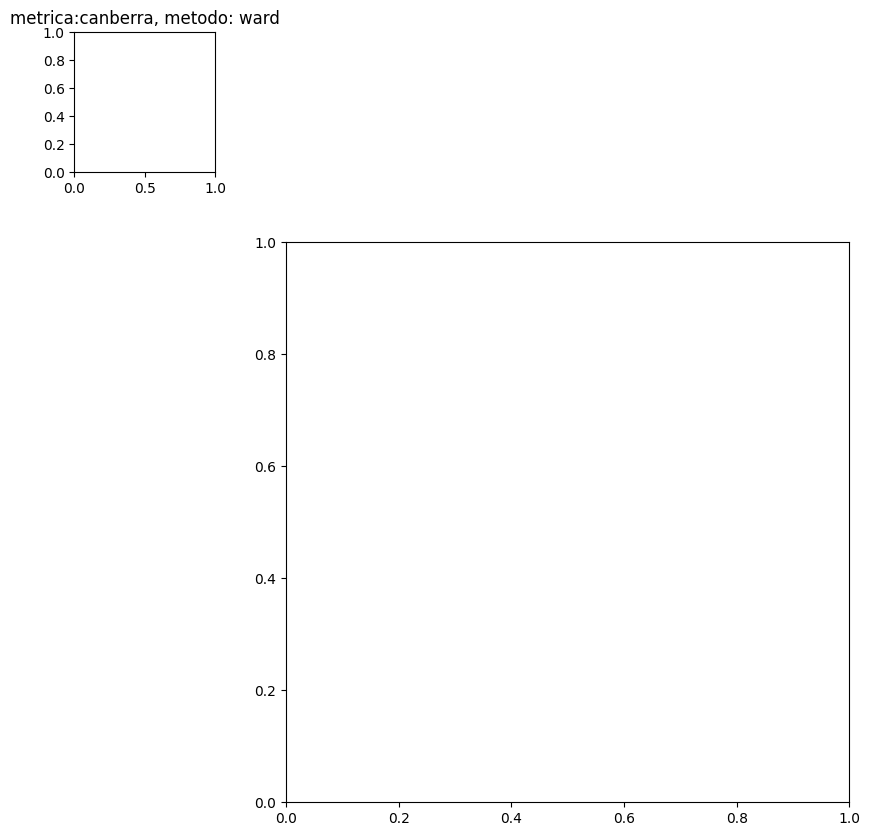

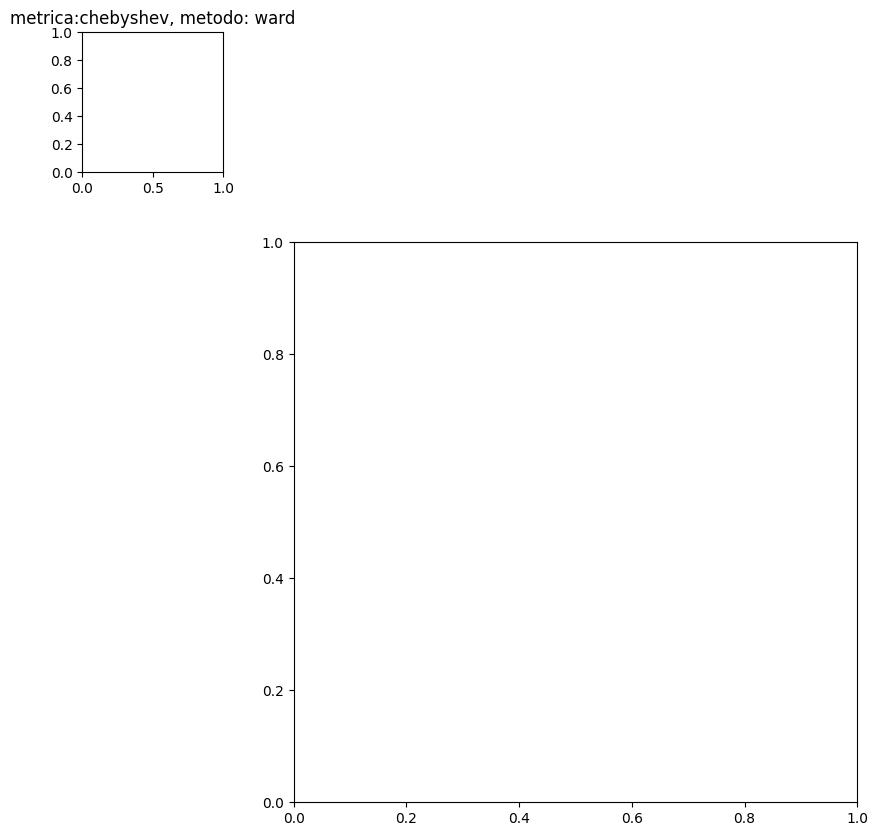

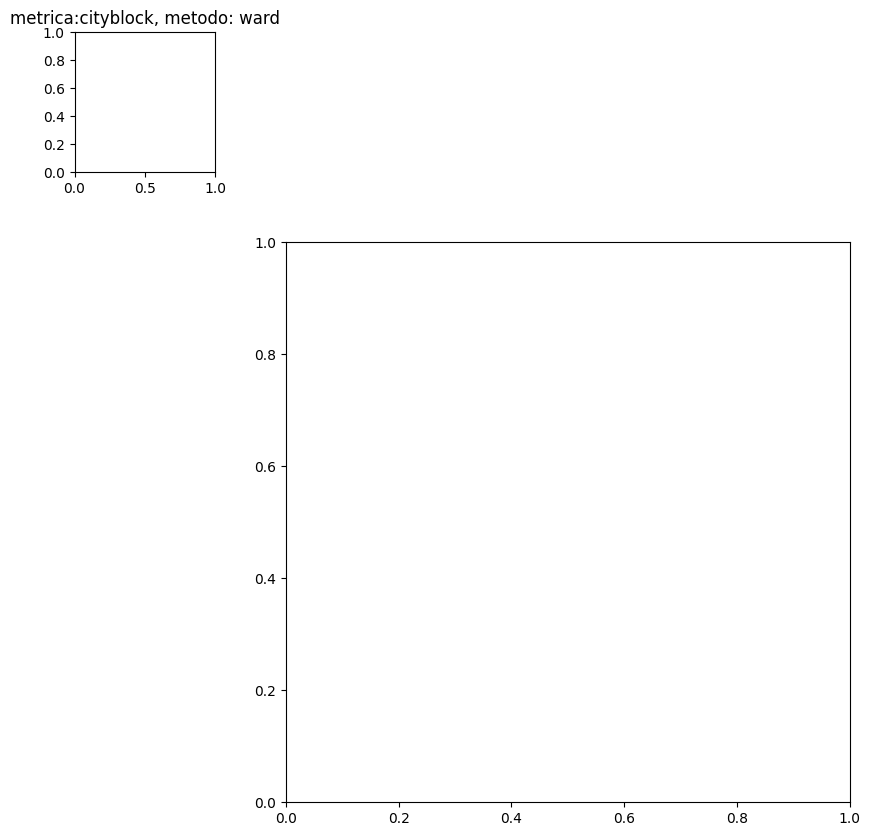

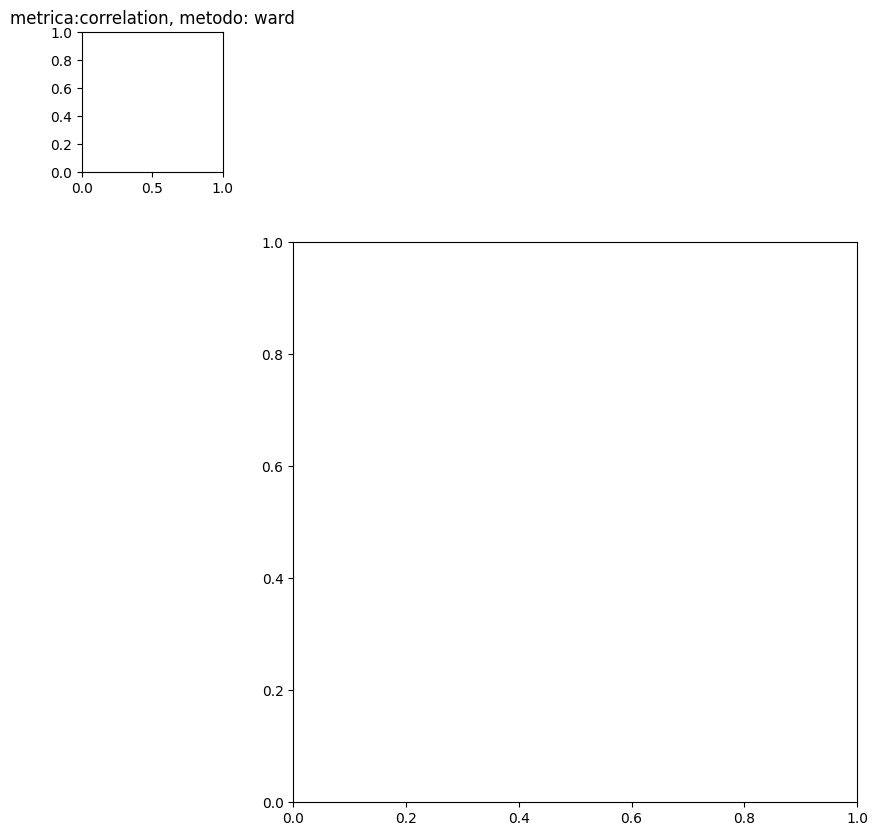

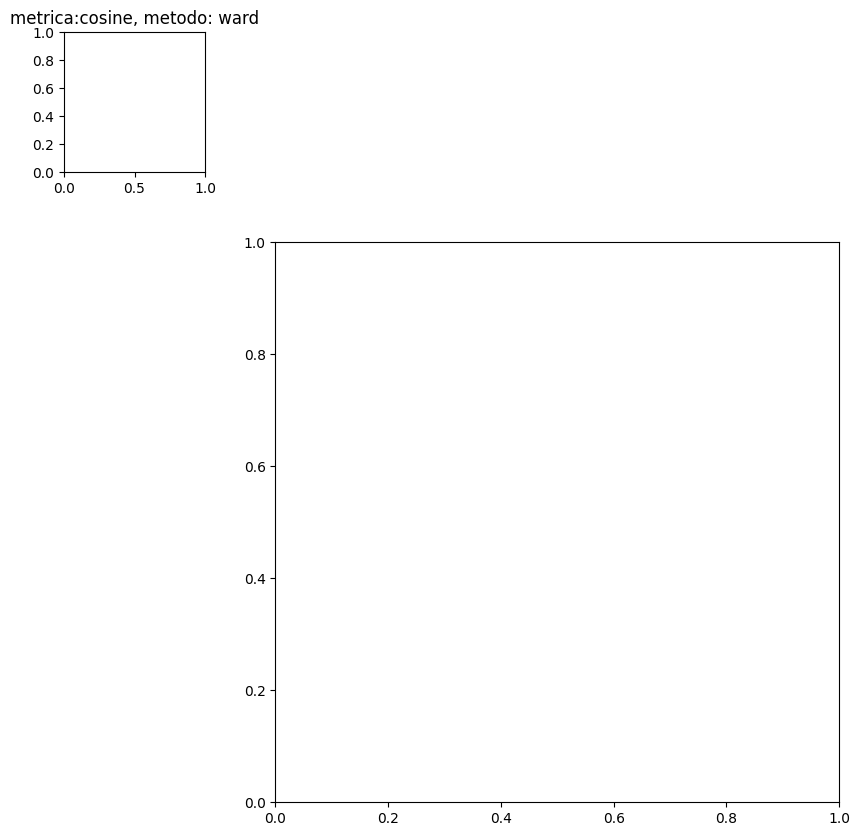

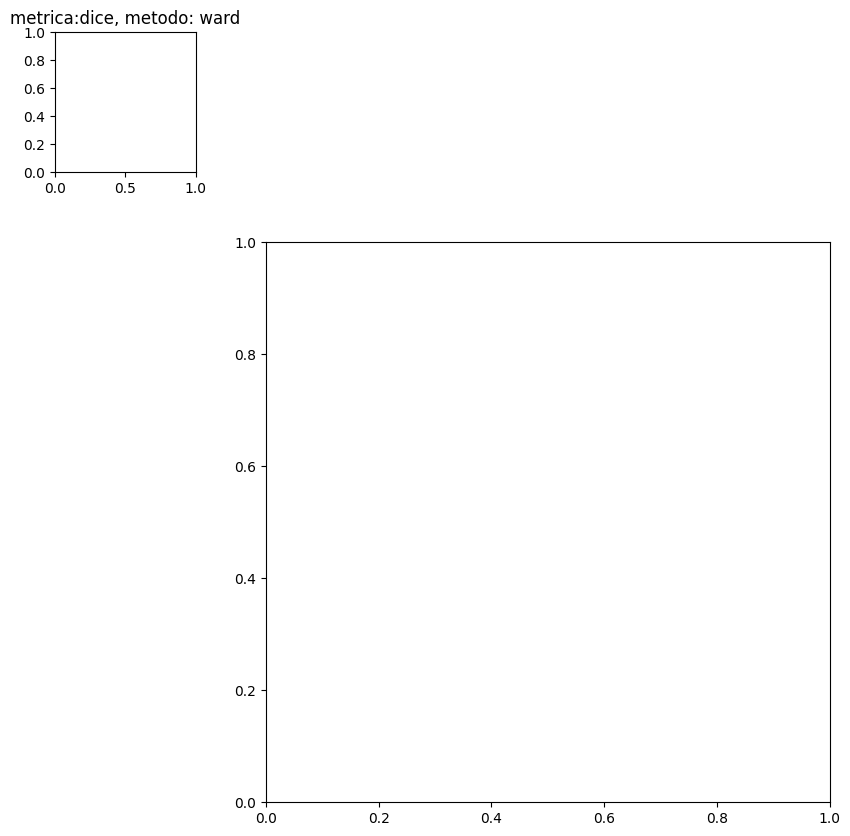

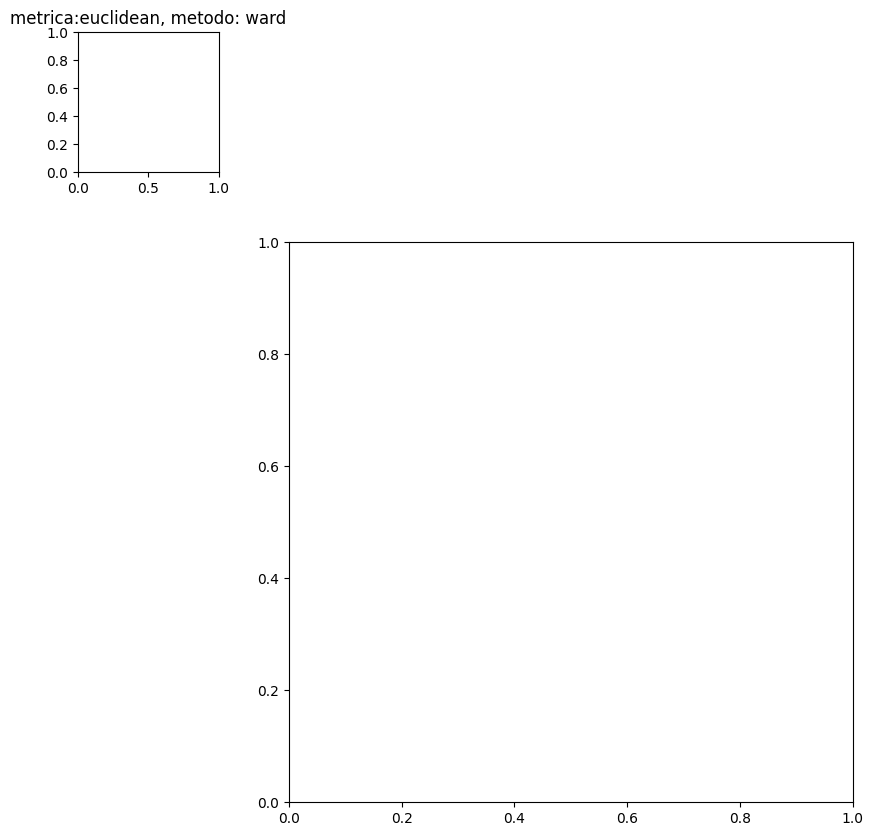

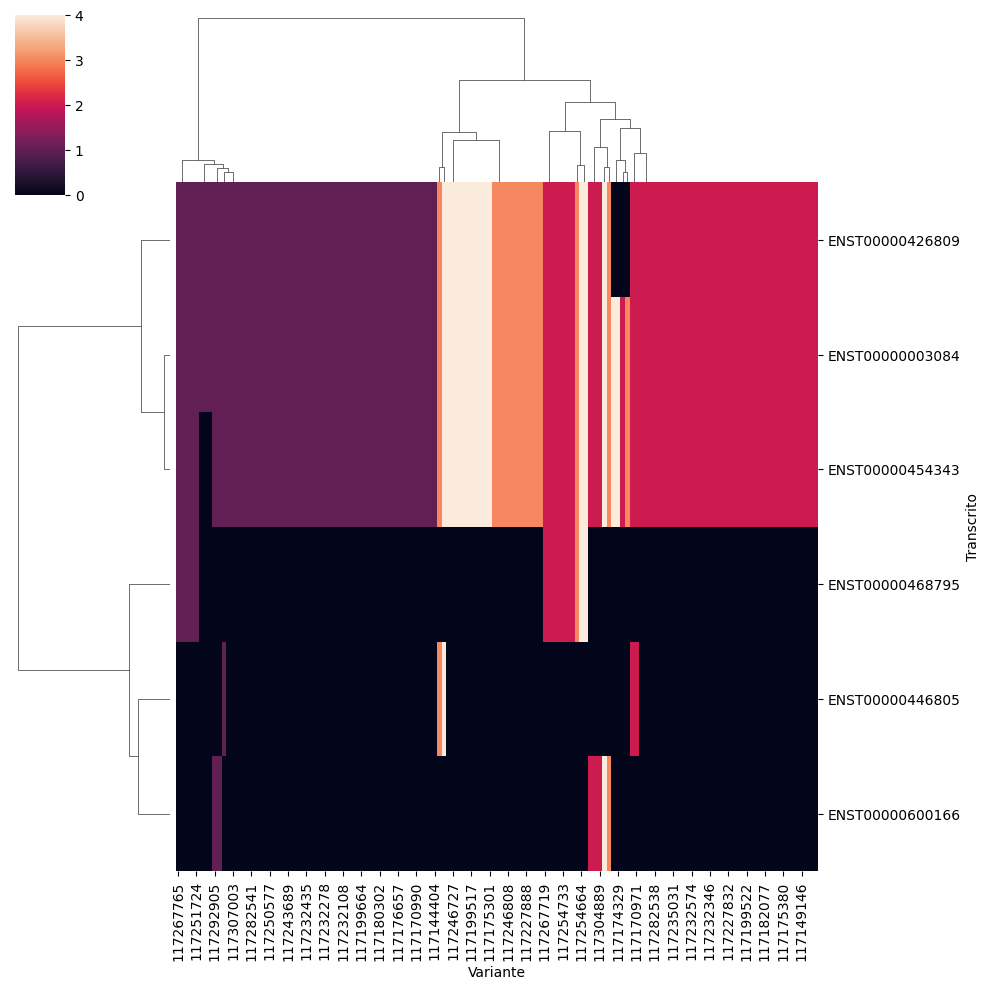

Erro na combinação: metrica=hamming, metodo=ward
Method 'ward' requires the distance metric to be Euclidean
Erro na combinação: metrica=jaccard, metodo=ward
Method 'ward' requires the distance metric to be Euclidean
Erro na combinação: metrica=jensenshannon, metodo=ward
Method 'ward' requires the distance metric to be Euclidean
Erro na combinação: metrica=kulczynski1, metodo=ward
Method 'ward' requires the distance metric to be Euclidean
Erro na combinação: metrica=mahalanobis, metodo=ward
Method 'ward' requires the distance metric to be Euclidean
Erro na combinação: metrica=matching, metodo=ward
Method 'ward' requires the distance metric to be Euclidean
Erro na combinação: metrica=minkowski, metodo=ward
Method 'ward' requires the distance metric to be Euclidean
Erro na combinação: metrica=rogerstanimoto, metodo=ward
Method 'ward' requires the distance metric to be Euclidean
Erro na combinação: metrica=russellrao, metodo=ward
Method 'ward' requires the distance metric to be Euclidean
E

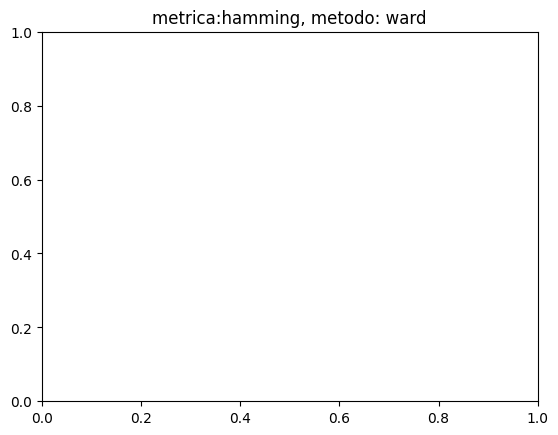

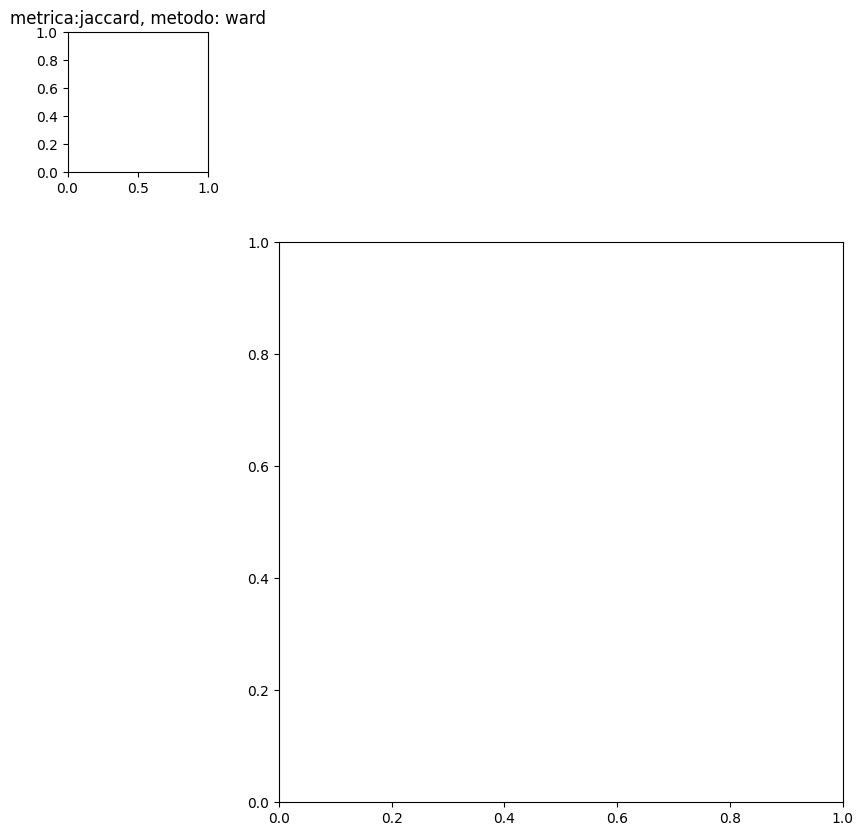

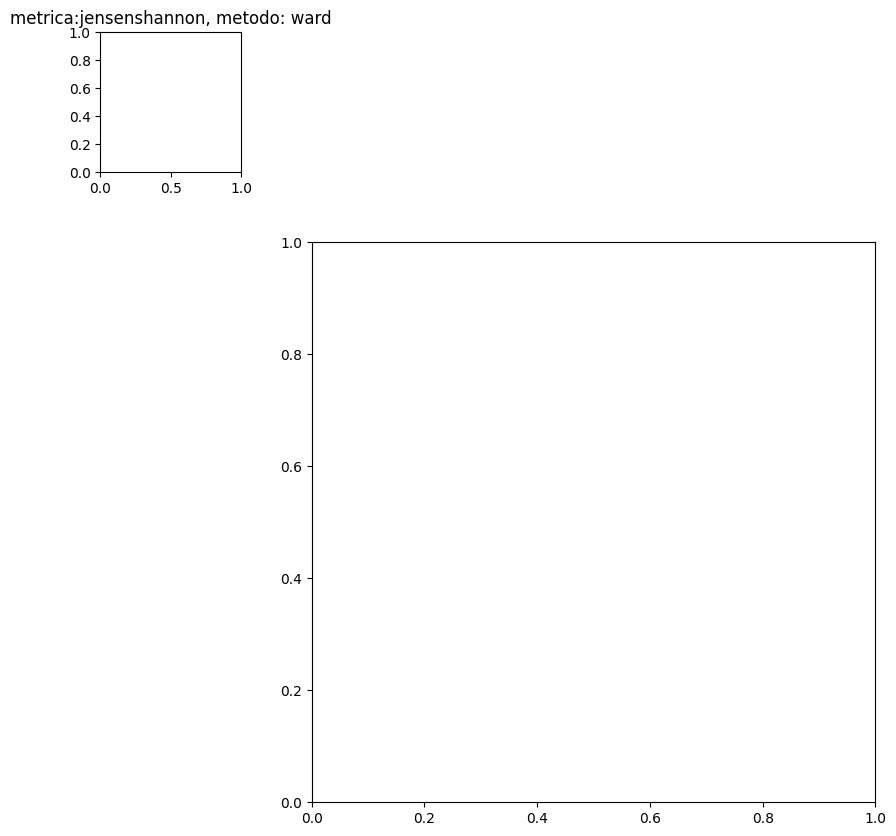

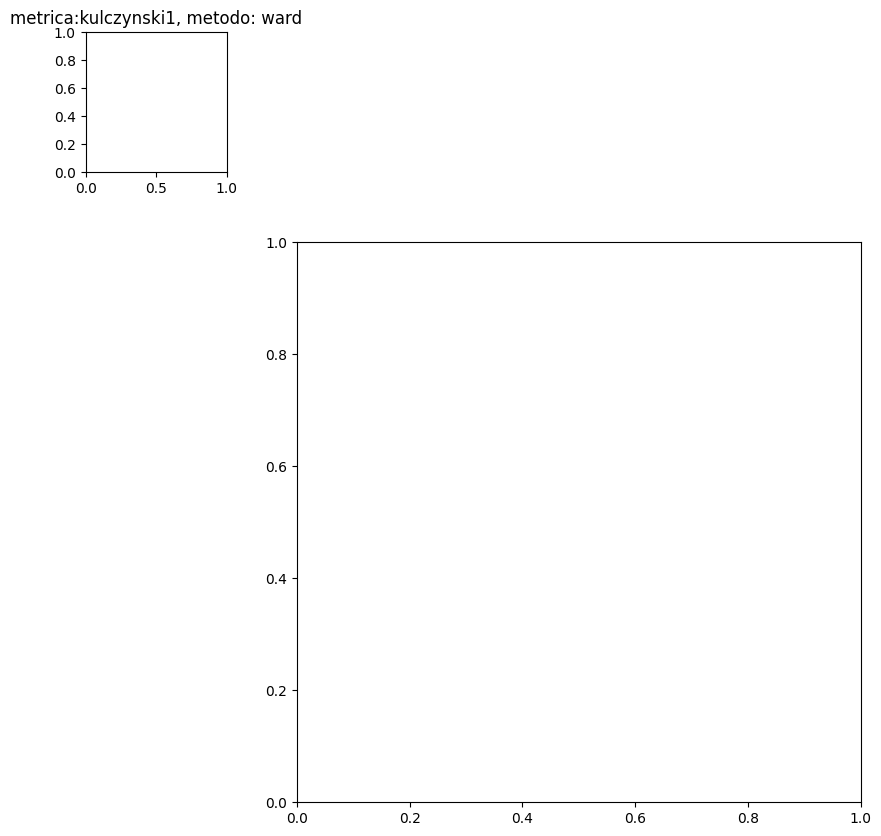

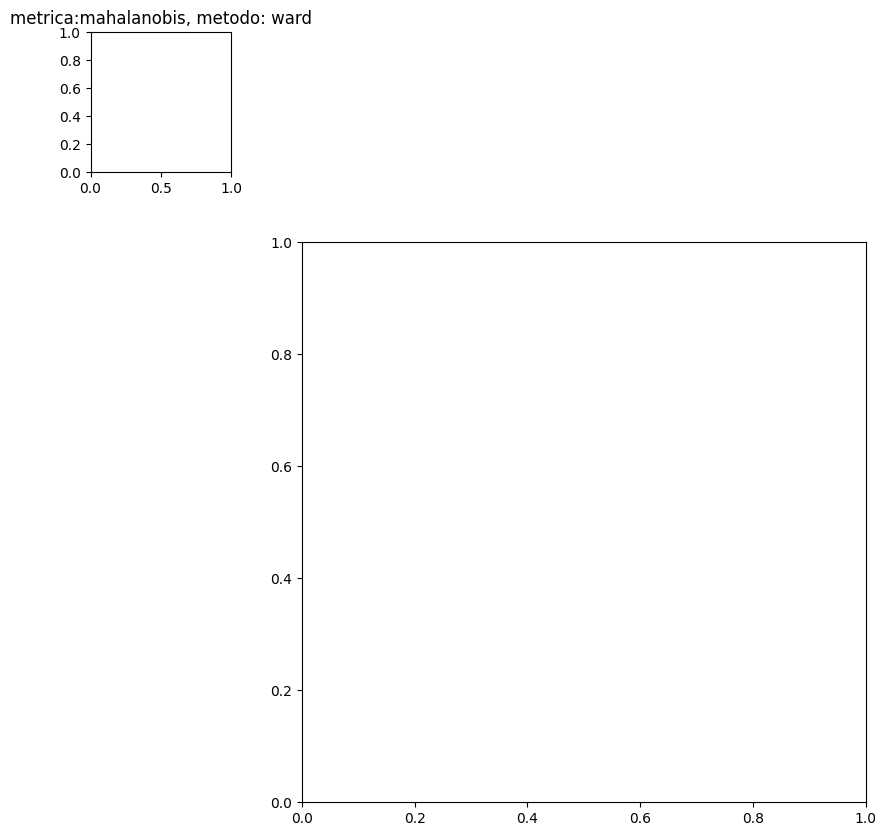

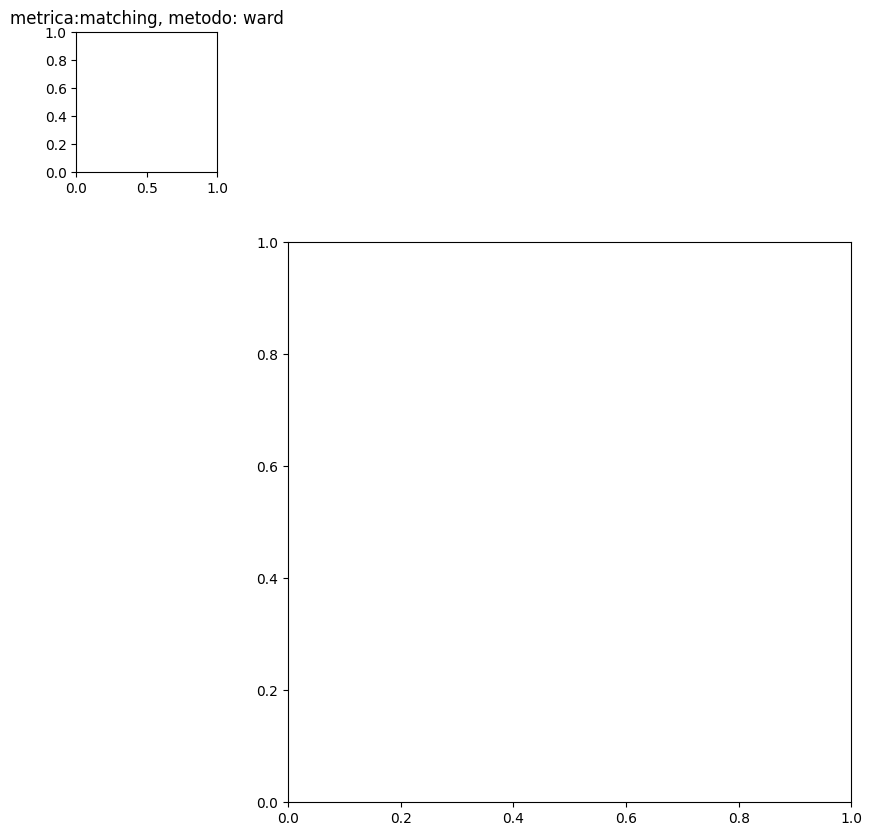

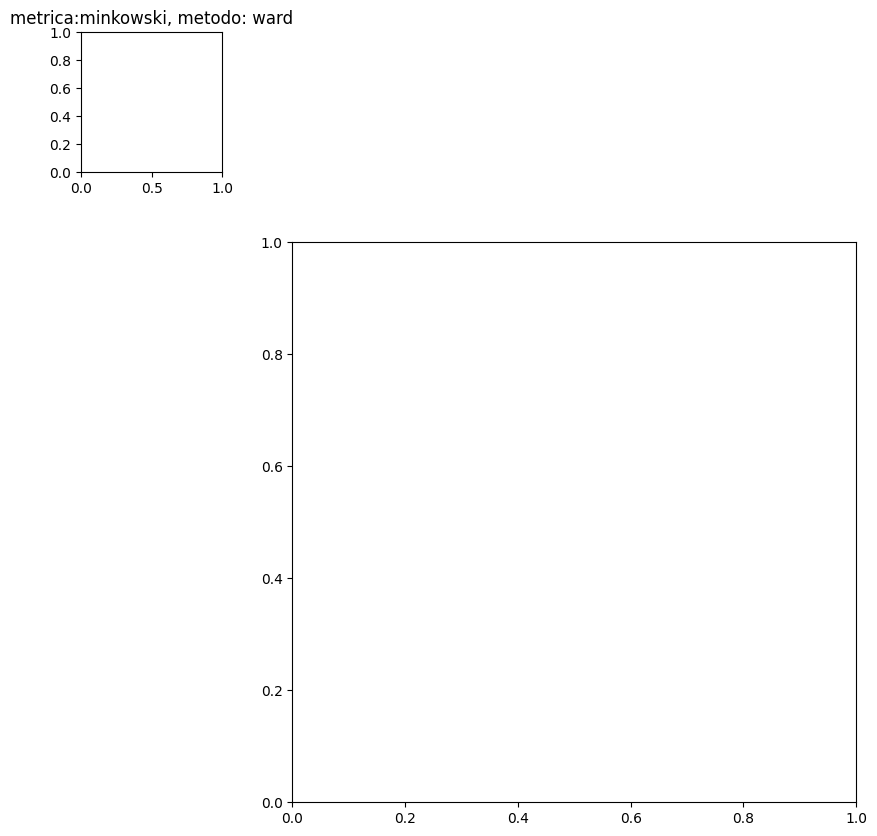

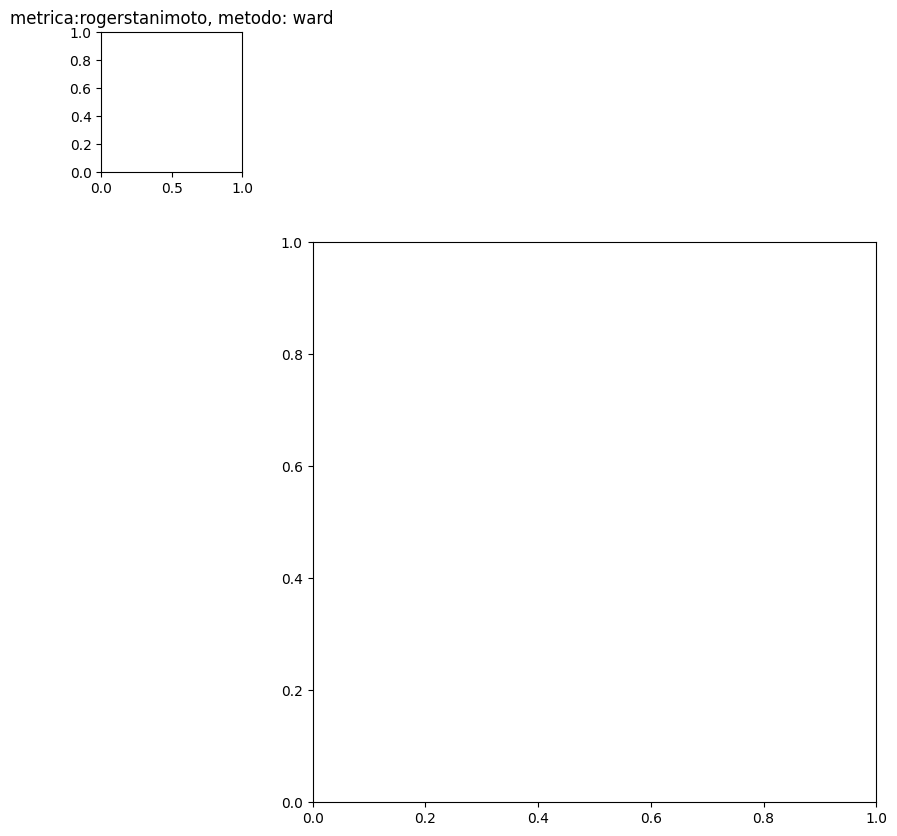

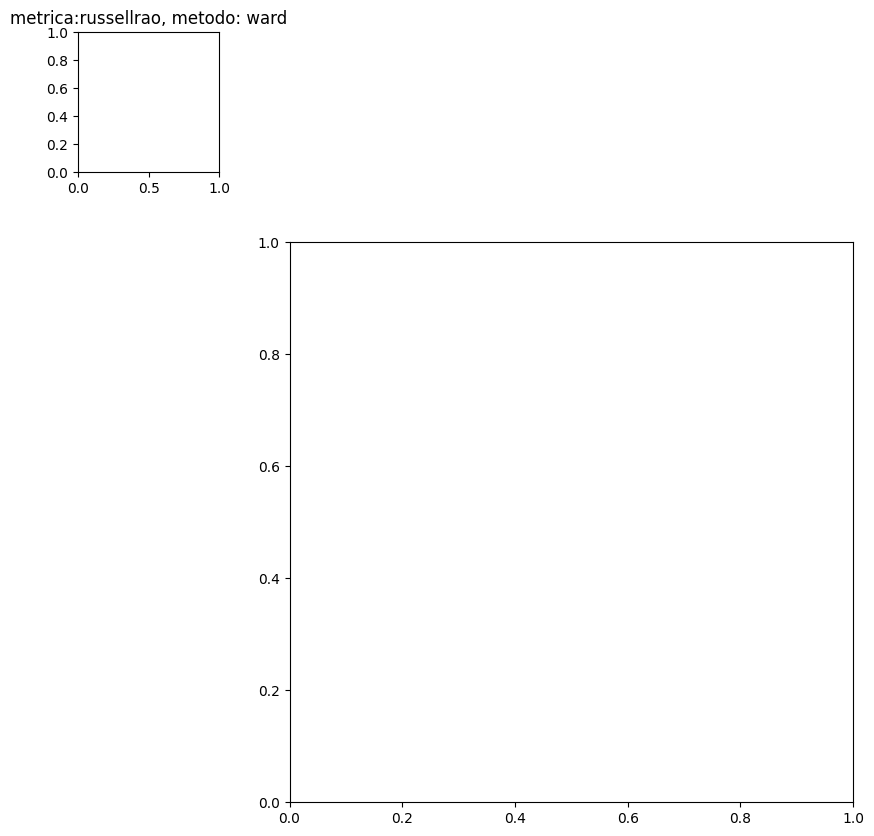

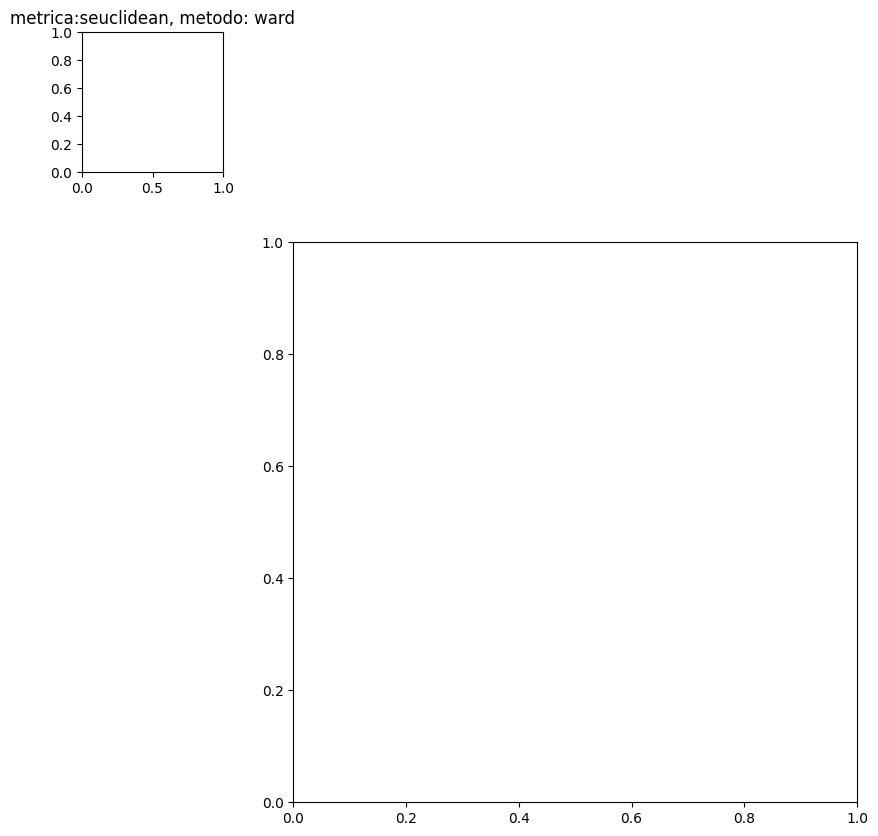

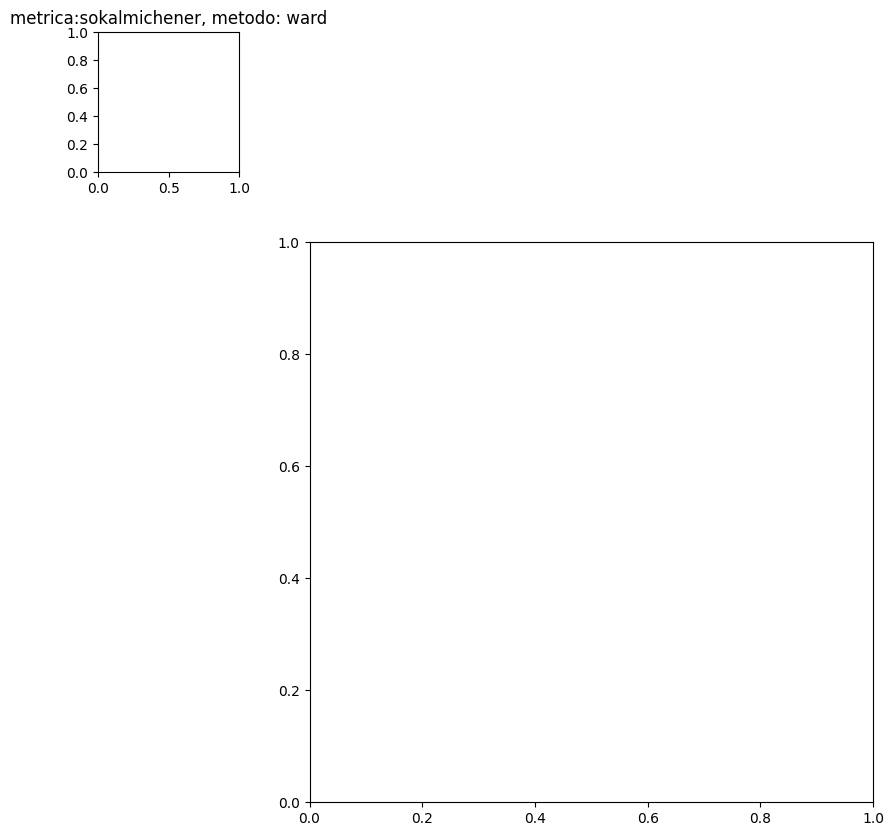

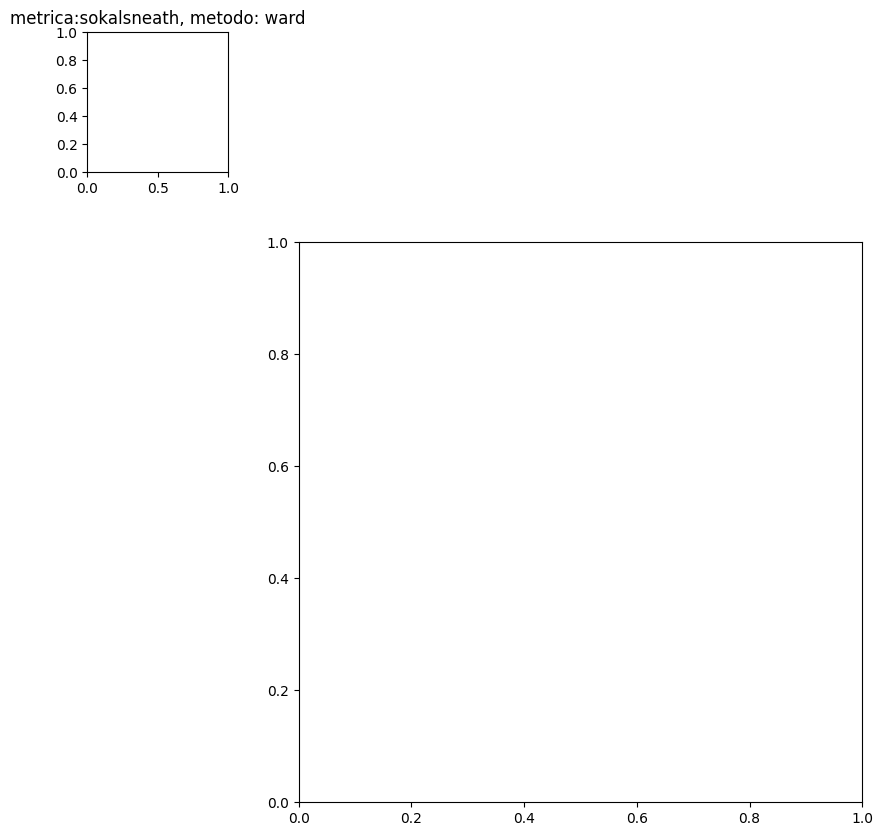

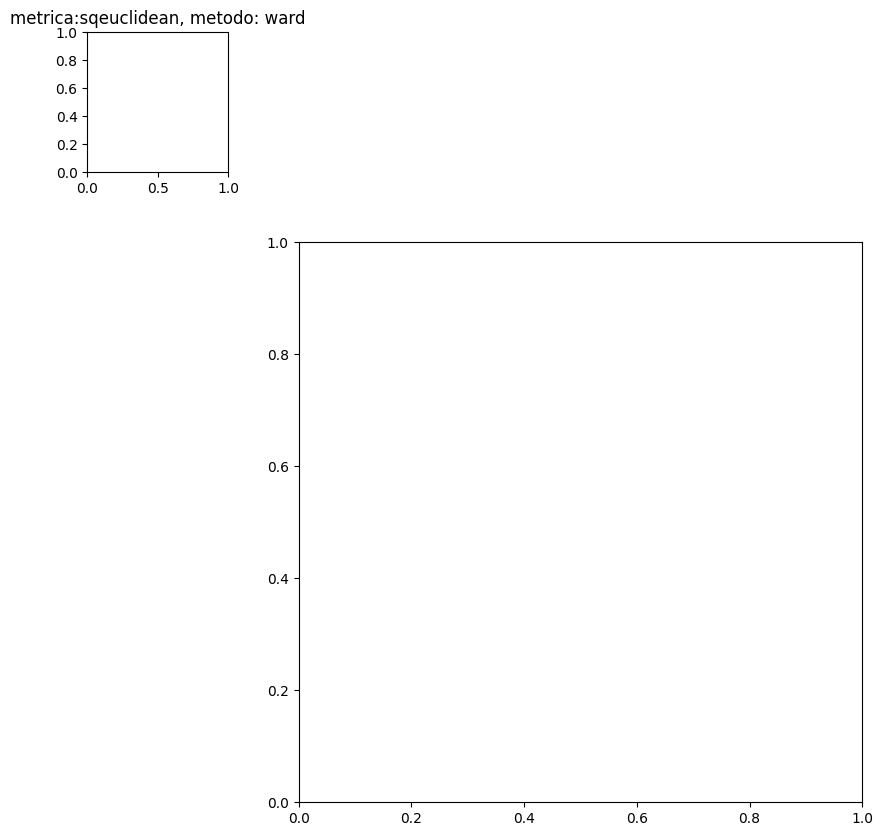

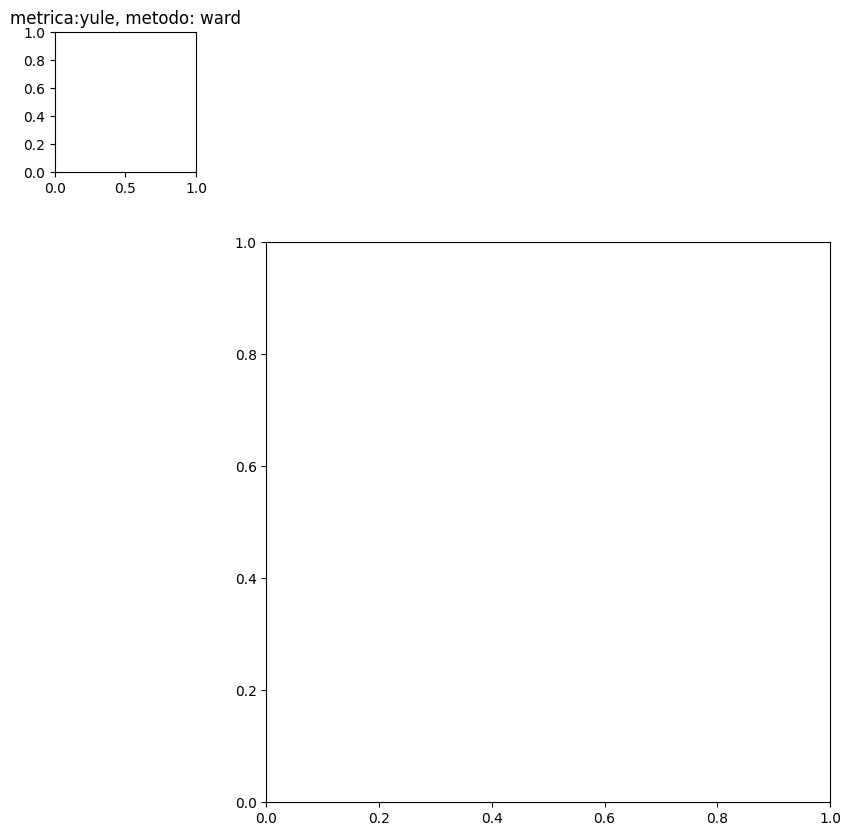

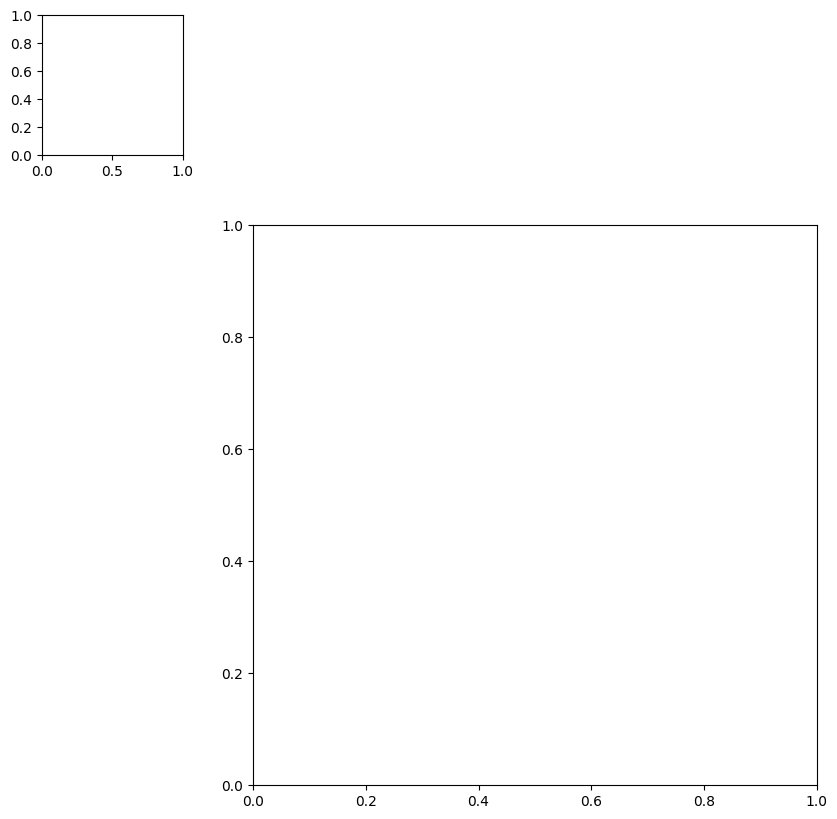

In [27]:
for i in metodo:
    for j in metrica:
        try:
            plt.title(f"metrica:{j}, metodo: {i}")
            sns.clustermap(df3, metric=j, method=i)
            plt.show()
        except Exception as e:
            print(f"Erro na combinação: metrica={j}, metodo={i}")
            print(e)